# Understanding the problem 

Required to carry out data analysis,visualization and preprocessing of the data. Additional: Predcit app ratings

# Import useful libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# Dataset import

In [2]:
df=pd.read_csv('Google-Playstore.csv')

# General Preview of the data

In [3]:
# Check shape of data
print('The Google App play store has {} observations(rows) and {} features(columns)'.format(df.shape[0],df.shape[1]))

The Google App play store has 2312944 observations(rows) and 24 features(columns))


In [4]:
#Preview the data
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [5]:
#Dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [6]:
df['Maximum Installs']=df['Maximum Installs'].astype('float64')

In [7]:
# Which features are categorical?
cat_col=df.select_dtypes(include=[object,bool]).columns
cat_col

Index(['App Name', 'App Id', 'Category', 'Installs', 'Free', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [8]:
# Which features are numerical?
num_col=df.select_dtypes(include=[float,int]).columns
num_col

Index(['Rating', 'Rating Count', 'Minimum Installs', 'Maximum Installs',
       'Price'],
      dtype='object')

In [9]:
#The Scraped Time column is not useful for my analysis
df.drop(labels=['Scraped Time'],axis=1,inplace=True)

In [10]:
# Statistical properties of the data
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


# Data cleaning and preparation

In [11]:
#Check for null values
df.isnull().sum()

App Name                  2
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
dtype: int64

In [12]:
#Lets define a function to give info of null_values
def df_info():
    df_info=pd.DataFrame(index=df.columns)
    df_info['data_type'] = df.dtypes
    df_info['null_count'] = df.isnull().sum()
    df_info['unique_count'] = df.nunique()
    return df_info

<AxesSubplot:>

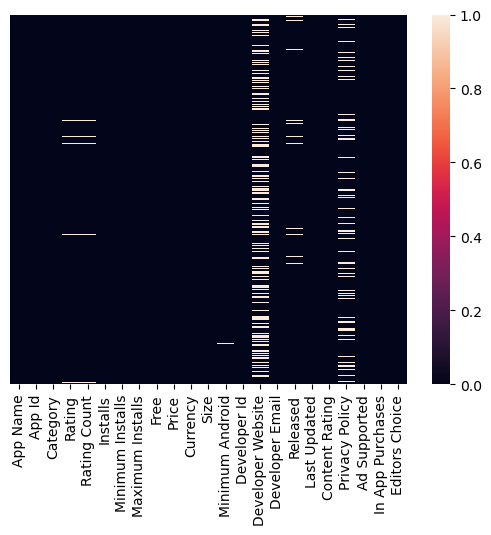

In [13]:
#Visualize percentage of null_values in the dataset
sns.heatmap(df.isnull(),yticklabels=False)

<AxesSubplot:title={'center':'Percentage of null values%'}>

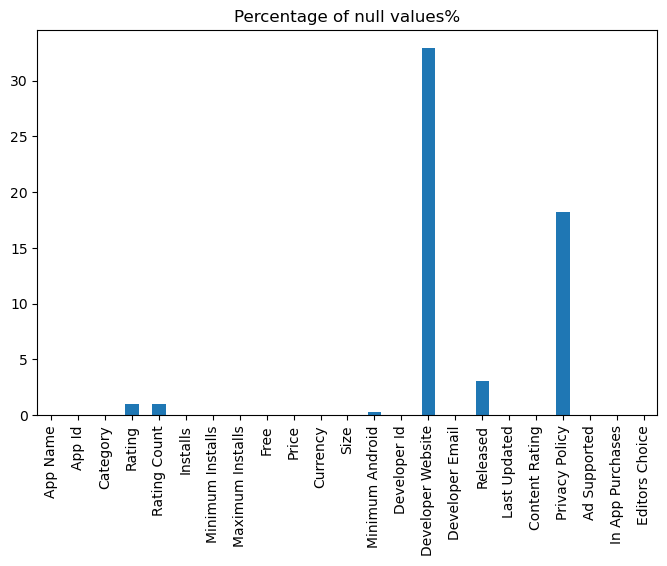

In [14]:
#Visualize percentage of null_values in the dataset
null_perc=(df.isnull().sum()/len(df))*100
null_perc.plot(kind='bar',figsize=(8,5),title='Percentage of null values%')

- The 'Developer Website' and 'Privacy Policy' columns contain about 34% and 19% null values
- Since these are categorical variables and not much can be infered from its data then it will not be a bad idea to drop them
- Less than 3% of null values in Ratings and Rating Count columns, therefore these data points can be dropped

In [15]:
df.drop(labels=['Developer Website','Privacy Policy'],axis=1,inplace=True)

In [16]:
df_info()

,data_type,null_count,unique_count
App Name,object,2,2177944
App Id,object,0,2312944
Category,object,0,48
Rating,float64,22883,42
Rating Count,float64,22883,38482
Installs,object,107,22
Minimum Installs,float64,107,22
Maximum Installs,float64,0,251563
Free,bool,0,2
Price,float64,0,1063


In [17]:
#Lets drop the nulls in 'App Name'
df.dropna(subset=['App Name'],inplace=True)

In [18]:
# The Developer Id and Developer Email columns do not provide much info in our analysis and they have many unique developers
# Lets drop them too
df.drop(labels=['Developer Email','Developer Id'],axis=1,inplace=True)

In [19]:
df_info()

,data_type,null_count,unique_count
App Name,object,0,2177944
App Id,object,0,2312942
Category,object,0,48
Rating,float64,22883,42
Rating Count,float64,22883,38482
Installs,object,107,22
Minimum Installs,float64,107,22
Maximum Installs,float64,0,251563
Free,bool,0,2
Price,float64,0,1063


In [20]:
#Lets jump to the Ratings column
#I noticed that they have equal null-value quantities.Do these null values occur on the same row?
df[df['Rating'].isnull()]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
115,VM-Delay,com.irv.vm_delay,Tools,NaN,NaN,50+,50.0,71.0,True,0.0,USD,Varies with device,Varies with device,NaN,"Oct 23, 2018",Everyone,False,False,False
210,Promotor,com.touchesbegan.promotor,Productivity,NaN,NaN,100+,100.0,135.0,True,0.0,USD,Varies with device,Varies with device,NaN,"Aug 14, 2017",Everyone,False,False,False
284,xrsta xatr,com.xrsta.xatr,Entertainment,NaN,NaN,10+,10.0,14.0,True,0.0,USD,Varies with device,Varies with device,NaN,"Feb 08, 2020",Mature 17+,False,False,False
501,GridChats,com.thegridnet.conference,Communication,NaN,NaN,50+,50.0,92.0,True,0.0,USD,Varies with device,Varies with device,NaN,"Sep 20, 2018",Everyone,False,False,False
662,Restaurant POS(Admin),org.wisdomfish.posadmin,Tools,NaN,NaN,10+,10.0,18.0,True,0.0,USD,Varies with device,Varies with device,NaN,"Jul 25, 2016",Everyone,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312553,Merlins Idle Apelsin,com.elitegamesltd.merlinsidle,Simulation,NaN,NaN,10+,10.0,44.0,True,0.0,USD,Varies with device,Varies with device,NaN,"Nov 17, 2019",Everyone,False,False,False
2312712,Joule Mobile App,com.companyname.Joule.Xamarin,Productivity,NaN,NaN,100+,100.0,215.0,True,0.0,USD,Varies with device,Varies with device,NaN,"Jan 27, 2020",Everyone,False,False,False
2312751,Iris Profissional,com.sys4web.irisprofissional,Health & Fitness,NaN,NaN,50+,50.0,62.0,True,0.0,USD,Varies with device,Varies with device,NaN,"Jul 24, 2019",Everyone,False,False,False
2312764,Wool Sort Puzzle,com.cla.wool.ballsort.puzzle,Puzzle,NaN,NaN,"10,000+",10000.0,10681.0,True,0.0,USD,NaN,Varies with device,NaN,"Mar 17, 2021",Everyone,True,False,False


In [21]:
# Since these missing values occur on both columns simulatneously then it'll be best to drop them
df.dropna(subset=['Rating','Rating Count'],inplace=True)

In [22]:
df_info()

,data_type,null_count,unique_count
App Name,object,0,2157097
App Id,object,0,2290059
Category,object,0,48
Rating,float64,0,42
Rating Count,float64,0,38482
Installs,object,0,22
Minimum Installs,float64,0,22
Maximum Installs,float64,0,251008
Free,bool,0,2
Price,float64,0,1061


The null values in Installs and Minimum Install were also removed

In [23]:
# Drop rows without Release Dates
# Convert Release date to a time series
df.dropna(subset=['Released'],inplace=True)
pd.to_datetime(df['Released'])
pd.to_datetime(df['Last Updated'])

0         2020-02-26
1         2021-05-06
2         2019-08-19
3         2018-10-13
4         2018-11-12
             ...    
2312938   2018-12-14
2312940   2018-02-02
2312941   2018-08-19
2312942   2021-05-05
2312943   2019-08-19
Name: Last Updated, Length: 2241681, dtype: datetime64[ns]

In [24]:
df['Minimum Android'].unique()

array(['7.1 and up', '5.0 and up', '4.0.3 and up', '4.1 and up',
       '6.0 and up', '4.4 and up', '4.0 and up', '4.2 and up',
       '2.1 and up', '7.0 and up', '2.2 and up', '2.3 and up',
       '4.3 and up', '5.1 and up', nan, '1.6 and up', '3.0 and up',
       '8.0 and up', 'Varies with device', '2.3.3 and up', '4.4W and up',
       '3.2 and up', '1.5 and up', '4.0.3 - 7.1.1', '3.1 and up',
       '2.0 and up', '1.0 and up', '1.1 and up', '2.0.1 and up',
       '4.4 - 6.0', '2.1 - 4.4', '4.0 - 5.0', '2.0 - 2.3.4', '2.2 - 4.4',
       '4.1 - 7.0', '4.1 - 6.0', '4.0 - 4.4W', '4.0 - 4.4', '4.0.3 - 7.0',
       '2.3 - 5.0', '4.0 - 7.1.1', '4.1 - 7.1.1', '4.0 - 7.0',
       '4.1 - 8.0', '4.0 - 6.0', '2.3 - 7.0', '4.0 - 8.0', '2.3 - 6.0',
       '2.1 - 2.3.4', '3.0 - 4.1.1', '2.2 - 3.0', '2.0 - 8.0',
       '4.0.3 - 8.0', '3.0 - 4.4W', '4.4 - 7.1.1', '4.4 - 8.0',
       '4.0.3 - 6.0', '1.6 - 4.0.4', '8.0', '2.3 - 5.1', '2.1 - 7.1.1',
       '2.3 - 4.4W', '4.4 - 7.0', '6.0 - 7.1.1', '2.3

In [25]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Released', 'Last Updated', 'Content Rating',
       'Ad Supported', 'In App Purchases', 'Editors Choice'],
      dtype='object')

In [26]:
#Lets drop some unwanted columns that are not useful for our analysis
df.drop(labels=['App Id','Minimum Android','Last Updated'],axis=1,inplace=True)

In [27]:
# Define useful visualization functions
def viz_distplot(col,df=df):  
    col_=pd.Series(df[col])
    plt.figure(figsize=(8,5))
    sns.distplot(x=col_)
    plt.title(f'Distribution of {col} variable',size = 20)
    plt.show()

In [28]:
def viz_countplot_uni(col,df=df):
    plt.figure(figsize=(8,5))
    sns.countplot(x=col,data=df)
    plt.title(f'Frequency distribution of {col} variable',size = 20)
    plt.xticks(rotation = 'vertical')
    plt.legend()
    plt.show()
    return df[col].value_counts()

In [29]:
def viz_countplot_bi(col,hue,df=df):
    plt.figure(figsize=(8,5))
    sns.countplot(x=col,data=df,hue=hue)
    plt.title(f'Frequency distribution of {col} variable',size = 20)
    plt.legend()
    plt.show()
    return df[col].value_counts()

In [30]:
df_info()

,data_type,null_count,unique_count
App Name,object,0,2110537
Category,object,0,48
Rating,float64,0,42
Rating Count,float64,0,37584
Installs,object,0,22
Minimum Installs,float64,0,22
Maximum Installs,float64,0,246277
Free,bool,0,2
Price,float64,0,881
Currency,object,20,13


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


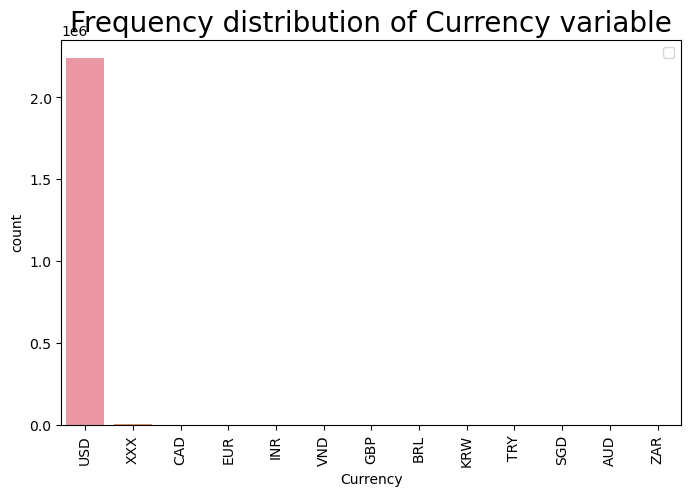

USD    2240438
XXX       1200
EUR          6
INR          5
GBP          3
CAD          2
VND          1
BRL          1
KRW          1
TRY          1
SGD          1
AUD          1
ZAR          1
Name: Currency, dtype: int64

In [31]:
viz_countplot_uni('Currency')

Since majority of the apps are sold in dollars, it will be safe to replace null values with $

In [32]:
df['Currency'].fillna(value='USD',inplace=True)
df_info()

,data_type,null_count,unique_count
App Name,object,0,2110537
Category,object,0,48
Rating,float64,0,42
Rating Count,float64,0,37584
Installs,object,0,22
Minimum Installs,float64,0,22
Maximum Installs,float64,0,246277
Free,bool,0,2
Price,float64,0,881
Currency,object,0,13


In [33]:
#Convert the number of installments to approximate numerical values
df['Installs']=df['Installs'].str.replace(',','')
df['Installs']=df['Installs'].str.replace('+','')
df['Installs']=df['Installs'].astype('float')
df['Installs'].head()

0      10.0
1    5000.0
2      50.0
3      10.0
4     100.0
Name: Installs, dtype: float64

In [34]:
#Lets convert the size column to numerical variables
df['Size'].unique()

array(['10M', '2.9M', '3.7M', ..., '405M', '3.2k', '512M'], dtype=object)

In [35]:
s=[]
for x in df['Size']:
    s.append(x[-3:])
set(s)

{'.0G',
 '.0M',
 '.0k',
 '.1G',
 '.1M',
 '.1k',
 '.2M',
 '.2k',
 '.3M',
 '.3k',
 '.4M',
 '.4k',
 '.5G',
 '.5M',
 '.5k',
 '.6M',
 '.6k',
 '.7M',
 '.7k',
 '.8M',
 '.8k',
 '.9M',
 '.9k',
 '00M',
 '00k',
 '01M',
 '01k',
 '02M',
 '02k',
 '03M',
 '03k',
 '04M',
 '04k',
 '05M',
 '05k',
 '06M',
 '06k',
 '07M',
 '07k',
 '08M',
 '08k',
 '09M',
 '09k',
 '10M',
 '10k',
 '11M',
 '11k',
 '12M',
 '12k',
 '13M',
 '13k',
 '14M',
 '14k',
 '15M',
 '15k',
 '16M',
 '16k',
 '17M',
 '17k',
 '18M',
 '18k',
 '19M',
 '19k',
 '20M',
 '20k',
 '21M',
 '21k',
 '22M',
 '22k',
 '23M',
 '23k',
 '24M',
 '24k',
 '25M',
 '25k',
 '26M',
 '26k',
 '27M',
 '27k',
 '28M',
 '28k',
 '29M',
 '29k',
 '30M',
 '30k',
 '31M',
 '31k',
 '32M',
 '32k',
 '33M',
 '33k',
 '34M',
 '34k',
 '35M',
 '35k',
 '36M',
 '36k',
 '37M',
 '37k',
 '38M',
 '38k',
 '39M',
 '39k',
 '40M',
 '40k',
 '41M',
 '41k',
 '42M',
 '42k',
 '43M',
 '43k',
 '44M',
 '44k',
 '45M',
 '45k',
 '46M',
 '46k',
 '47M',
 '47k',
 '48M',
 '48k',
 '49M',
 '49k',
 '50M',
 '50k',


In [36]:
#Remove data with ice
for x in df['Size']:
    if 'ice' in x:
        print(x)

Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with 

Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with 

Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with 

In [37]:
df['Size']=df['Size'].astype('object')

In [38]:
df['Size']=df['Size'].apply(lambda x:str(x).replace('G','e+9'))

In [39]:
df['Size']=df['Size'].apply(lambda x:str(x).replace('M','e+6'))

In [40]:
df['Size']=df['Size'].apply(lambda x:str(x).replace('k','e+3'))

In [41]:
df['Size']=df['Size'].apply(lambda x:str(x).replace(',',''))

In [42]:
df['Size']=df['Size'].replace('Varies with device',value=np.nan)

In [43]:
df["Size"][134]

'3.2e+6'

In [44]:
df['Size']=pd.to_numeric(df['Size'])

In [45]:
df.dropna(subset=['Size'],inplace=True)

In [46]:
df_info()

,data_type,null_count,unique_count
App Name,object,0,2062578
Category,object,0,48
Rating,float64,0,42
Rating Count,float64,0,34764
Installs,float64,0,20
Minimum Installs,float64,0,20
Maximum Installs,float64,0,235119
Free,bool,0,2
Price,float64,0,858
Currency,object,0,13


In [47]:
print('The cleaned and prepared data contains {} observations and {} features'.format(df.shape[0],df.shape[1]))

The cleaned and prepared data contains 2190443 observations and 16 features


# Exploratory Data Analysis

# General Univariate analysis

In [48]:
#Numerical columns
num_col=df.select_dtypes(include=[float,int]).columns
num_col

Index(['Rating', 'Rating Count', 'Installs', 'Minimum Installs',
       'Maximum Installs', 'Price', 'Size'],
      dtype='object')

In [49]:
#Categorical columns
cat_col=df.select_dtypes(include=[object,bool]).columns
cat_col

Index(['App Name', 'Category', 'Free', 'Currency', 'Released',
       'Content Rating', 'Ad Supported', 'In App Purchases', 'Editors Choice'],
      dtype='object')

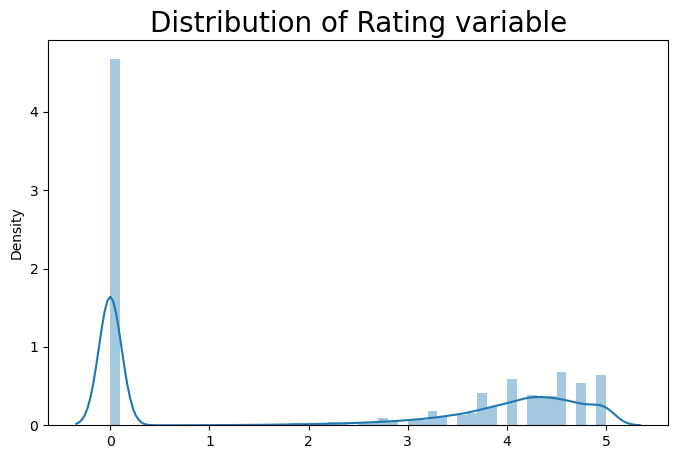

In [50]:
# Plot distribution of the Rating variable
viz_distplot('Rating')
sns.set_style('darkgrid')

## From the 2-3 major peaks we can deduce that:

 - Majority of the apps were not rated by users and majority of users assigned a 4.3 and 4.9 ratings for most apps

# Lets get a closer look at the non-zero ratings

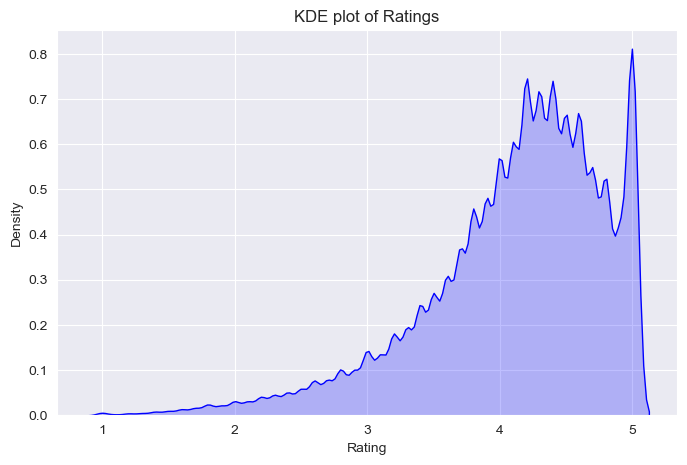

In [51]:
n_rating=df[df['Rating']>0.0]
plt.figure(figsize=(8,5))
sns.kdeplot(x='Rating',data=n_rating,color='blue',shade=True)
sns.set_style('darkgrid')
plt.title('KDE plot of Ratings');

This confirms that majority of the users assigned 4.3 and 5.0 ratings but generally most apps were rated between 3.4 and 4.7

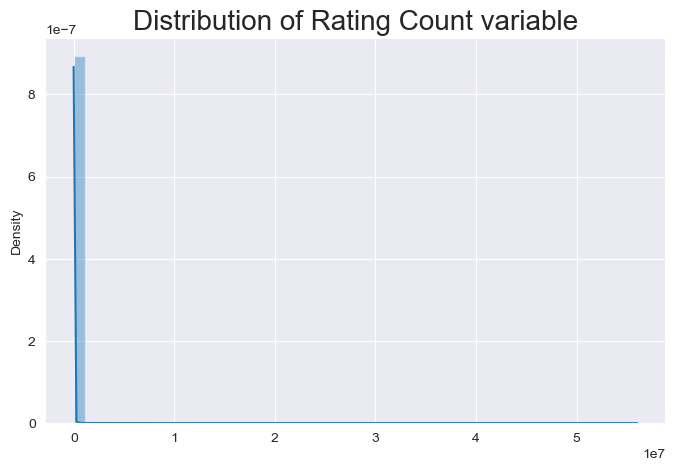

In [52]:
# Plot distribution plot of the Rating-count variable
viz_distplot('Rating Count');

Logically as seen from the previous plot on assigned ratings, about 46% of users did not rate the apps

In [53]:
df['Rating Count'].value_counts()/len(df['Rating Count'])*100

0.0         46.805829
5.0          2.830797
6.0          2.386641
7.0          2.055383
8.0          1.784799
              ...    
229366.0     0.000046
19867.0      0.000046
35403.0      0.000046
278554.0     0.000046
75960.0      0.000046
Name: Rating Count, Length: 34764, dtype: float64

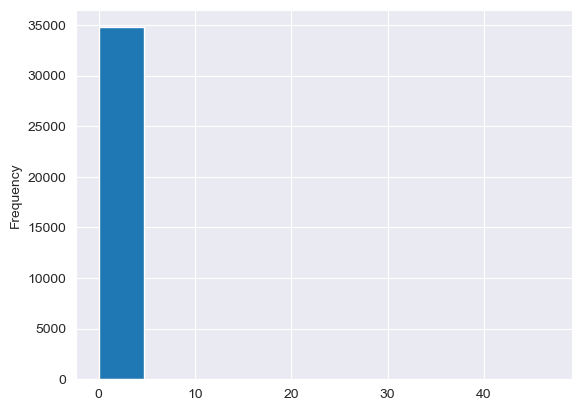

In [54]:
((df['Rating Count'].value_counts()/len(df['Rating Count']))*100).plot(kind='hist');

In [55]:
#Analysis of categorical data
cat_col

Index(['App Name', 'Category', 'Free', 'Currency', 'Released',
       'Content Rating', 'Ad Supported', 'In App Purchases', 'Editors Choice'],
      dtype='object')

In [56]:
print('There are about {} categories of apps in the dataset'.format(len(df['Category'].unique())))

There are about 48 categories of apps in the dataset


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


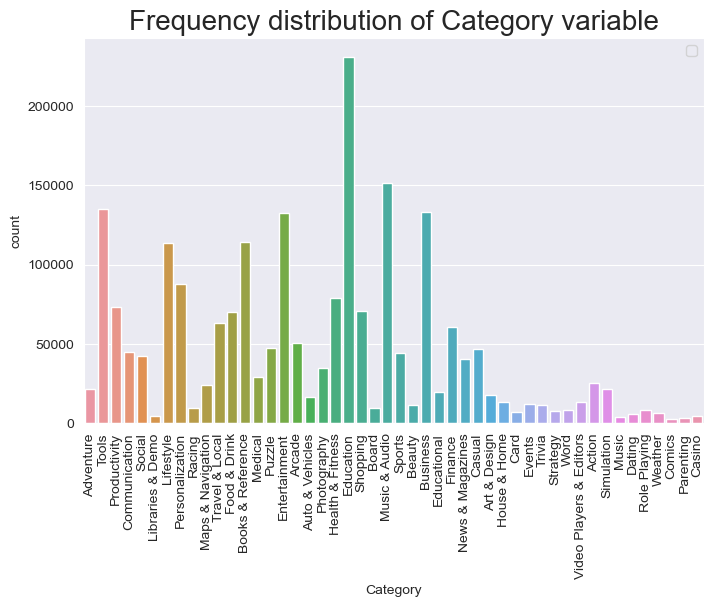

Education                  231126
Music & Audio              151724
Tools                      135103
Business                   133515
Entertainment              132857
Books & Reference          114031
Lifestyle                  113373
Personalization             87797
Health & Fitness            79262
Productivity                73138
Shopping                    70664
Food & Drink                70116
Travel & Local              63414
Finance                     60542
Arcade                      50900
Puzzle                      47564
Casual                      47022
Communication               45106
Sports                      44374
Social                      42333
News & Magazines            40289
Photography                 34596
Medical                     29284
Action                      25346
Maps & Navigation           24352
Adventure                   21685
Simulation                  21453
Educational                 19895
Art & Design                18115
Auto & Vehicle

In [57]:
#Frequency occurence of each category
viz_countplot_uni('Category')

Apps relating to education occurs the most in the dataset occupying about 11% of the data

In [58]:
over_hundred=df['Category'].value_counts(ascending=False).head(6)
others=df['Category'].value_counts(ascending=False).iloc[7:]


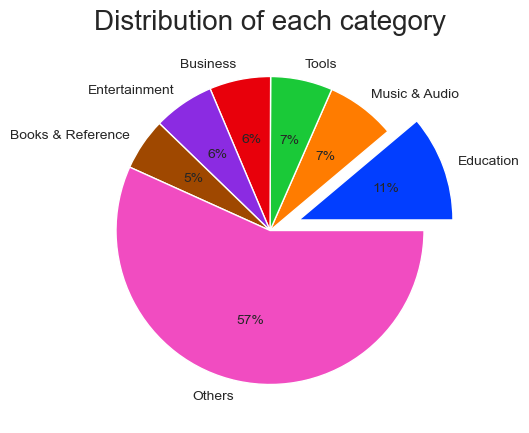

In [59]:
#define data
plt.figure(figsize=(8,5))
data = list(over_hundred)
data.append(others.sum())
labels = list(over_hundred.index)
labels.append('Others')
#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:7]
explode = (0.2,0,0,0,0,0,0)
#create pie chart
plt.pie(data, labels = labels,explode=explode, colors = colors, autopct='%.0f%%')
plt.title('Distribution of each category',size = 20)
plt.show()

In [60]:
cat_col

Index(['App Name', 'Category', 'Free', 'Currency', 'Released',
       'Content Rating', 'Ad Supported', 'In App Purchases', 'Editors Choice'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


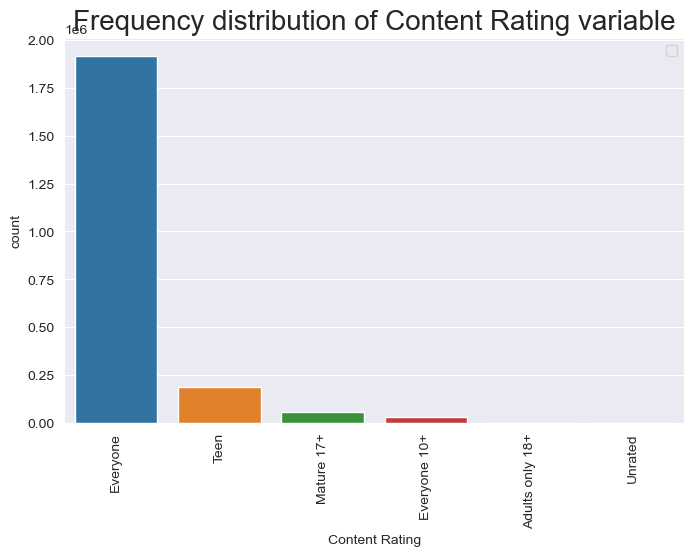

Everyone           1916957
Teen                184654
Mature 17+           57350
Everyone 10+         31203
Unrated                149
Adults only 18+        130
Name: Content Rating, dtype: int64

In [61]:
#What app ratings are we looking at?
viz_countplot_uni('Content Rating')

We see that the Everyone category has the highest app counts

In [62]:
# Top 10 Categories with the most installs

In [63]:
df.groupby('Category')['Maximum Installs'].sum().sort_values(ascending=False).head(10)

Category
Tools            4.405184e+10
Casual           2.572708e+10
Action           2.502592e+10
Arcade           2.314885e+10
Entertainment    1.913184e+10
Photography      1.810464e+10
Simulation       1.767696e+10
Productivity     1.715562e+10
Puzzle           1.693046e+10
Music & Audio    1.412236e+10
Name: Maximum Installs, dtype: float64

In [64]:
df.groupby('Category')['Maximum Installs'].sum().sort_values(ascending=False).head(10)

Category
Tools            4.405184e+10
Casual           2.572708e+10
Action           2.502592e+10
Arcade           2.314885e+10
Entertainment    1.913184e+10
Photography      1.810464e+10
Simulation       1.767696e+10
Productivity     1.715562e+10
Puzzle           1.693046e+10
Music & Audio    1.412236e+10
Name: Maximum Installs, dtype: float64

- The tools category has the most installs.This means that apps used to solve problems or perform specific tasks are more likely to be installed

Text(0.5, 1.0, 'Top 10 app categories with the most installs')

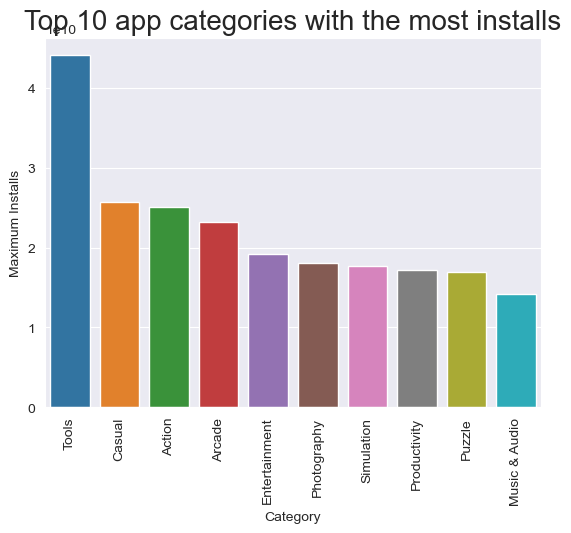

In [65]:
y=df.groupby('Category')['Maximum Installs'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=y.index,y=y)
plt.xticks(rotation = 'vertical')
plt.title('Top 10 app categories with the most installs',size=20)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


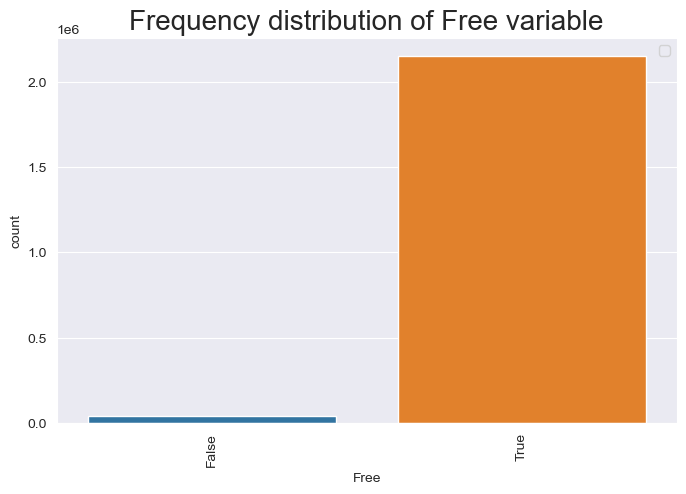

True     2148474
False      41969
Name: Free, dtype: int64

In [66]:
#What's the ratio of free apps available compared to the paid ones
viz_countplot_uni('Free')

More than 95% of the apps are free. The data is imbalanced if we are to predict for whether an app is free or not

In [67]:
#What categories of apps are more likely to be free
df.groupby('Category')['Free'].value_counts()

Category                 Free 
Action                   True     24798
                         False      548
Adventure                True     20810
                         False      875
Arcade                   True     50196
                                  ...  
Video Players & Editors  False      302
Weather                  True      6258
                         False      216
Word                     True      7956
                         False      135
Name: Free, Length: 96, dtype: int64

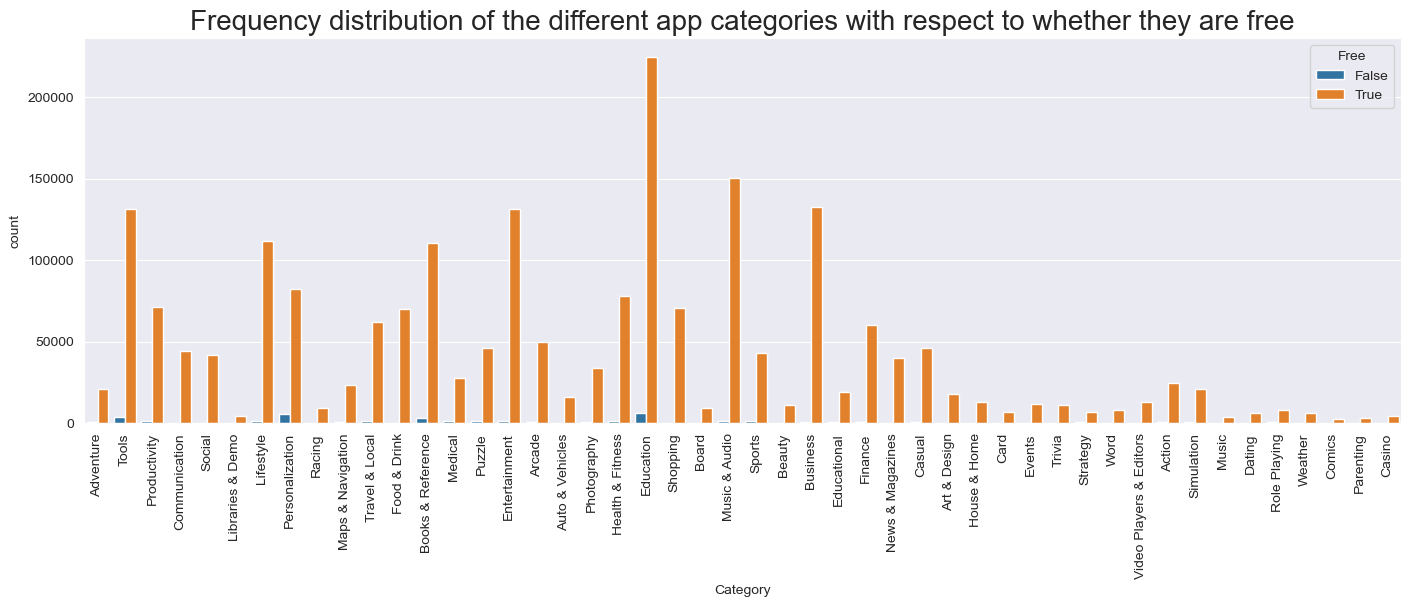

In [68]:
plt.figure(figsize=(17,5))
sns.countplot(x='Category',hue='Free', data=df)
plt.xticks(rotation = 'vertical')
plt.title('Frequency distribution of the different app categories with respect to whether they are free',size = 20)
sns.set_style('whitegrid')

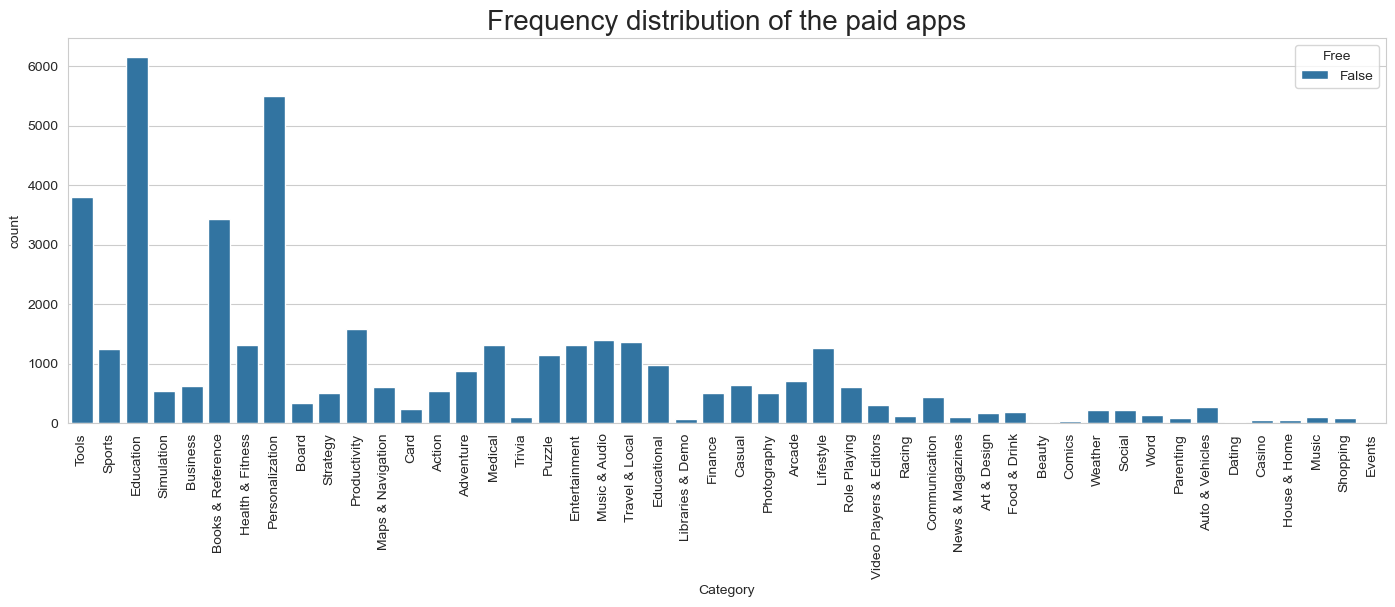

In [69]:
#Lets take a closer look at the paid apps
plt.figure(figsize=(17,5))
sns.countplot(x='Category',hue='Free', data=df[df['Free']==False])
plt.xticks(rotation = 'vertical')
plt.title('Frequency distribution of the paid apps',size = 20)
sns.set_style('whitegrid')

 - We can deduce that the Tools, Education,Books and references,Personalization categories have a relatively high amount of paid apps when compared to other app-categories but there are by-far more free apps respectively for these categories

- The Beauty,Dating and Events apps are all paid-apps and are never free

In [70]:
df.columns

Index(['App Name', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Released', 'Content Rating', 'Ad Supported',
       'In App Purchases', 'Editors Choice'],
      dtype='object')

Text(0.5, 1.0, 'Average user-rating by category')

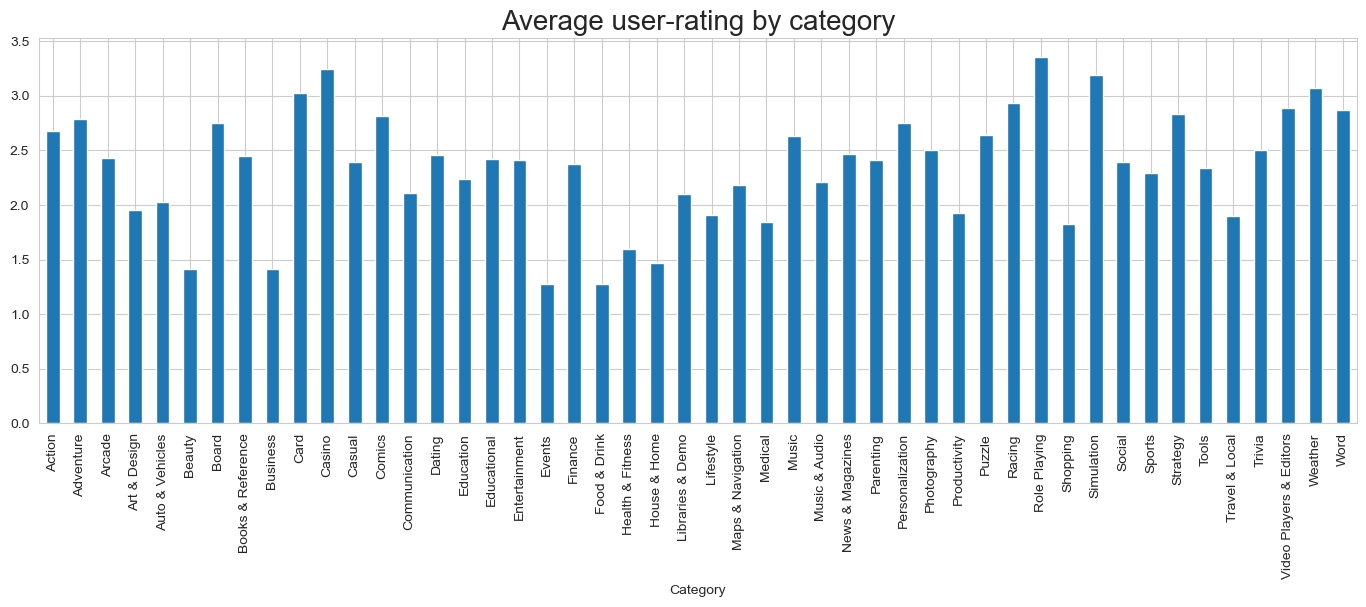

In [71]:
#Average user-rating by category
plt.figure(figsize=(17,5))
df.groupby('Category')['Rating'].mean().plot(kind='bar')
plt.title('Average user-rating by category',size = 20)

Since we noticed previously that about 46% of users did not rate most apps, this is not an accurate visualization.

# Visualization without the 0-rating outliers

Text(0.5, 1.0, 'Average user-rating by category')

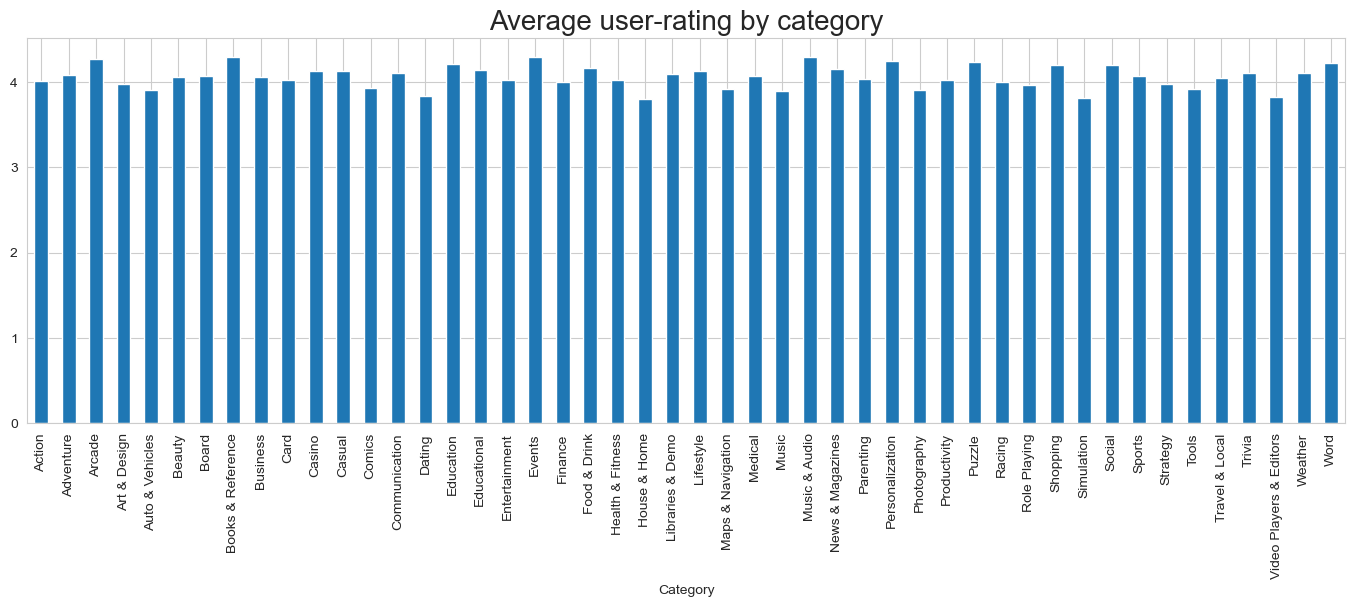

In [72]:
plt.figure(figsize=(17,5))
df[df['Rating']!=0.0].groupby('Category')['Rating'].mean().plot(kind='bar')
plt.title('Average user-rating by category',size = 20)

# Are Paid Apps Better Than Free Apps?

In [73]:
df.columns

Index(['App Name', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Released', 'Content Rating', 'Ad Supported',
       'In App Purchases', 'Editors Choice'],
      dtype='object')

In [74]:
df['Price'].isnull().sum()

0

Text(0.5, 1.0, 'Correlation Between Price and User ratings')

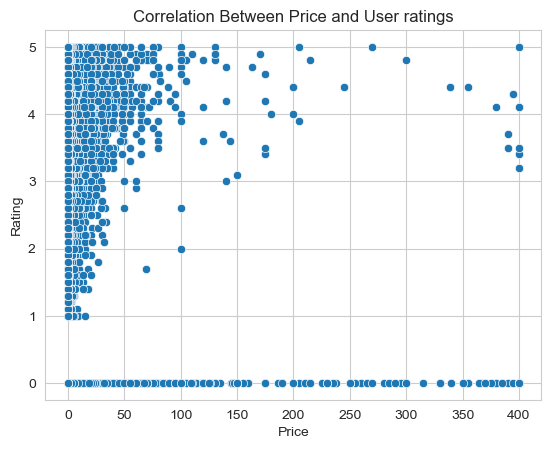

In [75]:
sns.scatterplot(x='Price',y='Rating',data=df)
plt.title('Correlation Between Price and User ratings')

- Nothing can be deduced from the plot

<AxesSubplot:ylabel='Rating'>

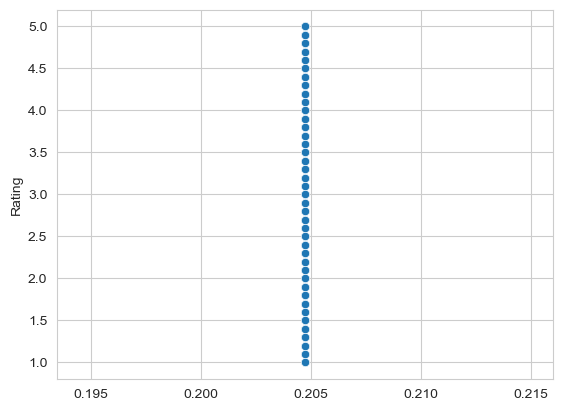

In [76]:
sns.scatterplot(y=df[df['Rating']!=0.0]['Rating'],x=df[df['Price']!=0.0]['Price'].min())

- Nothing can be deduced from the plot

Text(0.5, 1.0, 'Influence of Free apps on app rating')

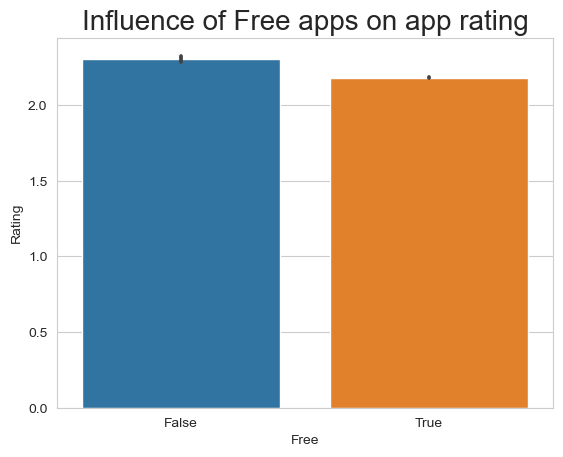

In [77]:
sns.barplot(x='Free',y='Rating',data=df)
plt.title('Influence of Free apps on app rating',size = 20)

- The average app ratings depending on whether the app is free or not are very close to each other.
- This means that the criteria of whether the app is free or not has no significant influence on the app ratings

Text(0.5, 1.0, 'Influence of Free apps on app rating')

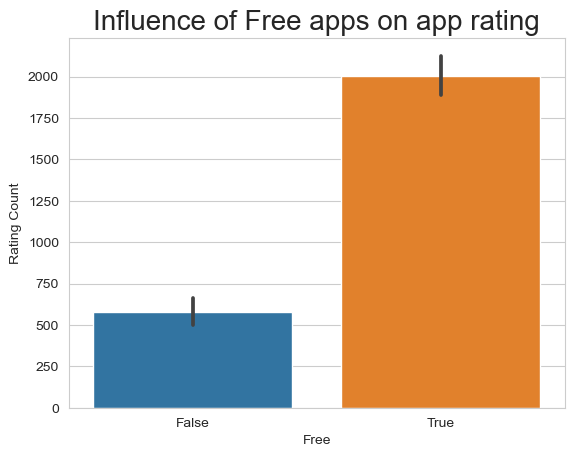

In [78]:
sns.barplot(x='Free',y='Rating Count',data=df)
plt.title('Influence of Free apps on app rating',size = 20)

By looking at this graph, we may infer that free apps usually have a larger customer base, and thus more likely to attract users than paid apps.

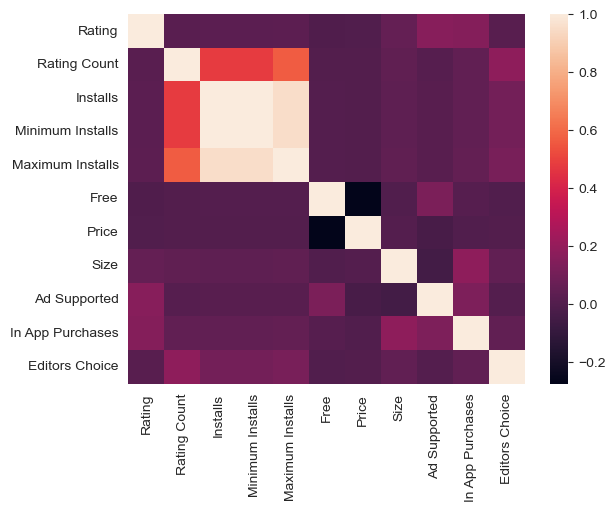

In [79]:
#Check for correlations to see what influences 'Rating' and 'Rating Count'
sns.heatmap(df.corr());

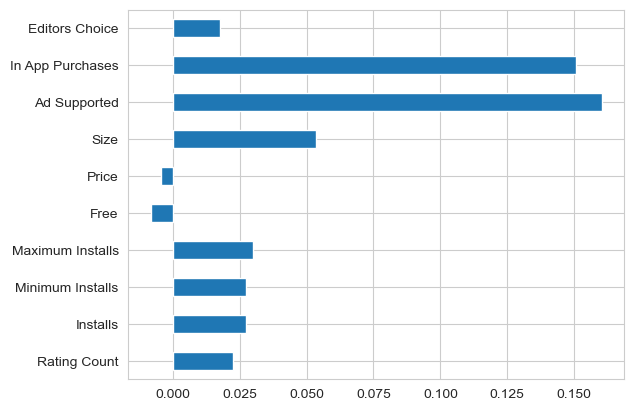

In [80]:
df.corr()['Rating'].drop('Rating').plot(kind='barh');

Both the In App Purchases and Presence of Ads slightly correlates with User ratings

Text(0.5, 1.0, 'Influence of Ads on app rating')

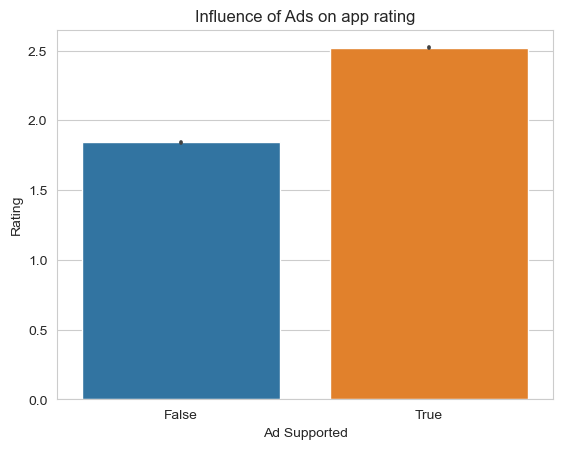

In [81]:
sns.barplot(x='Ad Supported',y='Rating',data=df)
plt.title('Influence of Ads on app rating')

Text(0.5, 1.0, 'Influence of In App Purchases on app rating')

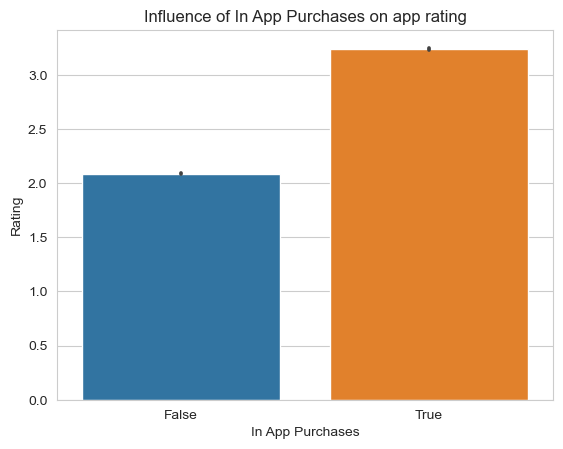

In [82]:
sns.barplot(x='In App Purchases',y='Rating',data=df)
plt.title('Influence of In App Purchases on app rating')

- The presence of In-app purchase relatively influences the user ratings. Developers and Companies should take note of this for better ratings from users

In [83]:
#Check for other correlations
df.columns

Index(['App Name', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Released', 'Content Rating', 'Ad Supported',
       'In App Purchases', 'Editors Choice'],
      dtype='object')

In [84]:
df.corr()

,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Ad Supported,In App Purchases,Editors Choice
Rating,1.000000,0.022546,0.027321,0.027321,0.030162,-0.008171,-0.004290,0.053431,0.160327,0.150562,0.017624
Rating Count,0.022546,1.000000,0.481072,0.481072,0.561774,0.002233,-0.000670,0.041240,0.011002,0.046963,0.180520
Installs,0.027321,0.481072,1.000000,1.000000,0.954547,0.003809,-0.001081,0.033905,0.014161,0.046553,0.101248
Minimum Installs,0.027321,0.481072,1.000000,1.000000,0.954547,0.003809,-0.001081,0.033905,0.014161,0.046553,0.101248
Maximum Installs,0.030162,0.561774,0.954547,0.954547,1.000000,0.004186,-0.001189,0.037910,0.016176,0.052343,0.114764
Free,-0.008171,0.002233,0.003809,0.003809,0.004186,1.000000,-0.276219,-0.006828,0.125371,0.008583,-0.003786
Price,-0.004290,-0.000670,-0.001081,-0.001081,-0.001189,-0.276219,1.000000,0.004592,-0.034283,-0.002816,0.000582
Size,0.053431,0.041240,0.033905,0.033905,0.037910,-0.006828,0.004592,1.000000,-0.048004,0.181897,0.046412
Ad Supported,0.160327,0.011002,0.014161,0.014161,0.016176,0.125371,-0.034283,-0.048004,1.000000,0.130819,0.006098
In App Purchases,0.150562,0.046963,0.046553,0.046553,0.052343,0.008583,-0.002816,0.181897,0.130819,1.000000,0.043988


In [85]:
df_expensive=df[['App Name','Price']].sort_values(by='Price',ascending=False).head(10)
df_expensive

,App Name,Price
544468,MESH Connect,400.00
2085590,Series Addict Pro - TV Guide,399.99
1602171,I'm Rich - VIP Club Limited,399.99
644212,Challenge Impossible Ball for you,399.99
268776,Taxes,399.99
1913716,Nu Media TV Live,399.99
652320,secret of life,399.99
1698479,Report Form Pro Nitro,399.99
1327436,Youmeunit PRO — ver.4U4M34353RY1,399.99
20127,TEST EGY,399.99


Text(0.5, 1.0, 'Top 10 most expensive apps')

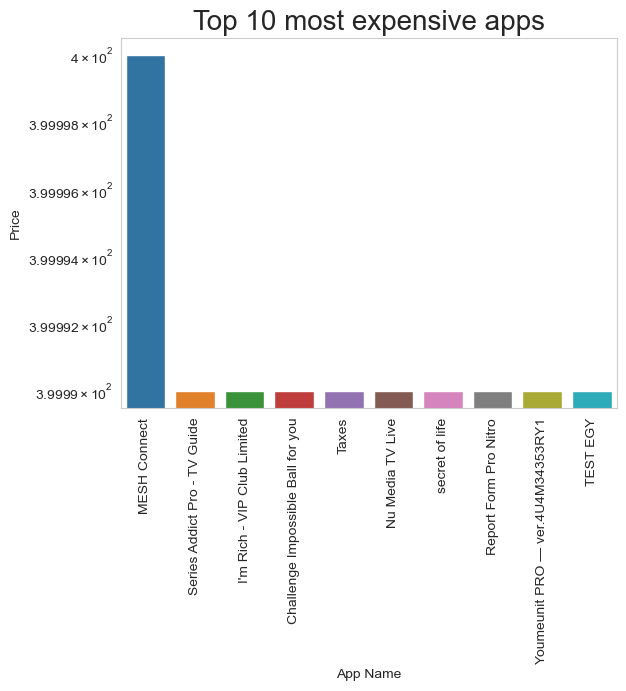

In [86]:
g=sns.barplot(x='App Name',y='Price',data=df_expensive)
g.set_yscale("log")
plt.xticks(rotation = 'vertical')
plt.title('Top 10 most expensive apps',size=20)

- The MESH Connect is the most expensive app on the store

# Feature Engineering

In [87]:
df['Free']=df['Free'].replace(True,1)
df['Free']=df['Free'].replace(False,0)
df['Free']

0          1
1          1
2          1
3          1
4          1
          ..
2312938    1
2312940    1
2312941    1
2312942    1
2312943    1
Name: Free, Length: 2190443, dtype: int64

In [88]:
df.columns

Index(['App Name', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Released', 'Content Rating', 'Ad Supported',
       'In App Purchases', 'Editors Choice'],
      dtype='object')

In [89]:
#Lets preview the columns
num_col

Index(['Rating', 'Rating Count', 'Installs', 'Minimum Installs',
       'Maximum Installs', 'Price', 'Size'],
      dtype='object')

In [90]:
cat_col

Index(['App Name', 'Category', 'Free', 'Currency', 'Released',
       'Content Rating', 'Ad Supported', 'In App Purchases', 'Editors Choice'],
      dtype='object')

In [91]:
df_info()

,data_type,null_count,unique_count
App Name,object,0,2062578
Category,object,0,48
Rating,float64,0,42
Rating Count,float64,0,34764
Installs,float64,0,20
Minimum Installs,float64,0,20
Maximum Installs,float64,0,235119
Free,int64,0,2
Price,float64,0,858
Currency,object,0,13


In [92]:
#check for multicolinearity

In [93]:
# categorical data
newcat_col=cat_col.drop(np.array(['App Name','Released','Currency','Free']))
newcat_col

Index(['Category', 'Content Rating', 'Ad Supported', 'In App Purchases',
       'Editors Choice'],
      dtype='object')

In [94]:
#Check for data cardinality
df_info()[df_info()['data_type']=='object']

,data_type,null_count,unique_count
App Name,object,0,2062578
Category,object,0,48
Currency,object,0,13
Released,object,0,4158
Content Rating,object,0,6


In [95]:
#Drop high cardinality data
df.drop(columns=['App Name','Released'],inplace=True)

In [96]:
df.drop(columns=['Category'],inplace=True)

In [ ]:
# Perform One Hot Encoding for categorical data
oh_encoder=One

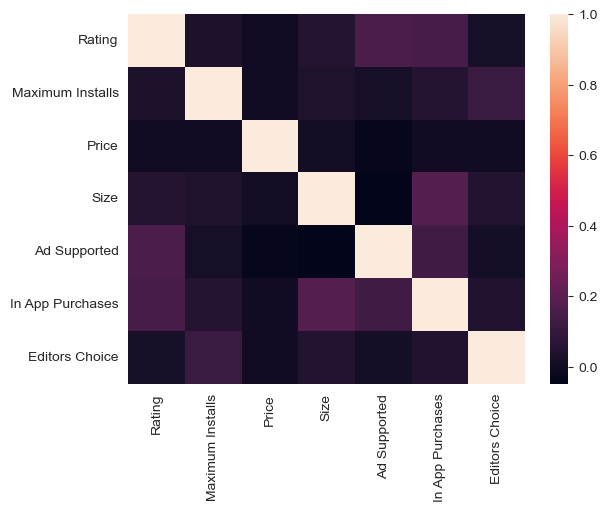

In [119]:
# Check for multicolinearity between features
sns.heatmap(df.drop(columns='Free').corr());

- The Installs, Maximum Installs, Minimum Installs and Rating Count columns exhibit some degree of multicolinearity

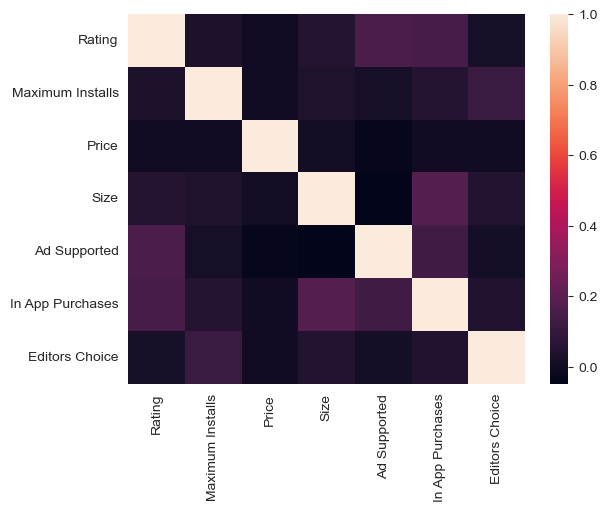

In [120]:
#We've dealt with multicollinearity
sns.heatmap(df.drop(columns='Free').corr());

In [109]:
#Spearman Correllation coefficients
#In relation the column "Free"
print('Spearman correlation coefficients of multicollinear features:')
print('Intalls=',df['Free'].corr(df['Installs']))
print('Rating Count=',df['Free'].corr(df['Rating Count']))
print('Minimum Installs=',df['Free'].corr(df['Minimum Installs']))
print('Maximum Installs=',df['Free'].corr(df['Maximum Installs']))

Spearman correlation coefficients of multicollinear features:
Intalls= 0.003808595239645759
Rating Count= 0.0022327521032017724
Minimum Installs= 0.003808595239645759
Maximum Installs= 0.004186340536001372


The Maximum Installs column correlates the most to the target variable. We will drop other columns to avoid multicollinearity.

In [112]:
#Drop columns
df.drop(columns=['Installs','Rating Count','Minimum Installs'], inplace=True)

In [123]:
#Convert bool datatypes to 1's and 0's
df['Ad Supported']=df['Ad Supported'].astype(int)
df['In App Purchases']=df['In App Purchases'].astype(int)
df['Editors Choice']=df['Editors Choice'].astype(int)

In [124]:
df_info()

,data_type,null_count,unique_count
Rating,float64,0,42
Maximum Installs,float64,0,235119
Free,int64,0,2
Price,float64,0,858
Currency,object,0,13
Size,float64,0,1646
Content Rating,object,0,6
Ad Supported,int32,0,2
In App Purchases,int32,0,2
Editors Choice,int32,0,2


In [125]:
df.head()

,Rating,Maximum Installs,Free,Price,Currency,Size,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,0.0,15.0,1,0.0,USD,10000000.0,Everyone,0,0,0
1,4.4,7662.0,1,0.0,USD,2900000.0,Everyone,1,0,0
2,0.0,58.0,1,0.0,USD,3700000.0,Everyone,0,0,0
3,5.0,19.0,1,0.0,USD,1800000.0,Everyone,1,0,0
4,0.0,478.0,1,0.0,USD,6200000.0,Everyone,0,0,0


# Split

In [132]:
X=df.drop(columns=['Free'])
y=df['Free']

In [140]:
#Split the data to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (1752354, 9)
X_test shape (438089, 9)
y_train shape (1752354,)
y_test shape (438089,)


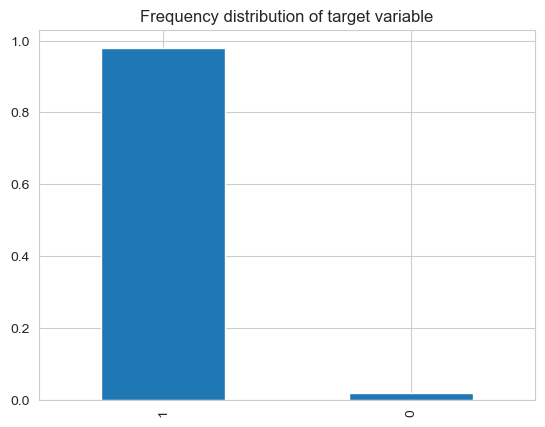

In [134]:
#Check the distribution of target variable
df['Free'].value_counts(normalize=True).plot(kind='bar', title='Frequency distribution of target variable');

- The data is highly imbalanced

# Data Resampling

    We will build 3 models using sampling techniques and the untouched dataset.

In [143]:
#Undersampling
undersampler=RandomUnderSampler(random_state=42)
X_train_under,y_train_under=undersampler.fit_resample(X_train,y_train)
print('X_train_under shape',X_train_under.shape)
print('y_train_under shape',y_train_under.shape)

X_train_under shape (67032, 9)
y_train_under shape (67032,)


In [145]:
#Oversampling
oversampler=RandomOverSampler(random_state=42)
X_train_over,y_train_over=oversampler.fit_resample(X_train,y_train)
print('X_train_over shape',X_train_over.shape)
print('y_train_over shape',y_train_over.shape)

X_train_over shape (3437676, 9)
y_train_over shape (3437676,)


# Model Building

In [153]:
# Baseline
baseline_score=y_train.value_counts(normalize=True).max()
print('Baseline accuracy score=',baseline_score)

Baseline accuracy score= 0.9808737275687447


In [154]:
#Train on undersampled data
rf_under=make_pipeline(
#     OneHotEncoder(),
    RandomForestClassifier(random_state=42)
)
rf_under.fit(X_train_under,y_train_under)

#Train on oversampled data
rf_over=make_pipeline(
#     OneHotEncoder(),
    RandomForestClassifier(random_state=42)
)
rf_under.fit(X_train_over,y_train_over)

#Train on untouched data
rf_normal=make_pipeline(
#     OneHotEncoder(),
    RandomForestClassifier(random_state=42)
)
rf_normal.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [157]:
# Evaluate Model performance
for model in [rf_under,rf_over,rf_normal]:
    acc_train=model.score(X_train,y_train)
    acc_test=model.score(X_test,y_test)
    print('Training Accuracy=',acc_train)
    print('Test Accuracy',acc_test)

ValueError: Found unknown categories [17336.0, 18404.0, 18945.0, 19482.0, 19736.0, 19973.0, 20035.0, 20240.0, 20311.0, 20462.0, 20463.0, 20856.0, 21762.0, 22534.0, 22541.0, 23004.0, 23088.0, 23236.0, 23670.0, 23696.0, 23707.0, 23754.0, 23918.0, 24177.0, 24523.0, 24573.0, 24891.0, 24901.0, 25182.0, 25251.0, 25320.0, 25505.0, 25570.0, 25587.0, 25772.0, 26142.0, 26393.0, 26623.0, 26915.0, 26916.0, 26932.0, 26959.0, 27016.0, 27132.0, 27184.0, 27227.0, 27494.0, 27667.0, 27750.0, 27943.0, 27964.0, 28008.0, 28029.0, 28061.0, 28090.0, 28127.0, 28134.0, 28163.0, 28406.0, 28489.0, 28562.0, 28572.0, 28703.0, 28717.0, 28805.0, 28878.0, 29057.0, 29061.0, 29094.0, 29114.0, 29186.0, 29200.0, 29239.0, 29280.0, 29336.0, 29340.0, 29356.0, 29357.0, 29427.0, 29526.0, 29556.0, 29695.0, 29825.0, 29893.0, 29914.0, 29960.0, 30044.0, 30102.0, 30200.0, 30259.0, 30503.0, 30549.0, 30578.0, 30632.0, 30702.0, 30757.0, 30786.0, 30862.0, 30990.0, 30991.0, 31000.0, 31024.0, 31267.0, 31274.0, 31385.0, 31405.0, 31501.0, 31539.0, 31542.0, 31571.0, 31626.0, 31685.0, 31692.0, 31813.0, 31890.0, 31896.0, 32015.0, 32145.0, 32166.0, 32180.0, 32191.0, 32219.0, 32220.0, 32239.0, 32263.0, 32285.0, 32308.0, 32357.0, 32445.0, 32453.0, 32473.0, 32586.0, 32589.0, 32654.0, 32777.0, 32821.0, 32845.0, 32914.0, 32923.0, 32937.0, 32954.0, 32964.0, 32992.0, 33112.0, 33143.0, 33178.0, 33196.0, 33215.0, 33234.0, 33364.0, 33466.0, 33490.0, 33522.0, 33542.0, 33552.0, 33571.0, 33578.0, 33583.0, 33700.0, 33774.0, 33804.0, 33854.0, 33898.0, 33961.0, 33966.0, 33991.0, 34016.0, 34067.0, 34181.0, 34228.0, 34245.0, 34336.0, 34353.0, 34376.0, 34382.0, 34406.0, 34413.0, 34462.0, 34522.0, 34529.0, 34545.0, 34647.0, 34673.0, 34768.0, 34793.0, 34801.0, 34842.0, 34891.0, 34903.0, 34936.0, 34970.0, 34994.0, 35009.0, 35049.0, 35097.0, 35109.0, 35125.0, 35196.0, 35318.0, 35329.0, 35422.0, 35447.0, 35473.0, 35485.0, 35493.0, 35551.0, 35555.0, 35562.0, 35567.0, 35573.0, 35606.0, 35642.0, 35689.0, 35701.0, 35753.0, 35797.0, 35941.0, 35951.0, 35972.0, 36036.0, 36069.0, 36077.0, 36113.0, 36127.0, 36146.0, 36178.0, 36196.0, 36238.0, 36296.0, 36330.0, 36344.0, 36564.0, 36679.0, 36686.0, 36720.0, 36726.0, 36741.0, 36761.0, 36802.0, 36868.0, 36918.0, 36929.0, 36945.0, 36990.0, 37013.0, 37040.0, 37048.0, 37081.0, 37086.0, 37095.0, 37124.0, 37264.0, 37278.0, 37328.0, 37333.0, 37371.0, 37395.0, 37420.0, 37421.0, 37431.0, 37436.0, 37441.0, 37475.0, 37481.0, 37491.0, 37515.0, 37518.0, 37533.0, 37554.0, 37555.0, 37571.0, 37576.0, 37627.0, 37686.0, 37697.0, 37739.0, 37745.0, 37777.0, 37809.0, 37870.0, 37872.0, 37914.0, 37926.0, 37984.0, 38016.0, 38033.0, 38077.0, 38105.0, 38111.0, 38205.0, 38215.0, 38291.0, 38298.0, 38316.0, 38331.0, 38333.0, 38343.0, 38361.0, 38383.0, 38388.0, 38397.0, 38418.0, 38449.0, 38476.0, 38483.0, 38516.0, 38627.0, 38705.0, 38712.0, 38715.0, 38724.0, 38790.0, 38797.0, 38805.0, 38827.0, 38852.0, 38857.0, 38877.0, 38899.0, 38902.0, 38908.0, 38911.0, 38923.0, 39012.0, 39049.0, 39086.0, 39173.0, 39256.0, 39263.0, 39282.0, 39286.0, 39319.0, 39347.0, 39467.0, 39486.0, 39487.0, 39495.0, 39521.0, 39544.0, 39575.0, 39587.0, 39614.0, 39620.0, 39626.0, 39669.0, 39732.0, 39740.0, 39745.0, 39775.0, 39786.0, 39857.0, 39867.0, 39875.0, 39888.0, 39906.0, 39948.0, 39953.0, 40000.0, 40015.0, 40020.0, 40023.0, 40057.0, 40060.0, 40062.0, 40064.0, 40090.0, 40121.0, 40156.0, 40163.0, 40180.0, 40234.0, 40283.0, 40285.0, 40298.0, 40330.0, 40398.0, 40427.0, 40429.0, 40441.0, 40446.0, 40449.0, 40462.0, 40497.0, 40503.0, 40665.0, 40699.0, 40702.0, 40727.0, 40746.0, 40787.0, 40790.0, 40816.0, 40837.0, 40839.0, 40855.0, 40856.0, 40871.0, 40881.0, 40933.0, 40976.0, 40978.0, 41003.0, 41057.0, 41064.0, 41078.0, 41093.0, 41126.0, 41233.0, 41278.0, 41281.0, 41299.0, 41311.0, 41318.0, 41349.0, 41365.0, 41367.0, 41371.0, 41395.0, 41411.0, 41412.0, 41430.0, 41451.0, 41477.0, 41513.0, 41536.0, 41557.0, 41572.0, 41628.0, 41652.0, 41710.0, 41724.0, 41788.0, 41845.0, 41852.0, 41914.0, 41968.0, 42023.0, 42035.0, 42039.0, 42047.0, 42053.0, 42075.0, 42095.0, 42113.0, 42152.0, 42170.0, 42186.0, 42197.0, 42198.0, 42200.0, 42231.0, 42243.0, 42245.0, 42299.0, 42326.0, 42414.0, 42416.0, 42421.0, 42529.0, 42554.0, 42579.0, 42585.0, 42587.0, 42666.0, 42693.0, 42701.0, 42703.0, 42770.0, 42786.0, 42791.0, 42802.0, 42817.0, 42829.0, 42842.0, 42843.0, 42847.0, 42859.0, 42867.0, 42871.0, 42884.0, 42901.0, 42926.0, 42947.0, 42998.0, 43045.0, 43059.0, 43090.0, 43111.0, 43126.0, 43139.0, 43141.0, 43198.0, 43223.0, 43238.0, 43245.0, 43257.0, 43298.0, 43304.0, 43364.0, 43411.0, 43416.0, 43427.0, 43451.0, 43483.0, 43501.0, 43514.0, 43553.0, 43589.0, 43598.0, 43599.0, 43628.0, 43633.0, 43653.0, 43662.0, 43685.0, 43689.0, 43712.0, 43725.0, 43742.0, 43753.0, 43758.0, 43772.0, 43781.0, 43797.0, 43825.0, 43831.0, 43921.0, 43965.0, 43997.0, 44003.0, 44034.0, 44036.0, 44050.0, 44054.0, 44073.0, 44095.0, 44118.0, 44119.0, 44124.0, 44148.0, 44183.0, 44203.0, 44213.0, 44214.0, 44226.0, 44228.0, 44246.0, 44267.0, 44315.0, 44318.0, 44346.0, 44387.0, 44391.0, 44432.0, 44436.0, 44448.0, 44456.0, 44474.0, 44482.0, 44492.0, 44503.0, 44514.0, 44523.0, 44526.0, 44527.0, 44545.0, 44574.0, 44601.0, 44611.0, 44620.0, 44629.0, 44633.0, 44670.0, 44688.0, 44723.0, 44735.0, 44740.0, 44750.0, 44764.0, 44786.0, 44807.0, 44808.0, 44824.0, 44860.0, 44910.0, 44913.0, 44921.0, 44923.0, 44934.0, 44947.0, 44948.0, 44975.0, 44988.0, 45028.0, 45054.0, 45070.0, 45095.0, 45097.0, 45107.0, 45136.0, 45145.0, 45151.0, 45210.0, 45213.0, 45267.0, 45271.0, 45273.0, 45275.0, 45282.0, 45285.0, 45290.0, 45304.0, 45310.0, 45343.0, 45349.0, 45359.0, 45397.0, 45398.0, 45438.0, 45486.0, 45494.0, 45528.0, 45582.0, 45595.0, 45601.0, 45612.0, 45661.0, 45665.0, 45666.0, 45686.0, 45724.0, 45727.0, 45749.0, 45769.0, 45775.0, 45908.0, 45912.0, 45916.0, 45938.0, 45950.0, 45955.0, 46001.0, 46022.0, 46027.0, 46030.0, 46043.0, 46112.0, 46166.0, 46171.0, 46177.0, 46186.0, 46214.0, 46228.0, 46231.0, 46232.0, 46242.0, 46270.0, 46292.0, 46300.0, 46316.0, 46323.0, 46363.0, 46375.0, 46387.0, 46407.0, 46416.0, 46463.0, 46495.0, 46526.0, 46628.0, 46664.0, 46685.0, 46687.0, 46706.0, 46738.0, 46740.0, 46778.0, 46780.0, 46791.0, 46796.0, 46801.0, 46804.0, 46829.0, 46852.0, 46891.0, 46904.0, 46914.0, 46916.0, 46930.0, 46956.0, 46957.0, 46989.0, 47004.0, 47008.0, 47016.0, 47057.0, 47067.0, 47072.0, 47091.0, 47095.0, 47098.0, 47110.0, 47120.0, 47176.0, 47182.0, 47231.0, 47236.0, 47268.0, 47271.0, 47275.0, 47282.0, 47319.0, 47320.0, 47330.0, 47333.0, 47367.0, 47375.0, 47376.0, 47450.0, 47482.0, 47556.0, 47584.0, 47603.0, 47622.0, 47626.0, 47642.0, 47652.0, 47682.0, 47694.0, 47708.0, 47723.0, 47725.0, 47733.0, 47751.0, 47778.0, 47787.0, 47824.0, 47846.0, 47869.0, 47882.0, 47885.0, 47895.0, 47907.0, 47913.0, 47917.0, 47947.0, 47972.0, 47975.0, 47998.0, 48004.0, 48005.0, 48022.0, 48038.0, 48051.0, 48072.0, 48081.0, 48087.0, 48089.0, 48093.0, 48118.0, 48173.0, 48183.0, 48218.0, 48223.0, 48238.0, 48241.0, 48253.0, 48261.0, 48265.0, 48275.0, 48276.0, 48280.0, 48282.0, 48305.0, 48315.0, 48340.0, 48356.0, 48358.0, 48382.0, 48422.0, 48464.0, 48465.0, 48478.0, 48550.0, 48552.0, 48555.0, 48561.0, 48583.0, 48592.0, 48613.0, 48619.0, 48624.0, 48651.0, 48674.0, 48714.0, 48751.0, 48791.0, 48792.0, 48805.0, 48823.0, 48834.0, 48839.0, 48846.0, 48874.0, 48875.0, 48943.0, 48968.0, 48970.0, 48992.0, 49010.0, 49014.0, 49035.0, 49069.0, 49072.0, 49093.0, 49118.0, 49143.0, 49169.0, 49170.0, 49184.0, 49213.0, 49243.0, 49248.0, 49255.0, 49256.0, 49261.0, 49286.0, 49321.0, 49327.0, 49328.0, 49350.0, 49386.0, 49387.0, 49414.0, 49439.0, 49502.0, 49516.0, 49526.0, 49540.0, 49545.0, 49546.0, 49564.0, 49576.0, 49584.0, 49627.0, 49635.0, 49640.0, 49655.0, 49671.0, 49687.0, 49695.0, 49698.0, 49745.0, 49759.0, 49790.0, 49793.0, 49844.0, 49855.0, 49869.0, 49871.0, 49887.0, 49890.0, 49892.0, 49934.0, 49943.0, 49944.0, 49959.0, 49961.0, 49987.0, 49991.0, 49995.0, 50035.0, 50036.0, 50108.0, 50134.0, 50140.0, 50163.0, 50170.0, 50186.0, 50216.0, 50217.0, 50223.0, 50279.0, 50290.0, 50293.0, 50299.0, 50320.0, 50324.0, 50339.0, 50358.0, 50376.0, 50413.0, 50415.0, 50491.0, 50492.0, 50497.0, 50512.0, 50527.0, 50561.0, 50594.0, 50605.0, 50607.0, 50629.0, 50644.0, 50652.0, 50656.0, 50670.0, 50694.0, 50703.0, 50736.0, 50786.0, 50813.0, 50821.0, 50827.0, 50838.0, 50847.0, 50852.0, 50854.0, 50890.0, 50894.0, 50896.0, 50903.0, 50922.0, 50923.0, 50927.0, 50939.0, 50952.0, 50955.0, 50977.0, 51024.0, 51026.0, 51061.0, 51068.0, 51103.0, 51116.0, 51143.0, 51144.0, 51178.0, 51239.0, 51240.0, 51241.0, 51278.0, 51294.0, 51328.0, 51337.0, 51348.0, 51378.0, 51390.0, 51398.0, 51403.0, 51412.0, 51441.0, 51449.0, 51464.0, 51474.0, 51481.0, 51515.0, 51522.0, 51535.0, 51562.0, 51571.0, 51572.0, 51586.0, 51617.0, 51625.0, 51706.0, 51712.0, 51726.0, 51733.0, 51736.0, 51758.0, 51767.0, 51840.0, 51850.0, 51863.0, 51888.0, 51889.0, 51907.0, 51934.0, 51940.0, 51941.0, 51965.0, 51974.0, 51976.0, 52011.0, 52061.0, 52145.0, 52170.0, 52215.0, 52226.0, 52238.0, 52284.0, 52296.0, 52300.0, 52310.0, 52351.0, 52366.0, 52372.0, 52375.0, 52389.0, 52409.0, 52437.0, 52441.0, 52443.0, 52467.0, 52475.0, 52491.0, 52512.0, 52550.0, 52557.0, 52564.0, 52575.0, 52580.0, 52622.0, 52669.0, 52690.0, 52712.0, 52722.0, 52736.0, 52743.0, 52768.0, 52781.0, 52783.0, 52814.0, 52874.0, 52891.0, 52894.0, 52912.0, 52925.0, 52930.0, 52946.0, 52969.0, 53038.0, 53055.0, 53067.0, 53069.0, 53071.0, 53080.0, 53094.0, 53096.0, 53116.0, 53150.0, 53154.0, 53191.0, 53195.0, 53204.0, 53231.0, 53234.0, 53247.0, 53262.0, 53345.0, 53352.0, 53380.0, 53386.0, 53389.0, 53402.0, 53464.0, 53471.0, 53477.0, 53480.0, 53492.0, 53509.0, 53512.0, 53518.0, 53528.0, 53531.0, 53533.0, 53593.0, 53614.0, 53666.0, 53713.0, 53720.0, 53747.0, 53751.0, 53770.0, 53799.0, 53814.0, 53858.0, 53863.0, 53911.0, 53915.0, 53919.0, 53937.0, 53953.0, 53994.0, 53998.0, 54002.0, 54013.0, 54021.0, 54028.0, 54030.0, 54037.0, 54052.0, 54053.0, 54054.0, 54071.0, 54115.0, 54125.0, 54188.0, 54197.0, 54199.0, 54209.0, 54225.0, 54227.0, 54233.0, 54244.0, 54266.0, 54316.0, 54335.0, 54342.0, 54349.0, 54368.0, 54376.0, 54381.0, 54430.0, 54434.0, 54436.0, 54443.0, 54449.0, 54529.0, 54545.0, 54555.0, 54623.0, 54643.0, 54655.0, 54681.0, 54691.0, 54695.0, 54704.0, 54719.0, 54748.0, 54749.0, 54763.0, 54769.0, 54818.0, 54828.0, 54846.0, 54853.0, 54867.0, 54892.0, 54911.0, 54933.0, 54982.0, 54990.0, 54991.0, 55003.0, 55010.0, 55028.0, 55031.0, 55044.0, 55050.0, 55052.0, 55102.0, 55153.0, 55161.0, 55169.0, 55170.0, 55191.0, 55193.0, 55198.0, 55201.0, 55245.0, 55268.0, 55284.0, 55287.0, 55297.0, 55320.0, 55356.0, 55404.0, 55472.0, 55480.0, 55482.0, 55499.0, 55578.0, 55593.0, 55613.0, 55618.0, 55619.0, 55628.0, 55641.0, 55649.0, 55650.0, 55665.0, 55692.0, 55713.0, 55750.0, 55784.0, 55796.0, 55825.0, 55838.0, 55848.0, 55866.0, 55867.0, 55874.0, 55896.0, 55901.0, 55910.0, 55913.0, 55915.0, 55917.0, 55955.0, 55973.0, 55978.0, 55984.0, 55999.0, 56000.0, 56003.0, 56076.0, 56088.0, 56089.0, 56098.0, 56107.0, 56112.0, 56221.0, 56229.0, 56239.0, 56259.0, 56279.0, 56328.0, 56331.0, 56332.0, 56347.0, 56379.0, 56385.0, 56387.0, 56405.0, 56429.0, 56467.0, 56469.0, 56479.0, 56491.0, 56493.0, 56512.0, 56516.0, 56517.0, 56518.0, 56531.0, 56548.0, 56554.0, 56557.0, 56571.0, 56572.0, 56584.0, 56610.0, 56623.0, 56649.0, 56664.0, 56674.0, 56697.0, 56718.0, 56724.0, 56733.0, 56800.0, 56819.0, 56835.0, 56836.0, 56841.0, 56849.0, 56886.0, 56902.0, 56926.0, 56951.0, 56981.0, 56998.0, 57011.0, 57013.0, 57038.0, 57049.0, 57053.0, 57091.0, 57113.0, 57125.0, 57126.0, 57137.0, 57170.0, 57176.0, 57191.0, 57204.0, 57209.0, 57222.0, 57229.0, 57253.0, 57259.0, 57270.0, 57305.0, 57307.0, 57349.0, 57373.0, 57378.0, 57383.0, 57409.0, 57441.0, 57458.0, 57463.0, 57467.0, 57478.0, 57481.0, 57485.0, 57503.0, 57505.0, 57561.0, 57565.0, 57569.0, 57571.0, 57604.0, 57655.0, 57663.0, 57666.0, 57673.0, 57687.0, 57694.0, 57695.0, 57711.0, 57713.0, 57729.0, 57735.0, 57737.0, 57745.0, 57757.0, 57768.0, 57811.0, 57812.0, 57825.0, 57853.0, 57860.0, 57872.0, 57877.0, 57880.0, 57910.0, 57938.0, 57958.0, 58033.0, 58037.0, 58039.0, 58052.0, 58067.0, 58073.0, 58107.0, 58127.0, 58151.0, 58166.0, 58177.0, 58219.0, 58228.0, 58243.0, 58303.0, 58308.0, 58328.0, 58332.0, 58345.0, 58349.0, 58356.0, 58406.0, 58435.0, 58441.0, 58460.0, 58519.0, 58534.0, 58536.0, 58601.0, 58619.0, 58621.0, 58663.0, 58666.0, 58667.0, 58672.0, 58689.0, 58695.0, 58707.0, 58711.0, 58713.0, 58716.0, 58788.0, 58799.0, 58800.0, 58803.0, 58827.0, 58843.0, 58853.0, 58913.0, 58965.0, 58969.0, 59014.0, 59015.0, 59039.0, 59040.0, 59052.0, 59062.0, 59067.0, 59092.0, 59106.0, 59148.0, 59150.0, 59152.0, 59176.0, 59179.0, 59201.0, 59211.0, 59214.0, 59244.0, 59254.0, 59300.0, 59359.0, 59364.0, 59408.0, 59410.0, 59423.0, 59427.0, 59451.0, 59471.0, 59498.0, 59531.0, 59532.0, 59547.0, 59554.0, 59563.0, 59580.0, 59610.0, 59620.0, 59628.0, 59630.0, 59664.0, 59687.0, 59699.0, 59742.0, 59750.0, 59769.0, 59787.0, 59788.0, 59829.0, 59835.0, 59862.0, 59898.0, 59990.0, 60019.0, 60030.0, 60093.0, 60101.0, 60111.0, 60125.0, 60128.0, 60137.0, 60146.0, 60168.0, 60191.0, 60237.0, 60240.0, 60242.0, 60243.0, 60267.0, 60275.0, 60278.0, 60280.0, 60309.0, 60320.0, 60324.0, 60343.0, 60344.0, 60358.0, 60363.0, 60380.0, 60396.0, 60400.0, 60413.0, 60442.0, 60450.0, 60465.0, 60479.0, 60489.0, 60528.0, 60532.0, 60561.0, 60571.0, 60582.0, 60590.0, 60608.0, 60660.0, 60668.0, 60679.0, 60685.0, 60687.0, 60689.0, 60729.0, 60766.0, 60774.0, 60784.0, 60803.0, 60806.0, 60819.0, 60849.0, 60870.0, 60908.0, 60918.0, 60920.0, 60926.0, 60943.0, 60957.0, 60967.0, 60999.0, 61032.0, 61050.0, 61066.0, 61073.0, 61106.0, 61133.0, 61150.0, 61195.0, 61198.0, 61218.0, 61228.0, 61236.0, 61239.0, 61241.0, 61252.0, 61254.0, 61259.0, 61275.0, 61300.0, 61302.0, 61343.0, 61393.0, 61395.0, 61408.0, 61438.0, 61448.0, 61478.0, 61485.0, 61498.0, 61503.0, 61518.0, 61554.0, 61587.0, 61608.0, 61620.0, 61632.0, 61642.0, 61676.0, 61681.0, 61682.0, 61690.0, 61692.0, 61694.0, 61732.0, 61778.0, 61780.0, 61807.0, 61818.0, 61820.0, 61829.0, 61863.0, 61887.0, 61895.0, 61907.0, 61908.0, 61915.0, 61924.0, 61929.0, 61931.0, 61932.0, 61945.0, 61954.0, 61956.0, 61965.0, 61970.0, 61977.0, 61982.0, 61990.0, 62023.0, 62064.0, 62076.0, 62083.0, 62086.0, 62106.0, 62109.0, 62126.0, 62155.0, 62194.0, 62228.0, 62233.0, 62237.0, 62277.0, 62283.0, 62310.0, 62316.0, 62332.0, 62336.0, 62340.0, 62345.0, 62349.0, 62354.0, 62360.0, 62369.0, 62395.0, 62402.0, 62418.0, 62450.0, 62452.0, 62467.0, 62470.0, 62472.0, 62475.0, 62509.0, 62515.0, 62526.0, 62528.0, 62539.0, 62540.0, 62566.0, 62567.0, 62572.0, 62601.0, 62609.0, 62643.0, 62660.0, 62661.0, 62662.0, 62678.0, 62689.0, 62707.0, 62720.0, 62751.0, 62794.0, 62799.0, 62815.0, 62831.0, 62838.0, 62840.0, 62842.0, 62844.0, 62853.0, 62859.0, 62865.0, 62869.0, 62882.0, 62932.0, 62939.0, 62943.0, 62951.0, 62952.0, 62963.0, 62966.0, 62982.0, 63002.0, 63065.0, 63069.0, 63072.0, 63146.0, 63166.0, 63172.0, 63175.0, 63189.0, 63213.0, 63227.0, 63233.0, 63243.0, 63245.0, 63253.0, 63277.0, 63282.0, 63290.0, 63300.0, 63308.0, 63328.0, 63331.0, 63335.0, 63350.0, 63353.0, 63365.0, 63381.0, 63401.0, 63405.0, 63414.0, 63416.0, 63449.0, 63483.0, 63484.0, 63489.0, 63498.0, 63502.0, 63504.0, 63506.0, 63507.0, 63520.0, 63549.0, 63572.0, 63589.0, 63590.0, 63602.0, 63613.0, 63622.0, 63628.0, 63643.0, 63649.0, 63653.0, 63657.0, 63662.0, 63720.0, 63729.0, 63736.0, 63738.0, 63770.0, 63788.0, 63799.0, 63809.0, 63844.0, 63846.0, 63856.0, 63868.0, 63876.0, 63888.0, 63894.0, 63930.0, 63934.0, 63973.0, 63998.0, 64014.0, 64019.0, 64050.0, 64054.0, 64079.0, 64081.0, 64097.0, 64103.0, 64134.0, 64156.0, 64161.0, 64170.0, 64175.0, 64177.0, 64193.0, 64209.0, 64233.0, 64240.0, 64244.0, 64250.0, 64269.0, 64278.0, 64279.0, 64282.0, 64288.0, 64289.0, 64291.0, 64303.0, 64304.0, 64311.0, 64314.0, 64319.0, 64324.0, 64381.0, 64388.0, 64411.0, 64417.0, 64429.0, 64448.0, 64488.0, 64515.0, 64517.0, 64519.0, 64529.0, 64576.0, 64634.0, 64683.0, 64698.0, 64705.0, 64712.0, 64742.0, 64766.0, 64783.0, 64784.0, 64789.0, 64807.0, 64810.0, 64847.0, 64849.0, 64851.0, 64856.0, 64857.0, 64878.0, 64899.0, 64902.0, 64906.0, 64929.0, 64931.0, 64960.0, 64968.0, 64977.0, 65002.0, 65024.0, 65040.0, 65051.0, 65055.0, 65058.0, 65071.0, 65074.0, 65075.0, 65095.0, 65096.0, 65098.0, 65111.0, 65136.0, 65149.0, 65166.0, 65184.0, 65207.0, 65215.0, 65227.0, 65231.0, 65238.0, 65246.0, 65276.0, 65320.0, 65323.0, 65324.0, 65368.0, 65373.0, 65395.0, 65402.0, 65403.0, 65419.0, 65437.0, 65440.0, 65456.0, 65467.0, 65477.0, 65500.0, 65503.0, 65538.0, 65557.0, 65558.0, 65586.0, 65603.0, 65605.0, 65617.0, 65623.0, 65635.0, 65649.0, 65654.0, 65672.0, 65682.0, 65684.0, 65702.0, 65741.0, 65749.0, 65773.0, 65794.0, 65830.0, 65856.0, 65875.0, 65893.0, 65895.0, 65902.0, 65915.0, 65929.0, 65952.0, 65966.0, 65980.0, 66034.0, 66060.0, 66071.0, 66093.0, 66097.0, 66103.0, 66138.0, 66140.0, 66146.0, 66183.0, 66191.0, 66192.0, 66198.0, 66212.0, 66213.0, 66215.0, 66231.0, 66234.0, 66240.0, 66252.0, 66287.0, 66289.0, 66293.0, 66295.0, 66331.0, 66341.0, 66342.0, 66350.0, 66360.0, 66370.0, 66373.0, 66409.0, 66426.0, 66466.0, 66498.0, 66515.0, 66523.0, 66534.0, 66539.0, 66541.0, 66557.0, 66591.0, 66614.0, 66616.0, 66624.0, 66642.0, 66652.0, 66663.0, 66691.0, 66704.0, 66706.0, 66755.0, 66762.0, 66778.0, 66782.0, 66793.0, 66813.0, 66861.0, 66875.0, 66876.0, 66897.0, 66927.0, 66950.0, 66959.0, 66960.0, 66968.0, 66989.0, 66999.0, 67012.0, 67014.0, 67035.0, 67082.0, 67087.0, 67090.0, 67095.0, 67122.0, 67125.0, 67129.0, 67130.0, 67161.0, 67171.0, 67176.0, 67183.0, 67190.0, 67215.0, 67227.0, 67247.0, 67253.0, 67269.0, 67289.0, 67302.0, 67341.0, 67358.0, 67361.0, 67363.0, 67369.0, 67413.0, 67422.0, 67426.0, 67431.0, 67460.0, 67461.0, 67479.0, 67487.0, 67495.0, 67538.0, 67549.0, 67564.0, 67565.0, 67579.0, 67622.0, 67632.0, 67685.0, 67693.0, 67701.0, 67711.0, 67744.0, 67749.0, 67750.0, 67767.0, 67776.0, 67795.0, 67804.0, 67813.0, 67833.0, 67838.0, 67843.0, 67873.0, 67878.0, 67879.0, 67885.0, 67931.0, 67932.0, 67933.0, 67934.0, 67958.0, 67966.0, 67967.0, 67969.0, 68009.0, 68047.0, 68106.0, 68107.0, 68118.0, 68147.0, 68173.0, 68175.0, 68176.0, 68178.0, 68188.0, 68191.0, 68202.0, 68206.0, 68208.0, 68214.0, 68237.0, 68248.0, 68268.0, 68270.0, 68295.0, 68310.0, 68314.0, 68324.0, 68325.0, 68327.0, 68335.0, 68344.0, 68351.0, 68355.0, 68367.0, 68369.0, 68370.0, 68383.0, 68398.0, 68399.0, 68408.0, 68412.0, 68418.0, 68440.0, 68447.0, 68450.0, 68460.0, 68479.0, 68483.0, 68520.0, 68524.0, 68538.0, 68541.0, 68548.0, 68578.0, 68584.0, 68590.0, 68602.0, 68621.0, 68628.0, 68642.0, 68658.0, 68663.0, 68667.0, 68668.0, 68671.0, 68674.0, 68681.0, 68682.0, 68700.0, 68721.0, 68736.0, 68752.0, 68756.0, 68810.0, 68823.0, 68849.0, 68852.0, 68860.0, 68865.0, 68883.0, 68889.0, 68907.0, 68909.0, 68927.0, 68934.0, 68938.0, 68948.0, 68955.0, 68976.0, 68984.0, 68986.0, 68994.0, 68995.0, 69013.0, 69028.0, 69038.0, 69069.0, 69070.0, 69077.0, 69078.0, 69102.0, 69127.0, 69131.0, 69135.0, 69136.0, 69150.0, 69159.0, 69169.0, 69170.0, 69202.0, 69204.0, 69223.0, 69224.0, 69228.0, 69243.0, 69248.0, 69264.0, 69265.0, 69284.0, 69298.0, 69310.0, 69317.0, 69335.0, 69340.0, 69343.0, 69389.0, 69391.0, 69404.0, 69409.0, 69420.0, 69422.0, 69427.0, 69449.0, 69468.0, 69473.0, 69492.0, 69503.0, 69505.0, 69526.0, 69539.0, 69553.0, 69561.0, 69565.0, 69578.0, 69595.0, 69618.0, 69631.0, 69635.0, 69641.0, 69644.0, 69666.0, 69704.0, 69708.0, 69716.0, 69731.0, 69737.0, 69743.0, 69768.0, 69778.0, 69795.0, 69807.0, 69808.0, 69812.0, 69816.0, 69826.0, 69836.0, 69840.0, 69847.0, 69871.0, 69889.0, 69921.0, 69942.0, 69989.0, 69990.0, 69996.0, 70005.0, 70017.0, 70026.0, 70052.0, 70066.0, 70074.0, 70076.0, 70084.0, 70086.0, 70096.0, 70098.0, 70100.0, 70115.0, 70128.0, 70173.0, 70183.0, 70191.0, 70196.0, 70199.0, 70201.0, 70202.0, 70209.0, 70214.0, 70215.0, 70218.0, 70227.0, 70232.0, 70235.0, 70246.0, 70255.0, 70258.0, 70279.0, 70284.0, 70291.0, 70293.0, 70310.0, 70331.0, 70336.0, 70361.0, 70371.0, 70372.0, 70379.0, 70388.0, 70395.0, 70409.0, 70412.0, 70424.0, 70429.0, 70453.0, 70461.0, 70473.0, 70480.0, 70510.0, 70522.0, 70524.0, 70545.0, 70573.0, 70575.0, 70576.0, 70593.0, 70597.0, 70600.0, 70616.0, 70621.0, 70647.0, 70648.0, 70653.0, 70670.0, 70696.0, 70699.0, 70703.0, 70730.0, 70737.0, 70739.0, 70755.0, 70757.0, 70776.0, 70783.0, 70793.0, 70802.0, 70820.0, 70837.0, 70862.0, 70863.0, 70873.0, 70883.0, 70906.0, 70920.0, 70922.0, 70924.0, 70933.0, 70946.0, 70954.0, 70957.0, 70958.0, 70959.0, 70971.0, 70980.0, 70985.0, 70992.0, 71006.0, 71011.0, 71013.0, 71014.0, 71017.0, 71018.0, 71021.0, 71031.0, 71050.0, 71053.0, 71058.0, 71066.0, 71070.0, 71074.0, 71087.0, 71089.0, 71093.0, 71122.0, 71124.0, 71125.0, 71161.0, 71169.0, 71176.0, 71185.0, 71202.0, 71220.0, 71226.0, 71227.0, 71232.0, 71234.0, 71250.0, 71271.0, 71286.0, 71303.0, 71305.0, 71316.0, 71368.0, 71371.0, 71372.0, 71374.0, 71381.0, 71397.0, 71410.0, 71411.0, 71414.0, 71418.0, 71436.0, 71448.0, 71451.0, 71472.0, 71479.0, 71513.0, 71529.0, 71538.0, 71544.0, 71547.0, 71550.0, 71573.0, 71576.0, 71586.0, 71587.0, 71590.0, 71598.0, 71604.0, 71625.0, 71633.0, 71640.0, 71642.0, 71652.0, 71656.0, 71657.0, 71661.0, 71671.0, 71723.0, 71725.0, 71758.0, 71764.0, 71773.0, 71777.0, 71785.0, 71789.0, 71792.0, 71802.0, 71809.0, 71811.0, 71815.0, 71820.0, 71829.0, 71857.0, 71858.0, 71865.0, 71866.0, 71891.0, 71892.0, 71901.0, 71911.0, 71940.0, 71942.0, 71951.0, 71972.0, 71979.0, 72024.0, 72045.0, 72057.0, 72064.0, 72084.0, 72085.0, 72087.0, 72089.0, 72097.0, 72111.0, 72115.0, 72118.0, 72145.0, 72168.0, 72182.0, 72217.0, 72228.0, 72237.0, 72242.0, 72243.0, 72247.0, 72261.0, 72289.0, 72295.0, 72297.0, 72300.0, 72305.0, 72318.0, 72329.0, 72335.0, 72359.0, 72403.0, 72408.0, 72409.0, 72414.0, 72419.0, 72427.0, 72429.0, 72433.0, 72443.0, 72459.0, 72466.0, 72484.0, 72496.0, 72514.0, 72524.0, 72536.0, 72547.0, 72571.0, 72573.0, 72592.0, 72608.0, 72661.0, 72696.0, 72697.0, 72712.0, 72725.0, 72733.0, 72743.0, 72752.0, 72754.0, 72762.0, 72785.0, 72800.0, 72802.0, 72827.0, 72834.0, 72844.0, 72845.0, 72853.0, 72855.0, 72862.0, 72864.0, 72885.0, 72886.0, 72896.0, 72897.0, 72906.0, 72942.0, 72943.0, 72956.0, 72981.0, 72985.0, 72986.0, 73011.0, 73014.0, 73023.0, 73058.0, 73060.0, 73069.0, 73104.0, 73106.0, 73122.0, 73150.0, 73160.0, 73188.0, 73200.0, 73251.0, 73253.0, 73254.0, 73263.0, 73285.0, 73297.0, 73303.0, 73310.0, 73321.0, 73322.0, 73337.0, 73350.0, 73362.0, 73368.0, 73377.0, 73385.0, 73403.0, 73405.0, 73409.0, 73411.0, 73426.0, 73441.0, 73454.0, 73464.0, 73500.0, 73501.0, 73511.0, 73514.0, 73525.0, 73529.0, 73590.0, 73602.0, 73607.0, 73614.0, 73633.0, 73636.0, 73646.0, 73662.0, 73669.0, 73726.0, 73738.0, 73744.0, 73779.0, 73785.0, 73846.0, 73852.0, 73866.0, 73897.0, 73901.0, 73902.0, 73910.0, 73926.0, 73927.0, 73930.0, 73945.0, 73949.0, 73959.0, 73979.0, 73984.0, 74018.0, 74056.0, 74063.0, 74074.0, 74079.0, 74082.0, 74105.0, 74120.0, 74133.0, 74152.0, 74182.0, 74186.0, 74194.0, 74196.0, 74199.0, 74215.0, 74224.0, 74235.0, 74244.0, 74250.0, 74251.0, 74268.0, 74274.0, 74275.0, 74287.0, 74289.0, 74319.0, 74335.0, 74362.0, 74365.0, 74367.0, 74381.0, 74391.0, 74419.0, 74449.0, 74504.0, 74511.0, 74515.0, 74516.0, 74518.0, 74545.0, 74585.0, 74588.0, 74612.0, 74623.0, 74631.0, 74636.0, 74641.0, 74656.0, 74690.0, 74694.0, 74708.0, 74749.0, 74750.0, 74752.0, 74756.0, 74767.0, 74785.0, 74787.0, 74841.0, 74869.0, 74884.0, 74896.0, 74926.0, 74941.0, 74945.0, 74961.0, 74978.0, 74994.0, 75006.0, 75010.0, 75034.0, 75046.0, 75058.0, 75072.0, 75074.0, 75083.0, 75084.0, 75116.0, 75117.0, 75125.0, 75128.0, 75131.0, 75133.0, 75149.0, 75175.0, 75178.0, 75192.0, 75193.0, 75217.0, 75226.0, 75232.0, 75253.0, 75263.0, 75277.0, 75290.0, 75322.0, 75354.0, 75366.0, 75375.0, 75376.0, 75377.0, 75384.0, 75402.0, 75405.0, 75423.0, 75426.0, 75457.0, 75466.0, 75468.0, 75490.0, 75497.0, 75505.0, 75506.0, 75536.0, 75537.0, 75559.0, 75573.0, 75577.0, 75581.0, 75588.0, 75598.0, 75602.0, 75614.0, 75618.0, 75633.0, 75634.0, 75636.0, 75643.0, 75649.0, 75659.0, 75669.0, 75670.0, 75710.0, 75717.0, 75721.0, 75727.0, 75728.0, 75738.0, 75765.0, 75785.0, 75787.0, 75800.0, 75809.0, 75822.0, 75827.0, 75835.0, 75850.0, 75851.0, 75863.0, 75866.0, 75869.0, 75883.0, 75886.0, 75888.0, 75905.0, 75907.0, 75925.0, 75930.0, 75934.0, 75935.0, 75945.0, 75949.0, 75973.0, 75985.0, 75994.0, 75995.0, 76004.0, 76006.0, 76008.0, 76011.0, 76055.0, 76058.0, 76071.0, 76074.0, 76126.0, 76127.0, 76128.0, 76152.0, 76176.0, 76183.0, 76213.0, 76220.0, 76223.0, 76234.0, 76244.0, 76256.0, 76270.0, 76280.0, 76289.0, 76294.0, 76297.0, 76300.0, 76306.0, 76310.0, 76319.0, 76320.0, 76323.0, 76340.0, 76342.0, 76357.0, 76362.0, 76363.0, 76366.0, 76368.0, 76382.0, 76418.0, 76425.0, 76426.0, 76444.0, 76464.0, 76481.0, 76495.0, 76505.0, 76515.0, 76552.0, 76561.0, 76582.0, 76598.0, 76611.0, 76628.0, 76643.0, 76671.0, 76689.0, 76691.0, 76694.0, 76706.0, 76742.0, 76744.0, 76761.0, 76769.0, 76783.0, 76784.0, 76840.0, 76843.0, 76845.0, 76860.0, 76867.0, 76900.0, 76916.0, 76921.0, 76927.0, 76942.0, 76955.0, 76957.0, 76959.0, 76967.0, 76973.0, 77052.0, 77055.0, 77060.0, 77074.0, 77083.0, 77090.0, 77091.0, 77098.0, 77114.0, 77123.0, 77135.0, 77136.0, 77139.0, 77145.0, 77180.0, 77190.0, 77215.0, 77224.0, 77240.0, 77242.0, 77245.0, 77253.0, 77289.0, 77321.0, 77322.0, 77324.0, 77328.0, 77385.0, 77413.0, 77421.0, 77432.0, 77445.0, 77451.0, 77463.0, 77488.0, 77490.0, 77493.0, 77494.0, 77506.0, 77509.0, 77525.0, 77539.0, 77554.0, 77563.0, 77566.0, 77578.0, 77582.0, 77590.0, 77634.0, 77644.0, 77648.0, 77659.0, 77666.0, 77678.0, 77679.0, 77682.0, 77684.0, 77685.0, 77697.0, 77700.0, 77716.0, 77754.0, 77774.0, 77789.0, 77795.0, 77807.0, 77813.0, 77819.0, 77823.0, 77844.0, 77870.0, 77891.0, 77895.0, 77902.0, 77941.0, 77967.0, 77968.0, 77974.0, 78021.0, 78060.0, 78102.0, 78105.0, 78145.0, 78155.0, 78181.0, 78203.0, 78254.0, 78260.0, 78261.0, 78263.0, 78267.0, 78269.0, 78272.0, 78302.0, 78306.0, 78330.0, 78357.0, 78384.0, 78390.0, 78394.0, 78418.0, 78431.0, 78476.0, 78483.0, 78492.0, 78527.0, 78528.0, 78533.0, 78554.0, 78563.0, 78565.0, 78580.0, 78609.0, 78625.0, 78632.0, 78645.0, 78670.0, 78680.0, 78693.0, 78696.0, 78705.0, 78726.0, 78733.0, 78738.0, 78745.0, 78750.0, 78758.0, 78759.0, 78794.0, 78809.0, 78816.0, 78821.0, 78830.0, 78832.0, 78838.0, 78848.0, 78887.0, 78928.0, 78936.0, 78976.0, 78983.0, 78984.0, 78990.0, 78992.0, 78998.0, 79000.0, 79006.0, 79010.0, 79023.0, 79035.0, 79060.0, 79071.0, 79073.0, 79076.0, 79082.0, 79085.0, 79094.0, 79109.0, 79110.0, 79115.0, 79123.0, 79134.0, 79150.0, 79155.0, 79163.0, 79169.0, 79171.0, 79189.0, 79192.0, 79199.0, 79213.0, 79225.0, 79226.0, 79240.0, 79244.0, 79260.0, 79267.0, 79272.0, 79292.0, 79305.0, 79350.0, 79360.0, 79361.0, 79389.0, 79394.0, 79412.0, 79420.0, 79436.0, 79437.0, 79455.0, 79461.0, 79470.0, 79477.0, 79487.0, 79490.0, 79493.0, 79509.0, 79529.0, 79537.0, 79540.0, 79572.0, 79578.0, 79587.0, 79589.0, 79594.0, 79603.0, 79606.0, 79617.0, 79619.0, 79628.0, 79640.0, 79664.0, 79698.0, 79716.0, 79718.0, 79748.0, 79762.0, 79789.0, 79794.0, 79796.0, 79811.0, 79823.0, 79825.0, 79843.0, 79850.0, 79856.0, 79858.0, 79868.0, 79877.0, 79884.0, 79914.0, 79926.0, 79939.0, 79942.0, 79955.0, 79958.0, 79964.0, 79966.0, 79971.0, 79999.0, 80002.0, 80015.0, 80025.0, 80064.0, 80074.0, 80084.0, 80091.0, 80100.0, 80103.0, 80136.0, 80149.0, 80170.0, 80174.0, 80176.0, 80178.0, 80212.0, 80219.0, 80228.0, 80233.0, 80276.0, 80285.0, 80288.0, 80304.0, 80313.0, 80321.0, 80325.0, 80334.0, 80347.0, 80358.0, 80359.0, 80375.0, 80393.0, 80403.0, 80408.0, 80415.0, 80421.0, 80423.0, 80438.0, 80453.0, 80492.0, 80508.0, 80515.0, 80519.0, 80533.0, 80536.0, 80554.0, 80556.0, 80560.0, 80591.0, 80603.0, 80618.0, 80636.0, 80649.0, 80653.0, 80662.0, 80674.0, 80701.0, 80702.0, 80711.0, 80721.0, 80731.0, 80783.0, 80791.0, 80807.0, 80837.0, 80840.0, 80848.0, 80858.0, 80870.0, 80879.0, 80885.0, 80888.0, 80895.0, 80899.0, 80901.0, 80910.0, 80913.0, 80925.0, 80933.0, 80940.0, 80943.0, 80949.0, 80960.0, 80968.0, 80972.0, 80991.0, 80996.0, 80998.0, 81015.0, 81055.0, 81059.0, 81066.0, 81069.0, 81075.0, 81082.0, 81101.0, 81105.0, 81117.0, 81124.0, 81126.0, 81136.0, 81168.0, 81199.0, 81203.0, 81222.0, 81243.0, 81254.0, 81293.0, 81302.0, 81304.0, 81314.0, 81321.0, 81380.0, 81387.0, 81389.0, 81392.0, 81400.0, 81408.0, 81434.0, 81454.0, 81464.0, 81465.0, 81469.0, 81479.0, 81486.0, 81496.0, 81509.0, 81540.0, 81543.0, 81548.0, 81597.0, 81612.0, 81613.0, 81616.0, 81621.0, 81636.0, 81653.0, 81659.0, 81662.0, 81668.0, 81675.0, 81696.0, 81697.0, 81699.0, 81710.0, 81718.0, 81764.0, 81780.0, 81793.0, 81795.0, 81837.0, 81853.0, 81920.0, 81929.0, 81935.0, 81946.0, 81956.0, 81966.0, 81978.0, 81995.0, 82006.0, 82009.0, 82012.0, 82025.0, 82028.0, 82038.0, 82060.0, 82061.0, 82139.0, 82157.0, 82166.0, 82171.0, 82182.0, 82189.0, 82196.0, 82224.0, 82237.0, 82242.0, 82277.0, 82281.0, 82294.0, 82303.0, 82306.0, 82311.0, 82329.0, 82338.0, 82350.0, 82356.0, 82358.0, 82368.0, 82370.0, 82383.0, 82385.0, 82389.0, 82390.0, 82400.0, 82404.0, 82428.0, 82433.0, 82439.0, 82455.0, 82457.0, 82459.0, 82462.0, 82464.0, 82475.0, 82481.0, 82483.0, 82490.0, 82491.0, 82536.0, 82547.0, 82553.0, 82555.0, 82580.0, 82589.0, 82599.0, 82619.0, 82627.0, 82646.0, 82649.0, 82650.0, 82662.0, 82670.0, 82682.0, 82693.0, 82694.0, 82713.0, 82721.0, 82728.0, 82746.0, 82753.0, 82756.0, 82767.0, 82773.0, 82797.0, 82801.0, 82807.0, 82819.0, 82831.0, 82848.0, 82867.0, 82882.0, 82885.0, 82889.0, 82924.0, 82926.0, 82939.0, 82948.0, 82957.0, 82970.0, 82982.0, 82993.0, 83012.0, 83017.0, 83083.0, 83101.0, 83102.0, 83109.0, 83118.0, 83149.0, 83165.0, 83175.0, 83181.0, 83185.0, 83186.0, 83193.0, 83202.0, 83237.0, 83239.0, 83260.0, 83261.0, 83285.0, 83295.0, 83306.0, 83316.0, 83323.0, 83327.0, 83338.0, 83354.0, 83358.0, 83362.0, 83373.0, 83379.0, 83421.0, 83443.0, 83444.0, 83463.0, 83467.0, 83469.0, 83498.0, 83514.0, 83519.0, 83534.0, 83554.0, 83561.0, 83565.0, 83580.0, 83601.0, 83616.0, 83618.0, 83621.0, 83636.0, 83640.0, 83661.0, 83662.0, 83663.0, 83668.0, 83677.0, 83679.0, 83740.0, 83744.0, 83747.0, 83755.0, 83764.0, 83796.0, 83801.0, 83803.0, 83825.0, 83828.0, 83837.0, 83868.0, 83872.0, 83873.0, 83882.0, 83897.0, 83913.0, 83918.0, 83926.0, 83941.0, 83954.0, 83973.0, 83975.0, 83980.0, 83983.0, 83988.0, 84002.0, 84010.0, 84039.0, 84040.0, 84048.0, 84049.0, 84050.0, 84053.0, 84070.0, 84084.0, 84091.0, 84100.0, 84128.0, 84162.0, 84187.0, 84190.0, 84212.0, 84214.0, 84221.0, 84222.0, 84226.0, 84240.0, 84242.0, 84256.0, 84275.0, 84277.0, 84281.0, 84296.0, 84297.0, 84310.0, 84323.0, 84324.0, 84353.0, 84369.0, 84376.0, 84392.0, 84395.0, 84417.0, 84429.0, 84430.0, 84442.0, 84447.0, 84453.0, 84454.0, 84464.0, 84480.0, 84509.0, 84518.0, 84523.0, 84545.0, 84560.0, 84600.0, 84617.0, 84630.0, 84644.0, 84647.0, 84648.0, 84663.0, 84675.0, 84683.0, 84713.0, 84728.0, 84737.0, 84742.0, 84749.0, 84770.0, 84778.0, 84781.0, 84783.0, 84806.0, 84810.0, 84811.0, 84822.0, 84844.0, 84848.0, 84863.0, 84865.0, 84876.0, 84888.0, 84900.0, 84903.0, 84908.0, 84920.0, 84962.0, 84975.0, 84980.0, 84997.0, 84998.0, 85001.0, 85038.0, 85054.0, 85058.0, 85061.0, 85090.0, 85099.0, 85108.0, 85113.0, 85125.0, 85135.0, 85143.0, 85146.0, 85176.0, 85177.0, 85182.0, 85203.0, 85205.0, 85213.0, 85221.0, 85292.0, 85295.0, 85307.0, 85315.0, 85318.0, 85329.0, 85337.0, 85348.0, 85352.0, 85359.0, 85369.0, 85386.0, 85388.0, 85389.0, 85390.0, 85391.0, 85392.0, 85410.0, 85427.0, 85430.0, 85445.0, 85476.0, 85501.0, 85505.0, 85506.0, 85509.0, 85515.0, 85520.0, 85532.0, 85541.0, 85567.0, 85586.0, 85589.0, 85604.0, 85608.0, 85623.0, 85632.0, 85649.0, 85655.0, 85657.0, 85672.0, 85681.0, 85690.0, 85692.0, 85702.0, 85706.0, 85716.0, 85720.0, 85736.0, 85739.0, 85743.0, 85745.0, 85746.0, 85747.0, 85749.0, 85750.0, 85760.0, 85776.0, 85785.0, 85803.0, 85805.0, 85818.0, 85841.0, 85845.0, 85847.0, 85853.0, 85878.0, 85881.0, 85883.0, 85916.0, 85931.0, 85933.0, 85935.0, 85947.0, 85985.0, 85994.0, 86000.0, 86009.0, 86020.0, 86055.0, 86060.0, 86065.0, 86075.0, 86077.0, 86078.0, 86104.0, 86107.0, 86110.0, 86116.0, 86125.0, 86132.0, 86136.0, 86145.0, 86146.0, 86166.0, 86168.0, 86178.0, 86179.0, 86211.0, 86224.0, 86229.0, 86251.0, 86253.0, 86266.0, 86270.0, 86286.0, 86293.0, 86295.0, 86299.0, 86304.0, 86314.0, 86330.0, 86343.0, 86344.0, 86348.0, 86365.0, 86374.0, 86376.0, 86398.0, 86427.0, 86453.0, 86481.0, 86498.0, 86499.0, 86504.0, 86512.0, 86519.0, 86526.0, 86540.0, 86561.0, 86570.0, 86596.0, 86627.0, 86658.0, 86678.0, 86685.0, 86705.0, 86718.0, 86731.0, 86748.0, 86755.0, 86769.0, 86779.0, 86782.0, 86788.0, 86794.0, 86813.0, 86827.0, 86846.0, 86848.0, 86850.0, 86861.0, 86865.0, 86877.0, 86891.0, 86914.0, 86938.0, 86947.0, 86981.0, 86986.0, 87016.0, 87028.0, 87034.0, 87058.0, 87070.0, 87078.0, 87089.0, 87090.0, 87153.0, 87163.0, 87173.0, 87174.0, 87182.0, 87187.0, 87202.0, 87215.0, 87225.0, 87230.0, 87232.0, 87235.0, 87239.0, 87241.0, 87243.0, 87255.0, 87257.0, 87274.0, 87277.0, 87307.0, 87313.0, 87314.0, 87325.0, 87341.0, 87353.0, 87355.0, 87356.0, 87367.0, 87369.0, 87380.0, 87382.0, 87386.0, 87392.0, 87393.0, 87420.0, 87444.0, 87454.0, 87459.0, 87478.0, 87481.0, 87483.0, 87485.0, 87505.0, 87508.0, 87514.0, 87528.0, 87552.0, 87575.0, 87583.0, 87622.0, 87631.0, 87642.0, 87664.0, 87671.0, 87674.0, 87688.0, 87693.0, 87700.0, 87710.0, 87723.0, 87775.0, 87784.0, 87818.0, 87821.0, 87834.0, 87850.0, 87852.0, 87861.0, 87877.0, 87878.0, 87883.0, 87894.0, 87901.0, 87904.0, 87905.0, 87915.0, 87919.0, 87925.0, 87930.0, 87937.0, 87951.0, 87988.0, 87989.0, 87991.0, 88016.0, 88049.0, 88054.0, 88057.0, 88067.0, 88071.0, 88084.0, 88088.0, 88089.0, 88090.0, 88092.0, 88097.0, 88099.0, 88104.0, 88107.0, 88109.0, 88124.0, 88137.0, 88142.0, 88143.0, 88151.0, 88170.0, 88185.0, 88189.0, 88206.0, 88214.0, 88244.0, 88251.0, 88253.0, 88255.0, 88258.0, 88262.0, 88272.0, 88273.0, 88285.0, 88293.0, 88318.0, 88337.0, 88346.0, 88357.0, 88366.0, 88395.0, 88405.0, 88407.0, 88408.0, 88410.0, 88487.0, 88508.0, 88523.0, 88538.0, 88544.0, 88547.0, 88565.0, 88572.0, 88576.0, 88602.0, 88645.0, 88659.0, 88660.0, 88692.0, 88706.0, 88721.0, 88724.0, 88726.0, 88733.0, 88734.0, 88742.0, 88746.0, 88753.0, 88798.0, 88803.0, 88814.0, 88816.0, 88834.0, 88852.0, 88855.0, 88857.0, 88858.0, 88871.0, 88894.0, 88898.0, 88900.0, 88915.0, 88916.0, 88924.0, 88938.0, 88944.0, 88958.0, 88960.0, 88961.0, 88976.0, 88979.0, 88982.0, 88999.0, 89022.0, 89039.0, 89069.0, 89115.0, 89145.0, 89159.0, 89161.0, 89171.0, 89177.0, 89196.0, 89206.0, 89207.0, 89249.0, 89256.0, 89285.0, 89308.0, 89310.0, 89318.0, 89336.0, 89342.0, 89344.0, 89374.0, 89380.0, 89428.0, 89435.0, 89436.0, 89437.0, 89461.0, 89468.0, 89477.0, 89480.0, 89493.0, 89500.0, 89519.0, 89533.0, 89545.0, 89565.0, 89575.0, 89589.0, 89591.0, 89598.0, 89619.0, 89631.0, 89633.0, 89635.0, 89637.0, 89652.0, 89667.0, 89694.0, 89695.0, 89701.0, 89707.0, 89718.0, 89751.0, 89758.0, 89763.0, 89792.0, 89800.0, 89801.0, 89811.0, 89860.0, 89867.0, 89879.0, 89884.0, 89907.0, 89912.0, 89924.0, 89927.0, 89938.0, 89943.0, 89957.0, 89975.0, 89985.0, 89994.0, 90020.0, 90028.0, 90029.0, 90035.0, 90036.0, 90042.0, 90046.0, 90054.0, 90120.0, 90155.0, 90161.0, 90175.0, 90178.0, 90186.0, 90190.0, 90217.0, 90225.0, 90244.0, 90277.0, 90279.0, 90311.0, 90357.0, 90366.0, 90367.0, 90389.0, 90401.0, 90419.0, 90446.0, 90447.0, 90472.0, 90477.0, 90483.0, 90497.0, 90502.0, 90504.0, 90508.0, 90522.0, 90530.0, 90556.0, 90577.0, 90596.0, 90599.0, 90630.0, 90636.0, 90641.0, 90645.0, 90646.0, 90652.0, 90654.0, 90661.0, 90680.0, 90689.0, 90695.0, 90697.0, 90698.0, 90703.0, 90708.0, 90713.0, 90721.0, 90726.0, 90733.0, 90735.0, 90738.0, 90750.0, 90752.0, 90764.0, 90771.0, 90795.0, 90798.0, 90811.0, 90841.0, 90848.0, 90850.0, 90853.0, 90854.0, 90860.0, 90871.0, 90879.0, 90887.0, 90891.0, 90896.0, 90897.0, 90898.0, 90907.0, 90910.0, 90930.0, 90943.0, 90956.0, 90969.0, 90986.0, 90992.0, 90996.0, 90998.0, 91007.0, 91022.0, 91028.0, 91033.0, 91061.0, 91083.0, 91084.0, 91107.0, 91136.0, 91151.0, 91156.0, 91165.0, 91167.0, 91172.0, 91183.0, 91184.0, 91196.0, 91205.0, 91209.0, 91216.0, 91228.0, 91241.0, 91266.0, 91280.0, 91301.0, 91309.0, 91347.0, 91400.0, 91405.0, 91406.0, 91413.0, 91435.0, 91454.0, 91458.0, 91466.0, 91482.0, 91484.0, 91497.0, 91504.0, 91520.0, 91542.0, 91545.0, 91578.0, 91580.0, 91599.0, 91624.0, 91633.0, 91651.0, 91666.0, 91669.0, 91673.0, 91676.0, 91687.0, 91696.0, 91698.0, 91702.0, 91703.0, 91731.0, 91737.0, 91740.0, 91779.0, 91794.0, 91796.0, 91806.0, 91825.0, 91833.0, 91841.0, 91846.0, 91896.0, 91907.0, 91913.0, 91918.0, 91940.0, 91941.0, 91956.0, 91998.0, 92001.0, 92016.0, 92017.0, 92021.0, 92030.0, 92049.0, 92053.0, 92097.0, 92120.0, 92128.0, 92159.0, 92173.0, 92192.0, 92216.0, 92233.0, 92239.0, 92244.0, 92245.0, 92263.0, 92285.0, 92296.0, 92298.0, 92302.0, 92305.0, 92332.0, 92334.0, 92350.0, 92373.0, 92380.0, 92385.0, 92398.0, 92411.0, 92417.0, 92424.0, 92427.0, 92451.0, 92462.0, 92465.0, 92483.0, 92488.0, 92490.0, 92500.0, 92504.0, 92513.0, 92535.0, 92538.0, 92576.0, 92593.0, 92597.0, 92625.0, 92636.0, 92650.0, 92675.0, 92676.0, 92693.0, 92717.0, 92736.0, 92748.0, 92807.0, 92821.0, 92825.0, 92844.0, 92845.0, 92846.0, 92847.0, 92849.0, 92853.0, 92855.0, 92898.0, 92906.0, 92909.0, 92949.0, 92979.0, 92984.0, 92985.0, 92986.0, 92995.0, 93000.0, 93020.0, 93027.0, 93028.0, 93035.0, 93041.0, 93051.0, 93056.0, 93060.0, 93087.0, 93088.0, 93100.0, 93126.0, 93155.0, 93160.0, 93162.0, 93201.0, 93232.0, 93248.0, 93294.0, 93333.0, 93338.0, 93380.0, 93386.0, 93405.0, 93422.0, 93443.0, 93460.0, 93473.0, 93489.0, 93494.0, 93524.0, 93528.0, 93563.0, 93586.0, 93597.0, 93599.0, 93608.0, 93609.0, 93621.0, 93632.0, 93639.0, 93646.0, 93652.0, 93713.0, 93722.0, 93730.0, 93735.0, 93748.0, 93760.0, 93801.0, 93829.0, 93835.0, 93845.0, 93855.0, 93862.0, 93882.0, 93894.0, 93896.0, 93902.0, 93908.0, 93932.0, 93958.0, 93976.0, 93982.0, 94001.0, 94012.0, 94033.0, 94068.0, 94072.0, 94074.0, 94084.0, 94088.0, 94090.0, 94096.0, 94097.0, 94104.0, 94138.0, 94151.0, 94158.0, 94160.0, 94186.0, 94187.0, 94192.0, 94200.0, 94203.0, 94228.0, 94265.0, 94269.0, 94274.0, 94277.0, 94289.0, 94292.0, 94301.0, 94305.0, 94309.0, 94367.0, 94374.0, 94398.0, 94414.0, 94423.0, 94433.0, 94455.0, 94461.0, 94488.0, 94509.0, 94512.0, 94524.0, 94526.0, 94535.0, 94542.0, 94548.0, 94575.0, 94576.0, 94581.0, 94587.0, 94588.0, 94592.0, 94605.0, 94629.0, 94634.0, 94649.0, 94656.0, 94684.0, 94696.0, 94710.0, 94720.0, 94722.0, 94729.0, 94734.0, 94743.0, 94762.0, 94763.0, 94765.0, 94766.0, 94767.0, 94806.0, 94811.0, 94818.0, 94835.0, 94852.0, 94903.0, 94907.0, 94919.0, 94923.0, 94924.0, 94925.0, 94927.0, 94934.0, 94943.0, 94979.0, 94981.0, 94988.0, 94991.0, 94994.0, 94997.0, 95001.0, 95009.0, 95028.0, 95046.0, 95047.0, 95048.0, 95055.0, 95060.0, 95076.0, 95089.0, 95144.0, 95177.0, 95181.0, 95186.0, 95195.0, 95196.0, 95221.0, 95238.0, 95265.0, 95269.0, 95278.0, 95282.0, 95306.0, 95330.0, 95343.0, 95349.0, 95353.0, 95367.0, 95391.0, 95454.0, 95482.0, 95505.0, 95555.0, 95560.0, 95586.0, 95587.0, 95610.0, 95631.0, 95635.0, 95645.0, 95648.0, 95650.0, 95651.0, 95665.0, 95666.0, 95667.0, 95673.0, 95676.0, 95680.0, 95681.0, 95682.0, 95698.0, 95716.0, 95718.0, 95720.0, 95728.0, 95731.0, 95737.0, 95744.0, 95761.0, 95780.0, 95840.0, 95857.0, 95860.0, 95864.0, 95870.0, 95871.0, 95874.0, 95877.0, 95885.0, 95891.0, 95895.0, 95907.0, 95918.0, 95925.0, 95962.0, 96005.0, 96013.0, 96018.0, 96025.0, 96037.0, 96091.0, 96092.0, 96095.0, 96108.0, 96112.0, 96122.0, 96125.0, 96144.0, 96146.0, 96162.0, 96167.0, 96201.0, 96202.0, 96220.0, 96222.0, 96227.0, 96238.0, 96249.0, 96252.0, 96274.0, 96286.0, 96293.0, 96294.0, 96348.0, 96363.0, 96373.0, 96403.0, 96413.0, 96415.0, 96422.0, 96439.0, 96444.0, 96463.0, 96473.0, 96497.0, 96511.0, 96555.0, 96557.0, 96561.0, 96566.0, 96572.0, 96581.0, 96583.0, 96593.0, 96598.0, 96606.0, 96608.0, 96617.0, 96626.0, 96637.0, 96642.0, 96676.0, 96683.0, 96690.0, 96702.0, 96722.0, 96730.0, 96751.0, 96776.0, 96811.0, 96820.0, 96835.0, 96840.0, 96844.0, 96860.0, 96867.0, 96908.0, 96914.0, 96927.0, 96935.0, 96960.0, 96974.0, 96975.0, 96978.0, 96996.0, 96998.0, 97020.0, 97044.0, 97064.0, 97076.0, 97088.0, 97091.0, 97102.0, 97113.0, 97128.0, 97132.0, 97135.0, 97136.0, 97146.0, 97154.0, 97155.0, 97159.0, 97163.0, 97174.0, 97177.0, 97209.0, 97215.0, 97221.0, 97222.0, 97251.0, 97262.0, 97282.0, 97285.0, 97295.0, 97308.0, 97313.0, 97336.0, 97355.0, 97361.0, 97380.0, 97387.0, 97391.0, 97404.0, 97436.0, 97437.0, 97445.0, 97475.0, 97478.0, 97499.0, 97504.0, 97506.0, 97510.0, 97539.0, 97544.0, 97548.0, 97566.0, 97590.0, 97602.0, 97622.0, 97638.0, 97648.0, 97660.0, 97670.0, 97680.0, 97682.0, 97701.0, 97709.0, 97718.0, 97747.0, 97749.0, 97764.0, 97769.0, 97776.0, 97779.0, 97782.0, 97786.0, 97791.0, 97797.0, 97805.0, 97812.0, 97817.0, 97827.0, 97830.0, 97834.0, 97843.0, 97856.0, 97870.0, 97875.0, 97877.0, 97907.0, 97924.0, 97925.0, 97946.0, 97956.0, 97959.0, 97966.0, 97972.0, 97982.0, 97985.0, 97994.0, 97995.0, 97998.0, 98023.0, 98028.0, 98038.0, 98115.0, 98124.0, 98127.0, 98129.0, 98130.0, 98147.0, 98154.0, 98162.0, 98171.0, 98212.0, 98226.0, 98233.0, 98262.0, 98272.0, 98297.0, 98298.0, 98305.0, 98335.0, 98338.0, 98355.0, 98358.0, 98364.0, 98373.0, 98377.0, 98383.0, 98397.0, 98400.0, 98403.0, 98436.0, 98456.0, 98466.0, 98479.0, 98484.0, 98533.0, 98534.0, 98541.0, 98567.0, 98574.0, 98581.0, 98585.0, 98600.0, 98621.0, 98626.0, 98650.0, 98660.0, 98662.0, 98664.0, 98665.0, 98708.0, 98711.0, 98723.0, 98734.0, 98755.0, 98760.0, 98779.0, 98794.0, 98797.0, 98801.0, 98802.0, 98806.0, 98834.0, 98837.0, 98842.0, 98851.0, 98875.0, 98886.0, 98891.0, 98899.0, 98920.0, 98941.0, 98947.0, 98948.0, 98965.0, 99012.0, 99018.0, 99031.0, 99032.0, 99082.0, 99090.0, 99092.0, 99110.0, 99119.0, 99142.0, 99164.0, 99179.0, 99194.0, 99201.0, 99232.0, 99234.0, 99255.0, 99265.0, 99277.0, 99280.0, 99286.0, 99293.0, 99299.0, 99303.0, 99359.0, 99360.0, 99364.0, 99366.0, 99399.0, 99400.0, 99410.0, 99413.0, 99419.0, 99446.0, 99451.0, 99460.0, 99461.0, 99469.0, 99489.0, 99500.0, 99510.0, 99512.0, 99517.0, 99532.0, 99557.0, 99569.0, 99572.0, 99581.0, 99596.0, 99612.0, 99615.0, 99618.0, 99640.0, 99667.0, 99670.0, 99685.0, 99698.0, 99740.0, 99764.0, 99785.0, 99799.0, 99817.0, 99824.0, 99856.0, 99860.0, 99865.0, 99869.0, 99886.0, 99911.0, 99921.0, 99933.0, 99944.0, 99945.0, 99965.0, 99988.0, 100019.0, 100063.0, 100065.0, 100081.0, 100132.0, 100157.0, 100169.0, 100181.0, 100196.0, 100200.0, 100205.0, 100208.0, 100215.0, 100230.0, 100244.0, 100253.0, 100256.0, 100257.0, 100261.0, 100270.0, 100277.0, 100369.0, 100387.0, 100405.0, 100466.0, 100467.0, 100470.0, 100486.0, 100513.0, 100519.0, 100530.0, 100532.0, 100546.0, 100585.0, 100589.0, 100592.0, 100596.0, 100603.0, 100607.0, 100622.0, 100626.0, 100633.0, 100637.0, 100642.0, 100646.0, 100658.0, 100662.0, 100668.0, 100678.0, 100690.0, 100693.0, 100705.0, 100706.0, 100746.0, 100762.0, 100830.0, 100832.0, 100852.0, 100853.0, 100865.0, 100886.0, 100911.0, 100934.0, 100965.0, 100981.0, 101002.0, 101012.0, 101013.0, 101035.0, 101039.0, 101065.0, 101068.0, 101069.0, 101077.0, 101100.0, 101108.0, 101121.0, 101127.0, 101128.0, 101129.0, 101144.0, 101153.0, 101158.0, 101185.0, 101192.0, 101211.0, 101219.0, 101234.0, 101237.0, 101238.0, 101244.0, 101251.0, 101255.0, 101263.0, 101264.0, 101278.0, 101306.0, 101328.0, 101335.0, 101363.0, 101373.0, 101393.0, 101403.0, 101406.0, 101419.0, 101426.0, 101432.0, 101444.0, 101454.0, 101457.0, 101458.0, 101462.0, 101492.0, 101498.0, 101500.0, 101530.0, 101547.0, 101548.0, 101557.0, 101558.0, 101559.0, 101576.0, 101579.0, 101586.0, 101591.0, 101610.0, 101624.0, 101663.0, 101669.0, 101687.0, 101698.0, 101704.0, 101706.0, 101768.0, 101777.0, 101778.0, 101779.0, 101790.0, 101816.0, 101821.0, 101849.0, 101851.0, 101854.0, 101856.0, 101869.0, 101872.0, 101873.0, 101904.0, 101909.0, 101912.0, 101927.0, 101945.0, 101999.0, 102004.0, 102008.0, 102025.0, 102057.0, 102073.0, 102080.0, 102117.0, 102119.0, 102121.0, 102138.0, 102139.0, 102184.0, 102192.0, 102194.0, 102196.0, 102200.0, 102204.0, 102209.0, 102235.0, 102242.0, 102281.0, 102298.0, 102306.0, 102329.0, 102331.0, 102336.0, 102340.0, 102356.0, 102388.0, 102390.0, 102393.0, 102434.0, 102437.0, 102439.0, 102449.0, 102473.0, 102514.0, 102528.0, 102564.0, 102588.0, 102601.0, 102625.0, 102658.0, 102688.0, 102693.0, 102696.0, 102697.0, 102698.0, 102699.0, 102731.0, 102740.0, 102745.0, 102746.0, 102753.0, 102801.0, 102836.0, 102839.0, 102840.0, 102845.0, 102851.0, 102897.0, 102898.0, 102911.0, 102914.0, 102930.0, 102946.0, 102955.0, 102976.0, 103012.0, 103037.0, 103051.0, 103055.0, 103094.0, 103110.0, 103127.0, 103134.0, 103145.0, 103154.0, 103158.0, 103163.0, 103184.0, 103216.0, 103244.0, 103250.0, 103251.0, 103278.0, 103308.0, 103319.0, 103341.0, 103343.0, 103364.0, 103375.0, 103378.0, 103395.0, 103415.0, 103440.0, 103464.0, 103465.0, 103489.0, 103509.0, 103513.0, 103520.0, 103538.0, 103552.0, 103553.0, 103570.0, 103579.0, 103596.0, 103610.0, 103620.0, 103622.0, 103630.0, 103635.0, 103636.0, 103638.0, 103656.0, 103680.0, 103683.0, 103696.0, 103709.0, 103715.0, 103718.0, 103721.0, 103741.0, 103745.0, 103746.0, 103776.0, 103781.0, 103816.0, 103820.0, 103828.0, 103833.0, 103888.0, 103913.0, 103916.0, 103923.0, 103935.0, 103958.0, 103963.0, 103965.0, 103986.0, 103999.0, 104025.0, 104035.0, 104039.0, 104042.0, 104061.0, 104072.0, 104096.0, 104097.0, 104110.0, 104129.0, 104133.0, 104162.0, 104195.0, 104200.0, 104207.0, 104213.0, 104217.0, 104224.0, 104230.0, 104232.0, 104236.0, 104240.0, 104243.0, 104275.0, 104280.0, 104281.0, 104292.0, 104312.0, 104316.0, 104358.0, 104389.0, 104399.0, 104405.0, 104413.0, 104441.0, 104449.0, 104456.0, 104458.0, 104466.0, 104482.0, 104495.0, 104497.0, 104505.0, 104523.0, 104529.0, 104544.0, 104548.0, 104564.0, 104595.0, 104618.0, 104649.0, 104673.0, 104678.0, 104682.0, 104701.0, 104709.0, 104714.0, 104722.0, 104732.0, 104751.0, 104754.0, 104799.0, 104833.0, 104856.0, 104887.0, 104890.0, 104892.0, 104902.0, 104908.0, 104914.0, 104918.0, 104937.0, 104941.0, 104945.0, 104950.0, 105005.0, 105006.0, 105010.0, 105015.0, 105032.0, 105044.0, 105046.0, 105056.0, 105068.0, 105079.0, 105089.0, 105090.0, 105103.0, 105122.0, 105133.0, 105170.0, 105175.0, 105187.0, 105199.0, 105217.0, 105244.0, 105253.0, 105254.0, 105263.0, 105271.0, 105278.0, 105286.0, 105288.0, 105303.0, 105318.0, 105330.0, 105361.0, 105365.0, 105368.0, 105375.0, 105409.0, 105417.0, 105447.0, 105448.0, 105481.0, 105492.0, 105498.0, 105500.0, 105506.0, 105530.0, 105531.0, 105532.0, 105534.0, 105540.0, 105549.0, 105563.0, 105585.0, 105589.0, 105600.0, 105617.0, 105620.0, 105630.0, 105640.0, 105643.0, 105651.0, 105666.0, 105670.0, 105671.0, 105692.0, 105696.0, 105698.0, 105699.0, 105701.0, 105707.0, 105716.0, 105764.0, 105798.0, 105804.0, 105817.0, 105838.0, 105847.0, 105867.0, 105869.0, 105876.0, 105881.0, 105883.0, 105912.0, 105928.0, 105946.0, 105962.0, 105972.0, 105977.0, 105985.0, 105998.0, 106003.0, 106029.0, 106031.0, 106036.0, 106053.0, 106057.0, 106062.0, 106085.0, 106088.0, 106096.0, 106106.0, 106122.0, 106129.0, 106132.0, 106138.0, 106152.0, 106159.0, 106167.0, 106202.0, 106209.0, 106227.0, 106237.0, 106260.0, 106262.0, 106308.0, 106345.0, 106349.0, 106356.0, 106368.0, 106380.0, 106399.0, 106407.0, 106416.0, 106441.0, 106446.0, 106469.0, 106470.0, 106485.0, 106507.0, 106530.0, 106533.0, 106547.0, 106553.0, 106554.0, 106573.0, 106598.0, 106606.0, 106609.0, 106616.0, 106636.0, 106638.0, 106661.0, 106665.0, 106668.0, 106671.0, 106688.0, 106705.0, 106734.0, 106742.0, 106754.0, 106762.0, 106788.0, 106795.0, 106828.0, 106845.0, 106850.0, 106851.0, 106887.0, 106944.0, 106995.0, 106999.0, 107002.0, 107003.0, 107013.0, 107017.0, 107030.0, 107034.0, 107041.0, 107042.0, 107095.0, 107097.0, 107107.0, 107108.0, 107153.0, 107154.0, 107186.0, 107199.0, 107209.0, 107215.0, 107298.0, 107302.0, 107307.0, 107312.0, 107353.0, 107361.0, 107366.0, 107384.0, 107394.0, 107400.0, 107404.0, 107413.0, 107416.0, 107421.0, 107427.0, 107432.0, 107483.0, 107506.0, 107517.0, 107519.0, 107520.0, 107522.0, 107533.0, 107540.0, 107542.0, 107550.0, 107589.0, 107593.0, 107606.0, 107608.0, 107616.0, 107618.0, 107648.0, 107654.0, 107675.0, 107676.0, 107687.0, 107689.0, 107698.0, 107712.0, 107714.0, 107715.0, 107722.0, 107736.0, 107752.0, 107759.0, 107767.0, 107777.0, 107828.0, 107839.0, 107840.0, 107842.0, 107844.0, 107846.0, 107849.0, 107901.0, 107914.0, 107918.0, 107924.0, 107939.0, 107990.0, 108007.0, 108010.0, 108033.0, 108034.0, 108039.0, 108059.0, 108063.0, 108065.0, 108151.0, 108152.0, 108172.0, 108175.0, 108191.0, 108213.0, 108220.0, 108231.0, 108235.0, 108240.0, 108252.0, 108266.0, 108267.0, 108287.0, 108295.0, 108351.0, 108358.0, 108365.0, 108371.0, 108375.0, 108378.0, 108379.0, 108402.0, 108423.0, 108437.0, 108440.0, 108442.0, 108443.0, 108447.0, 108460.0, 108462.0, 108475.0, 108482.0, 108487.0, 108499.0, 108511.0, 108512.0, 108514.0, 108515.0, 108535.0, 108561.0, 108566.0, 108569.0, 108584.0, 108595.0, 108602.0, 108604.0, 108618.0, 108639.0, 108641.0, 108661.0, 108673.0, 108677.0, 108683.0, 108692.0, 108706.0, 108715.0, 108762.0, 108789.0, 108796.0, 108810.0, 108824.0, 108830.0, 108836.0, 108850.0, 108860.0, 108871.0, 108879.0, 108886.0, 108898.0, 108903.0, 108924.0, 108952.0, 108962.0, 108965.0, 108970.0, 108981.0, 108991.0, 108996.0, 109015.0, 109021.0, 109030.0, 109049.0, 109063.0, 109069.0, 109086.0, 109092.0, 109098.0, 109107.0, 109113.0, 109120.0, 109176.0, 109177.0, 109183.0, 109186.0, 109189.0, 109200.0, 109216.0, 109224.0, 109225.0, 109239.0, 109267.0, 109276.0, 109309.0, 109340.0, 109341.0, 109354.0, 109358.0, 109362.0, 109379.0, 109383.0, 109427.0, 109429.0, 109457.0, 109512.0, 109551.0, 109555.0, 109560.0, 109565.0, 109593.0, 109638.0, 109654.0, 109667.0, 109680.0, 109682.0, 109689.0, 109693.0, 109707.0, 109713.0, 109720.0, 109729.0, 109746.0, 109747.0, 109755.0, 109767.0, 109771.0, 109784.0, 109801.0, 109809.0, 109810.0, 109826.0, 109855.0, 109871.0, 109877.0, 109882.0, 109897.0, 109901.0, 109904.0, 109929.0, 109943.0, 109979.0, 109999.0, 110014.0, 110019.0, 110020.0, 110041.0, 110054.0, 110060.0, 110061.0, 110065.0, 110081.0, 110085.0, 110092.0, 110107.0, 110122.0, 110124.0, 110138.0, 110153.0, 110164.0, 110175.0, 110182.0, 110208.0, 110210.0, 110213.0, 110221.0, 110229.0, 110246.0, 110263.0, 110286.0, 110305.0, 110310.0, 110322.0, 110333.0, 110361.0, 110394.0, 110401.0, 110413.0, 110449.0, 110455.0, 110461.0, 110471.0, 110474.0, 110478.0, 110479.0, 110509.0, 110515.0, 110520.0, 110561.0, 110584.0, 110602.0, 110610.0, 110620.0, 110623.0, 110629.0, 110631.0, 110638.0, 110676.0, 110678.0, 110738.0, 110743.0, 110751.0, 110765.0, 110766.0, 110772.0, 110777.0, 110783.0, 110813.0, 110819.0, 110823.0, 110832.0, 110841.0, 110852.0, 110887.0, 110890.0, 110905.0, 110973.0, 111006.0, 111014.0, 111015.0, 111022.0, 111029.0, 111040.0, 111052.0, 111054.0, 111067.0, 111076.0, 111077.0, 111089.0, 111093.0, 111098.0, 111109.0, 111121.0, 111134.0, 111157.0, 111174.0, 111175.0, 111216.0, 111223.0, 111241.0, 111244.0, 111245.0, 111262.0, 111264.0, 111271.0, 111278.0, 111290.0, 111300.0, 111326.0, 111327.0, 111355.0, 111360.0, 111370.0, 111374.0, 111375.0, 111384.0, 111386.0, 111403.0, 111410.0, 111417.0, 111437.0, 111441.0, 111448.0, 111484.0, 111486.0, 111493.0, 111501.0, 111512.0, 111519.0, 111538.0, 111544.0, 111551.0, 111570.0, 111575.0, 111590.0, 111605.0, 111620.0, 111633.0, 111650.0, 111653.0, 111675.0, 111678.0, 111700.0, 111720.0, 111731.0, 111741.0, 111759.0, 111771.0, 111774.0, 111782.0, 111800.0, 111818.0, 111826.0, 111837.0, 111842.0, 111845.0, 111850.0, 111857.0, 111871.0, 111879.0, 111894.0, 111904.0, 111906.0, 111928.0, 111954.0, 111962.0, 111963.0, 111968.0, 111987.0, 111992.0, 112024.0, 112035.0, 112082.0, 112084.0, 112139.0, 112141.0, 112164.0, 112167.0, 112173.0, 112178.0, 112184.0, 112201.0, 112210.0, 112211.0, 112216.0, 112263.0, 112269.0, 112274.0, 112311.0, 112335.0, 112353.0, 112382.0, 112393.0, 112398.0, 112399.0, 112427.0, 112428.0, 112431.0, 112455.0, 112477.0, 112503.0, 112506.0, 112512.0, 112522.0, 112527.0, 112529.0, 112536.0, 112580.0, 112591.0, 112648.0, 112653.0, 112664.0, 112673.0, 112699.0, 112702.0, 112706.0, 112734.0, 112757.0, 112764.0, 112802.0, 112804.0, 112807.0, 112810.0, 112824.0, 112827.0, 112884.0, 112916.0, 112931.0, 112936.0, 112938.0, 112948.0, 112957.0, 112960.0, 112963.0, 112974.0, 112986.0, 112991.0, 113011.0, 113015.0, 113030.0, 113031.0, 113054.0, 113069.0, 113071.0, 113072.0, 113074.0, 113075.0, 113081.0, 113093.0, 113114.0, 113116.0, 113130.0, 113178.0, 113180.0, 113184.0, 113198.0, 113242.0, 113250.0, 113251.0, 113303.0, 113327.0, 113344.0, 113345.0, 113352.0, 113358.0, 113364.0, 113382.0, 113390.0, 113391.0, 113424.0, 113432.0, 113450.0, 113464.0, 113475.0, 113488.0, 113492.0, 113506.0, 113517.0, 113521.0, 113567.0, 113572.0, 113575.0, 113579.0, 113580.0, 113585.0, 113600.0, 113605.0, 113606.0, 113615.0, 113624.0, 113626.0, 113631.0, 113637.0, 113653.0, 113674.0, 113685.0, 113693.0, 113706.0, 113727.0, 113750.0, 113767.0, 113770.0, 113782.0, 113786.0, 113794.0, 113795.0, 113802.0, 113804.0, 113805.0, 113813.0, 113821.0, 113857.0, 113890.0, 113916.0, 113924.0, 113927.0, 113937.0, 113939.0, 113940.0, 113982.0, 113988.0, 114008.0, 114015.0, 114025.0, 114046.0, 114074.0, 114106.0, 114135.0, 114143.0, 114167.0, 114185.0, 114186.0, 114208.0, 114214.0, 114219.0, 114225.0, 114267.0, 114271.0, 114345.0, 114375.0, 114382.0, 114395.0, 114402.0, 114438.0, 114451.0, 114461.0, 114462.0, 114508.0, 114512.0, 114523.0, 114524.0, 114541.0, 114543.0, 114553.0, 114586.0, 114620.0, 114626.0, 114659.0, 114670.0, 114675.0, 114676.0, 114681.0, 114708.0, 114732.0, 114738.0, 114739.0, 114767.0, 114803.0, 114812.0, 114815.0, 114823.0, 114831.0, 114850.0, 114851.0, 114862.0, 114873.0, 114885.0, 114909.0, 114922.0, 114943.0, 114944.0, 114960.0, 114983.0, 115010.0, 115011.0, 115039.0, 115046.0, 115053.0, 115067.0, 115072.0, 115092.0, 115095.0, 115109.0, 115140.0, 115144.0, 115161.0, 115163.0, 115176.0, 115209.0, 115228.0, 115253.0, 115255.0, 115264.0, 115269.0, 115280.0, 115301.0, 115306.0, 115333.0, 115334.0, 115335.0, 115343.0, 115347.0, 115348.0, 115362.0, 115365.0, 115404.0, 115407.0, 115418.0, 115421.0, 115422.0, 115426.0, 115450.0, 115463.0, 115486.0, 115488.0, 115518.0, 115562.0, 115566.0, 115580.0, 115610.0, 115615.0, 115629.0, 115636.0, 115641.0, 115664.0, 115666.0, 115673.0, 115691.0, 115715.0, 115718.0, 115755.0, 115756.0, 115762.0, 115778.0, 115784.0, 115793.0, 115796.0, 115805.0, 115814.0, 115815.0, 115855.0, 115862.0, 115867.0, 115870.0, 115888.0, 115889.0, 115905.0, 115919.0, 115947.0, 115980.0, 115987.0, 115988.0, 115998.0, 116003.0, 116013.0, 116032.0, 116036.0, 116071.0, 116094.0, 116125.0, 116133.0, 116136.0, 116157.0, 116168.0, 116214.0, 116226.0, 116230.0, 116235.0, 116240.0, 116241.0, 116242.0, 116245.0, 116248.0, 116273.0, 116283.0, 116284.0, 116289.0, 116291.0, 116297.0, 116322.0, 116325.0, 116337.0, 116341.0, 116362.0, 116366.0, 116394.0, 116400.0, 116406.0, 116417.0, 116422.0, 116434.0, 116446.0, 116459.0, 116460.0, 116461.0, 116467.0, 116482.0, 116522.0, 116529.0, 116541.0, 116551.0, 116556.0, 116572.0, 116582.0, 116592.0, 116607.0, 116612.0, 116616.0, 116623.0, 116641.0, 116667.0, 116672.0, 116718.0, 116719.0, 116737.0, 116746.0, 116792.0, 116802.0, 116838.0, 116849.0, 116880.0, 116893.0, 116905.0, 116911.0, 116931.0, 116955.0, 116961.0, 116983.0, 116990.0, 117056.0, 117062.0, 117094.0, 117097.0, 117104.0, 117114.0, 117115.0, 117117.0, 117118.0, 117119.0, 117122.0, 117132.0, 117140.0, 117141.0, 117144.0, 117186.0, 117191.0, 117202.0, 117214.0, 117272.0, 117275.0, 117284.0, 117290.0, 117294.0, 117308.0, 117328.0, 117330.0, 117342.0, 117350.0, 117370.0, 117401.0, 117412.0, 117415.0, 117427.0, 117429.0, 117440.0, 117483.0, 117488.0, 117563.0, 117564.0, 117596.0, 117597.0, 117658.0, 117662.0, 117672.0, 117674.0, 117706.0, 117763.0, 117779.0, 117789.0, 117804.0, 117806.0, 117811.0, 117812.0, 117813.0, 117818.0, 117829.0, 117842.0, 117846.0, 117864.0, 117877.0, 117883.0, 117885.0, 117895.0, 117904.0, 117952.0, 117958.0, 117969.0, 117975.0, 117980.0, 117984.0, 117985.0, 117993.0, 118012.0, 118025.0, 118030.0, 118034.0, 118039.0, 118051.0, 118053.0, 118056.0, 118059.0, 118061.0, 118071.0, 118078.0, 118079.0, 118092.0, 118093.0, 118116.0, 118130.0, 118131.0, 118181.0, 118199.0, 118201.0, 118221.0, 118240.0, 118242.0, 118257.0, 118261.0, 118265.0, 118273.0, 118277.0, 118288.0, 118318.0, 118328.0, 118343.0, 118346.0, 118349.0, 118356.0, 118358.0, 118363.0, 118410.0, 118413.0, 118439.0, 118446.0, 118461.0, 118464.0, 118494.0, 118496.0, 118503.0, 118511.0, 118530.0, 118533.0, 118538.0, 118542.0, 118544.0, 118558.0, 118567.0, 118572.0, 118576.0, 118584.0, 118623.0, 118633.0, 118698.0, 118715.0, 118770.0, 118783.0, 118812.0, 118820.0, 118821.0, 118887.0, 118902.0, 118918.0, 118925.0, 118949.0, 118956.0, 118982.0, 118999.0, 119000.0, 119003.0, 119019.0, 119089.0, 119100.0, 119148.0, 119152.0, 119171.0, 119176.0, 119187.0, 119192.0, 119203.0, 119208.0, 119215.0, 119226.0, 119228.0, 119234.0, 119252.0, 119257.0, 119263.0, 119274.0, 119298.0, 119322.0, 119326.0, 119330.0, 119334.0, 119348.0, 119364.0, 119370.0, 119382.0, 119385.0, 119400.0, 119402.0, 119408.0, 119411.0, 119420.0, 119430.0, 119432.0, 119438.0, 119443.0, 119452.0, 119453.0, 119480.0, 119505.0, 119511.0, 119532.0, 119535.0, 119550.0, 119563.0, 119580.0, 119622.0, 119626.0, 119667.0, 119671.0, 119722.0, 119735.0, 119739.0, 119744.0, 119753.0, 119761.0, 119769.0, 119779.0, 119790.0, 119793.0, 119823.0, 119826.0, 119828.0, 119859.0, 119884.0, 119887.0, 119891.0, 119895.0, 119916.0, 119932.0, 119936.0, 119953.0, 119964.0, 119965.0, 119993.0, 120003.0, 120014.0, 120016.0, 120038.0, 120053.0, 120069.0, 120077.0, 120082.0, 120091.0, 120098.0, 120111.0, 120120.0, 120121.0, 120135.0, 120144.0, 120151.0, 120165.0, 120168.0, 120174.0, 120175.0, 120187.0, 120189.0, 120191.0, 120229.0, 120251.0, 120256.0, 120282.0, 120285.0, 120286.0, 120318.0, 120323.0, 120327.0, 120332.0, 120351.0, 120367.0, 120424.0, 120432.0, 120434.0, 120442.0, 120462.0, 120477.0, 120485.0, 120528.0, 120556.0, 120567.0, 120577.0, 120583.0, 120620.0, 120652.0, 120657.0, 120667.0, 120671.0, 120683.0, 120711.0, 120714.0, 120718.0, 120719.0, 120722.0, 120745.0, 120759.0, 120788.0, 120793.0, 120806.0, 120811.0, 120829.0, 120848.0, 120875.0, 120882.0, 120888.0, 120896.0, 120906.0, 120910.0, 120929.0, 120983.0, 120990.0, 120991.0, 120996.0, 121005.0, 121022.0, 121029.0, 121043.0, 121064.0, 121065.0, 121089.0, 121121.0, 121137.0, 121141.0, 121144.0, 121155.0, 121157.0, 121183.0, 121219.0, 121230.0, 121232.0, 121239.0, 121244.0, 121245.0, 121261.0, 121296.0, 121321.0, 121333.0, 121335.0, 121355.0, 121383.0, 121403.0, 121418.0, 121467.0, 121481.0, 121488.0, 121495.0, 121506.0, 121518.0, 121542.0, 121568.0, 121581.0, 121594.0, 121599.0, 121607.0, 121611.0, 121622.0, 121662.0, 121680.0, 121695.0, 121760.0, 121763.0, 121798.0, 121800.0, 121806.0, 121849.0, 121859.0, 121861.0, 121875.0, 121881.0, 121899.0, 121900.0, 121913.0, 121923.0, 121972.0, 121988.0, 122000.0, 122003.0, 122006.0, 122066.0, 122074.0, 122080.0, 122087.0, 122090.0, 122111.0, 122114.0, 122116.0, 122131.0, 122138.0, 122143.0, 122169.0, 122170.0, 122178.0, 122186.0, 122206.0, 122225.0, 122238.0, 122257.0, 122270.0, 122298.0, 122307.0, 122313.0, 122317.0, 122346.0, 122354.0, 122356.0, 122361.0, 122362.0, 122371.0, 122386.0, 122392.0, 122439.0, 122450.0, 122451.0, 122458.0, 122462.0, 122487.0, 122517.0, 122522.0, 122528.0, 122532.0, 122537.0, 122560.0, 122566.0, 122581.0, 122584.0, 122599.0, 122602.0, 122624.0, 122625.0, 122662.0, 122676.0, 122700.0, 122709.0, 122714.0, 122716.0, 122727.0, 122738.0, 122783.0, 122792.0, 122810.0, 122814.0, 122844.0, 122863.0, 122866.0, 122872.0, 122888.0, 122889.0, 122897.0, 122932.0, 122937.0, 122940.0, 122955.0, 122958.0, 122970.0, 122977.0, 122986.0, 122991.0, 122995.0, 123022.0, 123029.0, 123059.0, 123093.0, 123108.0, 123140.0, 123167.0, 123178.0, 123201.0, 123218.0, 123223.0, 123237.0, 123289.0, 123296.0, 123336.0, 123358.0, 123364.0, 123405.0, 123416.0, 123420.0, 123439.0, 123472.0, 123480.0, 123489.0, 123514.0, 123517.0, 123519.0, 123524.0, 123586.0, 123646.0, 123654.0, 123658.0, 123659.0, 123665.0, 123671.0, 123682.0, 123684.0, 123695.0, 123710.0, 123723.0, 123736.0, 123746.0, 123747.0, 123764.0, 123765.0, 123767.0, 123772.0, 123793.0, 123810.0, 123819.0, 123833.0, 123834.0, 123838.0, 123854.0, 123861.0, 123862.0, 123872.0, 123874.0, 123877.0, 123882.0, 123896.0, 123917.0, 123926.0, 123941.0, 123958.0, 123973.0, 123989.0, 124006.0, 124026.0, 124028.0, 124034.0, 124053.0, 124057.0, 124066.0, 124076.0, 124118.0, 124124.0, 124145.0, 124169.0, 124198.0, 124205.0, 124209.0, 124243.0, 124246.0, 124255.0, 124272.0, 124296.0, 124300.0, 124305.0, 124312.0, 124320.0, 124335.0, 124337.0, 124339.0, 124343.0, 124345.0, 124416.0, 124472.0, 124487.0, 124501.0, 124517.0, 124518.0, 124537.0, 124539.0, 124558.0, 124566.0, 124572.0, 124575.0, 124580.0, 124587.0, 124595.0, 124605.0, 124607.0, 124640.0, 124652.0, 124691.0, 124704.0, 124725.0, 124736.0, 124747.0, 124753.0, 124754.0, 124756.0, 124786.0, 124809.0, 124833.0, 124842.0, 124847.0, 124851.0, 124859.0, 124871.0, 124882.0, 124889.0, 124890.0, 124897.0, 124911.0, 124919.0, 124923.0, 124932.0, 124951.0, 124957.0, 124983.0, 124997.0, 125005.0, 125018.0, 125094.0, 125111.0, 125113.0, 125164.0, 125171.0, 125189.0, 125194.0, 125219.0, 125249.0, 125255.0, 125275.0, 125286.0, 125293.0, 125310.0, 125346.0, 125377.0, 125396.0, 125398.0, 125401.0, 125404.0, 125405.0, 125418.0, 125429.0, 125453.0, 125461.0, 125468.0, 125486.0, 125489.0, 125493.0, 125525.0, 125554.0, 125585.0, 125588.0, 125599.0, 125607.0, 125610.0, 125630.0, 125631.0, 125635.0, 125640.0, 125641.0, 125642.0, 125655.0, 125664.0, 125667.0, 125669.0, 125694.0, 125698.0, 125734.0, 125739.0, 125751.0, 125776.0, 125779.0, 125789.0, 125798.0, 125812.0, 125817.0, 125827.0, 125830.0, 125845.0, 125849.0, 125853.0, 125863.0, 125885.0, 125891.0, 125893.0, 125905.0, 125907.0, 125936.0, 125950.0, 125965.0, 125989.0, 126004.0, 126006.0, 126008.0, 126012.0, 126013.0, 126047.0, 126049.0, 126091.0, 126100.0, 126131.0, 126146.0, 126179.0, 126186.0, 126199.0, 126215.0, 126224.0, 126234.0, 126238.0, 126241.0, 126260.0, 126267.0, 126272.0, 126293.0, 126323.0, 126331.0, 126334.0, 126376.0, 126384.0, 126390.0, 126402.0, 126407.0, 126437.0, 126439.0, 126445.0, 126456.0, 126458.0, 126460.0, 126466.0, 126469.0, 126496.0, 126511.0, 126530.0, 126565.0, 126573.0, 126604.0, 126663.0, 126671.0, 126684.0, 126701.0, 126719.0, 126721.0, 126729.0, 126734.0, 126751.0, 126760.0, 126803.0, 126847.0, 126873.0, 126894.0, 126899.0, 126913.0, 126917.0, 127005.0, 127010.0, 127027.0, 127037.0, 127063.0, 127080.0, 127088.0, 127100.0, 127101.0, 127118.0, 127143.0, 127165.0, 127176.0, 127177.0, 127186.0, 127189.0, 127213.0, 127217.0, 127223.0, 127226.0, 127229.0, 127269.0, 127279.0, 127281.0, 127285.0, 127300.0, 127319.0, 127325.0, 127342.0, 127388.0, 127394.0, 127396.0, 127413.0, 127431.0, 127514.0, 127544.0, 127581.0, 127627.0, 127629.0, 127667.0, 127681.0, 127699.0, 127703.0, 127716.0, 127783.0, 127798.0, 127819.0, 127837.0, 127896.0, 127927.0, 127964.0, 127975.0, 127987.0, 127989.0, 127998.0, 128006.0, 128070.0, 128074.0, 128078.0, 128089.0, 128098.0, 128103.0, 128111.0, 128117.0, 128119.0, 128122.0, 128144.0, 128146.0, 128148.0, 128149.0, 128151.0, 128176.0, 128211.0, 128222.0, 128257.0, 128260.0, 128313.0, 128315.0, 128327.0, 128329.0, 128353.0, 128387.0, 128397.0, 128435.0, 128454.0, 128461.0, 128467.0, 128476.0, 128480.0, 128489.0, 128492.0, 128494.0, 128510.0, 128513.0, 128520.0, 128531.0, 128537.0, 128561.0, 128581.0, 128612.0, 128660.0, 128694.0, 128708.0, 128746.0, 128747.0, 128761.0, 128777.0, 128786.0, 128789.0, 128801.0, 128806.0, 128809.0, 128817.0, 128826.0, 128831.0, 128879.0, 128903.0, 128914.0, 128925.0, 128938.0, 128943.0, 128946.0, 129003.0, 129009.0, 129040.0, 129041.0, 129092.0, 129101.0, 129102.0, 129113.0, 129124.0, 129154.0, 129166.0, 129183.0, 129189.0, 129204.0, 129210.0, 129216.0, 129217.0, 129226.0, 129254.0, 129279.0, 129306.0, 129309.0, 129324.0, 129363.0, 129379.0, 129382.0, 129405.0, 129416.0, 129428.0, 129429.0, 129430.0, 129478.0, 129480.0, 129521.0, 129524.0, 129557.0, 129565.0, 129583.0, 129586.0, 129590.0, 129596.0, 129603.0, 129604.0, 129605.0, 129607.0, 129613.0, 129624.0, 129627.0, 129656.0, 129660.0, 129664.0, 129678.0, 129721.0, 129731.0, 129734.0, 129739.0, 129743.0, 129748.0, 129768.0, 129775.0, 129782.0, 129800.0, 129806.0, 129809.0, 129811.0, 129818.0, 129829.0, 129830.0, 129832.0, 129844.0, 129845.0, 129852.0, 129907.0, 129913.0, 129915.0, 129918.0, 129939.0, 129946.0, 129948.0, 129965.0, 129972.0, 129980.0, 129985.0, 130006.0, 130010.0, 130045.0, 130068.0, 130073.0, 130078.0, 130091.0, 130093.0, 130141.0, 130156.0, 130161.0, 130165.0, 130179.0, 130184.0, 130198.0, 130224.0, 130234.0, 130235.0, 130254.0, 130256.0, 130272.0, 130308.0, 130309.0, 130320.0, 130325.0, 130334.0, 130390.0, 130399.0, 130404.0, 130419.0, 130440.0, 130449.0, 130497.0, 130498.0, 130521.0, 130555.0, 130606.0, 130617.0, 130618.0, 130625.0, 130658.0, 130684.0, 130699.0, 130722.0, 130735.0, 130737.0, 130740.0, 130747.0, 130765.0, 130794.0, 130795.0, 130798.0, 130806.0, 130818.0, 130838.0, 130858.0, 130889.0, 130893.0, 130911.0, 130946.0, 130972.0, 130999.0, 131020.0, 131029.0, 131072.0, 131075.0, 131081.0, 131086.0, 131092.0, 131099.0, 131100.0, 131144.0, 131154.0, 131161.0, 131166.0, 131184.0, 131187.0, 131193.0, 131199.0, 131203.0, 131206.0, 131223.0, 131255.0, 131275.0, 131280.0, 131286.0, 131322.0, 131336.0, 131348.0, 131351.0, 131358.0, 131371.0, 131390.0, 131403.0, 131410.0, 131418.0, 131476.0, 131515.0, 131521.0, 131533.0, 131613.0, 131668.0, 131674.0, 131677.0, 131682.0, 131687.0, 131720.0, 131726.0, 131766.0, 131790.0, 131844.0, 131870.0, 131874.0, 131905.0, 131911.0, 131967.0, 131969.0, 131995.0, 131998.0, 132002.0, 132004.0, 132022.0, 132023.0, 132033.0, 132078.0, 132089.0, 132099.0, 132119.0, 132140.0, 132202.0, 132207.0, 132234.0, 132270.0, 132275.0, 132287.0, 132289.0, 132291.0, 132293.0, 132307.0, 132309.0, 132312.0, 132344.0, 132368.0, 132381.0, 132390.0, 132401.0, 132412.0, 132414.0, 132422.0, 132424.0, 132429.0, 132435.0, 132456.0, 132461.0, 132462.0, 132480.0, 132496.0, 132508.0, 132513.0, 132543.0, 132545.0, 132562.0, 132572.0, 132580.0, 132582.0, 132583.0, 132606.0, 132611.0, 132618.0, 132637.0, 132638.0, 132646.0, 132657.0, 132671.0, 132683.0, 132692.0, 132706.0, 132714.0, 132742.0, 132752.0, 132764.0, 132773.0, 132782.0, 132789.0, 132837.0, 132848.0, 132856.0, 132859.0, 132862.0, 132863.0, 132865.0, 132879.0, 132891.0, 132897.0, 132907.0, 132934.0, 132943.0, 132957.0, 132977.0, 132979.0, 132981.0, 132987.0, 132996.0, 132997.0, 132998.0, 133000.0, 133013.0, 133025.0, 133056.0, 133059.0, 133065.0, 133071.0, 133077.0, 133090.0, 133125.0, 133133.0, 133136.0, 133175.0, 133181.0, 133186.0, 133190.0, 133192.0, 133199.0, 133235.0, 133238.0, 133259.0, 133260.0, 133326.0, 133345.0, 133356.0, 133367.0, 133382.0, 133384.0, 133391.0, 133398.0, 133406.0, 133422.0, 133425.0, 133443.0, 133444.0, 133454.0, 133478.0, 133481.0, 133503.0, 133510.0, 133537.0, 133550.0, 133560.0, 133561.0, 133562.0, 133573.0, 133577.0, 133588.0, 133594.0, 133604.0, 133606.0, 133637.0, 133639.0, 133643.0, 133645.0, 133650.0, 133689.0, 133718.0, 133722.0, 133731.0, 133763.0, 133795.0, 133831.0, 133850.0, 133867.0, 133890.0, 133933.0, 133949.0, 133963.0, 133979.0, 133984.0, 133991.0, 134004.0, 134005.0, 134011.0, 134030.0, 134055.0, 134064.0, 134081.0, 134086.0, 134093.0, 134136.0, 134155.0, 134162.0, 134170.0, 134175.0, 134202.0, 134248.0, 134257.0, 134269.0, 134288.0, 134305.0, 134318.0, 134320.0, 134332.0, 134336.0, 134343.0, 134357.0, 134358.0, 134369.0, 134378.0, 134381.0, 134393.0, 134407.0, 134410.0, 134437.0, 134448.0, 134454.0, 134461.0, 134482.0, 134492.0, 134498.0, 134552.0, 134574.0, 134578.0, 134589.0, 134594.0, 134609.0, 134630.0, 134643.0, 134655.0, 134657.0, 134675.0, 134678.0, 134679.0, 134696.0, 134700.0, 134706.0, 134719.0, 134721.0, 134765.0, 134796.0, 134797.0, 134798.0, 134823.0, 134836.0, 134842.0, 134845.0, 134855.0, 134865.0, 134874.0, 134902.0, 134911.0, 134921.0, 134937.0, 134939.0, 134974.0, 134987.0, 135004.0, 135020.0, 135039.0, 135041.0, 135050.0, 135074.0, 135078.0, 135094.0, 135100.0, 135108.0, 135131.0, 135167.0, 135186.0, 135198.0, 135200.0, 135220.0, 135221.0, 135239.0, 135240.0, 135248.0, 135253.0, 135256.0, 135300.0, 135325.0, 135327.0, 135331.0, 135367.0, 135382.0, 135411.0, 135427.0, 135431.0, 135463.0, 135469.0, 135498.0, 135551.0, 135564.0, 135589.0, 135621.0, 135626.0, 135687.0, 135728.0, 135742.0, 135751.0, 135767.0, 135797.0, 135818.0, 135827.0, 135846.0, 135863.0, 135875.0, 135883.0, 135897.0, 135930.0, 135933.0, 135944.0, 135976.0, 135977.0, 135984.0, 135994.0, 136006.0, 136010.0, 136021.0, 136042.0, 136051.0, 136085.0, 136094.0, 136121.0, 136131.0, 136134.0, 136135.0, 136147.0, 136152.0, 136155.0, 136162.0, 136175.0, 136202.0, 136250.0, 136285.0, 136311.0, 136323.0, 136334.0, 136350.0, 136354.0, 136373.0, 136393.0, 136435.0, 136456.0, 136465.0, 136553.0, 136594.0, 136595.0, 136617.0, 136619.0, 136620.0, 136643.0, 136651.0, 136657.0, 136659.0, 136669.0, 136685.0, 136698.0, 136710.0, 136711.0, 136715.0, 136720.0, 136723.0, 136757.0, 136761.0, 136762.0, 136773.0, 136798.0, 136809.0, 136837.0, 136842.0, 136862.0, 136873.0, 136875.0, 136878.0, 136883.0, 136890.0, 136901.0, 136925.0, 136959.0, 136963.0, 136969.0, 136973.0, 136992.0, 136996.0, 137005.0, 137009.0, 137020.0, 137040.0, 137064.0, 137065.0, 137078.0, 137085.0, 137096.0, 137121.0, 137131.0, 137136.0, 137154.0, 137160.0, 137182.0, 137209.0, 137224.0, 137239.0, 137245.0, 137255.0, 137304.0, 137347.0, 137357.0, 137379.0, 137390.0, 137416.0, 137464.0, 137502.0, 137525.0, 137536.0, 137564.0, 137570.0, 137582.0, 137594.0, 137638.0, 137640.0, 137680.0, 137694.0, 137696.0, 137702.0, 137729.0, 137730.0, 137777.0, 137783.0, 137788.0, 137793.0, 137794.0, 137840.0, 137849.0, 137875.0, 137879.0, 137881.0, 137887.0, 137911.0, 137913.0, 137947.0, 137948.0, 137982.0, 137995.0, 137997.0, 138003.0, 138022.0, 138023.0, 138028.0, 138038.0, 138053.0, 138122.0, 138130.0, 138132.0, 138163.0, 138167.0, 138173.0, 138175.0, 138186.0, 138192.0, 138197.0, 138201.0, 138219.0, 138227.0, 138235.0, 138236.0, 138237.0, 138243.0, 138249.0, 138273.0, 138277.0, 138285.0, 138328.0, 138349.0, 138356.0, 138357.0, 138380.0, 138411.0, 138428.0, 138442.0, 138446.0, 138447.0, 138489.0, 138493.0, 138504.0, 138516.0, 138535.0, 138559.0, 138562.0, 138574.0, 138577.0, 138606.0, 138646.0, 138655.0, 138689.0, 138709.0, 138719.0, 138727.0, 138746.0, 138796.0, 138797.0, 138805.0, 138811.0, 138818.0, 138838.0, 138910.0, 138913.0, 138915.0, 138935.0, 138936.0, 138941.0, 138944.0, 138945.0, 138968.0, 138998.0, 139005.0, 139034.0, 139046.0, 139063.0, 139095.0, 139097.0, 139098.0, 139099.0, 139121.0, 139123.0, 139150.0, 139158.0, 139167.0, 139179.0, 139183.0, 139197.0, 139219.0, 139220.0, 139224.0, 139234.0, 139244.0, 139260.0, 139282.0, 139302.0, 139320.0, 139330.0, 139348.0, 139358.0, 139452.0, 139465.0, 139471.0, 139474.0, 139478.0, 139484.0, 139495.0, 139534.0, 139539.0, 139551.0, 139560.0, 139562.0, 139629.0, 139647.0, 139648.0, 139656.0, 139678.0, 139711.0, 139743.0, 139748.0, 139772.0, 139782.0, 139784.0, 139789.0, 139793.0, 139895.0, 139909.0, 139911.0, 139952.0, 139955.0, 139969.0, 139971.0, 139977.0, 140032.0, 140047.0, 140075.0, 140087.0, 140100.0, 140104.0, 140106.0, 140113.0, 140118.0, 140126.0, 140201.0, 140204.0, 140208.0, 140216.0, 140218.0, 140237.0, 140249.0, 140292.0, 140296.0, 140304.0, 140317.0, 140332.0, 140338.0, 140345.0, 140381.0, 140403.0, 140404.0, 140415.0, 140429.0, 140431.0, 140446.0, 140451.0, 140488.0, 140494.0, 140500.0, 140526.0, 140539.0, 140546.0, 140586.0, 140588.0, 140590.0, 140607.0, 140613.0, 140631.0, 140659.0, 140702.0, 140715.0, 140756.0, 140760.0, 140761.0, 140772.0, 140800.0, 140801.0, 140825.0, 140831.0, 140832.0, 140836.0, 140867.0, 140888.0, 140899.0, 140916.0, 140945.0, 140946.0, 140947.0, 140955.0, 140956.0, 140957.0, 140958.0, 140966.0, 140974.0, 140977.0, 140991.0, 140994.0, 141018.0, 141023.0, 141052.0, 141070.0, 141101.0, 141115.0, 141146.0, 141165.0, 141188.0, 141211.0, 141231.0, 141241.0, 141248.0, 141263.0, 141264.0, 141275.0, 141286.0, 141311.0, 141313.0, 141359.0, 141397.0, 141399.0, 141410.0, 141422.0, 141443.0, 141444.0, 141446.0, 141447.0, 141457.0, 141461.0, 141465.0, 141517.0, 141523.0, 141527.0, 141557.0, 141574.0, 141596.0, 141600.0, 141618.0, 141631.0, 141632.0, 141633.0, 141641.0, 141646.0, 141661.0, 141667.0, 141697.0, 141699.0, 141717.0, 141727.0, 141745.0, 141762.0, 141809.0, 141811.0, 141818.0, 141831.0, 141836.0, 141853.0, 141908.0, 141915.0, 141938.0, 141942.0, 141971.0, 141996.0, 141997.0, 142026.0, 142042.0, 142046.0, 142049.0, 142064.0, 142071.0, 142084.0, 142094.0, 142108.0, 142114.0, 142134.0, 142148.0, 142150.0, 142156.0, 142163.0, 142186.0, 142191.0, 142198.0, 142224.0, 142225.0, 142247.0, 142262.0, 142270.0, 142275.0, 142276.0, 142285.0, 142290.0, 142292.0, 142313.0, 142360.0, 142363.0, 142380.0, 142385.0, 142400.0, 142403.0, 142429.0, 142430.0, 142435.0, 142440.0, 142454.0, 142491.0, 142494.0, 142497.0, 142500.0, 142510.0, 142520.0, 142528.0, 142536.0, 142548.0, 142575.0, 142576.0, 142583.0, 142595.0, 142597.0, 142608.0, 142609.0, 142612.0, 142620.0, 142628.0, 142633.0, 142635.0, 142638.0, 142666.0, 142683.0, 142689.0, 142692.0, 142717.0, 142723.0, 142729.0, 142766.0, 142783.0, 142793.0, 142817.0, 142847.0, 142864.0, 142899.0, 142906.0, 142912.0, 142917.0, 142918.0, 142957.0, 142960.0, 142970.0, 142983.0, 142993.0, 143004.0, 143006.0, 143008.0, 143046.0, 143090.0, 143094.0, 143105.0, 143106.0, 143107.0, 143115.0, 143125.0, 143136.0, 143142.0, 143180.0, 143186.0, 143187.0, 143203.0, 143204.0, 143227.0, 143252.0, 143267.0, 143275.0, 143292.0, 143332.0, 143348.0, 143354.0, 143358.0, 143363.0, 143371.0, 143373.0, 143384.0, 143386.0, 143413.0, 143432.0, 143436.0, 143437.0, 143455.0, 143472.0, 143476.0, 143491.0, 143503.0, 143510.0, 143514.0, 143520.0, 143549.0, 143551.0, 143562.0, 143564.0, 143589.0, 143620.0, 143624.0, 143639.0, 143646.0, 143661.0, 143679.0, 143733.0, 143764.0, 143774.0, 143788.0, 143801.0, 143836.0, 143837.0, 143843.0, 143879.0, 143886.0, 143901.0, 143920.0, 143957.0, 143962.0, 143971.0, 143987.0, 143996.0, 144010.0, 144017.0, 144026.0, 144029.0, 144044.0, 144048.0, 144080.0, 144086.0, 144092.0, 144111.0, 144144.0, 144155.0, 144172.0, 144187.0, 144188.0, 144197.0, 144211.0, 144245.0, 144258.0, 144279.0, 144290.0, 144332.0, 144347.0, 144350.0, 144352.0, 144361.0, 144376.0, 144378.0, 144405.0, 144413.0, 144424.0, 144440.0, 144445.0, 144453.0, 144500.0, 144502.0, 144509.0, 144532.0, 144605.0, 144626.0, 144628.0, 144629.0, 144645.0, 144652.0, 144674.0, 144695.0, 144713.0, 144715.0, 144717.0, 144734.0, 144740.0, 144757.0, 144767.0, 144782.0, 144783.0, 144798.0, 144800.0, 144808.0, 144831.0, 144832.0, 144854.0, 144880.0, 144909.0, 144930.0, 144944.0, 144954.0, 144959.0, 144977.0, 144994.0, 145028.0, 145042.0, 145057.0, 145060.0, 145074.0, 145078.0, 145083.0, 145091.0, 145096.0, 145098.0, 145121.0, 145129.0, 145143.0, 145163.0, 145171.0, 145209.0, 145211.0, 145221.0, 145224.0, 145230.0, 145252.0, 145254.0, 145283.0, 145313.0, 145326.0, 145331.0, 145341.0, 145342.0, 145346.0, 145347.0, 145382.0, 145400.0, 145417.0, 145421.0, 145477.0, 145492.0, 145503.0, 145516.0, 145552.0, 145562.0, 145565.0, 145583.0, 145618.0, 145658.0, 145699.0, 145706.0, 145713.0, 145722.0, 145730.0, 145743.0, 145772.0, 145794.0, 145837.0, 145871.0, 145872.0, 145905.0, 145934.0, 145990.0, 145991.0, 146036.0, 146037.0, 146047.0, 146066.0, 146068.0, 146074.0, 146077.0, 146093.0, 146115.0, 146140.0, 146154.0, 146156.0, 146170.0, 146179.0, 146184.0, 146202.0, 146203.0, 146207.0, 146208.0, 146216.0, 146226.0, 146246.0, 146250.0, 146254.0, 146265.0, 146269.0, 146278.0, 146279.0, 146281.0, 146306.0, 146308.0, 146310.0, 146323.0, 146328.0, 146330.0, 146340.0, 146343.0, 146361.0, 146363.0, 146364.0, 146388.0, 146391.0, 146458.0, 146459.0, 146503.0, 146525.0, 146542.0, 146558.0, 146585.0, 146589.0, 146610.0, 146613.0, 146619.0, 146625.0, 146633.0, 146637.0, 146674.0, 146680.0, 146693.0, 146695.0, 146744.0, 146753.0, 146771.0, 146855.0, 146861.0, 146878.0, 146916.0, 146924.0, 146934.0, 146954.0, 147001.0, 147009.0, 147048.0, 147049.0, 147051.0, 147055.0, 147104.0, 147111.0, 147120.0, 147124.0, 147129.0, 147131.0, 147139.0, 147143.0, 147178.0, 147236.0, 147242.0, 147260.0, 147266.0, 147280.0, 147292.0, 147294.0, 147295.0, 147301.0, 147308.0, 147311.0, 147356.0, 147388.0, 147415.0, 147416.0, 147420.0, 147428.0, 147440.0, 147445.0, 147473.0, 147484.0, 147491.0, 147520.0, 147523.0, 147543.0, 147545.0, 147612.0, 147623.0, 147638.0, 147664.0, 147704.0, 147706.0, 147717.0, 147729.0, 147761.0, 147783.0, 147792.0, 147807.0, 147845.0, 147938.0, 147958.0, 147963.0, 147979.0, 147992.0, 148000.0, 148007.0, 148028.0, 148046.0, 148061.0, 148130.0, 148151.0, 148177.0, 148180.0, 148219.0, 148223.0, 148228.0, 148229.0, 148258.0, 148262.0, 148279.0, 148312.0, 148368.0, 148375.0, 148402.0, 148406.0, 148411.0, 148414.0, 148427.0, 148434.0, 148437.0, 148494.0, 148534.0, 148537.0, 148546.0, 148547.0, 148551.0, 148561.0, 148572.0, 148598.0, 148621.0, 148625.0, 148645.0, 148649.0, 148658.0, 148672.0, 148679.0, 148693.0, 148695.0, 148702.0, 148768.0, 148824.0, 148852.0, 148870.0, 148896.0, 148905.0, 148907.0, 148927.0, 148932.0, 148937.0, 148954.0, 148994.0, 149002.0, 149018.0, 149022.0, 149023.0, 149030.0, 149047.0, 149049.0, 149083.0, 149088.0, 149089.0, 149104.0, 149114.0, 149140.0, 149166.0, 149171.0, 149174.0, 149182.0, 149203.0, 149220.0, 149231.0, 149248.0, 149249.0, 149259.0, 149264.0, 149270.0, 149286.0, 149293.0, 149300.0, 149302.0, 149308.0, 149326.0, 149327.0, 149330.0, 149347.0, 149367.0, 149374.0, 149381.0, 149382.0, 149405.0, 149422.0, 149426.0, 149447.0, 149449.0, 149452.0, 149458.0, 149461.0, 149478.0, 149499.0, 149555.0, 149556.0, 149581.0, 149582.0, 149594.0, 149608.0, 149615.0, 149633.0, 149647.0, 149664.0, 149693.0, 149694.0, 149705.0, 149714.0, 149731.0, 149766.0, 149803.0, 149817.0, 149831.0, 149836.0, 149844.0, 149852.0, 149880.0, 149890.0, 149902.0, 149904.0, 149914.0, 149927.0, 149997.0, 150022.0, 150032.0, 150038.0, 150058.0, 150059.0, 150076.0, 150086.0, 150092.0, 150104.0, 150115.0, 150138.0, 150139.0, 150144.0, 150160.0, 150171.0, 150189.0, 150214.0, 150244.0, 150248.0, 150279.0, 150312.0, 150335.0, 150355.0, 150363.0, 150364.0, 150375.0, 150382.0, 150383.0, 150387.0, 150395.0, 150402.0, 150411.0, 150420.0, 150439.0, 150442.0, 150446.0, 150450.0, 150463.0, 150474.0, 150498.0, 150527.0, 150533.0, 150564.0, 150593.0, 150604.0, 150613.0, 150625.0, 150630.0, 150635.0, 150661.0, 150686.0, 150724.0, 150734.0, 150736.0, 150786.0, 150802.0, 150827.0, 150852.0, 150868.0, 150882.0, 150886.0, 150904.0, 150906.0, 150919.0, 150947.0, 150985.0, 150986.0, 150991.0, 151002.0, 151006.0, 151015.0, 151030.0, 151039.0, 151049.0, 151099.0, 151104.0, 151124.0, 151144.0, 151193.0, 151224.0, 151240.0, 151261.0, 151275.0, 151286.0, 151321.0, 151332.0, 151334.0, 151337.0, 151389.0, 151390.0, 151409.0, 151444.0, 151448.0, 151461.0, 151470.0, 151479.0, 151482.0, 151488.0, 151526.0, 151528.0, 151531.0, 151592.0, 151597.0, 151607.0, 151609.0, 151616.0, 151626.0, 151654.0, 151656.0, 151664.0, 151680.0, 151689.0, 151721.0, 151727.0, 151737.0, 151740.0, 151748.0, 151774.0, 151779.0, 151790.0, 151801.0, 151819.0, 151842.0, 151852.0, 151875.0, 151880.0, 151895.0, 151899.0, 151928.0, 151943.0, 151980.0, 151989.0, 152015.0, 152024.0, 152069.0, 152089.0, 152094.0, 152124.0, 152133.0, 152150.0, 152174.0, 152179.0, 152196.0, 152198.0, 152215.0, 152216.0, 152220.0, 152232.0, 152284.0, 152286.0, 152287.0, 152290.0, 152308.0, 152320.0, 152336.0, 152352.0, 152378.0, 152382.0, 152405.0, 152412.0, 152456.0, 152463.0, 152467.0, 152470.0, 152499.0, 152505.0, 152511.0, 152514.0, 152518.0, 152558.0, 152565.0, 152579.0, 152624.0, 152633.0, 152697.0, 152711.0, 152715.0, 152718.0, 152727.0, 152739.0, 152746.0, 152756.0, 152757.0, 152779.0, 152812.0, 152815.0, 152821.0, 152835.0, 152839.0, 152860.0, 152887.0, 152893.0, 152917.0, 152933.0, 152950.0, 152961.0, 152977.0, 152979.0, 152981.0, 153002.0, 153006.0, 153016.0, 153039.0, 153046.0, 153059.0, 153065.0, 153067.0, 153105.0, 153109.0, 153121.0, 153149.0, 153156.0, 153196.0, 153242.0, 153251.0, 153291.0, 153310.0, 153318.0, 153320.0, 153338.0, 153359.0, 153394.0, 153399.0, 153410.0, 153427.0, 153431.0, 153438.0, 153453.0, 153472.0, 153473.0, 153485.0, 153529.0, 153550.0, 153576.0, 153619.0, 153633.0, 153653.0, 153712.0, 153715.0, 153734.0, 153736.0, 153745.0, 153769.0, 153794.0, 153832.0, 153853.0, 153877.0, 153882.0, 153918.0, 153920.0, 153927.0, 153938.0, 153941.0, 153976.0, 153999.0, 154003.0, 154034.0, 154041.0, 154049.0, 154051.0, 154076.0, 154097.0, 154108.0, 154123.0, 154133.0, 154153.0, 154170.0, 154172.0, 154174.0, 154176.0, 154186.0, 154188.0, 154200.0, 154212.0, 154218.0, 154229.0, 154236.0, 154237.0, 154243.0, 154274.0, 154289.0, 154301.0, 154324.0, 154361.0, 154364.0, 154388.0, 154407.0, 154415.0, 154432.0, 154436.0, 154500.0, 154511.0, 154532.0, 154542.0, 154549.0, 154562.0, 154576.0, 154582.0, 154583.0, 154598.0, 154607.0, 154633.0, 154650.0, 154660.0, 154664.0, 154669.0, 154694.0, 154710.0, 154740.0, 154758.0, 154779.0, 154789.0, 154805.0, 154810.0, 154824.0, 154837.0, 154846.0, 154881.0, 154888.0, 154912.0, 154928.0, 154946.0, 154962.0, 154974.0, 154978.0, 154994.0, 154997.0, 155011.0, 155085.0, 155100.0, 155121.0, 155125.0, 155146.0, 155165.0, 155168.0, 155191.0, 155201.0, 155217.0, 155227.0, 155247.0, 155260.0, 155273.0, 155282.0, 155285.0, 155299.0, 155328.0, 155342.0, 155393.0, 155408.0, 155421.0, 155429.0, 155443.0, 155452.0, 155464.0, 155467.0, 155468.0, 155469.0, 155483.0, 155489.0, 155491.0, 155517.0, 155520.0, 155523.0, 155538.0, 155557.0, 155559.0, 155594.0, 155611.0, 155632.0, 155646.0, 155673.0, 155679.0, 155692.0, 155693.0, 155710.0, 155718.0, 155742.0, 155820.0, 155841.0, 155876.0, 155886.0, 155904.0, 155943.0, 155949.0, 155981.0, 155994.0, 156000.0, 156004.0, 156031.0, 156042.0, 156121.0, 156175.0, 156185.0, 156193.0, 156215.0, 156221.0, 156231.0, 156250.0, 156254.0, 156265.0, 156284.0, 156291.0, 156293.0, 156315.0, 156320.0, 156333.0, 156335.0, 156341.0, 156348.0, 156376.0, 156399.0, 156411.0, 156419.0, 156456.0, 156484.0, 156497.0, 156498.0, 156502.0, 156512.0, 156529.0, 156584.0, 156596.0, 156598.0, 156611.0, 156643.0, 156648.0, 156650.0, 156675.0, 156679.0, 156732.0, 156733.0, 156748.0, 156754.0, 156762.0, 156788.0, 156817.0, 156835.0, 156877.0, 156882.0, 156889.0, 156894.0, 156905.0, 156906.0, 156909.0, 156959.0, 156962.0, 156971.0, 157005.0, 157010.0, 157026.0, 157027.0, 157043.0, 157048.0, 157075.0, 157100.0, 157117.0, 157124.0, 157166.0, 157212.0, 157230.0, 157276.0, 157298.0, 157300.0, 157302.0, 157331.0, 157336.0, 157338.0, 157348.0, 157372.0, 157411.0, 157438.0, 157445.0, 157449.0, 157472.0, 157477.0, 157492.0, 157497.0, 157511.0, 157519.0, 157617.0, 157620.0, 157623.0, 157651.0, 157658.0, 157682.0, 157683.0, 157709.0, 157748.0, 157753.0, 157767.0, 157780.0, 157800.0, 157813.0, 157822.0, 157825.0, 157851.0, 157886.0, 157895.0, 157921.0, 157982.0, 157992.0, 158011.0, 158012.0, 158014.0, 158104.0, 158113.0, 158121.0, 158124.0, 158132.0, 158137.0, 158149.0, 158172.0, 158173.0, 158194.0, 158207.0, 158223.0, 158251.0, 158305.0, 158347.0, 158349.0, 158364.0, 158373.0, 158375.0, 158381.0, 158385.0, 158389.0, 158404.0, 158417.0, 158432.0, 158477.0, 158489.0, 158495.0, 158502.0, 158526.0, 158571.0, 158583.0, 158653.0, 158697.0, 158717.0, 158765.0, 158766.0, 158785.0, 158798.0, 158821.0, 158834.0, 158846.0, 158860.0, 158871.0, 158897.0, 158935.0, 158938.0, 158943.0, 159007.0, 159011.0, 159020.0, 159058.0, 159073.0, 159074.0, 159094.0, 159131.0, 159140.0, 159142.0, 159148.0, 159156.0, 159167.0, 159168.0, 159172.0, 159192.0, 159195.0, 159199.0, 159214.0, 159218.0, 159260.0, 159289.0, 159317.0, 159344.0, 159346.0, 159348.0, 159350.0, 159361.0, 159377.0, 159378.0, 159412.0, 159415.0, 159427.0, 159431.0, 159437.0, 159441.0, 159444.0, 159445.0, 159460.0, 159461.0, 159466.0, 159468.0, 159486.0, 159510.0, 159512.0, 159517.0, 159521.0, 159546.0, 159549.0, 159552.0, 159553.0, 159560.0, 159618.0, 159626.0, 159633.0, 159658.0, 159666.0, 159681.0, 159688.0, 159689.0, 159714.0, 159753.0, 159754.0, 159755.0, 159759.0, 159763.0, 159765.0, 159777.0, 159778.0, 159792.0, 159819.0, 159834.0, 159889.0, 159897.0, 159908.0, 159914.0, 159923.0, 159930.0, 159952.0, 159966.0, 159980.0, 159994.0, 159995.0, 160008.0, 160049.0, 160062.0, 160097.0, 160121.0, 160126.0, 160155.0, 160172.0, 160201.0, 160227.0, 160241.0, 160246.0, 160249.0, 160321.0, 160325.0, 160337.0, 160342.0, 160381.0, 160383.0, 160392.0, 160406.0, 160433.0, 160436.0, 160439.0, 160461.0, 160491.0, 160505.0, 160547.0, 160550.0, 160579.0, 160592.0, 160638.0, 160645.0, 160656.0, 160671.0, 160678.0, 160733.0, 160746.0, 160752.0, 160759.0, 160765.0, 160779.0, 160789.0, 160796.0, 160798.0, 160818.0, 160852.0, 160866.0, 160871.0, 160880.0, 160907.0, 160934.0, 160952.0, 160953.0, 160970.0, 160995.0, 161006.0, 161025.0, 161051.0, 161100.0, 161129.0, 161143.0, 161150.0, 161237.0, 161279.0, 161294.0, 161308.0, 161314.0, 161338.0, 161364.0, 161380.0, 161389.0, 161390.0, 161391.0, 161402.0, 161406.0, 161416.0, 161441.0, 161455.0, 161485.0, 161498.0, 161510.0, 161521.0, 161544.0, 161546.0, 161553.0, 161562.0, 161565.0, 161630.0, 161639.0, 161647.0, 161693.0, 161712.0, 161719.0, 161745.0, 161776.0, 161797.0, 161802.0, 161805.0, 161809.0, 161832.0, 161835.0, 161853.0, 161879.0, 161891.0, 161921.0, 161936.0, 161952.0, 161960.0, 161977.0, 161980.0, 161984.0, 161987.0, 162006.0, 162039.0, 162067.0, 162100.0, 162140.0, 162156.0, 162158.0, 162182.0, 162280.0, 162308.0, 162326.0, 162367.0, 162378.0, 162387.0, 162396.0, 162400.0, 162420.0, 162439.0, 162447.0, 162486.0, 162488.0, 162562.0, 162572.0, 162574.0, 162590.0, 162603.0, 162608.0, 162613.0, 162630.0, 162633.0, 162697.0, 162698.0, 162715.0, 162721.0, 162746.0, 162752.0, 162757.0, 162761.0, 162762.0, 162774.0, 162800.0, 162826.0, 162848.0, 162854.0, 162863.0, 162872.0, 162879.0, 162897.0, 162945.0, 162951.0, 162987.0, 162996.0, 163020.0, 163027.0, 163031.0, 163033.0, 163034.0, 163039.0, 163043.0, 163054.0, 163088.0, 163090.0, 163094.0, 163115.0, 163129.0, 163146.0, 163152.0, 163179.0, 163187.0, 163191.0, 163210.0, 163211.0, 163232.0, 163240.0, 163250.0, 163266.0, 163270.0, 163278.0, 163393.0, 163399.0, 163405.0, 163441.0, 163452.0, 163473.0, 163474.0, 163490.0, 163522.0, 163575.0, 163583.0, 163584.0, 163608.0, 163618.0, 163658.0, 163705.0, 163709.0, 163727.0, 163729.0, 163735.0, 163737.0, 163747.0, 163766.0, 163785.0, 163788.0, 163802.0, 163839.0, 163850.0, 163862.0, 163888.0, 163913.0, 163924.0, 163931.0, 163961.0, 163979.0, 164012.0, 164028.0, 164030.0, 164035.0, 164050.0, 164099.0, 164107.0, 164132.0, 164138.0, 164159.0, 164188.0, 164193.0, 164207.0, 164218.0, 164224.0, 164238.0, 164250.0, 164284.0, 164285.0, 164305.0, 164332.0, 164358.0, 164364.0, 164368.0, 164372.0, 164390.0, 164391.0, 164394.0, 164408.0, 164425.0, 164426.0, 164511.0, 164519.0, 164520.0, 164529.0, 164534.0, 164538.0, 164542.0, 164551.0, 164577.0, 164613.0, 164624.0, 164628.0, 164645.0, 164660.0, 164662.0, 164693.0, 164701.0, 164708.0, 164709.0, 164715.0, 164720.0, 164726.0, 164751.0, 164756.0, 164765.0, 164771.0, 164776.0, 164780.0, 164794.0, 164801.0, 164807.0, 164861.0, 164874.0, 164889.0, 164890.0, 164899.0, 164958.0, 164961.0, 164968.0, 164973.0, 165003.0, 165004.0, 165007.0, 165048.0, 165052.0, 165073.0, 165127.0, 165194.0, 165202.0, 165246.0, 165270.0, 165272.0, 165276.0, 165278.0, 165285.0, 165292.0, 165300.0, 165337.0, 165361.0, 165374.0, 165381.0, 165394.0, 165405.0, 165465.0, 165530.0, 165538.0, 165546.0, 165561.0, 165568.0, 165587.0, 165596.0, 165633.0, 165661.0, 165663.0, 165673.0, 165689.0, 165699.0, 165739.0, 165746.0, 165773.0, 165784.0, 165785.0, 165786.0, 165812.0, 165830.0, 165843.0, 165860.0, 165877.0, 165879.0, 165918.0, 165927.0, 165930.0, 165945.0, 165980.0, 165992.0, 166013.0, 166014.0, 166023.0, 166098.0, 166103.0, 166109.0, 166127.0, 166129.0, 166158.0, 166172.0, 166174.0, 166210.0, 166211.0, 166235.0, 166243.0, 166261.0, 166272.0, 166274.0, 166284.0, 166293.0, 166318.0, 166321.0, 166349.0, 166362.0, 166447.0, 166452.0, 166455.0, 166459.0, 166462.0, 166472.0, 166516.0, 166518.0, 166529.0, 166542.0, 166557.0, 166561.0, 166571.0, 166575.0, 166591.0, 166599.0, 166608.0, 166611.0, 166624.0, 166632.0, 166635.0, 166636.0, 166641.0, 166645.0, 166671.0, 166714.0, 166733.0, 166778.0, 166800.0, 166814.0, 166834.0, 166847.0, 166848.0, 166855.0, 166861.0, 166872.0, 166892.0, 166934.0, 166949.0, 166957.0, 166967.0, 166985.0, 167020.0, 167033.0, 167041.0, 167054.0, 167056.0, 167089.0, 167107.0, 167110.0, 167124.0, 167132.0, 167138.0, 167142.0, 167179.0, 167193.0, 167198.0, 167200.0, 167222.0, 167226.0, 167229.0, 167245.0, 167254.0, 167256.0, 167277.0, 167294.0, 167298.0, 167319.0, 167341.0, 167352.0, 167366.0, 167384.0, 167389.0, 167453.0, 167459.0, 167463.0, 167475.0, 167480.0, 167527.0, 167555.0, 167568.0, 167570.0, 167578.0, 167601.0, 167613.0, 167618.0, 167631.0, 167633.0, 167639.0, 167655.0, 167683.0, 167691.0, 167710.0, 167742.0, 167750.0, 167752.0, 167754.0, 167761.0, 167812.0, 167827.0, 167874.0, 167896.0, 167914.0, 167916.0, 167980.0, 167988.0, 168005.0, 168065.0, 168070.0, 168074.0, 168108.0, 168112.0, 168116.0, 168122.0, 168139.0, 168174.0, 168183.0, 168191.0, 168207.0, 168226.0, 168236.0, 168249.0, 168286.0, 168290.0, 168299.0, 168305.0, 168316.0, 168332.0, 168334.0, 168342.0, 168351.0, 168353.0, 168354.0, 168355.0, 168356.0, 168357.0, 168391.0, 168412.0, 168419.0, 168429.0, 168449.0, 168469.0, 168540.0, 168567.0, 168591.0, 168620.0, 168639.0, 168641.0, 168662.0, 168667.0, 168713.0, 168730.0, 168780.0, 168782.0, 168805.0, 168811.0, 168820.0, 168841.0, 168843.0, 168863.0, 168881.0, 168906.0, 168913.0, 168921.0, 168931.0, 168935.0, 168937.0, 168941.0, 168942.0, 168943.0, 168949.0, 168972.0, 169031.0, 169036.0, 169042.0, 169044.0, 169089.0, 169095.0, 169111.0, 169136.0, 169142.0, 169145.0, 169171.0, 169186.0, 169242.0, 169243.0, 169284.0, 169295.0, 169361.0, 169363.0, 169381.0, 169382.0, 169389.0, 169398.0, 169428.0, 169446.0, 169457.0, 169460.0, 169501.0, 169503.0, 169524.0, 169557.0, 169567.0, 169580.0, 169584.0, 169585.0, 169586.0, 169597.0, 169610.0, 169635.0, 169644.0, 169646.0, 169677.0, 169680.0, 169694.0, 169698.0, 169700.0, 169721.0, 169748.0, 169749.0, 169756.0, 169777.0, 169835.0, 169840.0, 169867.0, 169877.0, 169880.0, 169882.0, 169891.0, 169906.0, 169939.0, 169955.0, 169956.0, 169968.0, 169997.0, 170020.0, 170047.0, 170054.0, 170069.0, 170097.0, 170183.0, 170204.0, 170232.0, 170253.0, 170255.0, 170256.0, 170282.0, 170315.0, 170335.0, 170337.0, 170344.0, 170348.0, 170383.0, 170394.0, 170402.0, 170468.0, 170472.0, 170483.0, 170484.0, 170491.0, 170516.0, 170538.0, 170550.0, 170556.0, 170572.0, 170593.0, 170594.0, 170601.0, 170612.0, 170617.0, 170627.0, 170635.0, 170648.0, 170656.0, 170684.0, 170726.0, 170734.0, 170737.0, 170753.0, 170768.0, 170779.0, 170787.0, 170795.0, 170802.0, 170806.0, 170808.0, 170815.0, 170880.0, 170884.0, 170906.0, 170955.0, 170975.0, 170981.0, 171002.0, 171014.0, 171036.0, 171044.0, 171049.0, 171131.0, 171137.0, 171139.0, 171142.0, 171163.0, 171209.0, 171242.0, 171263.0, 171278.0, 171296.0, 171355.0, 171356.0, 171359.0, 171363.0, 171377.0, 171470.0, 171471.0, 171485.0, 171500.0, 171502.0, 171527.0, 171533.0, 171540.0, 171544.0, 171580.0, 171604.0, 171617.0, 171636.0, 171637.0, 171638.0, 171639.0, 171659.0, 171662.0, 171672.0, 171700.0, 171719.0, 171735.0, 171738.0, 171745.0, 171749.0, 171761.0, 171766.0, 171782.0, 171789.0, 171791.0, 171810.0, 171825.0, 171852.0, 171859.0, 171860.0, 171887.0, 171888.0, 171941.0, 171945.0, 171959.0, 171987.0, 171996.0, 172008.0, 172011.0, 172021.0, 172068.0, 172077.0, 172091.0, 172098.0, 172105.0, 172106.0, 172107.0, 172114.0, 172116.0, 172118.0, 172128.0, 172129.0, 172139.0, 172145.0, 172151.0, 172158.0, 172180.0, 172200.0, 172222.0, 172223.0, 172250.0, 172278.0, 172288.0, 172318.0, 172326.0, 172384.0, 172410.0, 172425.0, 172444.0, 172445.0, 172456.0, 172464.0, 172484.0, 172486.0, 172492.0, 172494.0, 172540.0, 172553.0, 172559.0, 172621.0, 172656.0, 172676.0, 172695.0, 172708.0, 172720.0, 172742.0, 172754.0, 172763.0, 172815.0, 172818.0, 172889.0, 172903.0, 172930.0, 172933.0, 172939.0, 172954.0, 172956.0, 172963.0, 172964.0, 172974.0, 172995.0, 172997.0, 173006.0, 173015.0, 173077.0, 173079.0, 173092.0, 173096.0, 173110.0, 173111.0, 173124.0, 173125.0, 173146.0, 173153.0, 173191.0, 173267.0, 173278.0, 173310.0, 173317.0, 173318.0, 173358.0, 173374.0, 173404.0, 173405.0, 173407.0, 173437.0, 173460.0, 173489.0, 173497.0, 173501.0, 173510.0, 173523.0, 173525.0, 173536.0, 173551.0, 173553.0, 173585.0, 173611.0, 173616.0, 173634.0, 173638.0, 173680.0, 173688.0, 173690.0, 173700.0, 173735.0, 173739.0, 173765.0, 173797.0, 173845.0, 173884.0, 173887.0, 173911.0, 173914.0, 173935.0, 173937.0, 173959.0, 173995.0, 174002.0, 174014.0, 174027.0, 174050.0, 174054.0, 174060.0, 174089.0, 174095.0, 174102.0, 174113.0, 174121.0, 174138.0, 174152.0, 174174.0, 174194.0, 174218.0, 174246.0, 174259.0, 174261.0, 174272.0, 174299.0, 174316.0, 174320.0, 174330.0, 174382.0, 174391.0, 174395.0, 174439.0, 174492.0, 174530.0, 174548.0, 174549.0, 174550.0, 174571.0, 174595.0, 174615.0, 174622.0, 174624.0, 174639.0, 174641.0, 174647.0, 174686.0, 174703.0, 174734.0, 174736.0, 174737.0, 174743.0, 174746.0, 174757.0, 174779.0, 174784.0, 174787.0, 174794.0, 174806.0, 174811.0, 174857.0, 174862.0, 174908.0, 174911.0, 174936.0, 174937.0, 174976.0, 175000.0, 175022.0, 175035.0, 175053.0, 175060.0, 175072.0, 175084.0, 175139.0, 175146.0, 175148.0, 175159.0, 175175.0, 175202.0, 175206.0, 175248.0, 175289.0, 175291.0, 175314.0, 175321.0, 175387.0, 175393.0, 175409.0, 175429.0, 175448.0, 175469.0, 175502.0, 175506.0, 175539.0, 175576.0, 175596.0, 175628.0, 175639.0, 175645.0, 175670.0, 175681.0, 175689.0, 175704.0, 175724.0, 175733.0, 175736.0, 175746.0, 175748.0, 175759.0, 175833.0, 175841.0, 175855.0, 175876.0, 175881.0, 175905.0, 175910.0, 175925.0, 175926.0, 175948.0, 175950.0, 175957.0, 175967.0, 175988.0, 176007.0, 176014.0, 176018.0, 176023.0, 176032.0, 176040.0, 176066.0, 176071.0, 176086.0, 176109.0, 176162.0, 176166.0, 176191.0, 176193.0, 176196.0, 176253.0, 176268.0, 176293.0, 176300.0, 176303.0, 176345.0, 176365.0, 176371.0, 176384.0, 176394.0, 176455.0, 176461.0, 176494.0, 176521.0, 176527.0, 176533.0, 176539.0, 176551.0, 176581.0, 176613.0, 176618.0, 176621.0, 176638.0, 176680.0, 176707.0, 176729.0, 176730.0, 176734.0, 176787.0, 176794.0, 176818.0, 176827.0, 176887.0, 176891.0, 176918.0, 176920.0, 176955.0, 176966.0, 176985.0, 176986.0, 177016.0, 177058.0, 177063.0, 177068.0, 177069.0, 177072.0, 177080.0, 177121.0, 177133.0, 177145.0, 177159.0, 177167.0, 177177.0, 177182.0, 177262.0, 177285.0, 177303.0, 177326.0, 177354.0, 177362.0, 177402.0, 177430.0, 177502.0, 177504.0, 177549.0, 177594.0, 177597.0, 177637.0, 177639.0, 177646.0, 177650.0, 177652.0, 177669.0, 177692.0, 177750.0, 177767.0, 177797.0, 177798.0, 177864.0, 177887.0, 177899.0, 177919.0, 177930.0, 177945.0, 177949.0, 177957.0, 177961.0, 177971.0, 177986.0, 177989.0, 178017.0, 178030.0, 178031.0, 178078.0, 178089.0, 178094.0, 178104.0, 178106.0, 178107.0, 178122.0, 178128.0, 178151.0, 178195.0, 178200.0, 178269.0, 178276.0, 178317.0, 178334.0, 178361.0, 178367.0, 178376.0, 178378.0, 178394.0, 178418.0, 178430.0, 178433.0, 178478.0, 178489.0, 178505.0, 178509.0, 178527.0, 178532.0, 178553.0, 178583.0, 178587.0, 178589.0, 178591.0, 178594.0, 178647.0, 178717.0, 178728.0, 178729.0, 178735.0, 178737.0, 178746.0, 178749.0, 178754.0, 178802.0, 178806.0, 178832.0, 178839.0, 178900.0, 178901.0, 178912.0, 178934.0, 178941.0, 178944.0, 178958.0, 178986.0, 178995.0, 179021.0, 179026.0, 179042.0, 179065.0, 179103.0, 179105.0, 179116.0, 179147.0, 179168.0, 179205.0, 179213.0, 179240.0, 179256.0, 179285.0, 179297.0, 179313.0, 179364.0, 179367.0, 179368.0, 179377.0, 179422.0, 179429.0, 179442.0, 179463.0, 179470.0, 179553.0, 179561.0, 179582.0, 179599.0, 179725.0, 179755.0, 179773.0, 179780.0, 179801.0, 179811.0, 179817.0, 179842.0, 179868.0, 179873.0, 179894.0, 179897.0, 179898.0, 179902.0, 179905.0, 179925.0, 179932.0, 179962.0, 179979.0, 179984.0, 179985.0, 179989.0, 180000.0, 180025.0, 180133.0, 180167.0, 180168.0, 180178.0, 180181.0, 180188.0, 180189.0, 180205.0, 180229.0, 180249.0, 180254.0, 180300.0, 180302.0, 180303.0, 180310.0, 180339.0, 180344.0, 180388.0, 180401.0, 180409.0, 180418.0, 180433.0, 180444.0, 180474.0, 180482.0, 180498.0, 180505.0, 180531.0, 180548.0, 180552.0, 180569.0, 180610.0, 180643.0, 180651.0, 180675.0, 180694.0, 180695.0, 180702.0, 180707.0, 180720.0, 180742.0, 180755.0, 180767.0, 180787.0, 180820.0, 180824.0, 180884.0, 180900.0, 180906.0, 180946.0, 180961.0, 180971.0, 180979.0, 180984.0, 180996.0, 181036.0, 181045.0, 181056.0, 181066.0, 181086.0, 181096.0, 181111.0, 181113.0, 181125.0, 181138.0, 181164.0, 181167.0, 181168.0, 181171.0, 181172.0, 181181.0, 181190.0, 181221.0, 181236.0, 181263.0, 181279.0, 181281.0, 181296.0, 181304.0, 181341.0, 181356.0, 181357.0, 181361.0, 181385.0, 181406.0, 181431.0, 181461.0, 181538.0, 181546.0, 181588.0, 181607.0, 181611.0, 181654.0, 181658.0, 181688.0, 181712.0, 181715.0, 181783.0, 181800.0, 181811.0, 181828.0, 181836.0, 181842.0, 181856.0, 181864.0, 181874.0, 181909.0, 181912.0, 181913.0, 181923.0, 181943.0, 181952.0, 181955.0, 181957.0, 181991.0, 182011.0, 182032.0, 182040.0, 182044.0, 182051.0, 182058.0, 182078.0, 182123.0, 182158.0, 182170.0, 182172.0, 182201.0, 182206.0, 182214.0, 182226.0, 182230.0, 182296.0, 182339.0, 182345.0, 182352.0, 182359.0, 182371.0, 182383.0, 182395.0, 182401.0, 182414.0, 182428.0, 182433.0, 182474.0, 182481.0, 182523.0, 182533.0, 182565.0, 182569.0, 182574.0, 182587.0, 182602.0, 182604.0, 182612.0, 182624.0, 182625.0, 182682.0, 182708.0, 182721.0, 182724.0, 182726.0, 182731.0, 182781.0, 182837.0, 182889.0, 182903.0, 182918.0, 182926.0, 182936.0, 182941.0, 182977.0, 183023.0, 183069.0, 183089.0, 183106.0, 183113.0, 183124.0, 183135.0, 183140.0, 183169.0, 183205.0, 183243.0, 183258.0, 183274.0, 183302.0, 183315.0, 183332.0, 183341.0, 183365.0, 183392.0, 183398.0, 183429.0, 183431.0, 183436.0, 183460.0, 183505.0, 183534.0, 183542.0, 183548.0, 183553.0, 183560.0, 183570.0, 183591.0, 183593.0, 183606.0, 183616.0, 183635.0, 183645.0, 183651.0, 183655.0, 183658.0, 183701.0, 183710.0, 183742.0, 183749.0, 183797.0, 183813.0, 183819.0, 183826.0, 183836.0, 183844.0, 183861.0, 183869.0, 183885.0, 183942.0, 183977.0, 183995.0, 183996.0, 184048.0, 184056.0, 184095.0, 184135.0, 184140.0, 184154.0, 184191.0, 184227.0, 184241.0, 184254.0, 184256.0, 184282.0, 184293.0, 184310.0, 184331.0, 184333.0, 184340.0, 184351.0, 184377.0, 184394.0, 184402.0, 184403.0, 184446.0, 184501.0, 184504.0, 184512.0, 184526.0, 184529.0, 184540.0, 184546.0, 184553.0, 184604.0, 184646.0, 184695.0, 184703.0, 184726.0, 184734.0, 184754.0, 184755.0, 184783.0, 184784.0, 184806.0, 184816.0, 184840.0, 184857.0, 184863.0, 184866.0, 184893.0, 184939.0, 184940.0, 184958.0, 184970.0, 184971.0, 184979.0, 184992.0, 185015.0, 185022.0, 185036.0, 185051.0, 185061.0, 185088.0, 185103.0, 185107.0, 185121.0, 185128.0, 185149.0, 185173.0, 185192.0, 185224.0, 185247.0, 185249.0, 185258.0, 185268.0, 185274.0, 185285.0, 185315.0, 185318.0, 185335.0, 185365.0, 185389.0, 185402.0, 185447.0, 185468.0, 185479.0, 185482.0, 185488.0, 185514.0, 185524.0, 185529.0, 185558.0, 185562.0, 185566.0, 185578.0, 185586.0, 185591.0, 185635.0, 185640.0, 185641.0, 185645.0, 185653.0, 185662.0, 185665.0, 185692.0, 185719.0, 185738.0, 185739.0, 185743.0, 185771.0, 185774.0, 185794.0, 185844.0, 185859.0, 185860.0, 185901.0, 185924.0, 185933.0, 185959.0, 185967.0, 185974.0, 185985.0, 185991.0, 186005.0, 186031.0, 186059.0, 186085.0, 186088.0, 186091.0, 186092.0, 186122.0, 186180.0, 186183.0, 186217.0, 186244.0, 186288.0, 186380.0, 186397.0, 186403.0, 186426.0, 186450.0, 186451.0, 186520.0, 186539.0, 186583.0, 186598.0, 186621.0, 186642.0, 186650.0, 186664.0, 186682.0, 186689.0, 186696.0, 186702.0, 186727.0, 186741.0, 186752.0, 186794.0, 186839.0, 186896.0, 186922.0, 186923.0, 186941.0, 186950.0, 186968.0, 186973.0, 186974.0, 186987.0, 187028.0, 187032.0, 187045.0, 187094.0, 187115.0, 187144.0, 187157.0, 187160.0, 187161.0, 187170.0, 187177.0, 187184.0, 187194.0, 187202.0, 187240.0, 187275.0, 187287.0, 187293.0, 187336.0, 187359.0, 187363.0, 187401.0, 187411.0, 187416.0, 187423.0, 187449.0, 187457.0, 187466.0, 187473.0, 187503.0, 187553.0, 187598.0, 187605.0, 187623.0, 187625.0, 187629.0, 187651.0, 187674.0, 187682.0, 187692.0, 187705.0, 187753.0, 187815.0, 187847.0, 187859.0, 187889.0, 187946.0, 187962.0, 187975.0, 187997.0, 188007.0, 188009.0, 188049.0, 188057.0, 188073.0, 188088.0, 188103.0, 188134.0, 188154.0, 188178.0, 188184.0, 188194.0, 188217.0, 188246.0, 188265.0, 188294.0, 188317.0, 188325.0, 188345.0, 188367.0, 188380.0, 188383.0, 188389.0, 188420.0, 188429.0, 188475.0, 188488.0, 188524.0, 188535.0, 188583.0, 188603.0, 188622.0, 188665.0, 188699.0, 188737.0, 188773.0, 188785.0, 188805.0, 188816.0, 188863.0, 188931.0, 188951.0, 188964.0, 188966.0, 188983.0, 188999.0, 189001.0, 189043.0, 189062.0, 189081.0, 189089.0, 189099.0, 189122.0, 189160.0, 189169.0, 189171.0, 189211.0, 189225.0, 189255.0, 189267.0, 189274.0, 189277.0, 189296.0, 189345.0, 189347.0, 189367.0, 189391.0, 189397.0, 189406.0, 189408.0, 189437.0, 189441.0, 189474.0, 189478.0, 189508.0, 189526.0, 189582.0, 189589.0, 189596.0, 189606.0, 189618.0, 189636.0, 189681.0, 189683.0, 189695.0, 189725.0, 189758.0, 189768.0, 189773.0, 189791.0, 189873.0, 189909.0, 189923.0, 189933.0, 189935.0, 189964.0, 189979.0, 190018.0, 190043.0, 190105.0, 190109.0, 190116.0, 190124.0, 190126.0, 190145.0, 190147.0, 190152.0, 190172.0, 190177.0, 190178.0, 190192.0, 190270.0, 190273.0, 190277.0, 190328.0, 190340.0, 190403.0, 190459.0, 190463.0, 190477.0, 190484.0, 190490.0, 190528.0, 190542.0, 190548.0, 190600.0, 190621.0, 190622.0, 190628.0, 190631.0, 190651.0, 190667.0, 190701.0, 190721.0, 190730.0, 190731.0, 190732.0, 190763.0, 190794.0, 190801.0, 190839.0, 190852.0, 190854.0, 190867.0, 190907.0, 190918.0, 190937.0, 190951.0, 190959.0, 190968.0, 190971.0, 190977.0, 190989.0, 191009.0, 191026.0, 191073.0, 191085.0, 191103.0, 191110.0, 191112.0, 191119.0, 191126.0, 191132.0, 191173.0, 191202.0, 191216.0, 191221.0, 191227.0, 191290.0, 191327.0, 191356.0, 191391.0, 191412.0, 191420.0, 191464.0, 191466.0, 191481.0, 191498.0, 191507.0, 191555.0, 191572.0, 191613.0, 191655.0, 191671.0, 191789.0, 191810.0, 191852.0, 191919.0, 191925.0, 191930.0, 191934.0, 191945.0, 191961.0, 191979.0, 191985.0, 191992.0, 192013.0, 192016.0, 192041.0, 192059.0, 192060.0, 192071.0, 192079.0, 192095.0, 192148.0, 192166.0, 192186.0, 192209.0, 192250.0, 192261.0, 192270.0, 192318.0, 192325.0, 192338.0, 192352.0, 192366.0, 192368.0, 192384.0, 192427.0, 192447.0, 192452.0, 192488.0, 192493.0, 192507.0, 192518.0, 192529.0, 192534.0, 192538.0, 192562.0, 192578.0, 192584.0, 192587.0, 192590.0, 192663.0, 192672.0, 192710.0, 192735.0, 192756.0, 192771.0, 192775.0, 192794.0, 192807.0, 192838.0, 192852.0, 192855.0, 192880.0, 192882.0, 192908.0, 192968.0, 193059.0, 193069.0, 193075.0, 193079.0, 193096.0, 193121.0, 193125.0, 193144.0, 193160.0, 193171.0, 193182.0, 193199.0, 193229.0, 193246.0, 193270.0, 193282.0, 193344.0, 193392.0, 193406.0, 193418.0, 193437.0, 193444.0, 193494.0, 193495.0, 193511.0, 193527.0, 193537.0, 193552.0, 193604.0, 193626.0, 193630.0, 193637.0, 193650.0, 193653.0, 193692.0, 193699.0, 193742.0, 193745.0, 193775.0, 193776.0, 193803.0, 193813.0, 193841.0, 193861.0, 193895.0, 193919.0, 193927.0, 193963.0, 194000.0, 194003.0, 194067.0, 194100.0, 194120.0, 194121.0, 194192.0, 194215.0, 194256.0, 194314.0, 194318.0, 194335.0, 194338.0, 194344.0, 194363.0, 194408.0, 194415.0, 194436.0, 194456.0, 194469.0, 194486.0, 194489.0, 194505.0, 194517.0, 194529.0, 194571.0, 194615.0, 194616.0, 194631.0, 194634.0, 194659.0, 194660.0, 194683.0, 194710.0, 194713.0, 194720.0, 194726.0, 194782.0, 194818.0, 194823.0, 194824.0, 194826.0, 194830.0, 194857.0, 194858.0, 194865.0, 194873.0, 194875.0, 194890.0, 194902.0, 194983.0, 194989.0, 195004.0, 195019.0, 195022.0, 195038.0, 195062.0, 195103.0, 195108.0, 195127.0, 195219.0, 195249.0, 195285.0, 195302.0, 195303.0, 195317.0, 195326.0, 195376.0, 195403.0, 195417.0, 195443.0, 195460.0, 195487.0, 195570.0, 195577.0, 195579.0, 195602.0, 195606.0, 195625.0, 195626.0, 195668.0, 195699.0, 195721.0, 195731.0, 195752.0, 195762.0, 195778.0, 195797.0, 195802.0, 195821.0, 195822.0, 195829.0, 195836.0, 195839.0, 195843.0, 195882.0, 195894.0, 195927.0, 195944.0, 195964.0, 195985.0, 196027.0, 196059.0, 196136.0, 196145.0, 196155.0, 196156.0, 196167.0, 196209.0, 196212.0, 196230.0, 196278.0, 196290.0, 196303.0, 196320.0, 196356.0, 196357.0, 196397.0, 196426.0, 196449.0, 196456.0, 196473.0, 196477.0, 196487.0, 196524.0, 196547.0, 196551.0, 196560.0, 196563.0, 196575.0, 196591.0, 196592.0, 196595.0, 196678.0, 196694.0, 196714.0, 196729.0, 196766.0, 196795.0, 196800.0, 196817.0, 196828.0, 196867.0, 196871.0, 196892.0, 196897.0, 196919.0, 196928.0, 196932.0, 196988.0, 197012.0, 197068.0, 197073.0, 197103.0, 197131.0, 197134.0, 197136.0, 197168.0, 197170.0, 197172.0, 197173.0, 197177.0, 197183.0, 197189.0, 197269.0, 197289.0, 197303.0, 197308.0, 197319.0, 197328.0, 197331.0, 197347.0, 197352.0, 197362.0, 197387.0, 197398.0, 197401.0, 197404.0, 197443.0, 197445.0, 197463.0, 197479.0, 197493.0, 197553.0, 197557.0, 197570.0, 197597.0, 197602.0, 197623.0, 197655.0, 197656.0, 197680.0, 197684.0, 197699.0, 197731.0, 197749.0, 197786.0, 197789.0, 197792.0, 197798.0, 197811.0, 197857.0, 197928.0, 197931.0, 197948.0, 197979.0, 197995.0, 198009.0, 198010.0, 198012.0, 198022.0, 198045.0, 198049.0, 198053.0, 198079.0, 198104.0, 198105.0, 198111.0, 198115.0, 198157.0, 198160.0, 198164.0, 198186.0, 198193.0, 198208.0, 198233.0, 198238.0, 198244.0, 198248.0, 198255.0, 198279.0, 198289.0, 198293.0, 198315.0, 198317.0, 198381.0, 198419.0, 198427.0, 198438.0, 198498.0, 198535.0, 198568.0, 198582.0, 198637.0, 198660.0, 198704.0, 198720.0, 198734.0, 198757.0, 198790.0, 198893.0, 198903.0, 198932.0, 198936.0, 198989.0, 198998.0, 198999.0, 199022.0, 199050.0, 199121.0, 199147.0, 199162.0, 199198.0, 199225.0, 199237.0, 199238.0, 199305.0, 199306.0, 199308.0, 199313.0, 199349.0, 199373.0, 199385.0, 199415.0, 199424.0, 199429.0, 199438.0, 199458.0, 199463.0, 199570.0, 199588.0, 199600.0, 199644.0, 199658.0, 199662.0, 199706.0, 199713.0, 199714.0, 199795.0, 199806.0, 199808.0, 199813.0, 199838.0, 199885.0, 199896.0, 199897.0, 199899.0, 199916.0, 199935.0, 199936.0, 199937.0, 199942.0, 199979.0, 199991.0, 200001.0, 200028.0, 200095.0, 200100.0, 200105.0, 200113.0, 200118.0, 200165.0, 200178.0, 200191.0, 200196.0, 200230.0, 200231.0, 200258.0, 200265.0, 200318.0, 200394.0, 200402.0, 200421.0, 200426.0, 200475.0, 200492.0, 200496.0, 200502.0, 200510.0, 200527.0, 200533.0, 200539.0, 200565.0, 200584.0, 200585.0, 200605.0, 200608.0, 200640.0, 200661.0, 200668.0, 200687.0, 200702.0, 200709.0, 200734.0, 200811.0, 200835.0, 200839.0, 200852.0, 200911.0, 200913.0, 200953.0, 200957.0, 200979.0, 200980.0, 201033.0, 201052.0, 201170.0, 201200.0, 201240.0, 201253.0, 201255.0, 201323.0, 201324.0, 201336.0, 201357.0, 201376.0, 201379.0, 201405.0, 201406.0, 201423.0, 201446.0, 201494.0, 201545.0, 201568.0, 201575.0, 201579.0, 201603.0, 201630.0, 201699.0, 201705.0, 201731.0, 201740.0, 201762.0, 201766.0, 201796.0, 201800.0, 201822.0, 201831.0, 201839.0, 201872.0, 201912.0, 201931.0, 201945.0, 201962.0, 201963.0, 202018.0, 202022.0, 202056.0, 202062.0, 202102.0, 202138.0, 202140.0, 202147.0, 202218.0, 202223.0, 202271.0, 202293.0, 202332.0, 202349.0, 202350.0, 202353.0, 202392.0, 202393.0, 202409.0, 202414.0, 202429.0, 202462.0, 202474.0, 202525.0, 202545.0, 202586.0, 202587.0, 202650.0, 202685.0, 202720.0, 202763.0, 202770.0, 202783.0, 202806.0, 202854.0, 202889.0, 202913.0, 202964.0, 202971.0, 202976.0, 202992.0, 203006.0, 203010.0, 203017.0, 203028.0, 203040.0, 203086.0, 203090.0, 203112.0, 203116.0, 203117.0, 203138.0, 203177.0, 203180.0, 203199.0, 203201.0, 203202.0, 203247.0, 203254.0, 203279.0, 203288.0, 203291.0, 203312.0, 203314.0, 203366.0, 203369.0, 203395.0, 203405.0, 203441.0, 203448.0, 203455.0, 203464.0, 203485.0, 203496.0, 203542.0, 203615.0, 203624.0, 203657.0, 203678.0, 203692.0, 203699.0, 203702.0, 203709.0, 203738.0, 203740.0, 203759.0, 203769.0, 203813.0, 203826.0, 203863.0, 203878.0, 203895.0, 203908.0, 203913.0, 203921.0, 203923.0, 203977.0, 203990.0, 204009.0, 204033.0, 204044.0, 204045.0, 204046.0, 204053.0, 204081.0, 204105.0, 204119.0, 204175.0, 204196.0, 204199.0, 204290.0, 204294.0, 204295.0, 204307.0, 204339.0, 204360.0, 204437.0, 204460.0, 204502.0, 204516.0, 204548.0, 204558.0, 204563.0, 204577.0, 204589.0, 204605.0, 204644.0, 204651.0, 204671.0, 204690.0, 204778.0, 204786.0, 204793.0, 204812.0, 204869.0, 204873.0, 204892.0, 204911.0, 204981.0, 205019.0, 205026.0, 205036.0, 205058.0, 205080.0, 205088.0, 205141.0, 205212.0, 205229.0, 205243.0, 205248.0, 205270.0, 205327.0, 205390.0, 205393.0, 205406.0, 205470.0, 205474.0, 205516.0, 205517.0, 205590.0, 205596.0, 205619.0, 205633.0, 205635.0, 205646.0, 205663.0, 205684.0, 205707.0, 205711.0, 205715.0, 205725.0, 205786.0, 205799.0, 205801.0, 205815.0, 205818.0, 205833.0, 205834.0, 205839.0, 205856.0, 205863.0, 205870.0, 205882.0, 205895.0, 205899.0, 205901.0, 205902.0, 205915.0, 205996.0, 205999.0, 206004.0, 206035.0, 206036.0, 206038.0, 206076.0, 206109.0, 206175.0, 206176.0, 206177.0, 206182.0, 206191.0, 206193.0, 206218.0, 206231.0, 206276.0, 206308.0, 206331.0, 206354.0, 206409.0, 206460.0, 206478.0, 206495.0, 206549.0, 206557.0, 206568.0, 206624.0, 206628.0, 206631.0, 206632.0, 206644.0, 206668.0, 206686.0, 206694.0, 206711.0, 206715.0, 206764.0, 206791.0, 206807.0, 206810.0, 206838.0, 206872.0, 206883.0, 206910.0, 206948.0, 206957.0, 207005.0, 207051.0, 207053.0, 207056.0, 207088.0, 207114.0, 207135.0, 207142.0, 207185.0, 207193.0, 207201.0, 207207.0, 207257.0, 207260.0, 207299.0, 207341.0, 207365.0, 207389.0, 207400.0, 207466.0, 207510.0, 207511.0, 207533.0, 207537.0, 207562.0, 207574.0, 207603.0, 207616.0, 207646.0, 207666.0, 207672.0, 207697.0, 207723.0, 207735.0, 207760.0, 207798.0, 207825.0, 207893.0, 207899.0, 207946.0, 207949.0, 207954.0, 208011.0, 208023.0, 208047.0, 208062.0, 208085.0, 208101.0, 208128.0, 208154.0, 208179.0, 208203.0, 208216.0, 208218.0, 208220.0, 208244.0, 208255.0, 208281.0, 208290.0, 208291.0, 208338.0, 208347.0, 208360.0, 208379.0, 208391.0, 208394.0, 208425.0, 208480.0, 208534.0, 208546.0, 208563.0, 208570.0, 208674.0, 208715.0, 208721.0, 208725.0, 208729.0, 208739.0, 208772.0, 208809.0, 208810.0, 208883.0, 208884.0, 208889.0, 208915.0, 208936.0, 208941.0, 208948.0, 208962.0, 208979.0, 208998.0, 209003.0, 209026.0, 209079.0, 209131.0, 209157.0, 209180.0, 209210.0, 209249.0, 209282.0, 209298.0, 209301.0, 209336.0, 209365.0, 209371.0, 209382.0, 209405.0, 209406.0, 209407.0, 209451.0, 209469.0, 209479.0, 209515.0, 209519.0, 209525.0, 209544.0, 209592.0, 209596.0, 209647.0, 209649.0, 209659.0, 209673.0, 209680.0, 209695.0, 209696.0, 209729.0, 209735.0, 209739.0, 209750.0, 209774.0, 209775.0, 209776.0, 209850.0, 209861.0, 209936.0, 209943.0, 209979.0, 209981.0, 209983.0, 209984.0, 210073.0, 210078.0, 210080.0, 210082.0, 210085.0, 210091.0, 210096.0, 210132.0, 210163.0, 210182.0, 210211.0, 210212.0, 210227.0, 210239.0, 210253.0, 210304.0, 210332.0, 210345.0, 210353.0, 210368.0, 210385.0, 210402.0, 210446.0, 210462.0, 210488.0, 210494.0, 210508.0, 210510.0, 210518.0, 210558.0, 210598.0, 210643.0, 210648.0, 210666.0, 210725.0, 210753.0, 210761.0, 210809.0, 210863.0, 210902.0, 210909.0, 210918.0, 210922.0, 210929.0, 210933.0, 210981.0, 210993.0, 211003.0, 211011.0, 211019.0, 211029.0, 211059.0, 211072.0, 211078.0, 211088.0, 211178.0, 211224.0, 211279.0, 211328.0, 211347.0, 211351.0, 211381.0, 211507.0, 211556.0, 211581.0, 211590.0, 211597.0, 211615.0, 211641.0, 211724.0, 211763.0, 211795.0, 211811.0, 211952.0, 211954.0, 211977.0, 211994.0, 211996.0, 212012.0, 212064.0, 212127.0, 212132.0, 212180.0, 212200.0, 212208.0, 212266.0, 212281.0, 212291.0, 212309.0, 212326.0, 212331.0, 212371.0, 212383.0, 212389.0, 212413.0, 212438.0, 212440.0, 212453.0, 212474.0, 212495.0, 212509.0, 212530.0, 212553.0, 212556.0, 212569.0, 212589.0, 212597.0, 212617.0, 212625.0, 212655.0, 212723.0, 212746.0, 212755.0, 212779.0, 212790.0, 212791.0, 212846.0, 212847.0, 212854.0, 212926.0, 212942.0, 212973.0, 212987.0, 212990.0, 212997.0, 213001.0, 213027.0, 213031.0, 213113.0, 213114.0, 213115.0, 213155.0, 213171.0, 213187.0, 213190.0, 213208.0, 213244.0, 213251.0, 213295.0, 213349.0, 213376.0, 213393.0, 213469.0, 213502.0, 213532.0, 213596.0, 213629.0, 213633.0, 213644.0, 213658.0, 213659.0, 213712.0, 213723.0, 213775.0, 213817.0, 213822.0, 213831.0, 213844.0, 213917.0, 213971.0, 213992.0, 214002.0, 214006.0, 214096.0, 214102.0, 214109.0, 214112.0, 214156.0, 214177.0, 214192.0, 214203.0, 214208.0, 214222.0, 214239.0, 214268.0, 214276.0, 214312.0, 214332.0, 214341.0, 214370.0, 214394.0, 214415.0, 214430.0, 214438.0, 214494.0, 214507.0, 214520.0, 214524.0, 214529.0, 214552.0, 214569.0, 214586.0, 214597.0, 214612.0, 214617.0, 214631.0, 214651.0, 214655.0, 214674.0, 214685.0, 214720.0, 214772.0, 214784.0, 214795.0, 214796.0, 214822.0, 214831.0, 214837.0, 214840.0, 214849.0, 214890.0, 214898.0, 214909.0, 214957.0, 214986.0, 215003.0, 215021.0, 215034.0, 215062.0, 215074.0, 215093.0, 215098.0, 215106.0, 215119.0, 215241.0, 215246.0, 215266.0, 215281.0, 215284.0, 215299.0, 215301.0, 215312.0, 215322.0, 215328.0, 215341.0, 215391.0, 215507.0, 215521.0, 215524.0, 215543.0, 215586.0, 215601.0, 215619.0, 215628.0, 215633.0, 215650.0, 215702.0, 215712.0, 215720.0, 215761.0, 215777.0, 215779.0, 215831.0, 215843.0, 215849.0, 215858.0, 215867.0, 215901.0, 215914.0, 215941.0, 215962.0, 215979.0, 215996.0, 216011.0, 216023.0, 216024.0, 216040.0, 216055.0, 216059.0, 216082.0, 216164.0, 216173.0, 216178.0, 216207.0, 216215.0, 216233.0, 216255.0, 216286.0, 216288.0, 216296.0, 216310.0, 216311.0, 216318.0, 216341.0, 216371.0, 216377.0, 216385.0, 216415.0, 216420.0, 216444.0, 216481.0, 216488.0, 216493.0, 216524.0, 216542.0, 216548.0, 216549.0, 216570.0, 216589.0, 216624.0, 216637.0, 216674.0, 216695.0, 216696.0, 216699.0, 216718.0, 216730.0, 216731.0, 216745.0, 216757.0, 216763.0, 216799.0, 216814.0, 216872.0, 216882.0, 216942.0, 216978.0, 216979.0, 216993.0, 216998.0, 217027.0, 217041.0, 217056.0, 217064.0, 217089.0, 217094.0, 217100.0, 217117.0, 217127.0, 217183.0, 217194.0, 217223.0, 217251.0, 217256.0, 217275.0, 217334.0, 217338.0, 217368.0, 217371.0, 217434.0, 217440.0, 217444.0, 217450.0, 217541.0, 217548.0, 217624.0, 217645.0, 217673.0, 217699.0, 217707.0, 217757.0, 217871.0, 217886.0, 217889.0, 217916.0, 217934.0, 217944.0, 218040.0, 218121.0, 218126.0, 218147.0, 218160.0, 218188.0, 218190.0, 218229.0, 218236.0, 218355.0, 218360.0, 218403.0, 218415.0, 218431.0, 218492.0, 218499.0, 218512.0, 218524.0, 218546.0, 218552.0, 218571.0, 218586.0, 218588.0, 218590.0, 218591.0, 218632.0, 218635.0, 218658.0, 218680.0, 218715.0, 218772.0, 218802.0, 218811.0, 218839.0, 218850.0, 218866.0, 218872.0, 218883.0, 218968.0, 218980.0, 219003.0, 219005.0, 219010.0, 219016.0, 219039.0, 219052.0, 219074.0, 219102.0, 219105.0, 219121.0, 219128.0, 219136.0, 219179.0, 219186.0, 219235.0, 219253.0, 219256.0, 219300.0, 219326.0, 219342.0, 219361.0, 219378.0, 219379.0, 219387.0, 219404.0, 219428.0, 219439.0, 219462.0, 219493.0, 219556.0, 219652.0, 219660.0, 219665.0, 219682.0, 219690.0, 219696.0, 219715.0, 219727.0, 219729.0, 219789.0, 219800.0, 219802.0, 219806.0, 219828.0, 219882.0, 219905.0, 219958.0, 219972.0, 219974.0, 219996.0, 220004.0, 220062.0, 220104.0, 220111.0, 220121.0, 220123.0, 220130.0, 220137.0, 220141.0, 220146.0, 220166.0, 220195.0, 220229.0, 220231.0, 220273.0, 220279.0, 220292.0, 220301.0, 220318.0, 220329.0, 220366.0, 220378.0, 220390.0, 220396.0, 220420.0, 220489.0, 220493.0, 220539.0, 220596.0, 220602.0, 220640.0, 220656.0, 220663.0, 220668.0, 220762.0, 220795.0, 220798.0, 220881.0, 220909.0, 220948.0, 220960.0, 221047.0, 221079.0, 221139.0, 221141.0, 221163.0, 221189.0, 221253.0, 221288.0, 221298.0, 221345.0, 221401.0, 221408.0, 221411.0, 221415.0, 221416.0, 221437.0, 221472.0, 221507.0, 221618.0, 221625.0, 221630.0, 221644.0, 221675.0, 221694.0, 221696.0, 221708.0, 221761.0, 221762.0, 221765.0, 221767.0, 221770.0, 221779.0, 221794.0, 221797.0, 221799.0, 221820.0, 221833.0, 221903.0, 221922.0, 221930.0, 221936.0, 221959.0, 221960.0, 221990.0, 222012.0, 222051.0, 222090.0, 222200.0, 222235.0, 222290.0, 222291.0, 222324.0, 222418.0, 222468.0, 222533.0, 222556.0, 222576.0, 222580.0, 222582.0, 222596.0, 222601.0, 222606.0, 222647.0, 222658.0, 222684.0, 222757.0, 222771.0, 222813.0, 222841.0, 222850.0, 222883.0, 222930.0, 222964.0, 222976.0, 222977.0, 222983.0, 222984.0, 222985.0, 222990.0, 223023.0, 223026.0, 223047.0, 223079.0, 223097.0, 223121.0, 223144.0, 223153.0, 223175.0, 223204.0, 223221.0, 223244.0, 223327.0, 223342.0, 223433.0, 223491.0, 223508.0, 223514.0, 223546.0, 223612.0, 223632.0, 223640.0, 223666.0, 223671.0, 223678.0, 223687.0, 223712.0, 223728.0, 223729.0, 223750.0, 223780.0, 223803.0, 223807.0, 223809.0, 223836.0, 223850.0, 223858.0, 223867.0, 223918.0, 223946.0, 223966.0, 224008.0, 224048.0, 224052.0, 224061.0, 224065.0, 224066.0, 224072.0, 224087.0, 224115.0, 224118.0, 224120.0, 224163.0, 224175.0, 224217.0, 224219.0, 224226.0, 224249.0, 224256.0, 224272.0, 224291.0, 224312.0, 224332.0, 224368.0, 224371.0, 224375.0, 224394.0, 224402.0, 224425.0, 224442.0, 224459.0, 224473.0, 224477.0, 224512.0, 224548.0, 224617.0, 224652.0, 224693.0, 224698.0, 224759.0, 224765.0, 224806.0, 224820.0, 224825.0, 224826.0, 224832.0, 224835.0, 224884.0, 224886.0, 224894.0, 224961.0, 224970.0, 224990.0, 225004.0, 225033.0, 225038.0, 225042.0, 225055.0, 225060.0, 225068.0, 225070.0, 225130.0, 225187.0, 225195.0, 225199.0, 225211.0, 225220.0, 225243.0, 225280.0, 225291.0, 225300.0, 225323.0, 225344.0, 225352.0, 225364.0, 225372.0, 225391.0, 225394.0, 225514.0, 225547.0, 225610.0, 225611.0, 225614.0, 225623.0, 225679.0, 225685.0, 225695.0, 225712.0, 225775.0, 225829.0, 225834.0, 225888.0, 225935.0, 225957.0, 225962.0, 225978.0, 226014.0, 226041.0, 226060.0, 226067.0, 226071.0, 226082.0, 226104.0, 226119.0, 226136.0, 226155.0, 226191.0, 226201.0, 226214.0, 226224.0, 226261.0, 226278.0, 226301.0, 226316.0, 226324.0, 226330.0, 226331.0, 226401.0, 226448.0, 226471.0, 226507.0, 226534.0, 226569.0, 226584.0, 226595.0, 226627.0, 226638.0, 226666.0, 226674.0, 226678.0, 226694.0, 226702.0, 226771.0, 226820.0, 226835.0, 226844.0, 226854.0, 226860.0, 226920.0, 226939.0, 226983.0, 227071.0, 227083.0, 227095.0, 227147.0, 227173.0, 227194.0, 227200.0, 227268.0, 227271.0, 227277.0, 227309.0, 227311.0, 227386.0, 227431.0, 227444.0, 227474.0, 227530.0, 227560.0, 227571.0, 227601.0, 227603.0, 227645.0, 227670.0, 227674.0, 227682.0, 227758.0, 227804.0, 227829.0, 227838.0, 227900.0, 227932.0, 227950.0, 227967.0, 227973.0, 227991.0, 228017.0, 228041.0, 228057.0, 228084.0, 228120.0, 228129.0, 228136.0, 228155.0, 228195.0, 228244.0, 228273.0, 228278.0, 228299.0, 228349.0, 228357.0, 228415.0, 228429.0, 228430.0, 228454.0, 228458.0, 228459.0, 228500.0, 228510.0, 228547.0, 228549.0, 228557.0, 228562.0, 228581.0, 228613.0, 228622.0, 228714.0, 228748.0, 228751.0, 228753.0, 228773.0, 228825.0, 228828.0, 228843.0, 228847.0, 228882.0, 228897.0, 228921.0, 228940.0, 228960.0, 228984.0, 229009.0, 229019.0, 229034.0, 229113.0, 229174.0, 229180.0, 229214.0, 229259.0, 229262.0, 229275.0, 229318.0, 229348.0, 229358.0, 229376.0, 229381.0, 229407.0, 229411.0, 229421.0, 229424.0, 229429.0, 229487.0, 229528.0, 229534.0, 229555.0, 229603.0, 229605.0, 229606.0, 229609.0, 229620.0, 229621.0, 229676.0, 229697.0, 229770.0, 229804.0, 229814.0, 229885.0, 229913.0, 229923.0, 229932.0, 229997.0, 230027.0, 230044.0, 230059.0, 230082.0, 230092.0, 230104.0, 230118.0, 230151.0, 230162.0, 230207.0, 230218.0, 230234.0, 230235.0, 230243.0, 230273.0, 230300.0, 230325.0, 230331.0, 230343.0, 230372.0, 230400.0, 230401.0, 230405.0, 230429.0, 230434.0, 230447.0, 230498.0, 230504.0, 230506.0, 230514.0, 230519.0, 230550.0, 230553.0, 230577.0, 230696.0, 230714.0, 230741.0, 230751.0, 230757.0, 230771.0, 230790.0, 230821.0, 230832.0, 230859.0, 230874.0, 230892.0, 230968.0, 231019.0, 231099.0, 231103.0, 231123.0, 231125.0, 231130.0, 231136.0, 231140.0, 231150.0, 231152.0, 231157.0, 231159.0, 231173.0, 231189.0, 231193.0, 231211.0, 231257.0, 231259.0, 231278.0, 231280.0, 231289.0, 231308.0, 231310.0, 231339.0, 231346.0, 231359.0, 231437.0, 231485.0, 231529.0, 231544.0, 231547.0, 231578.0, 231706.0, 231710.0, 231753.0, 231756.0, 231762.0, 231837.0, 231838.0, 231844.0, 231845.0, 231857.0, 231872.0, 231911.0, 231934.0, 231940.0, 231943.0, 231953.0, 231963.0, 231979.0, 231987.0, 231992.0, 231998.0, 232011.0, 232083.0, 232105.0, 232138.0, 232142.0, 232156.0, 232178.0, 232182.0, 232190.0, 232236.0, 232269.0, 232302.0, 232315.0, 232345.0, 232379.0, 232388.0, 232412.0, 232565.0, 232582.0, 232606.0, 232654.0, 232733.0, 232735.0, 232742.0, 232750.0, 232756.0, 232789.0, 232843.0, 232877.0, 232901.0, 232909.0, 232959.0, 232961.0, 232979.0, 233059.0, 233074.0, 233181.0, 233233.0, 233268.0, 233272.0, 233332.0, 233427.0, 233485.0, 233522.0, 233570.0, 233596.0, 233599.0, 233608.0, 233656.0, 233682.0, 233688.0, 233721.0, 233742.0, 233760.0, 233762.0, 233763.0, 233791.0, 233858.0, 233929.0, 233955.0, 233968.0, 233982.0, 234224.0, 234235.0, 234269.0, 234316.0, 234317.0, 234330.0, 234340.0, 234345.0, 234391.0, 234404.0, 234414.0, 234422.0, 234453.0, 234468.0, 234484.0, 234499.0, 234524.0, 234548.0, 234557.0, 234578.0, 234590.0, 234601.0, 234628.0, 234662.0, 234677.0, 234694.0, 234712.0, 234762.0, 234795.0, 234889.0, 234935.0, 234966.0, 235005.0, 235025.0, 235039.0, 235047.0, 235054.0, 235058.0, 235062.0, 235064.0, 235114.0, 235117.0, 235166.0, 235185.0, 235218.0, 235239.0, 235258.0, 235317.0, 235320.0, 235328.0, 235329.0, 235360.0, 235371.0, 235468.0, 235483.0, 235489.0, 235498.0, 235541.0, 235569.0, 235586.0, 235594.0, 235645.0, 235677.0, 235743.0, 235755.0, 235796.0, 235803.0, 235818.0, 235829.0, 235830.0, 235839.0, 235845.0, 235865.0, 235895.0, 235905.0, 235917.0, 235938.0, 235941.0, 235948.0, 235996.0, 236014.0, 236018.0, 236038.0, 236044.0, 236069.0, 236078.0, 236079.0, 236115.0, 236119.0, 236148.0, 236185.0, 236241.0, 236243.0, 236253.0, 236315.0, 236344.0, 236350.0, 236386.0, 236398.0, 236420.0, 236449.0, 236497.0, 236505.0, 236527.0, 236528.0, 236613.0, 236645.0, 236656.0, 236661.0, 236663.0, 236664.0, 236731.0, 236763.0, 236797.0, 236853.0, 236854.0, 236865.0, 236886.0, 236894.0, 236895.0, 236900.0, 236902.0, 236905.0, 236943.0, 236981.0, 237081.0, 237099.0, 237100.0, 237146.0, 237182.0, 237197.0, 237214.0, 237246.0, 237299.0, 237328.0, 237331.0, 237332.0, 237336.0, 237391.0, 237443.0, 237472.0, 237483.0, 237520.0, 237521.0, 237549.0, 237562.0, 237568.0, 237570.0, 237577.0, 237581.0, 237585.0, 237587.0, 237695.0, 237730.0, 237741.0, 237743.0, 237769.0, 237793.0, 237799.0, 237851.0, 237853.0, 237877.0, 237891.0, 237901.0, 237914.0, 237935.0, 237984.0, 237995.0, 238008.0, 238033.0, 238034.0, 238036.0, 238042.0, 238096.0, 238102.0, 238106.0, 238156.0, 238197.0, 238295.0, 238345.0, 238352.0, 238387.0, 238407.0, 238426.0, 238513.0, 238552.0, 238602.0, 238615.0, 238636.0, 238681.0, 238683.0, 238687.0, 238724.0, 238734.0, 238740.0, 238762.0, 238779.0, 238824.0, 238864.0, 238902.0, 238933.0, 239063.0, 239069.0, 239072.0, 239083.0, 239109.0, 239120.0, 239122.0, 239135.0, 239149.0, 239154.0, 239194.0, 239203.0, 239237.0, 239241.0, 239274.0, 239278.0, 239281.0, 239303.0, 239392.0, 239398.0, 239410.0, 239425.0, 239502.0, 239542.0, 239565.0, 239637.0, 239646.0, 239662.0, 239663.0, 239672.0, 239685.0, 239700.0, 239733.0, 239773.0, 239826.0, 239882.0, 239891.0, 239896.0, 239932.0, 239955.0, 239992.0, 240006.0, 240008.0, 240046.0, 240051.0, 240058.0, 240061.0, 240069.0, 240083.0, 240087.0, 240192.0, 240207.0, 240221.0, 240304.0, 240318.0, 240325.0, 240329.0, 240349.0, 240389.0, 240447.0, 240476.0, 240482.0, 240498.0, 240515.0, 240517.0, 240539.0, 240546.0, 240552.0, 240621.0, 240629.0, 240637.0, 240689.0, 240708.0, 240736.0, 240755.0, 240808.0, 240853.0, 240865.0, 240915.0, 240991.0, 241063.0, 241093.0, 241102.0, 241126.0, 241156.0, 241162.0, 241178.0, 241224.0, 241258.0, 241266.0, 241307.0, 241309.0, 241347.0, 241357.0, 241372.0, 241390.0, 241393.0, 241400.0, 241402.0, 241425.0, 241468.0, 241484.0, 241522.0, 241535.0, 241598.0, 241624.0, 241634.0, 241681.0, 241711.0, 241714.0, 241752.0, 241820.0, 241889.0, 241894.0, 241895.0, 241916.0, 241943.0, 241977.0, 242017.0, 242042.0, 242043.0, 242079.0, 242201.0, 242227.0, 242284.0, 242369.0, 242378.0, 242414.0, 242420.0, 242421.0, 242422.0, 242537.0, 242542.0, 242552.0, 242648.0, 242651.0, 242689.0, 242718.0, 242730.0, 242750.0, 242758.0, 242779.0, 242804.0, 242865.0, 242877.0, 242955.0, 242959.0, 242964.0, 243062.0, 243065.0, 243135.0, 243211.0, 243246.0, 243276.0, 243290.0, 243323.0, 243336.0, 243389.0, 243449.0, 243450.0, 243519.0, 243567.0, 243575.0, 243642.0, 243682.0, 243692.0, 243703.0, 243750.0, 243832.0, 243845.0, 243878.0, 243907.0, 243909.0, 243931.0, 244003.0, 244023.0, 244127.0, 244175.0, 244212.0, 244227.0, 244256.0, 244259.0, 244261.0, 244266.0, 244267.0, 244338.0, 244349.0, 244375.0, 244402.0, 244476.0, 244485.0, 244533.0, 244535.0, 244556.0, 244567.0, 244580.0, 244672.0, 244675.0, 244693.0, 244698.0, 244704.0, 244751.0, 244777.0, 244780.0, 244815.0, 244823.0, 244824.0, 244949.0, 244950.0, 244985.0, 245016.0, 245032.0, 245068.0, 245079.0, 245103.0, 245144.0, 245145.0, 245178.0, 245179.0, 245186.0, 245192.0, 245196.0, 245231.0, 245242.0, 245283.0, 245297.0, 245311.0, 245346.0, 245353.0, 245436.0, 245444.0, 245462.0, 245465.0, 245466.0, 245476.0, 245480.0, 245503.0, 245521.0, 245563.0, 245584.0, 245601.0, 245607.0, 245627.0, 245628.0, 245725.0, 245734.0, 245752.0, 245792.0, 245797.0, 245854.0, 245918.0, 245994.0, 246001.0, 246012.0, 246087.0, 246098.0, 246113.0, 246206.0, 246213.0, 246217.0, 246228.0, 246291.0, 246294.0, 246300.0, 246310.0, 246326.0, 246348.0, 246370.0, 246389.0, 246422.0, 246457.0, 246463.0, 246553.0, 246677.0, 246678.0, 246701.0, 246738.0, 246761.0, 246765.0, 246794.0, 246833.0, 246837.0, 246860.0, 246901.0, 246945.0, 247117.0, 247136.0, 247148.0, 247181.0, 247242.0, 247246.0, 247257.0, 247275.0, 247299.0, 247300.0, 247308.0, 247338.0, 247350.0, 247394.0, 247410.0, 247421.0, 247434.0, 247544.0, 247566.0, 247638.0, 247645.0, 247733.0, 247760.0, 247767.0, 247853.0, 247872.0, 247942.0, 247967.0, 248020.0, 248037.0, 248057.0, 248087.0, 248148.0, 248166.0, 248171.0, 248175.0, 248268.0, 248343.0, 248347.0, 248356.0, 248373.0, 248383.0, 248385.0, 248403.0, 248415.0, 248440.0, 248455.0, 248495.0, 248500.0, 248554.0, 248561.0, 248633.0, 248639.0, 248645.0, 248667.0, 248692.0, 248693.0, 248798.0, 248813.0, 248834.0, 248839.0, 248841.0, 248893.0, 248910.0, 248937.0, 248938.0, 248939.0, 248953.0, 248988.0, 248997.0, 249009.0, 249038.0, 249069.0, 249101.0, 249122.0, 249130.0, 249172.0, 249184.0, 249211.0, 249213.0, 249216.0, 249217.0, 249289.0, 249300.0, 249326.0, 249328.0, 249370.0, 249401.0, 249409.0, 249427.0, 249433.0, 249458.0, 249485.0, 249520.0, 249590.0, 249605.0, 249613.0, 249661.0, 249674.0, 249687.0, 249690.0, 249709.0, 249728.0, 249742.0, 249771.0, 249786.0, 249792.0, 249798.0, 249828.0, 249974.0, 250032.0, 250036.0, 250080.0, 250104.0, 250113.0, 250122.0, 250152.0, 250209.0, 250278.0, 250289.0, 250310.0, 250318.0, 250333.0, 250340.0, 250356.0, 250399.0, 250449.0, 250462.0, 250472.0, 250520.0, 250601.0, 250609.0, 250624.0, 250653.0, 250678.0, 250679.0, 250680.0, 250690.0, 250722.0, 250724.0, 250747.0, 250769.0, 250787.0, 250816.0, 250842.0, 250852.0, 250855.0, 250861.0, 250896.0, 250906.0, 250910.0, 250919.0, 250951.0, 250965.0, 250995.0, 251013.0, 251022.0, 251077.0, 251104.0, 251113.0, 251144.0, 251150.0, 251169.0, 251206.0, 251212.0, 251249.0, 251274.0, 251285.0, 251328.0, 251358.0, 251393.0, 251397.0, 251411.0, 251434.0, 251436.0, 251447.0, 251514.0, 251541.0, 251554.0, 251584.0, 251588.0, 251599.0, 251605.0, 251659.0, 251660.0, 251662.0, 251668.0, 251703.0, 251708.0, 251710.0, 251714.0, 251746.0, 251756.0, 251775.0, 251829.0, 251837.0, 251839.0, 251859.0, 251864.0, 251869.0, 251906.0, 251948.0, 251957.0, 252009.0, 252016.0, 252037.0, 252054.0, 252057.0, 252118.0, 252133.0, 252141.0, 252143.0, 252147.0, 252183.0, 252212.0, 252223.0, 252230.0, 252278.0, 252321.0, 252330.0, 252334.0, 252388.0, 252438.0, 252461.0, 252488.0, 252519.0, 252603.0, 252612.0, 252620.0, 252640.0, 252650.0, 252661.0, 252682.0, 252700.0, 252800.0, 252807.0, 252834.0, 252915.0, 252944.0, 252959.0, 253084.0, 253086.0, 253099.0, 253114.0, 253115.0, 253142.0, 253145.0, 253169.0, 253214.0, 253223.0, 253234.0, 253253.0, 253267.0, 253268.0, 253328.0, 253345.0, 253387.0, 253388.0, 253403.0, 253411.0, 253469.0, 253485.0, 253510.0, 253533.0, 253538.0, 253546.0, 253585.0, 253610.0, 253612.0, 253616.0, 253648.0, 253675.0, 253718.0, 253731.0, 253733.0, 253802.0, 253808.0, 253813.0, 253845.0, 253870.0, 253898.0, 253925.0, 253969.0, 253974.0, 254004.0, 254027.0, 254040.0, 254067.0, 254077.0, 254080.0, 254144.0, 254164.0, 254173.0, 254207.0, 254266.0, 254273.0, 254298.0, 254348.0, 254369.0, 254451.0, 254478.0, 254484.0, 254494.0, 254521.0, 254522.0, 254571.0, 254583.0, 254631.0, 254633.0, 254653.0, 254682.0, 254685.0, 254712.0, 254753.0, 254766.0, 254779.0, 254794.0, 254831.0, 254922.0, 254945.0, 254968.0, 255099.0, 255103.0, 255207.0, 255210.0, 255211.0, 255212.0, 255232.0, 255253.0, 255266.0, 255269.0, 255270.0, 255283.0, 255347.0, 255366.0, 255393.0, 255414.0, 255443.0, 255473.0, 255529.0, 255545.0, 255550.0, 255555.0, 255575.0, 255579.0, 255584.0, 255605.0, 255606.0, 255610.0, 255636.0, 255651.0, 255734.0, 255746.0, 255782.0, 255792.0, 255796.0, 255828.0, 255832.0, 255841.0, 255867.0, 255868.0, 255903.0, 255914.0, 255926.0, 255941.0, 256009.0, 256010.0, 256039.0, 256057.0, 256073.0, 256129.0, 256145.0, 256178.0, 256266.0, 256291.0, 256293.0, 256300.0, 256315.0, 256362.0, 256385.0, 256392.0, 256428.0, 256432.0, 256440.0, 256451.0, 256461.0, 256489.0, 256494.0, 256591.0, 256721.0, 256724.0, 256752.0, 256790.0, 256800.0, 256827.0, 256851.0, 256886.0, 256917.0, 256975.0, 256977.0, 257007.0, 257033.0, 257083.0, 257098.0, 257115.0, 257124.0, 257200.0, 257201.0, 257202.0, 257216.0, 257226.0, 257366.0, 257402.0, 257451.0, 257456.0, 257478.0, 257501.0, 257521.0, 257525.0, 257542.0, 257543.0, 257568.0, 257600.0, 257658.0, 257671.0, 257712.0, 257727.0, 257743.0, 257768.0, 257775.0, 257827.0, 257836.0, 257855.0, 257888.0, 257920.0, 257958.0, 257981.0, 257993.0, 258039.0, 258105.0, 258122.0, 258125.0, 258142.0, 258151.0, 258221.0, 258228.0, 258237.0, 258292.0, 258335.0, 258343.0, 258365.0, 258380.0, 258395.0, 258413.0, 258451.0, 258488.0, 258497.0, 258548.0, 258578.0, 258603.0, 258605.0, 258606.0, 258652.0, 258671.0, 258676.0, 258708.0, 258719.0, 258727.0, 258747.0, 258772.0, 258794.0, 258808.0, 258813.0, 258821.0, 258854.0, 258855.0, 258868.0, 258871.0, 258939.0, 258967.0, 258987.0, 259041.0, 259101.0, 259124.0, 259152.0, 259244.0, 259256.0, 259282.0, 259289.0, 259295.0, 259304.0, 259325.0, 259348.0, 259367.0, 259430.0, 259509.0, 259522.0, 259524.0, 259529.0, 259533.0, 259584.0, 259701.0, 259749.0, 259763.0, 259782.0, 259790.0, 259894.0, 259902.0, 259904.0, 259939.0, 259947.0, 259971.0, 259999.0, 260058.0, 260070.0, 260078.0, 260087.0, 260100.0, 260101.0, 260119.0, 260200.0, 260228.0, 260248.0, 260299.0, 260322.0, 260391.0, 260395.0, 260411.0, 260434.0, 260452.0, 260511.0, 260516.0, 260524.0, 260537.0, 260540.0, 260552.0, 260564.0, 260644.0, 260682.0, 260694.0, 260769.0, 260780.0, 260788.0, 260795.0, 260813.0, 260835.0, 260882.0, 260893.0, 260913.0, 260928.0, 260930.0, 260955.0, 261004.0, 261043.0, 261091.0, 261124.0, 261222.0, 261253.0, 261331.0, 261333.0, 261347.0, 261364.0, 261384.0, 261396.0, 261432.0, 261441.0, 261461.0, 261479.0, 261498.0, 261499.0, 261518.0, 261521.0, 261568.0, 261604.0, 261664.0, 261684.0, 261749.0, 261757.0, 261790.0, 261869.0, 261880.0, 261976.0, 261979.0, 261982.0, 261997.0, 261999.0, 262007.0, 262069.0, 262103.0, 262138.0, 262155.0, 262166.0, 262184.0, 262215.0, 262221.0, 262230.0, 262364.0, 262411.0, 262489.0, 262502.0, 262504.0, 262559.0, 262566.0, 262567.0, 262676.0, 262743.0, 262818.0, 262838.0, 262860.0, 262934.0, 262962.0, 262995.0, 263034.0, 263085.0, 263090.0, 263108.0, 263139.0, 263162.0, 263192.0, 263251.0, 263267.0, 263394.0, 263532.0, 263555.0, 263565.0, 263584.0, 263606.0, 263630.0, 263648.0, 263672.0, 263712.0, 263714.0, 263742.0, 263754.0, 263758.0, 263772.0, 263860.0, 263868.0, 263911.0, 263940.0, 263954.0, 263961.0, 263969.0, 263976.0, 264007.0, 264094.0, 264101.0, 264102.0, 264108.0, 264113.0, 264161.0, 264212.0, 264270.0, 264289.0, 264293.0, 264338.0, 264352.0, 264356.0, 264365.0, 264379.0, 264501.0, 264519.0, 264554.0, 264617.0, 264624.0, 264675.0, 264716.0, 264790.0, 264791.0, 264811.0, 264831.0, 264887.0, 264892.0, 264918.0, 264956.0, 264972.0, 264986.0, 265052.0, 265075.0, 265151.0, 265170.0, 265181.0, 265192.0, 265201.0, 265216.0, 265223.0, 265234.0, 265300.0, 265364.0, 265401.0, 265415.0, 265425.0, 265438.0, 265506.0, 265539.0, 265544.0, 265579.0, 265616.0, 265623.0, 265639.0, 265641.0, 265679.0, 265683.0, 265712.0, 265753.0, 265754.0, 265825.0, 265864.0, 265891.0, 265897.0, 265999.0, 266053.0, 266066.0, 266074.0, 266082.0, 266123.0, 266136.0, 266139.0, 266158.0, 266212.0, 266219.0, 266240.0, 266247.0, 266264.0, 266352.0, 266397.0, 266402.0, 266415.0, 266455.0, 266467.0, 266474.0, 266487.0, 266541.0, 266547.0, 266573.0, 266622.0, 266646.0, 266686.0, 266709.0, 266751.0, 266806.0, 266810.0, 266824.0, 266850.0, 266856.0, 266874.0, 266892.0, 266907.0, 266909.0, 266937.0, 266957.0, 266984.0, 266990.0, 266992.0, 267003.0, 267023.0, 267024.0, 267027.0, 267047.0, 267082.0, 267086.0, 267107.0, 267125.0, 267164.0, 267177.0, 267214.0, 267247.0, 267251.0, 267253.0, 267317.0, 267348.0, 267360.0, 267436.0, 267438.0, 267512.0, 267524.0, 267556.0, 267589.0, 267645.0, 267681.0, 267721.0, 267727.0, 267754.0, 267791.0, 267819.0, 267875.0, 267953.0, 267971.0, 267984.0, 268011.0, 268043.0, 268084.0, 268111.0, 268195.0, 268228.0, 268246.0, 268260.0, 268313.0, 268332.0, 268343.0, 268370.0, 268375.0, 268432.0, 268453.0, 268504.0, 268535.0, 268537.0, 268562.0, 268600.0, 268608.0, 268645.0, 268683.0, 268691.0, 268695.0, 268710.0, 268757.0, 268782.0, 268811.0, 268815.0, 268842.0, 268921.0, 268935.0, 268988.0, 269021.0, 269052.0, 269085.0, 269100.0, 269198.0, 269274.0, 269278.0, 269367.0, 269382.0, 269555.0, 269615.0, 269628.0, 269643.0, 269681.0, 269698.0, 269711.0, 269729.0, 269778.0, 269802.0, 269825.0, 269850.0, 269858.0, 269860.0, 269863.0, 269876.0, 269881.0, 269883.0, 269918.0, 269923.0, 269942.0, 270017.0, 270047.0, 270058.0, 270112.0, 270188.0, 270194.0, 270199.0, 270200.0, 270213.0, 270224.0, 270225.0, 270289.0, 270306.0, 270382.0, 270386.0, 270413.0, 270428.0, 270439.0, 270466.0, 270560.0, 270610.0, 270655.0, 270711.0, 270716.0, 270742.0, 270750.0, 270752.0, 270753.0, 270760.0, 270781.0, 270801.0, 270816.0, 270836.0, 270847.0, 271015.0, 271040.0, 271082.0, 271114.0, 271127.0, 271130.0, 271145.0, 271170.0, 271216.0, 271237.0, 271240.0, 271327.0, 271330.0, 271453.0, 271468.0, 271477.0, 271481.0, 271494.0, 271518.0, 271521.0, 271526.0, 271540.0, 271551.0, 271566.0, 271624.0, 271672.0, 271761.0, 271834.0, 271919.0, 271922.0, 271970.0, 272018.0, 272040.0, 272134.0, 272147.0, 272195.0, 272198.0, 272217.0, 272233.0, 272270.0, 272299.0, 272325.0, 272339.0, 272341.0, 272347.0, 272360.0, 272405.0, 272419.0, 272489.0, 272496.0, 272560.0, 272580.0, 272609.0, 272613.0, 272674.0, 272745.0, 272756.0, 272769.0, 272799.0, 272812.0, 272856.0, 272906.0, 272925.0, 272940.0, 273016.0, 273027.0, 273083.0, 273119.0, 273164.0, 273178.0, 273184.0, 273214.0, 273215.0, 273224.0, 273312.0, 273322.0, 273333.0, 273343.0, 273350.0, 273360.0, 273412.0, 273444.0, 273504.0, 273509.0, 273541.0, 273596.0, 273640.0, 273682.0, 273691.0, 273713.0, 273714.0, 273718.0, 273751.0, 273759.0, 273784.0, 273797.0, 273841.0, 273855.0, 273869.0, 273916.0, 273925.0, 273936.0, 273957.0, 273967.0, 274019.0, 274037.0, 274070.0, 274102.0, 274113.0, 274163.0, 274178.0, 274221.0, 274253.0, 274255.0, 274267.0, 274298.0, 274309.0, 274318.0, 274333.0, 274395.0, 274403.0, 274414.0, 274421.0, 274452.0, 274479.0, 274510.0, 274520.0, 274586.0, 274626.0, 274718.0, 274724.0, 274733.0, 274769.0, 274777.0, 274821.0, 274822.0, 274826.0, 274942.0, 274964.0, 274979.0, 274990.0, 275009.0, 275068.0, 275090.0, 275113.0, 275120.0, 275123.0, 275132.0, 275146.0, 275162.0, 275192.0, 275260.0, 275284.0, 275387.0, 275410.0, 275416.0, 275417.0, 275469.0, 275476.0, 275522.0, 275553.0, 275571.0, 275606.0, 275666.0, 275677.0, 275703.0, 275746.0, 275754.0, 275777.0, 275778.0, 275795.0, 275798.0, 275802.0, 275805.0, 275823.0, 275856.0, 275862.0, 275888.0, 275896.0, 275935.0, 275955.0, 275961.0, 276000.0, 276101.0, 276169.0, 276220.0, 276299.0, 276310.0, 276316.0, 276324.0, 276338.0, 276344.0, 276345.0, 276359.0, 276400.0, 276404.0, 276424.0, 276442.0, 276477.0, 276487.0, 276491.0, 276523.0, 276524.0, 276621.0, 276714.0, 276718.0, 276720.0, 276721.0, 276728.0, 276738.0, 276742.0, 276768.0, 276778.0, 276784.0, 276835.0, 276914.0, 277023.0, 277029.0, 277065.0, 277070.0, 277113.0, 277155.0, 277163.0, 277197.0, 277240.0, 277265.0, 277313.0, 277372.0, 277373.0, 277439.0, 277445.0, 277483.0, 277506.0, 277519.0, 277529.0, 277546.0, 277563.0, 277600.0, 277620.0, 277649.0, 277660.0, 277685.0, 277733.0, 277762.0, 277824.0, 277877.0, 277887.0, 277890.0, 277932.0, 277944.0, 278011.0, 278033.0, 278041.0, 278092.0, 278104.0, 278171.0, 278180.0, 278189.0, 278211.0, 278216.0, 278226.0, 278287.0, 278313.0, 278334.0, 278356.0, 278375.0, 278389.0, 278395.0, 278440.0, 278448.0, 278520.0, 278521.0, 278582.0, 278655.0, 278661.0, 278691.0, 278695.0, 278744.0, 278790.0, 278879.0, 278892.0, 278905.0, 278961.0, 278962.0, 278988.0, 279083.0, 279131.0, 279228.0, 279256.0, 279261.0, 279351.0, 279363.0, 279374.0, 279396.0, 279424.0, 279466.0, 279483.0, 279549.0, 279568.0, 279583.0, 279620.0, 279629.0, 279632.0, 279689.0, 279721.0, 279765.0, 279793.0, 279922.0, 279930.0, 279945.0, 279994.0, 280001.0, 280005.0, 280025.0, 280066.0, 280097.0, 280255.0, 280313.0, 280317.0, 280324.0, 280346.0, 280391.0, 280417.0, 280451.0, 280483.0, 280501.0, 280618.0, 280623.0, 280625.0, 280658.0, 280693.0, 280740.0, 280745.0, 280788.0, 280801.0, 280823.0, 280832.0, 280875.0, 280970.0, 280972.0, 280994.0, 281064.0, 281069.0, 281123.0, 281125.0, 281148.0, 281152.0, 281154.0, 281187.0, 281199.0, 281214.0, 281244.0, 281320.0, 281321.0, 281391.0, 281400.0, 281425.0, 281447.0, 281466.0, 281473.0, 281498.0, 281512.0, 281514.0, 281551.0, 281586.0, 281595.0, 281809.0, 281826.0, 281857.0, 281875.0, 282009.0, 282040.0, 282049.0, 282062.0, 282085.0, 282113.0, 282139.0, 282253.0, 282254.0, 282298.0, 282307.0, 282328.0, 282334.0, 282349.0, 282369.0, 282419.0, 282423.0, 282424.0, 282447.0, 282492.0, 282512.0, 282550.0, 282567.0, 282574.0, 282594.0, 282608.0, 282635.0, 282644.0, 282770.0, 282776.0, 282902.0, 282915.0, 282934.0, 282965.0, 282978.0, 282993.0, 283010.0, 283015.0, 283036.0, 283072.0, 283085.0, 283114.0, 283177.0, 283179.0, 283207.0, 283210.0, 283251.0, 283301.0, 283320.0, 283394.0, 283403.0, 283416.0, 283518.0, 283522.0, 283543.0, 283557.0, 283611.0, 283632.0, 283676.0, 283759.0, 283763.0, 283778.0, 283784.0, 283937.0, 284014.0, 284029.0, 284041.0, 284059.0, 284086.0, 284087.0, 284128.0, 284134.0, 284148.0, 284244.0, 284252.0, 284257.0, 284294.0, 284333.0, 284342.0, 284352.0, 284384.0, 284386.0, 284403.0, 284408.0, 284502.0, 284505.0, 284519.0, 284536.0, 284543.0, 284595.0, 284673.0, 284680.0, 284703.0, 284803.0, 284808.0, 284825.0, 284827.0, 284955.0, 284988.0, 285082.0, 285091.0, 285179.0, 285244.0, 285289.0, 285297.0, 285332.0, 285358.0, 285365.0, 285390.0, 285415.0, 285428.0, 285431.0, 285439.0, 285475.0, 285560.0, 285574.0, 285632.0, 285672.0, 285714.0, 285728.0, 285742.0, 285756.0, 285801.0, 285832.0, 285903.0, 285904.0, 285929.0, 285969.0, 285998.0, 286000.0, 286111.0, 286122.0, 286149.0, 286176.0, 286250.0, 286253.0, 286258.0, 286285.0, 286331.0, 286356.0, 286368.0, 286373.0, 286405.0, 286461.0, 286465.0, 286479.0, 286492.0, 286496.0, 286568.0, 286691.0, 286753.0, 286805.0, 286832.0, 286884.0, 286889.0, 286943.0, 286975.0, 287018.0, 287037.0, 287049.0, 287059.0, 287074.0, 287077.0, 287092.0, 287110.0, 287116.0, 287179.0, 287246.0, 287263.0, 287264.0, 287295.0, 287345.0, 287364.0, 287388.0, 287419.0, 287456.0, 287530.0, 287540.0, 287554.0, 287591.0, 287651.0, 287661.0, 287668.0, 287670.0, 287673.0, 287729.0, 287751.0, 287758.0, 287786.0, 287797.0, 287831.0, 287842.0, 287853.0, 287902.0, 287938.0, 287978.0, 287986.0, 287994.0, 287999.0, 288011.0, 288013.0, 288028.0, 288079.0, 288080.0, 288107.0, 288114.0, 288140.0, 288160.0, 288181.0, 288203.0, 288239.0, 288248.0, 288263.0, 288269.0, 288273.0, 288312.0, 288349.0, 288377.0, 288403.0, 288409.0, 288451.0, 288465.0, 288477.0, 288527.0, 288576.0, 288593.0, 288639.0, 288676.0, 288743.0, 288767.0, 288834.0, 288901.0, 288911.0, 288921.0, 288922.0, 288934.0, 288955.0, 288963.0, 288991.0, 289052.0, 289113.0, 289160.0, 289178.0, 289251.0, 289280.0, 289297.0, 289375.0, 289419.0, 289422.0, 289580.0, 289627.0, 289693.0, 289716.0, 289720.0, 289757.0, 289779.0, 289813.0, 289912.0, 289956.0, 289990.0, 289991.0, 290013.0, 290057.0, 290067.0, 290102.0, 290140.0, 290174.0, 290181.0, 290184.0, 290190.0, 290243.0, 290260.0, 290335.0, 290394.0, 290399.0, 290437.0, 290439.0, 290465.0, 290473.0, 290483.0, 290487.0, 290492.0, 290507.0, 290522.0, 290568.0, 290571.0, 290593.0, 290621.0, 290645.0, 290662.0, 290690.0, 290734.0, 290787.0, 290808.0, 290809.0, 290818.0, 290827.0, 290834.0, 290844.0, 290870.0, 290899.0, 290936.0, 290996.0, 291019.0, 291130.0, 291162.0, 291181.0, 291204.0, 291243.0, 291245.0, 291254.0, 291273.0, 291319.0, 291342.0, 291364.0, 291382.0, 291401.0, 291411.0, 291433.0, 291491.0, 291561.0, 291562.0, 291583.0, 291590.0, 291654.0, 291677.0, 291715.0, 291750.0, 291774.0, 291860.0, 291864.0, 291884.0, 291899.0, 291972.0, 291999.0, 292080.0, 292104.0, 292115.0, 292116.0, 292174.0, 292246.0, 292266.0, 292357.0, 292422.0, 292438.0, 292621.0, 292668.0, 292670.0, 292724.0, 292733.0, 292747.0, 292772.0, 292803.0, 292804.0, 292903.0, 292929.0, 292956.0, 292959.0, 292970.0, 292980.0, 292990.0, 293026.0, 293056.0, 293107.0, 293124.0, 293147.0, 293148.0, 293149.0, 293201.0, 293267.0, 293289.0, 293303.0, 293321.0, 293349.0, 293356.0, 293367.0, 293384.0, 293401.0, 293414.0, 293422.0, 293428.0, 293480.0, 293512.0, 293541.0, 293547.0, 293552.0, 293563.0, 293584.0, 293778.0, 293845.0, 293925.0, 293970.0, 293976.0, 293989.0, 293997.0, 294034.0, 294049.0, 294071.0, 294077.0, 294108.0, 294110.0, 294121.0, 294130.0, 294132.0, 294146.0, 294151.0, 294214.0, 294215.0, 294222.0, 294265.0, 294277.0, 294291.0, 294352.0, 294381.0, 294425.0, 294441.0, 294496.0, 294500.0, 294630.0, 294642.0, 294648.0, 294658.0, 294685.0, 294686.0, 294691.0, 294692.0, 294707.0, 294817.0, 294865.0, 294877.0, 294979.0, 294984.0, 295046.0, 295094.0, 295111.0, 295130.0, 295200.0, 295255.0, 295324.0, 295339.0, 295373.0, 295401.0, 295409.0, 295452.0, 295459.0, 295487.0, 295503.0, 295584.0, 295603.0, 295669.0, 295784.0, 295789.0, 295807.0, 295831.0, 295850.0, 295952.0, 296017.0, 296023.0, 296114.0, 296163.0, 296212.0, 296266.0, 296297.0, 296305.0, 296352.0, 296360.0, 296390.0, 296444.0, 296523.0, 296533.0, 296546.0, 296547.0, 296651.0, 296712.0, 296840.0, 296874.0, 296905.0, 296906.0, 296953.0, 296978.0, 296997.0, 297013.0, 297040.0, 297043.0, 297112.0, 297121.0, 297158.0, 297160.0, 297164.0, 297187.0, 297188.0, 297258.0, 297291.0, 297301.0, 297370.0, 297382.0, 297383.0, 297402.0, 297432.0, 297440.0, 297458.0, 297467.0, 297491.0, 297497.0, 297499.0, 297513.0, 297563.0, 297576.0, 297639.0, 297692.0, 297741.0, 297742.0, 297770.0, 297782.0, 297835.0, 297859.0, 297872.0, 297877.0, 297922.0, 297926.0, 297966.0, 298053.0, 298079.0, 298130.0, 298138.0, 298163.0, 298170.0, 298209.0, 298217.0, 298399.0, 298472.0, 298481.0, 298529.0, 298550.0, 298552.0, 298577.0, 298596.0, 298625.0, 298640.0, 298681.0, 298688.0, 298693.0, 298746.0, 298780.0, 298824.0, 298825.0, 298848.0, 298856.0, 298864.0, 298884.0, 298892.0, 298930.0, 298944.0, 298966.0, 298986.0, 299014.0, 299026.0, 299063.0, 299092.0, 299115.0, 299147.0, 299156.0, 299189.0, 299223.0, 299247.0, 299248.0, 299266.0, 299502.0, 299537.0, 299545.0, 299562.0, 299612.0, 299631.0, 299643.0, 299655.0, 299732.0, 299740.0, 299747.0, 299758.0, 299762.0, 299772.0, 299801.0, 299862.0, 299877.0, 299961.0, 299965.0, 299969.0, 299973.0, 299995.0, 300001.0, 300020.0, 300165.0, 300205.0, 300209.0, 300244.0, 300280.0, 300322.0, 300394.0, 300404.0, 300425.0, 300451.0, 300527.0, 300568.0, 300571.0, 300587.0, 300612.0, 300622.0, 300641.0, 300654.0, 300657.0, 300664.0, 300682.0, 300779.0, 300812.0, 300813.0, 300825.0, 300867.0, 300915.0, 300954.0, 301009.0, 301029.0, 301030.0, 301170.0, 301210.0, 301218.0, 301255.0, 301266.0, 301322.0, 301362.0, 301366.0, 301404.0, 301408.0, 301483.0, 301503.0, 301528.0, 301542.0, 301572.0, 301615.0, 301623.0, 301657.0, 301725.0, 301731.0, 301735.0, 301740.0, 301743.0, 301754.0, 301773.0, 301790.0, 301884.0, 301887.0, 301923.0, 301995.0, 302035.0, 302045.0, 302052.0, 302147.0, 302162.0, 302176.0, 302196.0, 302197.0, 302208.0, 302254.0, 302294.0, 302298.0, 302350.0, 302359.0, 302402.0, 302471.0, 302543.0, 302566.0, 302599.0, 302635.0, 302678.0, 302685.0, 302695.0, 302710.0, 302726.0, 302768.0, 302796.0, 302798.0, 302866.0, 302893.0, 302998.0, 303046.0, 303052.0, 303056.0, 303067.0, 303068.0, 303078.0, 303108.0, 303160.0, 303165.0, 303240.0, 303244.0, 303302.0, 303308.0, 303363.0, 303378.0, 303379.0, 303380.0, 303491.0, 303492.0, 303587.0, 303757.0, 303830.0, 303836.0, 303848.0, 303890.0, 303892.0, 303936.0, 303985.0, 304026.0, 304054.0, 304106.0, 304135.0, 304136.0, 304144.0, 304149.0, 304190.0, 304277.0, 304284.0, 304332.0, 304333.0, 304421.0, 304429.0, 304449.0, 304470.0, 304482.0, 304604.0, 304689.0, 304694.0, 304726.0, 304732.0, 304851.0, 304947.0, 304999.0, 305004.0, 305024.0, 305073.0, 305074.0, 305136.0, 305203.0, 305240.0, 305352.0, 305367.0, 305423.0, 305442.0, 305446.0, 305451.0, 305495.0, 305589.0, 305612.0, 305685.0, 305773.0, 305810.0, 305822.0, 305839.0, 305887.0, 305929.0, 305944.0, 305975.0, 306044.0, 306050.0, 306105.0, 306121.0, 306143.0, 306182.0, 306184.0, 306189.0, 306196.0, 306272.0, 306286.0, 306294.0, 306341.0, 306368.0, 306380.0, 306473.0, 306501.0, 306528.0, 306530.0, 306586.0, 306674.0, 306700.0, 306714.0, 306769.0, 306791.0, 306801.0, 306827.0, 306887.0, 306893.0, 306897.0, 306930.0, 307002.0, 307174.0, 307176.0, 307183.0, 307279.0, 307342.0, 307370.0, 307379.0, 307381.0, 307385.0, 307404.0, 307406.0, 307475.0, 307477.0, 307481.0, 307518.0, 307579.0, 307609.0, 307621.0, 307695.0, 307739.0, 307758.0, 307856.0, 307866.0, 307912.0, 307924.0, 308020.0, 308028.0, 308041.0, 308110.0, 308118.0, 308119.0, 308120.0, 308160.0, 308166.0, 308173.0, 308210.0, 308222.0, 308224.0, 308228.0, 308249.0, 308263.0, 308311.0, 308321.0, 308379.0, 308398.0, 308470.0, 308495.0, 308498.0, 308533.0, 308556.0, 308593.0, 308611.0, 308626.0, 308632.0, 308681.0, 308691.0, 308705.0, 308709.0, 308765.0, 308766.0, 308820.0, 308848.0, 308907.0, 308928.0, 308984.0, 309042.0, 309175.0, 309182.0, 309229.0, 309250.0, 309295.0, 309297.0, 309310.0, 309317.0, 309330.0, 309364.0, 309373.0, 309394.0, 309402.0, 309415.0, 309437.0, 309438.0, 309472.0, 309493.0, 309617.0, 309648.0, 309665.0, 309978.0, 310046.0, 310067.0, 310127.0, 310141.0, 310179.0, 310197.0, 310230.0, 310259.0, 310272.0, 310326.0, 310355.0, 310391.0, 310394.0, 310432.0, 310459.0, 310487.0, 310517.0, 310533.0, 310535.0, 310536.0, 310571.0, 310679.0, 310722.0, 310758.0, 310810.0, 310869.0, 310885.0, 310893.0, 310897.0, 310922.0, 311000.0, 311003.0, 311033.0, 311044.0, 311057.0, 311082.0, 311092.0, 311114.0, 311117.0, 311180.0, 311211.0, 311222.0, 311227.0, 311253.0, 311290.0, 311308.0, 311335.0, 311464.0, 311474.0, 311487.0, 311618.0, 311639.0, 311673.0, 311805.0, 311813.0, 311833.0, 311836.0, 311850.0, 311868.0, 311920.0, 311925.0, 311926.0, 311929.0, 311952.0, 311961.0, 311972.0, 311982.0, 311990.0, 311995.0, 312016.0, 312020.0, 312046.0, 312092.0, 312126.0, 312191.0, 312233.0, 312248.0, 312257.0, 312288.0, 312318.0, 312356.0, 312360.0, 312365.0, 312369.0, 312397.0, 312403.0, 312433.0, 312465.0, 312470.0, 312514.0, 312523.0, 312555.0, 312590.0, 312598.0, 312607.0, 312698.0, 312741.0, 312792.0, 312805.0, 312827.0, 312846.0, 312877.0, 312922.0, 312942.0, 312947.0, 312964.0, 313075.0, 313079.0, 313150.0, 313151.0, 313175.0, 313215.0, 313325.0, 313385.0, 313394.0, 313415.0, 313427.0, 313444.0, 313452.0, 313460.0, 313467.0, 313483.0, 313542.0, 313565.0, 313613.0, 313678.0, 313696.0, 313812.0, 313822.0, 313848.0, 313885.0, 313894.0, 313987.0, 314018.0, 314063.0, 314100.0, 314121.0, 314136.0, 314157.0, 314219.0, 314230.0, 314325.0, 314338.0, 314357.0, 314468.0, 314526.0, 314552.0, 314558.0, 314563.0, 314582.0, 314675.0, 314712.0, 314778.0, 314841.0, 314882.0, 314883.0, 314906.0, 314970.0, 314982.0, 315036.0, 315069.0, 315155.0, 315223.0, 315247.0, 315273.0, 315289.0, 315360.0, 315365.0, 315374.0, 315408.0, 315449.0, 315457.0, 315499.0, 315502.0, 315525.0, 315544.0, 315677.0, 315680.0, 315711.0, 315722.0, 315756.0, 315774.0, 315792.0, 315874.0, 315896.0, 315915.0, 315934.0, 315951.0, 315955.0, 316015.0, 316021.0, 316037.0, 316067.0, 316079.0, 316082.0, 316088.0, 316145.0, 316215.0, 316230.0, 316255.0, 316277.0, 316296.0, 316326.0, 316352.0, 316361.0, 316400.0, 316415.0, 316450.0, 316485.0, 316486.0, 316572.0, 316580.0, 316628.0, 316646.0, 316673.0, 316690.0, 316718.0, 316720.0, 316738.0, 316746.0, 316857.0, 316936.0, 317007.0, 317011.0, 317013.0, 317068.0, 317174.0, 317187.0, 317229.0, 317271.0, 317306.0, 317346.0, 317349.0, 317366.0, 317369.0, 317407.0, 317422.0, 317441.0, 317469.0, 317501.0, 317553.0, 317581.0, 317603.0, 317652.0, 317709.0, 317872.0, 317976.0, 318048.0, 318127.0, 318184.0, 318202.0, 318237.0, 318253.0, 318280.0, 318315.0, 318318.0, 318319.0, 318324.0, 318356.0, 318374.0, 318392.0, 318397.0, 318402.0, 318412.0, 318442.0, 318455.0, 318475.0, 318563.0, 318587.0, 318593.0, 318599.0, 318606.0, 318654.0, 318678.0, 318679.0, 318686.0, 318697.0, 318757.0, 318799.0, 318809.0, 318887.0, 318956.0, 318966.0, 319051.0, 319052.0, 319067.0, 319074.0, 319085.0, 319101.0, 319166.0, 319186.0, 319192.0, 319201.0, 319214.0, 319222.0, 319283.0, 319317.0, 319337.0, 319344.0, 319372.0, 319415.0, 319470.0, 319517.0, 319553.0, 319578.0, 319583.0, 319599.0, 319694.0, 319697.0, 319723.0, 319763.0, 319797.0, 319810.0, 319818.0, 319892.0, 319904.0, 319943.0, 319947.0, 320042.0, 320065.0, 320112.0, 320128.0, 320155.0, 320185.0, 320192.0, 320207.0, 320227.0, 320295.0, 320317.0, 320378.0, 320408.0, 320414.0, 320485.0, 320502.0, 320523.0, 320527.0, 320549.0, 320562.0, 320583.0, 320641.0, 320643.0, 320664.0, 320732.0, 320744.0, 320763.0, 320852.0, 320855.0, 320929.0, 320965.0, 320985.0, 321005.0, 321035.0, 321131.0, 321159.0, 321201.0, 321218.0, 321228.0, 321230.0, 321305.0, 321364.0, 321395.0, 321444.0, 321505.0, 321554.0, 321594.0, 321651.0, 321695.0, 321700.0, 321767.0, 321795.0, 321855.0, 321933.0, 321935.0, 321969.0, 321987.0, 322020.0, 322024.0, 322025.0, 322116.0, 322120.0, 322327.0, 322347.0, 322433.0, 322457.0, 322513.0, 322523.0, 322554.0, 322626.0, 322651.0, 322652.0, 322690.0, 322775.0, 322797.0, 322826.0, 322832.0, 322842.0, 322970.0, 323008.0, 323011.0, 323033.0, 323110.0, 323192.0, 323195.0, 323261.0, 323272.0, 323375.0, 323382.0, 323507.0, 323520.0, 323552.0, 323562.0, 323572.0, 323588.0, 323655.0, 323693.0, 323709.0, 323824.0, 323857.0, 323879.0, 323931.0, 323955.0, 324002.0, 324015.0, 324036.0, 324070.0, 324134.0, 324157.0, 324159.0, 324178.0, 324230.0, 324232.0, 324301.0, 324314.0, 324360.0, 324403.0, 324599.0, 324606.0, 324611.0, 324666.0, 324668.0, 324707.0, 324713.0, 324730.0, 324735.0, 324736.0, 324745.0, 324754.0, 324866.0, 324878.0, 324884.0, 324947.0, 325028.0, 325041.0, 325066.0, 325083.0, 325086.0, 325116.0, 325117.0, 325120.0, 325142.0, 325205.0, 325215.0, 325227.0, 325381.0, 325447.0, 325458.0, 325491.0, 325507.0, 325549.0, 325558.0, 325568.0, 325574.0, 325587.0, 325716.0, 325806.0, 325837.0, 325853.0, 325893.0, 325998.0, 326075.0, 326151.0, 326156.0, 326158.0, 326161.0, 326206.0, 326248.0, 326268.0, 326279.0, 326336.0, 326445.0, 326492.0, 326513.0, 326592.0, 326619.0, 326672.0, 326679.0, 326744.0, 326794.0, 326868.0, 326921.0, 326954.0, 327075.0, 327083.0, 327113.0, 327168.0, 327228.0, 327234.0, 327246.0, 327257.0, 327259.0, 327272.0, 327278.0, 327402.0, 327407.0, 327466.0, 327473.0, 327518.0, 327591.0, 327602.0, 327615.0, 327658.0, 327667.0, 327724.0, 327783.0, 327804.0, 327832.0, 327864.0, 327867.0, 327929.0, 328018.0, 328058.0, 328089.0, 328224.0, 328258.0, 328332.0, 328340.0, 328361.0, 328363.0, 328438.0, 328457.0, 328500.0, 328590.0, 328592.0, 328626.0, 328690.0, 328705.0, 328737.0, 328807.0, 328824.0, 328830.0, 328868.0, 328903.0, 328914.0, 328923.0, 328941.0, 328948.0, 328955.0, 329016.0, 329040.0, 329064.0, 329095.0, 329129.0, 329162.0, 329282.0, 329297.0, 329330.0, 329364.0, 329365.0, 329379.0, 329390.0, 329420.0, 329455.0, 329459.0, 329576.0, 329623.0, 329626.0, 329640.0, 329763.0, 329805.0, 329812.0, 329831.0, 329923.0, 329926.0, 329978.0, 330003.0, 330021.0, 330055.0, 330090.0, 330156.0, 330170.0, 330189.0, 330210.0, 330232.0, 330255.0, 330304.0, 330466.0, 330472.0, 330474.0, 330520.0, 330542.0, 330604.0, 330624.0, 330661.0, 330706.0, 330760.0, 330826.0, 330843.0, 330907.0, 330909.0, 330925.0, 330954.0, 330964.0, 330977.0, 330988.0, 331022.0, 331024.0, 331054.0, 331081.0, 331105.0, 331146.0, 331150.0, 331212.0, 331292.0, 331294.0, 331321.0, 331374.0, 331386.0, 331406.0, 331417.0, 331504.0, 331532.0, 331570.0, 331593.0, 331667.0, 331692.0, 331721.0, 331735.0, 331789.0, 331790.0, 331792.0, 331804.0, 331835.0, 331839.0, 331860.0, 331885.0, 331897.0, 332032.0, 332072.0, 332089.0, 332113.0, 332170.0, 332209.0, 332212.0, 332236.0, 332313.0, 332323.0, 332331.0, 332366.0, 332392.0, 332404.0, 332413.0, 332506.0, 332511.0, 332566.0, 332611.0, 332627.0, 332633.0, 332714.0, 332819.0, 332836.0, 332844.0, 332892.0, 332894.0, 332914.0, 332916.0, 332942.0, 332993.0, 333020.0, 333110.0, 333121.0, 333132.0, 333208.0, 333220.0, 333260.0, 333276.0, 333354.0, 333393.0, 333400.0, 333423.0, 333434.0, 333447.0, 333502.0, 333504.0, 333601.0, 333633.0, 333676.0, 333707.0, 333762.0, 333793.0, 333799.0, 333802.0, 333807.0, 333837.0, 333839.0, 333888.0, 333947.0, 333991.0, 334049.0, 334087.0, 334154.0, 334208.0, 334221.0, 334298.0, 334465.0, 334504.0, 334523.0, 334567.0, 334599.0, 334617.0, 334647.0, 334676.0, 334697.0, 334756.0, 334794.0, 334827.0, 334871.0, 334883.0, 334932.0, 334954.0, 334978.0, 335062.0, 335075.0, 335124.0, 335144.0, 335180.0, 335193.0, 335205.0, 335253.0, 335282.0, 335324.0, 335334.0, 335364.0, 335432.0, 335439.0, 335553.0, 335554.0, 335573.0, 335598.0, 335641.0, 335643.0, 335654.0, 335733.0, 335751.0, 335762.0, 335780.0, 335790.0, 335817.0, 335833.0, 335847.0, 335883.0, 335942.0, 335946.0, 335985.0, 336059.0, 336073.0, 336081.0, 336123.0, 336147.0, 336153.0, 336166.0, 336202.0, 336231.0, 336314.0, 336435.0, 336469.0, 336482.0, 336573.0, 336635.0, 336722.0, 336781.0, 336854.0, 336929.0, 336942.0, 336979.0, 336982.0, 337014.0, 337042.0, 337085.0, 337086.0, 337199.0, 337230.0, 337363.0, 337369.0, 337394.0, 337606.0, 337607.0, 337673.0, 337683.0, 337735.0, 337767.0, 337794.0, 337841.0, 337883.0, 337961.0, 338044.0, 338065.0, 338069.0, 338090.0, 338122.0, 338162.0, 338193.0, 338238.0, 338326.0, 338380.0, 338400.0, 338425.0, 338487.0, 338489.0, 338517.0, 338520.0, 338524.0, 338534.0, 338551.0, 338553.0, 338573.0, 338582.0, 338635.0, 338662.0, 338683.0, 338699.0, 338725.0, 338779.0, 338783.0, 338798.0, 338989.0, 339028.0, 339033.0, 339217.0, 339234.0, 339279.0, 339306.0, 339394.0, 339420.0, 339432.0, 339444.0, 339494.0, 339684.0, 339705.0, 339757.0, 339846.0, 339945.0, 339973.0, 340022.0, 340084.0, 340139.0, 340234.0, 340283.0, 340289.0, 340305.0, 340325.0, 340379.0, 340408.0, 340487.0, 340502.0, 340523.0, 340560.0, 340596.0, 340606.0, 340645.0, 340669.0, 340695.0, 340774.0, 340802.0, 340819.0, 340829.0, 340833.0, 340924.0, 340929.0, 340931.0, 340949.0, 341046.0, 341065.0, 341105.0, 341154.0, 341173.0, 341254.0, 341256.0, 341281.0, 341320.0, 341355.0, 341404.0, 341436.0, 341493.0, 341563.0, 341575.0, 341797.0, 341886.0, 341918.0, 341985.0, 342041.0, 342103.0, 342178.0, 342179.0, 342188.0, 342241.0, 342248.0, 342265.0, 342301.0, 342369.0, 342397.0, 342404.0, 342471.0, 342495.0, 342518.0, 342552.0, 342571.0, 342592.0, 342626.0, 342644.0, 342646.0, 342658.0, 342659.0, 342665.0, 342736.0, 342740.0, 342750.0, 342825.0, 342881.0, 342916.0, 342927.0, 342993.0, 343026.0, 343108.0, 343127.0, 343153.0, 343185.0, 343213.0, 343219.0, 343228.0, 343287.0, 343293.0, 343364.0, 343368.0, 343450.0, 343475.0, 343572.0, 343591.0, 343596.0, 343632.0, 343690.0, 343802.0, 343832.0, 343901.0, 343926.0, 343997.0, 344038.0, 344070.0, 344136.0, 344148.0, 344190.0, 344248.0, 344317.0, 344329.0, 344359.0, 344374.0, 344468.0, 344484.0, 344552.0, 344624.0, 344628.0, 344639.0, 344658.0, 344670.0, 344715.0, 344771.0, 344818.0, 344854.0, 344874.0, 344881.0, 344887.0, 344929.0, 344949.0, 344963.0, 344984.0, 345063.0, 345067.0, 345094.0, 345115.0, 345144.0, 345179.0, 345188.0, 345333.0, 345431.0, 345442.0, 345444.0, 345489.0, 345499.0, 345554.0, 345598.0, 345648.0, 345765.0, 345771.0, 345789.0, 345805.0, 345814.0, 345842.0, 345860.0, 345967.0, 345968.0, 345972.0, 345994.0, 346005.0, 346024.0, 346165.0, 346167.0, 346220.0, 346249.0, 346305.0, 346314.0, 346351.0, 346376.0, 346478.0, 346502.0, 346583.0, 346640.0, 346709.0, 346726.0, 346762.0, 346766.0, 346807.0, 346823.0, 346892.0, 346902.0, 347022.0, 347031.0, 347050.0, 347244.0, 347251.0, 347280.0, 347303.0, 347446.0, 347451.0, 347489.0, 347523.0, 347533.0, 347558.0, 347603.0, 347630.0, 347677.0, 347715.0, 347799.0, 347802.0, 347822.0, 347849.0, 347876.0, 347917.0, 347928.0, 347990.0, 348002.0, 348016.0, 348139.0, 348170.0, 348179.0, 348351.0, 348443.0, 348465.0, 348467.0, 348468.0, 348489.0, 348492.0, 348505.0, 348562.0, 348582.0, 348584.0, 348602.0, 348620.0, 348631.0, 348660.0, 348735.0, 348778.0, 348845.0, 348846.0, 348912.0, 348938.0, 349023.0, 349037.0, 349129.0, 349155.0, 349257.0, 349282.0, 349319.0, 349366.0, 349461.0, 349532.0, 349581.0, 349682.0, 349695.0, 349705.0, 349731.0, 349878.0, 349948.0, 350002.0, 350040.0, 350062.0, 350099.0, 350102.0, 350131.0, 350172.0, 350250.0, 350332.0, 350378.0, 350391.0, 350430.0, 350448.0, 350505.0, 350526.0, 350546.0, 350576.0, 350592.0, 350632.0, 350637.0, 350692.0, 350744.0, 350833.0, 350842.0, 350899.0, 350925.0, 351009.0, 351071.0, 351084.0, 351134.0, 351156.0, 351173.0, 351179.0, 351197.0, 351201.0, 351316.0, 351351.0, 351373.0, 351418.0, 351448.0, 351454.0, 351497.0, 351519.0, 351576.0, 351581.0, 351609.0, 351766.0, 351845.0, 351994.0, 352033.0, 352037.0, 352101.0, 352165.0, 352234.0, 352288.0, 352290.0, 352352.0, 352354.0, 352405.0, 352431.0, 352510.0, 352592.0, 352669.0, 352682.0, 352806.0, 352812.0, 352879.0, 352958.0, 352962.0, 353027.0, 353048.0, 353097.0, 353137.0, 353146.0, 353235.0, 353297.0, 353360.0, 353363.0, 353530.0, 353533.0, 353559.0, 353566.0, 353593.0, 353636.0, 353641.0, 353829.0, 353876.0, 353938.0, 353954.0, 353961.0, 354090.0, 354189.0, 354201.0, 354310.0, 354433.0, 354473.0, 354501.0, 354664.0, 354671.0, 354757.0, 354762.0, 354795.0, 354936.0, 354938.0, 354942.0, 354966.0, 354983.0, 355071.0, 355219.0, 355233.0, 355256.0, 355311.0, 355335.0, 355352.0, 355360.0, 355387.0, 355624.0, 355626.0, 355627.0, 355774.0, 355791.0, 355863.0, 355914.0, 356042.0, 356054.0, 356184.0, 356188.0, 356213.0, 356245.0, 356325.0, 356371.0, 356376.0, 356399.0, 356405.0, 356429.0, 356431.0, 356462.0, 356464.0, 356495.0, 356561.0, 356601.0, 356722.0, 356759.0, 356774.0, 356800.0, 356843.0, 356852.0, 356875.0, 356894.0, 356921.0, 356963.0, 356983.0, 357016.0, 357058.0, 357096.0, 357185.0, 357259.0, 357283.0, 357296.0, 357397.0, 357410.0, 357487.0, 357532.0, 357567.0, 357679.0, 357687.0, 357732.0, 357783.0, 357788.0, 357796.0, 357914.0, 357974.0, 357996.0, 358070.0, 358097.0, 358153.0, 358181.0, 358183.0, 358218.0, 358229.0, 358291.0, 358340.0, 358372.0, 358398.0, 358463.0, 358509.0, 358523.0, 358537.0, 358690.0, 358780.0, 358798.0, 358844.0, 358915.0, 358976.0, 359013.0, 359087.0, 359120.0, 359143.0, 359152.0, 359185.0, 359203.0, 359260.0, 359270.0, 359443.0, 359527.0, 359606.0, 359648.0, 359722.0, 359741.0, 359796.0, 359813.0, 359935.0, 360030.0, 360118.0, 360119.0, 360239.0, 360248.0, 360290.0, 360296.0, 360349.0, 360358.0, 360417.0, 360431.0, 360460.0, 360540.0, 360664.0, 360668.0, 360671.0, 360681.0, 360711.0, 360729.0, 360820.0, 360845.0, 360870.0, 360974.0, 361058.0, 361069.0, 361097.0, 361125.0, 361129.0, 361145.0, 361156.0, 361201.0, 361254.0, 361302.0, 361321.0, 361329.0, 361340.0, 361359.0, 361485.0, 361504.0, 361606.0, 361612.0, 361634.0, 361726.0, 361794.0, 361908.0, 361914.0, 361942.0, 361988.0, 361994.0, 362054.0, 362071.0, 362085.0, 362103.0, 362164.0, 362228.0, 362230.0, 362265.0, 362309.0, 362403.0, 362490.0, 362513.0, 362533.0, 362573.0, 362586.0, 362603.0, 362699.0, 362719.0, 362734.0, 362748.0, 362775.0, 362784.0, 362792.0, 362806.0, 362932.0, 363028.0, 363046.0, 363110.0, 363134.0, 363257.0, 363285.0, 363288.0, 363360.0, 363612.0, 363655.0, 363672.0, 363686.0, 363822.0, 363906.0, 363935.0, 363947.0, 364136.0, 364294.0, 364317.0, 364334.0, 364404.0, 364410.0, 364421.0, 364466.0, 364477.0, 364538.0, 364571.0, 364596.0, 364616.0, 364650.0, 364712.0, 364713.0, 364764.0, 364782.0, 364836.0, 364845.0, 364906.0, 365012.0, 365016.0, 365204.0, 365230.0, 365260.0, 365317.0, 365323.0, 365330.0, 365371.0, 365407.0, 365426.0, 365442.0, 365510.0, 365556.0, 365593.0, 365664.0, 365665.0, 365758.0, 365853.0, 365863.0, 365868.0, 365938.0, 365952.0, 365993.0, 365995.0, 366127.0, 366144.0, 366158.0, 366162.0, 366185.0, 366194.0, 366198.0, 366247.0, 366341.0, 366495.0, 366501.0, 366520.0, 366632.0, 366771.0, 366794.0, 366855.0, 366876.0, 366907.0, 366916.0, 366930.0, 366944.0, 366962.0, 366999.0, 367037.0, 367063.0, 367102.0, 367172.0, 367189.0, 367211.0, 367231.0, 367273.0, 367287.0, 367384.0, 367498.0, 367514.0, 367605.0, 367610.0, 367675.0, 367691.0, 367726.0, 367752.0, 367757.0, 367770.0, 367796.0, 367825.0, 367844.0, 367931.0, 367936.0, 368047.0, 368087.0, 368139.0, 368328.0, 368462.0, 368563.0, 368655.0, 368678.0, 368693.0, 368811.0, 368816.0, 368825.0, 368881.0, 368884.0, 369051.0, 369115.0, 369182.0, 369253.0, 369314.0, 369321.0, 369368.0, 369446.0, 369459.0, 369571.0, 369663.0, 369712.0, 369769.0, 369815.0, 369818.0, 369844.0, 369852.0, 369923.0, 369941.0, 370012.0, 370030.0, 370052.0, 370060.0, 370074.0, 370080.0, 370146.0, 370296.0, 370318.0, 370333.0, 370422.0, 370462.0, 370497.0, 370598.0, 370682.0, 370693.0, 370914.0, 370935.0, 370957.0, 371034.0, 371066.0, 371079.0, 371112.0, 371125.0, 371233.0, 371327.0, 371340.0, 371435.0, 371447.0, 371510.0, 371537.0, 371584.0, 371587.0, 371659.0, 371713.0, 371744.0, 371751.0, 371762.0, 371780.0, 371869.0, 371902.0, 371917.0, 371945.0, 372077.0, 372136.0, 372148.0, 372154.0, 372289.0, 372341.0, 372350.0, 372412.0, 372438.0, 372459.0, 372507.0, 372568.0, 372651.0, 372656.0, 372662.0, 372667.0, 372705.0, 372739.0, 372818.0, 372997.0, 373028.0, 373042.0, 373062.0, 373094.0, 373148.0, 373206.0, 373220.0, 373240.0, 373431.0, 373445.0, 373502.0, 373536.0, 373542.0, 373547.0, 373582.0, 373651.0, 373663.0, 373670.0, 373682.0, 373708.0, 373742.0, 373750.0, 373789.0, 373796.0, 373938.0, 373973.0, 373981.0, 374024.0, 374048.0, 374052.0, 374110.0, 374121.0, 374177.0, 374230.0, 374250.0, 374264.0, 374281.0, 374314.0, 374365.0, 374416.0, 374423.0, 374450.0, 374547.0, 374560.0, 374689.0, 374776.0, 374823.0, 374850.0, 374946.0, 375026.0, 375057.0, 375065.0, 375090.0, 375094.0, 375101.0, 375111.0, 375176.0, 375237.0, 375240.0, 375285.0, 375354.0, 375362.0, 375434.0, 375489.0, 375547.0, 375571.0, 375595.0, 375612.0, 375710.0, 375722.0, 375743.0, 375801.0, 375900.0, 375922.0, 376101.0, 376109.0, 376114.0, 376120.0, 376160.0, 376177.0, 376252.0, 376276.0, 376289.0, 376383.0, 376446.0, 376501.0, 376519.0, 376614.0, 376635.0, 376688.0, 376756.0, 376765.0, 376806.0, 376825.0, 376870.0, 376914.0, 376940.0, 376989.0, 376998.0, 377068.0, 377116.0, 377146.0, 377189.0, 377245.0, 377268.0, 377354.0, 377403.0, 377508.0, 377534.0, 377549.0, 377594.0, 377618.0, 377623.0, 377642.0, 377749.0, 377881.0, 377907.0, 377920.0, 377924.0, 377943.0, 377975.0, 377988.0, 378017.0, 378054.0, 378110.0, 378190.0, 378264.0, 378272.0, 378311.0, 378329.0, 378402.0, 378453.0, 378470.0, 378501.0, 378532.0, 378539.0, 378622.0, 378677.0, 378678.0, 378780.0, 378822.0, 378967.0, 379039.0, 379062.0, 379073.0, 379080.0, 379096.0, 379151.0, 379304.0, 379399.0, 379474.0, 379491.0, 379577.0, 379600.0, 379686.0, 379712.0, 379805.0, 379819.0, 379847.0, 379906.0, 379956.0, 380039.0, 380056.0, 380092.0, 380147.0, 380176.0, 380196.0, 380223.0, 380235.0, 380308.0, 380317.0, 380473.0, 380518.0, 380747.0, 380772.0, 380799.0, 380808.0, 380822.0, 380844.0, 380857.0, 380891.0, 380967.0, 380990.0, 380991.0, 381022.0, 381063.0, 381119.0, 381120.0, 381136.0, 381214.0, 381242.0, 381267.0, 381325.0, 381397.0, 381410.0, 381430.0, 381438.0, 381531.0, 381539.0, 381552.0, 381566.0, 381584.0, 381610.0, 381625.0, 381707.0, 381724.0, 381733.0, 381744.0, 381761.0, 381773.0, 381842.0, 381895.0, 381896.0, 382043.0, 382065.0, 382137.0, 382198.0, 382216.0, 382255.0, 382484.0, 382486.0, 382495.0, 382496.0, 382531.0, 382537.0, 382566.0, 382568.0, 382612.0, 382645.0, 382657.0, 382717.0, 382738.0, 382752.0, 382762.0, 382864.0, 382944.0, 382989.0, 383058.0, 383063.0, 383074.0, 383118.0, 383174.0, 383189.0, 383241.0, 383417.0, 383534.0, 383564.0, 383610.0, 383771.0, 383817.0, 383840.0, 383858.0, 384001.0, 384009.0, 384028.0, 384044.0, 384082.0, 384192.0, 384252.0, 384262.0, 384278.0, 384293.0, 384301.0, 384335.0, 384347.0, 384360.0, 384427.0, 384433.0, 384489.0, 384509.0, 384533.0, 384549.0, 384562.0, 384573.0, 384645.0, 384666.0, 384671.0, 384762.0, 384799.0, 384802.0, 384828.0, 384876.0, 384903.0, 385016.0, 385178.0, 385182.0, 385335.0, 385364.0, 385387.0, 385424.0, 385451.0, 385546.0, 385549.0, 385556.0, 385594.0, 385657.0, 385698.0, 385761.0, 385791.0, 385803.0, 385865.0, 385868.0, 385922.0, 386117.0, 386539.0, 386577.0, 386594.0, 386795.0, 386837.0, 386868.0, 386873.0, 386898.0, 386899.0, 386942.0, 387038.0, 387234.0, 387239.0, 387247.0, 387276.0, 387302.0, 387327.0, 387384.0, 387397.0, 387428.0, 387456.0, 387508.0, 387537.0, 387566.0, 387615.0, 387624.0, 387635.0, 387759.0, 387770.0, 387850.0, 387865.0, 387869.0, 387878.0, 387903.0, 387915.0, 388011.0, 388087.0, 388100.0, 388122.0, 388162.0, 388228.0, 388389.0, 388418.0, 388434.0, 388527.0, 388629.0, 388695.0, 388707.0, 388772.0, 388794.0, 388825.0, 388914.0, 388941.0, 388964.0, 389067.0, 389102.0, 389147.0, 389155.0, 389172.0, 389202.0, 389207.0, 389330.0, 389360.0, 389431.0, 389454.0, 389474.0, 389493.0, 389666.0, 389743.0, 389797.0, 389811.0, 389847.0, 390014.0, 390082.0, 390092.0, 390093.0, 390095.0, 390102.0, 390231.0, 390275.0, 390523.0, 390607.0, 390710.0, 390714.0, 390864.0, 390887.0, 390902.0, 390977.0, 391096.0, 391180.0, 391278.0, 391295.0, 391332.0, 391349.0, 391396.0, 391408.0, 391412.0, 391427.0, 391440.0, 391455.0, 391489.0, 391507.0, 391578.0, 391709.0, 391720.0, 391727.0, 391752.0, 391774.0, 391915.0, 391928.0, 391969.0, 391995.0, 392064.0, 392073.0, 392137.0, 392241.0, 392298.0, 392327.0, 392409.0, 392444.0, 392503.0, 392517.0, 392624.0, 392652.0, 392706.0, 392744.0, 392751.0, 392776.0, 392780.0, 392786.0, 392791.0, 392804.0, 392937.0, 392949.0, 392981.0, 392983.0, 393007.0, 393045.0, 393105.0, 393580.0, 393585.0, 393639.0, 393713.0, 393724.0, 393733.0, 393751.0, 393779.0, 393790.0, 393791.0, 393833.0, 393835.0, 393853.0, 393872.0, 393990.0, 394007.0, 394036.0, 394073.0, 394120.0, 394171.0, 394174.0, 394175.0, 394195.0, 394203.0, 394229.0, 394234.0, 394238.0, 394266.0, 394367.0, 394377.0, 394396.0, 394435.0, 394483.0, 394527.0, 394540.0, 394585.0, 394657.0, 394681.0, 394694.0, 394706.0, 394805.0, 394958.0, 395001.0, 395183.0, 395260.0, 395269.0, 395314.0, 395343.0, 395380.0, 395512.0, 395553.0, 395565.0, 395717.0, 395736.0, 395817.0, 395835.0, 395858.0, 395862.0, 395884.0, 395914.0, 395930.0, 395978.0, 396005.0, 396025.0, 396078.0, 396082.0, 396100.0, 396253.0, 396295.0, 396306.0, 396310.0, 396358.0, 396372.0, 396399.0, 396408.0, 396551.0, 396560.0, 396611.0, 396615.0, 396626.0, 396671.0, 396723.0, 396741.0, 396786.0, 396823.0, 396975.0, 397017.0, 397051.0, 397100.0, 397110.0, 397114.0, 397137.0, 397146.0, 397172.0, 397173.0, 397197.0, 397248.0, 397278.0, 397408.0, 397436.0, 397459.0, 397461.0, 397521.0, 397601.0, 397615.0, 397656.0, 397726.0, 397850.0, 397863.0, 397869.0, 397910.0, 397935.0, 397938.0, 398086.0, 398088.0, 398122.0, 398312.0, 398390.0, 398421.0, 398433.0, 398501.0, 398507.0, 398508.0, 398520.0, 398522.0, 398541.0, 398563.0, 398603.0, 398617.0, 398632.0, 398730.0, 398751.0, 398827.0, 398842.0, 398847.0, 398862.0, 398918.0, 399004.0, 399029.0, 399070.0, 399112.0, 399142.0, 399186.0, 399187.0, 399199.0, 399243.0, 399254.0, 399284.0, 399365.0, 399416.0, 399540.0, 399544.0, 399545.0, 399579.0, 399617.0, 399715.0, 399729.0, 399812.0, 399832.0, 399836.0, 399870.0, 399889.0, 399933.0, 399946.0, 399996.0, 400095.0, 400172.0, 400215.0, 400309.0, 400335.0, 400373.0, 400421.0, 400446.0, 400491.0, 400529.0, 400603.0, 400604.0, 400611.0, 400689.0, 400702.0, 400746.0, 400939.0, 400955.0, 400959.0, 401006.0, 401010.0, 401052.0, 401077.0, 401090.0, 401153.0, 401155.0, 401223.0, 401235.0, 401311.0, 401358.0, 401364.0, 401391.0, 401435.0, 401462.0, 401483.0, 401512.0, 401815.0, 401842.0, 401897.0, 401909.0, 401911.0, 401982.0, 402067.0, 402068.0, 402112.0, 402198.0, 402216.0, 402221.0, 402268.0, 402282.0, 402322.0, 402340.0, 402354.0, 402417.0, 402458.0, 402489.0, 402490.0, 402510.0, 402547.0, 402550.0, 402586.0, 402661.0, 402665.0, 402686.0, 402760.0, 402788.0, 402794.0, 402843.0, 402872.0, 402877.0, 402924.0, 403052.0, 403069.0, 403179.0, 403182.0, 403225.0, 403296.0, 403407.0, 403462.0, 403546.0, 403554.0, 403563.0, 403567.0, 403581.0, 403589.0, 403632.0, 403674.0, 403795.0, 403807.0, 403809.0, 403810.0, 403985.0, 404044.0, 404071.0, 404105.0, 404150.0, 404190.0, 404197.0, 404222.0, 404251.0, 404288.0, 404393.0, 404426.0, 404502.0, 404553.0, 404611.0, 404634.0, 404783.0, 404805.0, 404875.0, 404915.0, 405015.0, 405181.0, 405202.0, 405294.0, 405403.0, 405433.0, 405589.0, 405769.0, 405824.0, 405867.0, 405887.0, 406087.0, 406122.0, 406137.0, 406139.0, 406233.0, 406277.0, 406279.0, 406285.0, 406299.0, 406361.0, 406525.0, 406577.0, 406617.0, 406672.0, 406677.0, 406722.0, 406736.0, 406737.0, 406764.0, 406832.0, 406867.0, 406881.0, 407043.0, 407077.0, 407086.0, 407087.0, 407142.0, 407172.0, 407219.0, 407226.0, 407294.0, 407307.0, 407312.0, 407371.0, 407400.0, 407448.0, 407514.0, 407529.0, 407559.0, 407682.0, 407724.0, 407762.0, 407765.0, 407836.0, 407852.0, 407908.0, 407950.0, 408005.0, 408213.0, 408244.0, 408249.0, 408334.0, 408361.0, 408380.0, 408400.0, 408409.0, 408485.0, 408550.0, 408565.0, 408662.0, 408809.0, 408826.0, 408843.0, 408902.0, 408950.0, 409011.0, 409013.0, 409049.0, 409062.0, 409206.0, 409302.0, 409330.0, 409363.0, 409417.0, 409629.0, 409659.0, 409723.0, 409751.0, 409806.0, 409982.0, 410005.0, 410006.0, 410033.0, 410060.0, 410275.0, 410279.0, 410671.0, 410746.0, 410808.0, 410822.0, 410865.0, 410898.0, 410900.0, 410981.0, 410993.0, 411046.0, 411083.0, 411223.0, 411250.0, 411295.0, 411395.0, 411428.0, 411437.0, 411501.0, 411505.0, 411527.0, 411544.0, 411569.0, 411582.0, 411667.0, 411692.0, 411722.0, 411769.0, 411770.0, 411802.0, 411816.0, 411820.0, 411834.0, 411837.0, 411847.0, 411886.0, 411891.0, 411933.0, 412037.0, 412127.0, 412191.0, 412192.0, 412255.0, 412288.0, 412462.0, 412463.0, 412501.0, 412543.0, 412645.0, 412648.0, 412713.0, 412769.0, 412835.0, 412912.0, 412980.0, 412983.0, 412989.0, 413009.0, 413059.0, 413254.0, 413280.0, 413413.0, 413489.0, 413512.0, 413525.0, 413531.0, 413550.0, 413557.0, 413604.0, 413719.0, 413748.0, 413776.0, 413780.0, 413819.0, 413860.0, 413899.0, 413989.0, 414046.0, 414106.0, 414142.0, 414183.0, 414254.0, 414267.0, 414281.0, 414340.0, 414369.0, 414440.0, 414486.0, 414552.0, 414581.0, 414640.0, 414643.0, 414736.0, 414760.0, 414831.0, 414881.0, 414901.0, 414975.0, 415006.0, 415046.0, 415048.0, 415093.0, 415130.0, 415142.0, 415159.0, 415167.0, 415218.0, 415227.0, 415249.0, 415272.0, 415292.0, 415319.0, 415359.0, 415447.0, 415472.0, 415500.0, 415519.0, 415537.0, 415541.0, 415563.0, 415655.0, 415675.0, 415694.0, 415792.0, 416014.0, 416056.0, 416098.0, 416126.0, 416175.0, 416195.0, 416307.0, 416555.0, 416582.0, 416597.0, 416660.0, 416668.0, 416689.0, 416757.0, 416759.0, 416779.0, 417128.0, 417174.0, 417180.0, 417226.0, 417272.0, 417281.0, 417321.0, 417447.0, 417460.0, 417526.0, 417541.0, 417645.0, 417682.0, 417800.0, 417833.0, 417893.0, 417994.0, 418028.0, 418034.0, 418221.0, 418263.0, 418297.0, 418446.0, 418495.0, 418499.0, 418541.0, 418692.0, 418716.0, 418789.0, 418797.0, 418835.0, 418866.0, 419019.0, 419021.0, 419051.0, 419076.0, 419238.0, 419288.0, 419411.0, 419463.0, 419504.0, 419508.0, 419561.0, 419564.0, 419653.0, 419656.0, 419665.0, 419767.0, 419809.0, 419842.0, 419855.0, 420082.0, 420165.0, 420203.0, 420267.0, 420276.0, 420313.0, 420323.0, 420345.0, 420378.0, 420428.0, 420444.0, 420445.0, 420565.0, 420808.0, 420866.0, 420880.0, 420912.0, 420914.0, 420933.0, 421061.0, 421079.0, 421131.0, 421164.0, 421167.0, 421248.0, 421336.0, 421348.0, 421375.0, 421400.0, 421487.0, 421530.0, 421540.0, 421554.0, 421569.0, 421736.0, 421820.0, 421873.0, 421957.0, 421963.0, 422019.0, 422045.0, 422087.0, 422206.0, 422209.0, 422215.0, 422253.0, 422272.0, 422276.0, 422453.0, 422525.0, 422535.0, 422584.0, 422682.0, 422700.0, 422743.0, 422763.0, 422806.0, 422855.0, 422919.0, 422930.0, 422935.0, 422956.0, 422975.0, 423020.0, 423141.0, 423246.0, 423400.0, 423413.0, 423425.0, 423433.0, 423453.0, 423491.0, 423552.0, 423707.0, 423770.0, 423917.0, 424049.0, 424090.0, 424177.0, 424204.0, 424235.0, 424346.0, 424391.0, 424401.0, 424404.0, 424475.0, 424566.0, 424661.0, 424760.0, 424800.0, 424833.0, 425010.0, 425053.0, 425088.0, 425129.0, 425245.0, 425283.0, 425290.0, 425353.0, 425355.0, 425396.0, 425412.0, 425413.0, 425456.0, 425474.0, 425591.0, 425611.0, 425671.0, 425702.0, 425715.0, 425783.0, 425793.0, 425844.0, 425889.0, 425905.0, 425926.0, 426045.0, 426072.0, 426074.0, 426107.0, 426109.0, 426147.0, 426168.0, 426207.0, 426230.0, 426265.0, 426272.0, 426283.0, 426357.0, 426510.0, 426535.0, 426567.0, 426569.0, 426777.0, 426826.0, 426907.0, 426912.0, 426940.0, 427007.0, 427203.0, 427312.0, 427318.0, 427358.0, 427389.0, 427417.0, 427455.0, 427466.0, 427467.0, 427475.0, 427502.0, 427503.0, 427513.0, 427613.0, 427624.0, 427665.0, 427677.0, 427725.0, 427819.0, 427929.0, 427938.0, 427999.0, 428039.0, 428059.0, 428137.0, 428180.0, 428304.0, 428321.0, 428328.0, 428354.0, 428366.0, 428424.0, 428435.0, 428535.0, 428579.0, 428598.0, 428615.0, 428646.0, 428679.0, 428806.0, 428897.0, 428921.0, 428996.0, 429003.0, 429115.0, 429130.0, 429160.0, 429162.0, 429178.0, 429305.0, 429482.0, 429524.0, 429553.0, 429601.0, 429662.0, 429769.0, 429912.0, 429970.0, 429989.0, 429995.0, 430086.0, 430189.0, 430245.0, 430379.0, 430422.0, 430613.0, 430632.0, 430691.0, 430707.0, 430732.0, 430737.0, 430778.0, 430810.0, 430871.0, 430873.0, 430887.0, 430926.0, 430933.0, 431105.0, 431146.0, 431160.0, 431220.0, 431271.0, 431290.0, 431299.0, 431401.0, 431528.0, 431559.0, 431648.0, 431660.0, 431673.0, 431746.0, 431785.0, 431895.0, 431915.0, 432024.0, 432046.0, 432055.0, 432185.0, 432221.0, 432230.0, 432255.0, 432278.0, 432291.0, 432295.0, 432351.0, 432484.0, 432537.0, 432647.0, 432662.0, 432768.0, 432783.0, 432808.0, 432815.0, 432855.0, 432873.0, 432874.0, 432895.0, 432911.0, 432958.0, 432987.0, 433002.0, 433003.0, 433049.0, 433084.0, 433100.0, 433106.0, 433169.0, 433205.0, 433213.0, 433259.0, 433263.0, 433303.0, 433310.0, 433317.0, 433520.0, 433542.0, 433579.0, 433630.0, 433678.0, 433695.0, 433834.0, 433995.0, 434011.0, 434020.0, 434028.0, 434039.0, 434041.0, 434048.0, 434122.0, 434299.0, 434312.0, 434358.0, 434429.0, 434478.0, 434489.0, 434516.0, 434537.0, 434543.0, 434561.0, 434650.0, 434680.0, 434723.0, 434818.0, 434918.0, 434973.0, 435099.0, 435100.0, 435263.0, 435321.0, 435336.0, 435347.0, 435373.0, 435469.0, 435479.0, 435480.0, 435687.0, 435718.0, 435865.0, 435973.0, 436103.0, 436119.0, 436167.0, 436198.0, 436248.0, 436271.0, 436283.0, 436357.0, 436369.0, 436380.0, 436415.0, 436502.0, 436542.0, 436559.0, 436657.0, 436689.0, 436694.0, 436776.0, 436799.0, 436890.0, 436938.0, 437084.0, 437179.0, 437180.0, 437428.0, 437430.0, 437574.0, 437597.0, 437602.0, 437684.0, 437707.0, 437733.0, 437808.0, 437825.0, 438014.0, 438046.0, 438092.0, 438126.0, 438167.0, 438240.0, 438315.0, 438335.0, 438370.0, 438578.0, 438631.0, 438684.0, 438704.0, 438719.0, 438784.0, 438797.0, 438813.0, 438844.0, 438860.0, 438906.0, 439169.0, 439185.0, 439198.0, 439213.0, 439236.0, 439290.0, 439322.0, 439323.0, 439424.0, 439458.0, 439466.0, 439592.0, 439702.0, 439726.0, 439780.0, 439827.0, 439833.0, 439838.0, 439840.0, 439860.0, 440030.0, 440061.0, 440184.0, 440203.0, 440241.0, 440277.0, 440324.0, 440340.0, 440355.0, 440387.0, 440423.0, 440432.0, 440538.0, 440665.0, 440748.0, 440756.0, 440971.0, 440975.0, 440988.0, 441091.0, 441134.0, 441171.0, 441179.0, 441262.0, 441316.0, 441334.0, 441379.0, 441396.0, 441490.0, 441498.0, 441563.0, 441600.0, 441640.0, 441707.0, 441717.0, 441725.0, 441778.0, 441791.0, 441804.0, 441930.0, 442091.0, 442130.0, 442165.0, 442316.0, 442354.0, 442374.0, 442444.0, 442451.0, 442463.0, 442722.0, 442746.0, 442782.0, 442799.0, 442892.0, 442900.0, 443032.0, 443093.0, 443209.0, 443221.0, 443248.0, 443355.0, 443374.0, 443429.0, 443489.0, 443506.0, 443557.0, 443559.0, 443597.0, 443608.0, 443661.0, 443665.0, 443724.0, 443730.0, 443850.0, 443893.0, 443921.0, 443994.0, 444012.0, 444153.0, 444174.0, 444262.0, 444302.0, 444363.0, 444399.0, 444413.0, 444543.0, 444571.0, 444611.0, 444696.0, 444725.0, 444764.0, 444778.0, 444807.0, 444834.0, 444907.0, 444964.0, 444965.0, 445019.0, 445109.0, 445120.0, 445155.0, 445345.0, 445435.0, 445441.0, 445465.0, 445522.0, 445557.0, 445632.0, 445642.0, 445709.0, 445761.0, 445848.0, 445854.0, 445864.0, 446038.0, 446048.0, 446097.0, 446115.0, 446203.0, 446324.0, 446440.0, 446566.0, 446588.0, 446633.0, 446699.0, 446759.0, 446801.0, 446902.0, 446965.0, 447048.0, 447067.0, 447158.0, 447237.0, 447280.0, 447291.0, 447335.0, 447405.0, 447413.0, 447481.0, 447489.0, 447542.0, 447567.0, 447584.0, 447648.0, 447682.0, 447790.0, 447797.0, 447873.0, 447887.0, 447988.0, 448045.0, 448181.0, 448194.0, 448271.0, 448281.0, 448333.0, 448341.0, 448412.0, 448445.0, 448555.0, 448747.0, 448963.0, 449140.0, 449172.0, 449209.0, 449216.0, 449308.0, 449331.0, 449343.0, 449428.0, 449485.0, 449489.0, 449550.0, 449638.0, 449702.0, 449725.0, 449752.0, 449768.0, 449816.0, 449825.0, 449911.0, 449913.0, 450009.0, 450027.0, 450036.0, 450058.0, 450085.0, 450107.0, 450326.0, 450519.0, 450610.0, 450637.0, 450683.0, 450749.0, 450801.0, 450840.0, 450847.0, 450874.0, 450883.0, 450918.0, 450955.0, 450967.0, 451085.0, 451131.0, 451234.0, 451237.0, 451262.0, 451279.0, 451306.0, 451328.0, 451336.0, 451352.0, 451394.0, 451474.0, 451571.0, 451583.0, 451600.0, 451610.0, 451635.0, 451659.0, 451677.0, 451683.0, 451726.0, 451840.0, 451861.0, 451871.0, 451892.0, 451980.0, 452086.0, 452106.0, 452280.0, 452292.0, 452336.0, 452446.0, 452483.0, 452614.0, 452637.0, 452645.0, 452665.0, 452731.0, 452806.0, 452835.0, 452855.0, 452883.0, 452929.0, 452981.0, 452993.0, 453085.0, 453127.0, 453168.0, 453172.0, 453504.0, 453530.0, 453569.0, 453570.0, 453608.0, 453647.0, 453684.0, 453703.0, 453705.0, 453741.0, 453744.0, 453751.0, 453760.0, 453775.0, 453784.0, 453911.0, 454067.0, 454153.0, 454219.0, 454341.0, 454369.0, 454617.0, 454667.0, 454678.0, 454711.0, 454766.0, 454961.0, 454983.0, 455033.0, 455084.0, 455104.0, 455154.0, 455184.0, 455296.0, 455475.0, 455486.0, 455489.0, 455537.0, 455814.0, 455832.0, 455959.0, 455972.0, 456013.0, 456073.0, 456180.0, 456185.0, 456281.0, 456361.0, 456380.0, 456711.0, 457039.0, 457050.0, 457210.0, 457433.0, 457466.0, 457471.0, 457504.0, 457511.0, 457527.0, 457547.0, 457745.0, 457857.0, 457861.0, 457879.0, 457991.0, 458028.0, 458030.0, 458095.0, 458108.0, 458149.0, 458176.0, 458267.0, 458356.0, 458401.0, 458444.0, 458498.0, 458511.0, 458526.0, 458701.0, 458739.0, 458986.0, 459035.0, 459062.0, 459128.0, 459146.0, 459172.0, 459349.0, 459355.0, 459399.0, 459401.0, 459454.0, 459461.0, 459497.0, 459558.0, 459573.0, 459588.0, 459602.0, 459697.0, 459805.0, 459820.0, 459849.0, 459858.0, 459865.0, 459953.0, 459968.0, 459975.0, 460000.0, 460034.0, 460049.0, 460128.0, 460177.0, 460225.0, 460255.0, 460263.0, 460313.0, 460363.0, 460367.0, 460447.0, 460476.0, 460520.0, 460566.0, 460632.0, 460739.0, 460768.0, 460776.0, 460867.0, 460978.0, 461104.0, 461323.0, 461364.0, 461498.0, 461569.0, 461665.0, 461737.0, 461746.0, 461794.0, 461807.0, 461833.0, 461932.0, 461956.0, 461957.0, 462046.0, 462156.0, 462200.0, 462220.0, 462258.0, 462319.0, 462532.0, 462603.0, 462691.0, 462765.0, 462804.0, 462831.0, 462852.0, 462899.0, 463006.0, 463039.0, 463188.0, 463247.0, 463249.0, 463251.0, 463304.0, 463335.0, 463341.0, 463345.0, 463402.0, 463444.0, 463587.0, 463771.0, 463813.0, 463869.0, 463890.0, 464014.0, 464272.0, 464277.0, 464308.0, 464310.0, 464338.0, 464372.0, 464568.0, 464569.0, 464614.0, 464827.0, 465089.0, 465140.0, 465150.0, 465185.0, 465238.0, 465249.0, 465424.0, 465525.0, 465583.0, 465586.0, 465708.0, 465877.0, 465937.0, 465953.0, 465959.0, 466128.0, 466186.0, 466187.0, 466206.0, 466239.0, 466365.0, 466379.0, 466618.0, 466677.0, 466697.0, 466773.0, 466813.0, 466973.0, 466976.0, 467084.0, 467099.0, 467161.0, 467317.0, 467364.0, 467412.0, 467522.0, 467563.0, 467885.0, 467915.0, 467989.0, 467997.0, 468028.0, 468048.0, 468062.0, 468091.0, 468246.0, 468294.0, 468380.0, 468409.0, 468443.0, 468459.0, 468471.0, 468551.0, 468615.0, 468658.0, 468714.0, 468838.0, 468944.0, 469212.0, 469332.0, 469339.0, 469549.0, 469569.0, 469571.0, 469583.0, 469609.0, 469644.0, 469655.0, 469757.0, 469774.0, 469886.0, 469967.0, 470019.0, 470098.0, 470101.0, 470109.0, 470120.0, 470202.0, 470270.0, 470430.0, 470432.0, 470522.0, 470550.0, 470695.0, 470796.0, 470819.0, 470931.0, 470954.0, 470962.0, 470981.0, 471015.0, 471056.0, 471073.0, 471115.0, 471170.0, 471236.0, 471270.0, 471296.0, 471364.0, 471443.0, 471479.0, 471603.0, 471644.0, 471747.0, 471760.0, 471873.0, 471919.0, 472019.0, 472083.0, 472131.0, 472175.0, 472203.0, 472216.0, 472307.0, 472358.0, 472370.0, 472502.0, 472511.0, 472550.0, 472589.0, 472592.0, 472664.0, 472711.0, 472738.0, 472748.0, 472824.0, 472862.0, 472940.0, 472949.0, 473056.0, 473105.0, 473109.0, 473113.0, 473150.0, 473195.0, 473260.0, 473297.0, 473320.0, 473388.0, 473424.0, 473470.0, 473630.0, 473681.0, 473747.0, 473773.0, 473803.0, 473813.0, 473862.0, 473920.0, 473935.0, 473953.0, 473998.0, 474086.0, 474144.0, 474226.0, 474244.0, 474312.0, 474365.0, 474415.0, 474427.0, 474444.0, 474492.0, 474573.0, 474590.0, 474607.0, 474647.0, 474784.0, 474845.0, 474891.0, 474908.0, 474937.0, 474953.0, 475071.0, 475123.0, 475189.0, 475697.0, 475740.0, 475746.0, 475756.0, 475859.0, 475872.0, 475974.0, 476134.0, 476235.0, 476276.0, 476331.0, 476437.0, 476451.0, 476485.0, 476540.0, 476660.0, 476663.0, 476666.0, 476742.0, 476973.0, 477079.0, 477091.0, 477131.0, 477204.0, 477313.0, 477322.0, 477365.0, 477470.0, 477479.0, 477743.0, 477797.0, 477946.0, 477955.0, 477967.0, 478010.0, 478031.0, 478114.0, 478179.0, 478333.0, 478384.0, 478428.0, 478452.0, 478459.0, 478518.0, 478571.0, 478575.0, 478591.0, 478595.0, 478610.0, 478846.0, 478857.0, 478936.0, 478954.0, 479017.0, 479037.0, 479049.0, 479068.0, 479116.0, 479139.0, 479152.0, 479224.0, 479247.0, 479400.0, 479514.0, 479540.0, 479593.0, 479642.0, 479991.0, 480059.0, 480129.0, 480130.0, 480221.0, 480258.0, 480316.0, 480327.0, 480351.0, 480369.0, 480425.0, 480453.0, 480525.0, 480538.0, 480581.0, 480598.0, 480790.0, 480961.0, 480980.0, 481031.0, 481050.0, 481075.0, 481076.0, 481140.0, 481320.0, 481353.0, 481399.0, 481410.0, 481446.0, 481530.0, 481559.0, 481577.0, 481584.0, 481645.0, 481674.0, 481689.0, 481718.0, 482227.0, 482327.0, 482355.0, 482420.0, 482488.0, 482699.0, 482755.0, 482846.0, 482872.0, 482877.0, 482893.0, 482912.0, 482915.0, 482959.0, 483021.0, 483046.0, 483057.0, 483122.0, 483255.0, 483265.0, 483327.0, 483349.0, 483358.0, 483406.0, 483419.0, 483460.0, 483526.0, 483644.0, 483652.0, 483697.0, 483704.0, 483777.0, 483825.0, 483850.0, 483852.0, 483859.0, 483994.0, 484019.0, 484074.0, 484105.0, 484132.0, 484163.0, 484186.0, 484207.0, 484250.0, 484266.0, 484354.0, 484715.0, 484789.0, 484903.0, 484964.0, 485104.0, 485148.0, 485157.0, 485416.0, 485453.0, 485522.0, 485534.0, 485549.0, 485622.0, 485624.0, 485660.0, 485684.0, 485775.0, 485780.0, 485786.0, 485882.0, 485932.0, 485937.0, 485967.0, 486010.0, 486056.0, 486061.0, 486067.0, 486079.0, 486161.0, 486181.0, 486203.0, 486211.0, 486221.0, 486253.0, 486269.0, 486332.0, 486349.0, 486355.0, 486370.0, 486375.0, 486380.0, 486450.0, 486464.0, 486515.0, 486580.0, 486601.0, 486674.0, 486716.0, 486728.0, 486807.0, 486883.0, 487039.0, 487040.0, 487056.0, 487063.0, 487079.0, 487108.0, 487119.0, 487184.0, 487209.0, 487389.0, 487398.0, 487457.0, 487650.0, 487737.0, 487781.0, 487839.0, 487949.0, 487957.0, 488029.0, 488067.0, 488093.0, 488147.0, 488373.0, 488392.0, 488463.0, 488523.0, 488556.0, 488582.0, 488624.0, 488649.0, 488737.0, 488812.0, 488930.0, 488934.0, 488944.0, 488945.0, 489048.0, 489082.0, 489092.0, 489127.0, 489138.0, 489147.0, 489191.0, 489197.0, 489234.0, 489295.0, 489364.0, 489365.0, 489463.0, 489515.0, 489592.0, 489696.0, 489708.0, 489766.0, 489778.0, 489835.0, 489899.0, 490093.0, 490182.0, 490269.0, 490271.0, 490486.0, 490535.0, 490604.0, 490662.0, 490663.0, 490694.0, 490757.0, 490776.0, 490866.0, 490937.0, 491032.0, 491079.0, 491080.0, 491137.0, 491202.0, 491218.0, 491223.0, 491334.0, 491336.0, 491446.0, 491455.0, 491509.0, 491517.0, 491739.0, 491779.0, 491793.0, 491912.0, 491927.0, 492030.0, 492125.0, 492191.0, 492207.0, 492334.0, 492435.0, 492451.0, 492471.0, 492479.0, 492502.0, 492512.0, 492561.0, 492698.0, 492772.0, 492823.0, 492924.0, 492999.0, 493056.0, 493105.0, 493181.0, 493217.0, 493268.0, 493276.0, 493365.0, 493373.0, 493390.0, 493415.0, 493557.0, 493562.0, 493633.0, 493666.0, 493766.0, 493770.0, 493916.0, 493966.0, 493996.0, 494069.0, 494114.0, 494125.0, 494221.0, 494303.0, 494405.0, 494485.0, 494666.0, 494718.0, 494740.0, 494764.0, 494771.0, 494947.0, 495093.0, 495114.0, 495202.0, 495239.0, 495249.0, 495309.0, 495404.0, 495541.0, 495584.0, 495678.0, 495722.0, 495800.0, 496001.0, 496083.0, 496106.0, 496273.0, 496305.0, 496384.0, 496451.0, 496474.0, 496599.0, 496622.0, 496825.0, 496909.0, 496966.0, 496991.0, 497040.0, 497180.0, 497264.0, 497341.0, 497353.0, 497374.0, 497455.0, 497529.0, 497543.0, 497586.0, 497642.0, 497671.0, 497701.0, 497773.0, 497781.0, 497906.0, 497949.0, 497983.0, 498007.0, 498027.0, 498040.0, 498128.0, 498203.0, 498213.0, 498246.0, 498251.0, 498332.0, 498492.0, 498515.0, 498578.0, 498713.0, 498760.0, 498821.0, 498950.0, 499142.0, 499176.0, 499266.0, 499507.0, 499508.0, 499622.0, 499649.0, 499973.0, 500002.0, 500007.0, 500112.0, 500167.0, 500222.0, 500478.0, 500485.0, 500580.0, 500678.0, 500692.0, 500696.0, 500718.0, 500725.0, 500819.0, 500921.0, 500938.0, 501012.0, 501079.0, 501221.0, 501226.0, 501358.0, 501518.0, 501554.0, 501687.0, 501721.0, 501881.0, 501947.0, 502039.0, 502232.0, 502277.0, 502309.0, 502328.0, 502529.0, 502558.0, 502609.0, 502666.0, 502667.0, 502720.0, 502806.0, 502823.0, 502845.0, 502884.0, 502903.0, 502962.0, 503000.0, 503086.0, 503101.0, 503110.0, 503128.0, 503196.0, 503353.0, 503439.0, 503502.0, 503533.0, 503546.0, 503580.0, 503585.0, 503610.0, 503624.0, 503637.0, 503722.0, 503761.0, 503945.0, 503962.0, 504004.0, 504006.0, 504035.0, 504049.0, 504055.0, 504063.0, 504085.0, 504101.0, 504242.0, 504334.0, 504335.0, 504515.0, 504538.0, 504543.0, 504568.0, 505015.0, 505102.0, 505122.0, 505198.0, 505245.0, 505325.0, 505393.0, 505421.0, 505424.0, 505543.0, 505833.0, 505894.0, 505941.0, 505975.0, 505990.0, 506022.0, 506055.0, 506246.0, 506353.0, 506435.0, 506444.0, 506469.0, 506709.0, 506812.0, 506831.0, 506840.0, 506912.0, 506932.0, 506941.0, 507091.0, 507099.0, 507279.0, 507286.0, 507549.0, 507595.0, 507603.0, 507611.0, 507650.0, 507836.0, 507853.0, 507869.0, 507909.0, 507919.0, 507969.0, 508047.0, 508065.0, 508112.0, 508267.0, 508342.0, 508388.0, 508422.0, 508897.0, 508993.0, 509084.0, 509135.0, 509302.0, 509314.0, 509332.0, 509334.0, 509341.0, 509418.0, 509500.0, 509564.0, 509663.0, 509681.0, 509808.0, 509953.0, 509963.0, 510005.0, 510022.0, 510057.0, 510064.0, 510137.0, 510148.0, 510160.0, 510237.0, 510556.0, 510561.0, 510596.0, 510703.0, 510714.0, 510751.0, 510916.0, 510967.0, 511112.0, 511154.0, 511192.0, 511340.0, 511429.0, 511522.0, 511850.0, 511901.0, 512007.0, 512116.0, 512182.0, 512313.0, 512356.0, 512369.0, 512375.0, 512381.0, 512451.0, 512479.0, 512523.0, 512549.0, 512552.0, 512589.0, 512786.0, 512840.0, 513017.0, 513061.0, 513157.0, 513183.0, 513201.0, 513233.0, 513241.0, 513280.0, 513287.0, 513311.0, 513518.0, 513538.0, 513604.0, 513615.0, 513672.0, 513711.0, 513721.0, 513738.0, 513761.0, 513799.0, 513810.0, 513814.0, 513863.0, 513872.0, 513874.0, 514061.0, 514104.0, 514163.0, 514167.0, 514208.0, 514386.0, 514393.0, 514437.0, 514466.0, 514525.0, 514594.0, 514726.0, 514797.0, 514806.0, 514824.0, 514826.0, 514850.0, 514923.0, 514960.0, 514981.0, 515209.0, 515243.0, 515313.0, 515321.0, 515343.0, 515346.0, 515386.0, 515399.0, 515428.0, 515438.0, 515444.0, 515510.0, 515572.0, 515610.0, 515620.0, 515628.0, 515657.0, 515674.0, 515701.0, 515724.0, 515759.0, 515776.0, 515823.0, 515878.0, 515910.0, 515921.0, 515954.0, 516016.0, 516041.0, 516191.0, 516320.0, 516352.0, 516640.0, 516737.0, 516796.0, 516838.0, 516851.0, 516869.0, 516888.0, 516912.0, 516941.0, 517071.0, 517168.0, 517184.0, 517318.0, 517433.0, 517447.0, 517459.0, 517614.0, 517670.0, 517732.0, 517746.0, 517751.0, 517897.0, 517971.0, 518015.0, 518042.0, 518092.0, 518124.0, 518171.0, 518259.0, 518373.0, 518510.0, 518686.0, 518852.0, 518866.0, 518872.0, 518929.0, 518952.0, 518971.0, 519031.0, 519103.0, 519181.0, 519229.0, 519247.0, 519253.0, 519428.0, 519456.0, 519472.0, 519491.0, 519518.0, 519658.0, 519701.0, 519818.0, 519821.0, 519842.0, 520103.0, 520221.0, 520355.0, 520378.0, 520388.0, 520560.0, 520583.0, 520588.0, 520703.0, 520737.0, 520740.0, 520741.0, 520765.0, 520769.0, 520896.0, 521161.0, 521193.0, 521366.0, 521398.0, 521470.0, 521492.0, 521522.0, 521551.0, 521579.0, 521582.0, 521640.0, 521686.0, 521754.0, 521756.0, 521779.0, 521852.0, 522063.0, 522097.0, 522106.0, 522111.0, 522218.0, 522220.0, 522267.0, 522348.0, 522352.0, 522417.0, 522443.0, 522596.0, 522683.0, 522704.0, 522773.0, 522843.0, 522993.0, 523044.0, 523100.0, 523141.0, 523217.0, 523220.0, 523244.0, 523450.0, 523468.0, 523470.0, 523519.0, 523566.0, 523590.0, 523797.0, 523843.0, 523858.0, 523874.0, 523909.0, 524010.0, 524049.0, 524071.0, 524109.0, 524235.0, 524245.0, 524273.0, 524313.0, 524381.0, 524503.0, 524561.0, 524681.0, 524833.0, 524834.0, 525079.0, 525253.0, 525275.0, 525374.0, 525414.0, 525498.0, 525625.0, 525716.0, 525773.0, 525810.0, 525820.0, 525878.0, 525985.0, 526125.0, 526143.0, 526179.0, 526323.0, 526329.0, 526379.0, 526412.0, 526460.0, 526476.0, 526576.0, 526915.0, 526941.0, 526943.0, 526991.0, 527019.0, 527187.0, 527230.0, 527299.0, 527315.0, 527411.0, 527736.0, 527768.0, 527828.0, 527832.0, 527853.0, 527999.0, 528071.0, 528246.0, 528388.0, 528514.0, 528534.0, 528567.0, 528600.0, 528626.0, 528642.0, 528683.0, 528723.0, 528729.0, 528834.0, 528866.0, 528889.0, 528993.0, 528996.0, 529006.0, 529011.0, 529082.0, 529136.0, 529192.0, 529207.0, 529218.0, 529231.0, 529325.0, 529335.0, 529352.0, 529376.0, 529399.0, 529411.0, 529449.0, 529480.0, 529600.0, 529624.0, 529628.0, 529640.0, 529681.0, 529689.0, 529702.0, 529722.0, 529760.0, 529781.0, 529799.0, 529840.0, 529848.0, 529879.0, 529966.0, 530040.0, 530043.0, 530048.0, 530239.0, 530466.0, 530525.0, 530539.0, 530656.0, 530718.0, 530745.0, 530842.0, 530986.0, 531115.0, 531138.0, 531146.0, 531155.0, 531160.0, 531162.0, 531166.0, 531179.0, 531244.0, 531371.0, 531461.0, 531481.0, 531543.0, 531646.0, 531698.0, 531836.0, 531887.0, 532002.0, 532061.0, 532094.0, 532138.0, 532364.0, 532365.0, 532404.0, 532461.0, 532475.0, 532510.0, 532557.0, 532597.0, 532755.0, 532903.0, 533005.0, 533062.0, 533091.0, 533515.0, 533579.0, 533825.0, 533899.0, 534028.0, 534084.0, 534261.0, 534389.0, 534445.0, 534525.0, 534542.0, 534600.0, 534781.0, 534917.0, 534919.0, 535043.0, 535067.0, 535077.0, 535078.0, 535153.0, 535201.0, 535280.0, 535315.0, 535425.0, 535515.0, 535537.0, 535568.0, 535609.0, 535612.0, 535669.0, 535960.0, 536016.0, 536100.0, 536123.0, 536223.0, 536227.0, 536271.0, 536298.0, 536516.0, 536550.0, 536553.0, 536563.0, 536584.0, 536694.0, 536878.0, 536960.0, 537026.0, 537109.0, 537127.0, 537159.0, 537162.0, 537163.0, 537172.0, 537233.0, 537248.0, 537311.0, 537357.0, 537413.0, 537500.0, 537616.0, 537726.0, 537753.0, 537851.0, 537969.0, 538080.0, 538166.0, 538255.0, 538265.0, 538351.0, 538352.0, 538487.0, 538639.0, 538691.0, 538708.0, 538835.0, 538841.0, 538890.0, 538927.0, 539010.0, 539027.0, 539153.0, 539157.0, 539242.0, 539245.0, 539312.0, 539391.0, 539411.0, 539573.0, 539621.0, 539719.0, 539745.0, 539760.0, 539824.0, 539835.0, 539857.0, 539983.0, 540049.0, 540104.0, 540141.0, 540192.0, 540199.0, 540205.0, 540210.0, 540226.0, 540431.0, 540480.0, 540691.0, 540811.0, 540826.0, 540908.0, 541029.0, 541137.0, 541139.0, 541145.0, 541152.0, 541222.0, 541296.0, 541542.0, 541659.0, 541693.0, 541702.0, 541722.0, 541754.0, 541806.0, 541877.0, 541927.0, 541937.0, 542005.0, 542009.0, 542034.0, 542228.0, 542232.0, 542282.0, 542317.0, 542391.0, 542395.0, 542473.0, 542532.0, 542738.0, 542847.0, 542889.0, 542908.0, 543143.0, 543153.0, 543388.0, 543517.0, 543574.0, 543595.0, 543641.0, 543719.0, 543989.0, 544095.0, 544191.0, 544215.0, 544245.0, 544263.0, 544267.0, 544291.0, 544353.0, 544375.0, 544412.0, 544483.0, 544547.0, 545203.0, 545229.0, 545332.0, 545383.0, 545471.0, 545484.0, 545495.0, 545506.0, 545527.0, 545606.0, 545712.0, 545747.0, 545763.0, 545843.0, 546070.0, 546104.0, 546155.0, 546194.0, 546230.0, 546440.0, 546549.0, 546556.0, 546664.0, 546711.0, 546778.0, 546821.0, 546868.0, 546904.0, 546970.0, 546990.0, 547127.0, 547149.0, 547277.0, 547425.0, 547501.0, 547536.0, 547544.0, 547637.0, 547877.0, 548077.0, 548079.0, 548111.0, 548403.0, 548450.0, 548493.0, 548529.0, 548615.0, 548627.0, 548657.0, 548736.0, 548740.0, 548789.0, 548863.0, 548961.0, 549012.0, 549166.0, 549169.0, 549231.0, 549276.0, 549292.0, 549312.0, 549364.0, 549376.0, 549416.0, 549502.0, 549667.0, 549762.0, 549876.0, 549950.0, 549971.0, 549979.0, 550022.0, 550041.0, 550068.0, 550131.0, 550257.0, 550361.0, 550506.0, 550516.0, 550517.0, 550556.0, 550677.0, 550727.0, 550749.0, 550766.0, 550798.0, 550848.0, 550914.0, 551013.0, 551048.0, 551089.0, 551207.0, 551279.0, 551284.0, 551326.0, 551500.0, 551799.0, 551800.0, 551843.0, 552037.0, 552085.0, 552125.0, 552150.0, 552296.0, 552347.0, 552368.0, 552389.0, 552428.0, 552550.0, 552609.0, 552632.0, 552649.0, 552734.0, 552920.0, 552945.0, 552998.0, 553016.0, 553099.0, 553180.0, 553240.0, 553247.0, 553268.0, 553292.0, 553342.0, 553354.0, 553391.0, 553439.0, 553495.0, 553509.0, 553672.0, 553677.0, 553716.0, 553720.0, 553823.0, 553877.0, 554014.0, 554026.0, 554101.0, 554106.0, 554181.0, 554263.0, 554279.0, 554321.0, 554324.0, 554380.0, 554383.0, 554488.0, 554695.0, 554717.0, 554766.0, 554781.0, 554796.0, 554878.0, 554891.0, 554980.0, 554998.0, 555141.0, 555164.0, 555175.0, 555198.0, 555310.0, 555528.0, 555552.0, 555702.0, 555773.0, 555830.0, 555857.0, 555875.0, 556188.0, 556208.0, 556230.0, 556323.0, 556383.0, 556509.0, 556648.0, 556672.0, 556689.0, 556762.0, 556989.0, 557003.0, 557024.0, 557080.0, 557158.0, 557161.0, 557184.0, 557297.0, 557384.0, 557388.0, 557389.0, 557445.0, 557454.0, 557583.0, 557681.0, 557752.0, 557889.0, 558020.0, 558063.0, 558418.0, 558442.0, 558473.0, 558480.0, 558580.0, 558788.0, 558946.0, 558986.0, 559391.0, 559432.0, 559433.0, 559513.0, 559560.0, 559687.0, 559751.0, 559783.0, 559943.0, 559950.0, 560040.0, 560118.0, 560127.0, 560171.0, 560207.0, 560211.0, 560291.0, 560305.0, 560458.0, 560464.0, 560530.0, 560553.0, 560604.0, 560620.0, 560682.0, 560758.0, 560786.0, 560825.0, 560876.0, 560924.0, 560948.0, 561121.0, 561385.0, 561402.0, 561465.0, 561506.0, 561574.0, 561593.0, 561646.0, 561655.0, 561760.0, 561771.0, 561944.0, 562022.0, 562024.0, 562074.0, 562100.0, 562157.0, 562166.0, 562236.0, 562278.0, 562357.0, 562370.0, 562402.0, 562457.0, 562625.0, 562645.0, 562797.0, 562814.0, 563031.0, 563060.0, 563158.0, 563176.0, 563362.0, 563374.0, 563497.0, 563672.0, 563720.0, 563750.0, 563798.0, 563822.0, 563977.0, 564309.0, 564329.0, 564513.0, 564690.0, 564697.0, 564701.0, 564729.0, 564797.0, 564897.0, 564999.0, 565044.0, 565086.0, 565146.0, 565171.0, 565290.0, 565318.0, 565400.0, 565561.0, 565602.0, 565727.0, 565731.0, 565771.0, 565810.0, 565947.0, 566034.0, 566079.0, 566118.0, 566294.0, 566377.0, 566430.0, 566442.0, 566499.0, 566626.0, 566687.0, 566707.0, 566798.0, 566808.0, 566870.0, 566937.0, 566991.0, 567100.0, 567187.0, 567310.0, 567479.0, 567527.0, 567549.0, 567558.0, 567648.0, 567661.0, 567760.0, 568013.0, 568045.0, 568155.0, 568208.0, 568288.0, 568363.0, 568366.0, 568536.0, 568555.0, 568700.0, 568737.0, 568834.0, 568838.0, 568871.0, 568917.0, 568935.0, 569032.0, 569075.0, 569138.0, 569147.0, 569156.0, 569247.0, 569276.0, 569337.0, 569362.0, 569390.0, 569400.0, 569406.0, 569417.0, 569585.0, 569605.0, 569710.0, 569959.0, 570184.0, 570200.0, 570224.0, 570275.0, 570289.0, 570521.0, 570723.0, 570823.0, 570982.0, 571046.0, 571100.0, 571170.0, 571244.0, 571291.0, 571535.0, 571589.0, 571606.0, 571609.0, 571620.0, 571761.0, 571771.0, 571787.0, 571978.0, 572048.0, 572193.0, 572211.0, 572290.0, 572302.0, 572323.0, 572351.0, 572571.0, 572595.0, 572611.0, 572826.0, 573061.0, 573201.0, 573449.0, 573486.0, 573559.0, 573590.0, 573593.0, 573740.0, 573755.0, 573781.0, 573940.0, 574091.0, 574209.0, 574231.0, 574323.0, 574405.0, 574469.0, 574482.0, 574510.0, 574538.0, 574595.0, 574656.0, 574672.0, 574737.0, 574749.0, 574829.0, 574830.0, 574838.0, 574859.0, 575058.0, 575130.0, 575170.0, 575220.0, 575332.0, 575446.0, 575516.0, 575544.0, 575591.0, 575599.0, 575617.0, 575618.0, 575632.0, 575656.0, 575732.0, 575827.0, 575833.0, 576057.0, 576145.0, 576223.0, 576258.0, 576299.0, 576357.0, 576636.0, 576739.0, 576777.0, 576830.0, 576834.0, 577103.0, 577199.0, 577277.0, 577278.0, 577303.0, 577401.0, 577747.0, 577779.0, 577791.0, 577825.0, 577861.0, 577878.0, 577924.0, 578000.0, 578016.0, 578059.0, 578148.0, 578301.0, 578333.0, 578420.0, 578428.0, 578454.0, 578479.0, 578569.0, 578669.0, 578816.0, 578857.0, 578910.0, 578981.0, 579323.0, 579391.0, 579403.0, 579451.0, 579479.0, 579518.0, 579529.0, 579599.0, 579733.0, 579793.0, 579999.0, 580034.0, 580040.0, 580070.0, 580105.0, 580173.0, 580432.0, 580444.0, 580734.0, 580903.0, 580991.0, 581057.0, 581101.0, 581394.0, 581633.0, 581692.0, 581815.0, 581849.0, 581910.0, 581967.0, 582153.0, 582220.0, 582315.0, 582328.0, 582376.0, 582394.0, 582521.0, 582524.0, 582557.0, 582676.0, 582810.0, 582852.0, 582944.0, 582951.0, 583055.0, 583158.0, 583211.0, 583339.0, 583368.0, 583404.0, 583682.0, 583737.0, 583791.0, 583910.0, 584093.0, 584105.0, 584149.0, 584170.0, 584218.0, 584548.0, 584604.0, 584631.0, 584654.0, 584685.0, 584716.0, 584944.0, 585026.0, 585066.0, 585088.0, 585116.0, 585197.0, 585276.0, 585366.0, 585714.0, 585758.0, 585874.0, 585986.0, 586073.0, 586101.0, 586106.0, 586248.0, 586402.0, 586554.0, 586601.0, 586611.0, 586635.0, 586647.0, 586976.0, 586993.0, 587216.0, 587288.0, 587289.0, 587404.0, 587427.0, 587457.0, 587563.0, 587604.0, 587645.0, 587762.0, 587830.0, 587972.0, 588013.0, 588062.0, 588099.0, 588205.0, 588303.0, 588373.0, 588445.0, 588612.0, 588675.0, 588687.0, 589031.0, 589291.0, 589307.0, 589402.0, 589453.0, 589603.0, 589642.0, 589692.0, 589759.0, 589816.0, 589823.0, 589937.0, 589980.0, 590197.0, 590450.0, 590471.0, 590813.0, 590864.0, 590978.0, 591119.0, 591134.0, 591263.0, 591425.0, 591449.0, 591625.0, 591676.0, 591701.0, 591851.0, 591859.0, 592029.0, 592049.0, 592078.0, 592138.0, 592420.0, 592461.0, 592584.0, 592632.0, 592660.0, 592720.0, 592752.0, 592851.0, 592940.0, 593010.0, 593033.0, 593062.0, 593259.0, 593260.0, 593445.0, 593450.0, 593464.0, 593548.0, 593569.0, 593582.0, 593650.0, 593676.0, 593679.0, 593729.0, 593896.0, 593928.0, 593934.0, 594030.0, 594165.0, 594178.0, 594267.0, 594489.0, 594595.0, 594626.0, 594766.0, 594780.0, 594794.0, 594913.0, 595014.0, 595072.0, 595097.0, 595123.0, 595167.0, 595183.0, 595295.0, 595341.0, 595415.0, 595550.0, 595555.0, 595779.0, 595782.0, 595909.0, 595924.0, 595948.0, 595972.0, 596125.0, 596151.0, 596158.0, 596174.0, 596217.0, 596338.0, 596413.0, 596465.0, 596648.0, 596765.0, 596842.0, 596853.0, 596914.0, 596915.0, 597003.0, 597200.0, 597218.0, 597262.0, 597561.0, 597563.0, 597601.0, 597646.0, 597818.0, 597932.0, 597978.0, 598072.0, 598083.0, 598227.0, 598244.0, 598280.0, 598309.0, 598322.0, 598367.0, 598414.0, 598487.0, 598517.0, 598784.0, 598812.0, 598816.0, 598831.0, 598836.0, 598947.0, 599052.0, 599082.0, 599188.0, 599326.0, 599387.0, 599482.0, 599551.0, 599623.0, 599690.0, 599752.0, 599754.0, 599882.0, 600076.0, 600094.0, 600122.0, 600133.0, 600134.0, 600271.0, 600290.0, 600418.0, 600474.0, 600644.0, 600664.0, 600670.0, 600787.0, 600917.0, 600929.0, 601215.0, 601274.0, 601584.0, 601629.0, 601637.0, 601653.0, 601661.0, 601677.0, 601695.0, 601734.0, 601789.0, 601845.0, 601898.0, 601900.0, 602027.0, 602128.0, 602133.0, 602255.0, 602277.0, 602280.0, 602335.0, 602442.0, 602512.0, 602555.0, 602679.0, 602683.0, 602696.0, 602857.0, 602882.0, 603082.0, 603120.0, 603267.0, 603362.0, 603407.0, 603493.0, 603621.0, 603628.0, 603942.0, 603953.0, 604021.0, 604070.0, 604123.0, 604126.0, 604396.0, 604517.0, 604563.0, 604634.0, 604699.0, 604734.0, 604752.0, 604798.0, 604968.0, 605081.0, 605206.0, 605312.0, 605443.0, 605571.0, 605611.0, 605614.0, 605785.0, 605805.0, 606021.0, 606121.0, 606188.0, 606337.0, 606375.0, 606770.0, 606794.0, 606924.0, 607096.0, 607104.0, 607205.0, 607210.0, 607330.0, 607344.0, 607520.0, 607627.0, 607677.0, 607886.0, 607910.0, 608132.0, 608190.0, 608460.0, 608483.0, 608499.0, 608574.0, 608646.0, 608682.0, 608899.0, 608936.0, 609140.0, 609175.0, 609270.0, 609287.0, 609388.0, 609899.0, 609964.0, 610096.0, 610174.0, 610230.0, 610429.0, 610430.0, 610440.0, 610536.0, 610608.0, 610616.0, 610741.0, 610782.0, 610810.0, 610826.0, 610845.0, 610869.0, 611272.0, 611336.0, 611384.0, 611518.0, 611679.0, 611721.0, 611748.0, 611893.0, 611976.0, 611986.0, 612003.0, 612103.0, 612111.0, 612128.0, 612152.0, 612174.0, 612234.0, 612308.0, 612319.0, 612342.0, 612476.0, 612503.0, 612911.0, 613262.0, 613335.0, 613359.0, 613406.0, 613409.0, 613421.0, 613428.0, 613483.0, 613529.0, 613555.0, 613661.0, 613713.0, 613714.0, 613722.0, 613793.0, 613807.0, 613986.0, 614018.0, 614113.0, 614144.0, 614425.0, 614461.0, 614585.0, 614599.0, 614901.0, 615025.0, 615037.0, 615104.0, 615124.0, 615277.0, 615395.0, 615436.0, 615602.0, 615809.0, 616024.0, 616064.0, 616156.0, 616230.0, 616252.0, 616451.0, 616468.0, 616490.0, 616536.0, 616574.0, 616576.0, 616644.0, 616707.0, 616802.0, 616931.0, 617083.0, 617277.0, 617343.0, 617354.0, 617469.0, 617538.0, 617794.0, 617978.0, 618079.0, 618093.0, 618240.0, 618247.0, 618492.0, 618553.0, 618567.0, 618645.0, 618655.0, 618707.0, 618731.0, 618738.0, 618872.0, 618915.0, 619009.0, 619054.0, 619081.0, 619297.0, 619352.0, 619365.0, 619375.0, 619405.0, 619432.0, 619496.0, 619508.0, 619649.0, 619662.0, 619787.0, 619794.0, 619850.0, 619882.0, 619989.0, 620253.0, 620556.0, 620593.0, 620627.0, 620739.0, 620767.0, 620810.0, 620814.0, 620865.0, 620869.0, 620911.0, 620935.0, 621112.0, 621119.0, 621523.0, 621542.0, 621601.0, 621661.0, 621713.0, 621917.0, 622027.0, 622084.0, 622087.0, 622122.0, 622123.0, 622156.0, 622261.0, 622496.0, 622592.0, 622736.0, 622815.0, 622878.0, 622939.0, 622945.0, 623052.0, 623085.0, 623171.0, 623187.0, 623253.0, 623388.0, 623467.0, 623524.0, 623721.0, 623862.0, 623876.0, 623887.0, 624100.0, 624257.0, 624302.0, 624312.0, 624418.0, 624477.0, 624595.0, 624737.0, 624796.0, 624847.0, 625029.0, 625141.0, 625248.0, 625275.0, 625308.0, 625309.0, 625565.0, 625700.0, 625840.0, 625911.0, 625917.0, 625952.0, 626026.0, 626046.0, 626168.0, 626234.0, 626288.0, 626311.0, 626416.0, 626486.0, 626596.0, 626612.0, 626621.0, 626627.0, 626695.0, 626697.0, 626843.0, 626875.0, 627071.0, 627155.0, 627620.0, 627695.0, 627718.0, 627776.0, 627822.0, 628117.0, 628138.0, 628141.0, 628256.0, 628477.0, 628600.0, 628635.0, 628675.0, 628787.0, 628793.0, 628894.0, 628914.0, 629082.0, 629103.0, 629122.0, 629204.0, 629224.0, 629234.0, 629408.0, 629472.0, 629514.0, 629542.0, 629587.0, 629640.0, 629763.0, 629815.0, 629976.0, 630034.0, 630317.0, 630354.0, 630546.0, 630582.0, 630696.0, 630710.0, 630769.0, 630840.0, 630995.0, 631133.0, 631238.0, 631441.0, 631487.0, 631676.0, 631741.0, 631874.0, 631915.0, 632029.0, 632080.0, 632331.0, 632413.0, 632508.0, 632586.0, 632613.0, 632687.0, 632709.0, 632814.0, 632928.0, 632933.0, 633128.0, 633258.0, 633444.0, 633517.0, 633737.0, 633840.0, 634028.0, 634247.0, 634476.0, 634561.0, 634586.0, 634588.0, 634688.0, 635081.0, 635094.0, 635244.0, 635333.0, 635367.0, 635524.0, 635557.0, 635586.0, 635591.0, 635617.0, 635629.0, 635666.0, 635760.0, 635877.0, 635928.0, 635999.0, 636131.0, 636143.0, 636293.0, 636463.0, 636488.0, 636599.0, 636630.0, 636739.0, 636768.0, 636796.0, 637037.0, 637118.0, 637190.0, 637208.0, 637244.0, 637249.0, 637291.0, 637341.0, 637394.0, 637613.0, 637649.0, 637805.0, 637892.0, 637978.0, 637982.0, 638000.0, 638033.0, 638041.0, 638253.0, 638342.0, 638427.0, 638437.0, 638443.0, 638731.0, 638833.0, 638879.0, 638923.0, 639008.0, 639252.0, 639411.0, 639437.0, 639483.0, 639619.0, 639738.0, 640156.0, 640237.0, 640260.0, 640366.0, 640437.0, 640462.0, 640470.0, 640536.0, 640615.0, 640670.0, 640756.0, 640780.0, 640781.0, 640869.0, 640884.0, 641013.0, 641079.0, 641117.0, 641150.0, 641254.0, 641261.0, 641524.0, 641561.0, 641616.0, 641632.0, 641666.0, 642004.0, 642284.0, 642297.0, 642400.0, 642581.0, 642616.0, 642710.0, 642764.0, 642770.0, 642926.0, 642938.0, 643131.0, 643133.0, 643225.0, 643233.0, 643272.0, 643414.0, 643509.0, 643551.0, 643613.0, 643673.0, 643721.0, 643753.0, 644035.0, 644045.0, 644046.0, 644095.0, 644152.0, 644444.0, 644531.0, 644560.0, 644785.0, 644833.0, 644858.0, 644871.0, 644886.0, 645051.0, 645197.0, 645227.0, 645302.0, 645543.0, 645545.0, 645660.0, 645725.0, 645902.0, 646042.0, 646334.0, 646376.0, 646503.0, 646575.0, 646685.0, 646808.0, 647105.0, 647295.0, 647317.0, 647418.0, 647453.0, 647497.0, 647540.0, 647792.0, 647855.0, 647858.0, 648082.0, 648160.0, 648234.0, 648258.0, 648329.0, 648596.0, 648606.0, 648609.0, 648777.0, 648948.0, 649011.0, 649060.0, 649229.0, 649256.0, 649263.0, 649288.0, 649331.0, 649413.0, 649487.0, 649576.0, 649588.0, 649825.0, 649845.0, 650060.0, 650372.0, 650409.0, 650504.0, 650591.0, 650609.0, 650679.0, 650813.0, 650857.0, 650904.0, 650907.0, 651069.0, 651151.0, 651209.0, 651230.0, 651265.0, 651312.0, 651418.0, 651448.0, 651597.0, 651744.0, 652005.0, 652010.0, 652036.0, 652186.0, 652188.0, 652234.0, 652375.0, 652435.0, 652441.0, 652444.0, 652578.0, 652667.0, 652668.0, 652784.0, 652913.0, 652932.0, 653058.0, 653196.0, 653217.0, 653251.0, 653284.0, 653333.0, 653519.0, 653592.0, 654145.0, 654180.0, 654347.0, 654572.0, 654740.0, 654746.0, 654766.0, 654811.0, 654816.0, 654936.0, 655031.0, 655225.0, 655234.0, 655274.0, 655407.0, 655538.0, 655541.0, 655553.0, 655765.0, 655905.0, 655911.0, 655974.0, 655983.0, 655984.0, 655985.0, 656066.0, 656122.0, 656344.0, 656356.0, 656474.0, 656591.0, 656714.0, 656729.0, 656826.0, 656833.0, 656849.0, 656851.0, 657367.0, 657448.0, 657707.0, 657878.0, 657903.0, 658148.0, 658169.0, 658241.0, 658301.0, 658534.0, 658553.0, 658772.0, 658809.0, 658926.0, 658962.0, 659559.0, 659608.0, 659725.0, 659787.0, 659851.0, 659893.0, 659995.0, 660003.0, 660075.0, 660236.0, 660238.0, 660308.0, 660322.0, 660741.0, 661012.0, 661017.0, 661087.0, 661257.0, 661562.0, 661704.0, 661778.0, 661884.0, 662050.0, 662181.0, 662224.0, 662458.0, 662679.0, 662715.0, 662780.0, 662793.0, 662802.0, 663043.0, 663070.0, 663122.0, 663280.0, 663496.0, 663514.0, 663656.0, 663821.0, 663939.0, 663951.0, 664082.0, 664258.0, 664334.0, 664359.0, 664415.0, 664518.0, 664602.0, 664632.0, 664879.0, 664889.0, 664897.0, 665004.0, 665010.0, 665132.0, 665162.0, 665205.0, 665274.0, 665333.0, 665465.0, 665506.0, 665731.0, 665777.0, 665805.0, 665832.0, 665888.0, 665920.0, 666074.0, 666480.0, 666512.0, 666547.0, 666681.0, 666750.0, 666764.0, 666948.0, 667043.0, 667104.0, 667123.0, 667181.0, 667200.0, 667231.0, 667320.0, 667343.0, 667403.0, 667459.0, 667523.0, 667677.0, 668048.0, 668180.0, 668208.0, 668286.0, 668618.0, 668854.0, 668941.0, 668966.0, 669075.0, 669236.0, 669369.0, 669374.0, 669548.0, 669576.0, 669643.0, 669645.0, 669674.0, 669689.0, 669762.0, 670023.0, 670074.0, 670253.0, 670350.0, 670468.0, 670722.0, 670986.0, 671010.0, 671103.0, 671104.0, 671211.0, 671259.0, 671276.0, 671297.0, 671330.0, 671331.0, 671340.0, 671427.0, 671518.0, 671536.0, 671698.0, 671721.0, 671791.0, 672042.0, 672098.0, 672129.0, 672259.0, 672432.0, 672685.0, 672701.0, 672834.0, 672961.0, 673019.0, 673148.0, 673365.0, 673531.0, 673833.0, 673853.0, 673892.0, 673908.0, 673952.0, 673969.0, 674065.0, 674224.0, 674277.0, 674315.0, 674473.0, 674595.0, 674647.0, 674782.0, 674799.0, 675086.0, 675246.0, 675279.0, 675506.0, 675659.0, 675782.0, 675801.0, 675876.0, 676071.0, 676551.0, 676566.0, 676766.0, 676909.0, 676995.0, 677135.0, 677241.0, 677408.0, 677543.0, 677555.0, 677583.0, 677595.0, 677719.0, 677793.0, 677837.0, 677937.0, 677994.0, 678135.0, 678211.0, 678829.0, 678860.0, 679096.0, 679127.0, 679377.0, 679654.0, 679721.0, 679835.0, 679961.0, 679973.0, 680003.0, 680252.0, 680268.0, 680315.0, 680366.0, 680380.0, 680664.0, 680848.0, 681315.0, 681360.0, 681401.0, 681606.0, 681716.0, 681915.0, 682192.0, 682195.0, 682311.0, 682376.0, 683049.0, 683060.0, 683176.0, 683294.0, 683486.0, 683560.0, 683583.0, 683627.0, 683629.0, 683680.0, 683690.0, 683691.0, 683947.0, 683950.0, 684168.0, 684185.0, 684202.0, 684232.0, 684365.0, 684416.0, 684493.0, 684624.0, 684673.0, 684693.0, 684834.0, 684941.0, 684999.0, 685282.0, 685374.0, 685492.0, 685595.0, 685599.0, 685656.0, 685681.0, 685756.0, 685878.0, 685985.0, 686130.0, 686179.0, 686194.0, 686266.0, 686396.0, 686435.0, 686593.0, 686606.0, 686728.0, 686739.0, 686769.0, 686811.0, 686996.0, 687096.0, 687147.0, 687395.0, 687821.0, 687913.0, 687988.0, 688123.0, 688178.0, 688242.0, 688284.0, 688508.0, 688518.0, 688535.0, 688593.0, 688720.0, 688730.0, 688743.0, 688744.0, 688789.0, 689199.0, 689383.0, 689439.0, 689464.0, 689618.0, 689632.0, 689675.0, 689685.0, 689747.0, 689892.0, 689905.0, 690048.0, 690095.0, 690116.0, 690168.0, 690338.0, 690477.0, 690609.0, 690647.0, 690663.0, 690817.0, 690845.0, 690935.0, 691128.0, 691250.0, 691281.0, 691583.0, 691644.0, 691656.0, 691880.0, 692011.0, 692058.0, 692372.0, 692382.0, 692503.0, 692559.0, 692560.0, 692630.0, 692712.0, 692764.0, 692967.0, 693097.0, 693104.0, 693148.0, 693257.0, 693449.0, 693464.0, 693533.0, 693720.0, 693735.0, 693937.0, 693966.0, 694115.0, 694332.0, 694399.0, 694550.0, 694658.0, 694716.0, 694736.0, 694967.0, 695045.0, 695158.0, 695217.0, 695405.0, 695416.0, 695586.0, 695732.0, 695861.0, 695883.0, 695947.0, 696056.0, 696228.0, 696369.0, 696447.0, 696510.0, 696868.0, 697008.0, 697029.0, 697129.0, 697207.0, 697479.0, 697600.0, 697656.0, 697864.0, 697883.0, 698012.0, 698120.0, 698191.0, 698204.0, 698617.0, 698740.0, 698820.0, 699022.0, 699322.0, 699595.0, 699760.0, 699834.0, 699931.0, 699933.0, 699940.0, 700038.0, 700137.0, 700170.0, 700247.0, 700290.0, 700663.0, 700948.0, 700991.0, 701001.0, 701132.0, 701192.0, 701263.0, 701363.0, 701495.0, 701533.0, 701578.0, 701608.0, 701702.0, 701720.0, 701737.0, 702027.0, 702090.0, 702139.0, 702341.0, 702348.0, 702527.0, 702560.0, 702812.0, 703011.0, 703259.0, 703345.0, 704188.0, 704426.0, 704729.0, 704768.0, 704781.0, 705062.0, 705164.0, 705284.0, 705433.0, 705531.0, 705540.0, 705806.0, 705827.0, 705843.0, 705871.0, 706055.0, 706073.0, 706105.0, 706141.0, 706178.0, 706307.0, 706479.0, 706858.0, 706973.0, 707063.0, 707072.0, 707220.0, 707314.0, 707321.0, 707407.0, 707442.0, 707449.0, 707551.0, 707678.0, 707696.0, 707719.0, 707785.0, 707866.0, 707903.0, 707921.0, 707988.0, 708170.0, 708297.0, 708542.0, 708696.0, 708872.0, 709008.0, 709143.0, 709484.0, 709569.0, 709769.0, 709824.0, 709858.0, 710097.0, 710187.0, 710224.0, 710240.0, 710244.0, 710270.0, 710363.0, 710377.0, 710445.0, 710546.0, 710587.0, 710638.0, 710746.0, 710952.0, 711208.0, 711259.0, 711459.0, 711463.0, 711742.0, 711890.0, 711912.0, 712220.0, 712625.0, 712897.0, 712916.0, 713398.0, 713448.0, 713461.0, 713498.0, 713636.0, 713638.0, 713663.0, 713802.0, 713817.0, 714029.0, 714171.0, 714252.0, 714255.0, 714443.0, 714517.0, 715119.0, 715181.0, 715528.0, 715568.0, 715648.0, 715719.0, 715778.0, 715806.0, 715990.0, 716097.0, 716372.0, 716632.0, 716787.0, 716852.0, 716923.0, 717024.0, 717028.0, 717109.0, 717119.0, 717339.0, 717365.0, 717383.0, 717425.0, 717465.0, 717485.0, 717643.0, 717841.0, 717999.0, 718071.0, 718169.0, 718349.0, 718360.0, 718408.0, 718479.0, 718688.0, 718899.0, 718949.0, 718983.0, 718990.0, 719015.0, 719265.0, 719344.0, 719357.0, 719500.0, 719589.0, 719662.0, 719707.0, 719959.0, 720026.0, 720145.0, 720253.0, 720296.0, 720380.0, 720402.0, 720748.0, 720749.0, 720856.0, 720876.0, 720946.0, 721184.0, 721341.0, 721710.0, 721743.0, 721762.0, 721793.0, 721864.0, 722109.0, 722164.0, 722281.0, 722314.0, 722323.0, 722822.0, 722853.0, 722909.0, 722912.0, 723374.0, 723437.0, 723510.0, 723598.0, 723616.0, 723617.0, 723624.0, 723781.0, 723785.0, 723884.0, 723912.0, 723955.0, 724110.0, 724123.0, 724244.0, 724289.0, 724517.0, 724578.0, 724637.0, 724725.0, 724811.0, 724861.0, 725000.0, 725040.0, 725215.0, 725693.0, 725827.0, 725913.0, 726016.0, 726057.0, 726145.0, 726343.0, 726347.0, 726500.0, 726512.0, 726527.0, 726696.0, 726786.0, 726842.0, 726968.0, 726987.0, 727055.0, 727064.0, 727144.0, 727301.0, 727405.0, 727511.0, 727529.0, 727608.0, 727632.0, 727634.0, 727664.0, 727706.0, 727711.0, 728122.0, 728180.0, 728267.0, 728452.0, 728972.0, 729011.0, 729038.0, 729133.0, 729195.0, 729286.0, 729325.0, 729328.0, 729449.0, 729682.0, 729702.0, 729734.0, 729820.0, 730128.0, 730138.0, 730143.0, 730167.0, 730407.0, 730539.0, 730648.0, 730919.0, 730976.0, 731094.0, 731150.0, 731152.0, 731208.0, 731231.0, 731317.0, 731401.0, 731583.0, 731632.0, 731684.0, 731748.0, 731915.0, 732133.0, 732142.0, 732167.0, 732258.0, 732271.0, 732406.0, 732487.0, 732548.0, 732755.0, 732931.0, 732968.0, 733000.0, 733207.0, 733425.0, 733762.0, 733861.0, 734042.0, 734139.0, 734394.0, 734461.0, 734568.0, 734588.0, 734625.0, 734659.0, 734708.0, 734918.0, 734960.0, 735042.0, 735078.0, 735173.0, 735251.0, 735323.0, 735327.0, 735337.0, 735369.0, 735572.0, 735670.0, 735672.0, 735702.0, 735748.0, 735922.0, 736078.0, 736383.0, 736552.0, 736576.0, 736697.0, 736952.0, 737009.0, 737017.0, 737113.0, 737380.0, 737511.0, 737747.0, 737844.0, 737893.0, 738061.0, 738108.0, 738313.0, 738326.0, 738441.0, 738727.0, 739256.0, 739359.0, 739852.0, 739874.0, 739875.0, 740262.0, 740283.0, 740738.0, 740747.0, 740871.0, 741016.0, 741112.0, 741159.0, 741392.0, 741452.0, 741775.0, 741809.0, 742043.0, 742179.0, 742193.0, 742797.0, 742811.0, 743745.0, 744011.0, 744135.0, 744137.0, 744156.0, 744342.0, 744656.0, 744892.0, 744917.0, 744953.0, 744971.0, 745078.0, 745129.0, 745210.0, 745359.0, 745362.0, 745527.0, 745640.0, 745934.0, 745958.0, 746058.0, 746092.0, 746157.0, 746287.0, 746393.0, 746436.0, 746473.0, 746492.0, 746493.0, 746909.0, 746916.0, 746972.0, 747166.0, 747200.0, 747431.0, 747500.0, 747566.0, 747578.0, 747686.0, 747760.0, 747812.0, 747828.0, 748311.0, 748316.0, 748517.0, 748572.0, 748733.0, 748765.0, 748773.0, 748892.0, 749050.0, 749363.0, 749514.0, 749654.0, 749762.0, 749800.0, 749826.0, 749851.0, 750121.0, 750252.0, 750269.0, 750367.0, 750411.0, 750575.0, 750759.0, 750794.0, 750827.0, 750854.0, 750931.0, 750953.0, 751060.0, 751252.0, 751271.0, 751743.0, 751828.0, 752284.0, 752594.0, 752598.0, 752738.0, 753467.0, 753538.0, 753552.0, 753588.0, 753617.0, 753746.0, 753748.0, 754003.0, 754014.0, 754015.0, 754099.0, 754189.0, 754235.0, 754273.0, 754475.0, 754674.0, 754831.0, 754850.0, 755053.0, 755068.0, 755225.0, 755258.0, 755377.0, 755564.0, 755777.0, 756124.0, 756265.0, 756368.0, 756381.0, 756386.0, 756466.0, 756556.0, 756687.0, 756758.0, 756777.0, 756900.0, 757006.0, 757209.0, 757227.0, 757432.0, 757555.0, 757565.0, 757569.0, 757651.0, 758234.0, 758347.0, 758535.0, 758651.0, 758685.0, 758686.0, 758720.0, 758959.0, 759041.0, 759102.0, 759581.0, 759839.0, 760024.0, 760135.0, 760219.0, 760268.0, 760397.0, 760648.0, 760692.0, 760845.0, 760879.0, 761063.0, 761149.0, 761472.0, 761547.0, 761625.0, 761694.0, 761793.0, 762101.0, 762204.0, 762274.0, 762294.0, 762555.0, 762611.0, 762617.0, 762654.0, 762697.0, 762758.0, 762820.0, 762834.0, 762841.0, 762991.0, 763238.0, 763276.0, 763443.0, 763492.0, 763652.0, 763881.0, 764110.0, 764310.0, 764425.0, 764478.0, 764482.0, 764514.0, 764536.0, 764643.0, 764722.0, 764775.0, 764929.0, 764950.0, 764987.0, 765136.0, 765427.0, 765444.0, 765518.0, 765673.0, 765839.0, 765860.0, 765925.0, 765999.0, 766336.0, 766349.0, 766600.0, 766851.0, 767191.0, 767340.0, 767591.0, 767694.0, 767802.0, 767886.0, 767964.0, 767988.0, 768060.0, 768155.0, 768203.0, 768225.0, 768589.0, 768591.0, 768823.0, 768852.0, 768879.0, 768892.0, 769004.0, 769027.0, 769072.0, 769100.0, 769145.0, 769269.0, 769364.0, 769467.0, 769568.0, 769770.0, 769794.0, 769878.0, 769953.0, 770096.0, 770174.0, 770289.0, 770467.0, 770523.0, 770587.0, 770607.0, 770774.0, 770810.0, 770829.0, 770948.0, 771027.0, 771061.0, 771102.0, 771275.0, 771311.0, 771416.0, 771473.0, 771638.0, 771813.0, 771983.0, 772082.0, 772119.0, 772261.0, 772625.0, 772997.0, 773155.0, 773310.0, 773437.0, 773458.0, 773514.0, 773589.0, 773762.0, 773786.0, 773844.0, 773962.0, 774012.0, 774160.0, 774326.0, 774742.0, 775093.0, 775106.0, 775172.0, 775484.0, 775641.0, 775758.0, 775771.0, 775816.0, 775817.0, 775870.0, 775878.0, 775955.0, 776164.0, 776189.0, 776237.0, 776306.0, 776413.0, 776517.0, 776678.0, 776709.0, 776712.0, 776863.0, 776905.0, 776919.0, 776989.0, 777015.0, 777141.0, 777173.0, 777513.0, 777592.0, 777789.0, 777794.0, 777859.0, 777960.0, 778008.0, 778195.0, 778414.0, 778453.0, 778742.0, 778878.0, 778894.0, 779194.0, 779461.0, 779516.0, 779543.0, 779555.0, 779580.0, 779598.0, 779725.0, 779770.0, 779807.0, 779869.0, 779915.0, 779986.0, 780030.0, 780049.0, 780121.0, 780130.0, 780597.0, 780744.0, 780900.0, 781312.0, 781315.0, 781430.0, 781486.0, 781631.0, 781634.0, 781692.0, 781761.0, 782064.0, 782116.0, 782198.0, 782353.0, 782553.0, 782687.0, 782791.0, 782891.0, 782957.0, 783079.0, 783157.0, 783370.0, 783568.0, 783631.0, 783685.0, 783805.0, 784024.0, 784141.0, 784218.0, 784300.0, 784606.0, 784646.0, 784727.0, 784965.0, 785171.0, 785204.0, 785642.0, 785704.0, 785979.0, 786104.0, 786244.0, 786414.0, 786457.0, 786488.0, 786682.0, 786764.0, 786945.0, 787025.0, 787033.0, 787067.0, 787100.0, 787111.0, 787157.0, 787295.0, 787388.0, 787476.0, 787878.0, 788078.0, 788267.0, 788401.0, 788504.0, 788508.0, 789051.0, 789059.0, 789166.0, 789354.0, 789401.0, 789406.0, 789452.0, 789762.0, 789770.0, 789909.0, 789954.0, 790085.0, 790099.0, 790117.0, 790206.0, 790240.0, 790298.0, 790534.0, 790569.0, 790617.0, 790701.0, 790796.0, 790860.0, 790994.0, 791027.0, 791174.0, 791218.0, 791268.0, 791283.0, 791345.0, 791562.0, 791715.0, 791863.0, 791930.0, 791962.0, 791995.0, 792023.0, 792028.0, 792257.0, 792296.0, 792409.0, 792631.0, 792820.0, 792861.0, 792897.0, 792948.0, 793045.0, 793092.0, 793262.0, 793481.0, 793548.0, 793618.0, 793714.0, 793759.0, 793828.0, 794290.0, 794485.0, 794495.0, 794657.0, 794759.0, 794790.0, 794900.0, 794915.0, 795196.0, 795314.0, 795400.0, 795458.0, 795474.0, 795544.0, 795979.0, 796029.0, 796034.0, 796200.0, 796222.0, 796272.0, 796387.0, 796468.0, 796553.0, 796767.0, 797267.0, 797387.0, 797508.0, 797604.0, 797615.0, 797826.0, 797939.0, 798399.0, 798459.0, 798593.0, 798622.0, 798916.0, 799239.0, 799253.0, 799333.0, 799541.0, 799688.0, 799700.0, 799784.0, 799834.0, 799984.0, 800121.0, 800256.0, 800344.0, 800662.0, 801067.0, 801121.0, 801226.0, 801314.0, 801356.0, 801458.0, 801475.0, 801496.0, 801736.0, 801787.0, 801973.0, 802183.0, 802454.0, 802612.0, 802782.0, 802893.0, 803211.0, 803307.0, 803311.0, 803342.0, 803446.0, 803476.0, 803499.0, 803779.0, 803836.0, 803838.0, 803927.0, 803953.0, 804242.0, 804359.0, 804437.0, 804668.0, 804723.0, 804828.0, 804854.0, 804916.0, 805055.0, 805146.0, 805179.0, 805190.0, 805290.0, 805291.0, 805529.0, 805627.0, 805734.0, 805868.0, 805883.0, 806055.0, 806058.0, 806244.0, 806348.0, 806834.0, 807247.0, 807338.0, 807514.0, 807638.0, 807689.0, 808300.0, 808308.0, 808391.0, 808399.0, 808643.0, 808968.0, 808982.0, 809147.0, 809288.0, 809291.0, 809430.0, 809592.0, 809949.0, 810005.0, 810032.0, 810091.0, 810365.0, 810385.0, 810411.0, 810749.0, 810815.0, 810896.0, 810932.0, 811017.0, 811097.0, 811230.0, 811322.0, 811324.0, 811385.0, 811632.0, 811805.0, 811811.0, 811812.0, 811863.0, 811964.0, 812084.0, 812185.0, 812233.0, 812356.0, 812426.0, 812745.0, 812960.0, 813037.0, 813324.0, 813411.0, 813587.0, 813907.0, 814045.0, 814200.0, 814241.0, 814323.0, 814347.0, 814408.0, 814521.0, 814587.0, 814683.0, 814768.0, 814776.0, 814877.0, 814969.0, 814971.0, 815177.0, 815188.0, 815508.0, 815592.0, 815666.0, 815752.0, 815814.0, 815847.0, 816038.0, 816301.0, 816518.0, 816529.0, 816612.0, 816809.0, 816992.0, 817190.0, 817516.0, 817572.0, 817622.0, 817712.0, 818048.0, 818135.0, 818191.0, 818198.0, 818374.0, 818482.0, 818501.0, 818574.0, 818656.0, 818950.0, 819068.0, 819103.0, 819218.0, 819440.0, 819581.0, 819709.0, 819787.0, 819879.0, 820198.0, 820275.0, 821090.0, 821107.0, 821133.0, 821149.0, 821725.0, 821918.0, 821966.0, 821992.0, 822001.0, 822003.0, 822091.0, 822496.0, 822602.0, 822646.0, 822739.0, 822844.0, 822852.0, 823105.0, 823193.0, 823236.0, 823237.0, 823431.0, 823443.0, 823563.0, 823648.0, 823873.0, 823895.0, 824218.0, 824450.0, 824661.0, 824877.0, 824895.0, 825105.0, 825229.0, 825231.0, 825234.0, 825304.0, 825428.0, 825546.0, 825950.0, 826057.0, 826058.0, 826246.0, 826280.0, 826328.0, 826624.0, 826653.0, 826771.0, 827011.0, 827092.0, 827222.0, 827567.0, 827607.0, 827715.0, 827957.0, 828161.0, 828218.0, 828474.0, 828503.0, 828546.0, 828726.0, 828970.0, 828971.0, 829000.0, 829212.0, 829536.0, 829612.0, 829661.0, 830112.0, 830123.0, 830361.0, 830604.0, 830937.0, 831196.0, 831690.0, 831889.0, 832021.0, 832062.0, 832196.0, 832322.0, 832333.0, 832448.0, 832470.0, 832798.0, 832811.0, 832812.0, 832872.0, 832981.0, 833029.0, 833193.0, 833221.0, 833278.0, 833474.0, 833666.0, 834388.0, 834584.0, 834906.0, 835089.0, 835138.0, 835412.0, 835502.0, 835522.0, 835531.0, 835545.0, 835558.0, 835966.0, 836046.0, 836225.0, 836235.0, 836352.0, 836427.0, 836641.0, 836664.0, 836746.0, 836795.0, 837039.0, 837192.0, 837215.0, 837238.0, 837273.0, 837689.0, 837712.0, 837746.0, 838064.0, 838107.0, 838130.0, 838155.0, 838255.0, 838332.0, 838364.0, 838447.0, 838624.0, 838643.0, 838700.0, 839281.0, 839295.0, 839370.0, 839551.0, 839597.0, 839662.0, 839824.0, 839959.0, 840027.0, 840154.0, 840170.0, 840204.0, 840247.0, 840297.0, 840332.0, 840488.0, 840547.0, 840779.0, 840788.0, 840789.0, 840835.0, 840872.0, 841057.0, 841105.0, 841146.0, 841241.0, 841264.0, 841292.0, 841427.0, 841578.0, 841634.0, 841657.0, 841720.0, 841731.0, 841743.0, 841844.0, 841862.0, 842049.0, 842093.0, 842306.0, 842424.0, 842923.0, 843005.0, 843234.0, 843512.0, 843626.0, 843853.0, 843976.0, 844206.0, 844209.0, 844347.0, 844366.0, 844378.0, 844435.0, 844559.0, 845501.0, 845766.0, 845920.0, 845950.0, 845993.0, 846159.0, 846271.0, 846283.0, 846481.0, 846735.0, 846921.0, 847010.0, 847026.0, 847104.0, 847459.0, 847469.0, 847632.0, 847902.0, 848025.0, 848028.0, 848191.0, 848725.0, 848786.0, 849296.0, 849380.0, 849613.0, 849722.0, 849726.0, 849790.0, 849851.0, 850078.0, 850093.0, 850278.0, 850330.0, 850369.0, 850454.0, 850467.0, 850660.0, 850868.0, 850897.0, 850990.0, 851047.0, 851139.0, 851389.0, 851495.0, 851543.0, 851672.0, 852018.0, 852127.0, 852255.0, 852351.0, 852425.0, 852483.0, 852755.0, 852768.0, 852900.0, 853026.0, 853084.0, 853128.0, 853322.0, 853354.0, 853357.0, 854054.0, 854093.0, 854336.0, 854467.0, 854603.0, 854651.0, 854773.0, 854861.0, 854872.0, 854880.0, 855064.0, 855066.0, 855087.0, 855113.0, 855315.0, 855646.0, 855826.0, 856153.0, 856160.0, 856200.0, 856296.0, 856456.0, 856468.0, 856977.0, 857160.0, 857420.0, 857474.0, 857597.0, 857736.0, 857757.0, 857825.0, 857939.0, 858100.0, 858131.0, 858141.0, 858224.0, 858226.0, 858503.0, 858610.0, 858721.0, 858776.0, 858860.0, 858916.0, 858956.0, 858964.0, 859220.0, 859258.0, 859260.0, 859405.0, 859497.0, 859574.0, 859647.0, 859907.0, 859982.0, 860009.0, 860059.0, 860124.0, 860349.0, 860526.0, 860662.0, 860664.0, 860847.0, 860908.0, 860999.0, 861182.0, 861195.0, 861212.0, 861366.0, 861380.0, 861553.0, 861596.0, 861698.0, 861879.0, 861932.0, 862007.0, 862137.0, 862168.0, 862336.0, 862597.0, 862671.0, 862756.0, 862803.0, 862817.0, 862886.0, 863117.0, 863230.0, 863259.0, 863335.0, 863424.0, 863600.0, 863930.0, 863974.0, 864139.0, 864661.0, 864681.0, 865127.0, 865268.0, 865363.0, 865455.0, 865461.0, 865569.0, 865705.0, 865721.0, 865725.0, 865754.0, 866078.0, 866347.0, 866404.0, 866446.0, 866632.0, 866683.0, 866872.0, 866915.0, 867065.0, 867312.0, 867559.0, 867709.0, 867735.0, 868146.0, 868810.0, 868860.0, 868969.0, 869088.0, 869099.0, 869101.0, 869379.0, 869426.0, 869473.0, 869543.0, 869645.0, 869672.0, 869674.0, 869832.0, 870039.0, 870130.0, 870258.0, 870868.0, 871112.0, 871180.0, 871289.0, 871428.0, 871665.0, 871811.0, 871838.0, 872076.0, 872336.0, 872373.0, 872406.0, 872652.0, 872688.0, 872689.0, 872691.0, 872700.0, 872857.0, 872881.0, 872911.0, 872981.0, 873299.0, 873520.0, 873744.0, 873847.0, 874076.0, 874114.0, 874376.0, 874381.0, 874424.0, 874476.0, 874499.0, 874753.0, 875082.0, 875085.0, 875261.0, 875381.0, 875572.0, 875707.0, 875788.0, 875955.0, 875973.0, 876060.0, 876151.0, 876260.0, 876363.0, 876481.0, 876571.0, 876671.0, 876887.0, 876951.0, 877339.0, 877424.0, 877495.0, 877579.0, 877679.0, 877813.0, 877836.0, 878066.0, 878203.0, 878401.0, 878549.0, 878651.0, 878762.0, 878938.0, 878963.0, 879022.0, 879074.0, 879132.0, 879211.0, 879442.0, 879463.0, 879631.0, 879683.0, 879862.0, 880200.0, 880226.0, 880260.0, 880572.0, 880628.0, 880894.0, 880905.0, 880963.0, 881130.0, 881543.0, 882213.0, 882358.0, 882623.0, 882985.0, 883614.0, 883720.0, 884019.0, 884599.0, 884783.0, 885070.0, 885282.0, 885341.0, 885426.0, 885477.0, 885577.0, 885732.0, 885735.0, 885797.0, 885948.0, 886202.0, 886317.0, 886461.0, 886500.0, 886520.0, 886670.0, 886723.0, 887170.0, 887372.0, 887602.0, 887703.0, 887755.0, 887874.0, 887917.0, 888067.0, 888606.0, 888687.0, 888826.0, 888971.0, 889047.0, 889567.0, 889657.0, 889866.0, 889967.0, 890006.0, 890145.0, 890265.0, 890380.0, 890698.0, 890973.0, 891258.0, 891264.0, 891521.0, 891718.0, 891829.0, 892032.0, 892070.0, 892329.0, 892454.0, 892483.0, 892623.0, 892703.0, 892774.0, 893083.0, 893251.0, 893435.0, 893648.0, 893787.0, 893839.0, 893852.0, 894212.0, 894232.0, 894291.0, 894309.0, 894338.0, 894352.0, 894449.0, 894463.0, 894622.0, 895036.0, 895123.0, 895215.0, 895270.0, 895582.0, 895773.0, 895945.0, 896034.0, 896606.0, 896641.0, 896677.0, 896803.0, 896850.0, 896999.0, 897005.0, 897130.0, 897432.0, 897485.0, 897527.0, 897738.0, 897856.0, 897913.0, 897984.0, 898050.0, 898210.0, 898284.0, 898400.0, 898433.0, 898661.0, 898756.0, 898803.0, 899081.0, 899509.0, 899548.0, 899691.0, 899807.0, 899873.0, 900044.0, 900471.0, 900484.0, 900516.0, 900672.0, 900916.0, 900985.0, 901196.0, 901243.0, 901498.0, 901611.0, 902188.0, 902442.0, 902453.0, 903273.0, 903405.0, 903500.0, 903560.0, 903609.0, 903623.0, 903879.0, 903987.0, 904190.0, 904383.0, 904483.0, 904775.0, 904857.0, 905140.0, 905182.0, 905352.0, 905474.0, 905540.0, 905757.0, 905815.0, 906025.0, 906099.0, 906237.0, 906381.0, 906392.0, 906411.0, 906477.0, 906500.0, 906673.0, 906713.0, 906719.0, 906740.0, 907248.0, 907298.0, 907309.0, 907700.0, 907785.0, 908417.0, 908611.0, 908724.0, 908951.0, 909012.0, 909147.0, 909458.0, 909663.0, 909823.0, 909861.0, 910044.0, 910096.0, 910574.0, 910660.0, 910729.0, 911278.0, 911322.0, 912247.0, 912390.0, 912529.0, 912542.0, 912546.0, 912807.0, 913088.0, 913114.0, 913168.0, 913200.0, 913409.0, 913430.0, 913511.0, 913590.0, 913638.0, 913639.0, 913652.0, 913662.0, 913920.0, 914046.0, 914207.0, 914563.0, 914637.0, 914684.0, 914704.0, 914863.0, 914999.0, 915007.0, 915121.0, 915168.0, 915320.0, 915405.0, 915421.0, 915494.0, 915842.0, 915972.0, 916170.0, 916327.0, 916371.0, 916453.0, 916523.0, 916631.0, 916704.0, 916865.0, 917670.0, 917710.0, 917947.0, 917955.0, 918224.0, 918773.0, 918838.0, 919075.0, 919371.0, 919413.0, 919415.0, 919466.0, 919693.0, 919776.0, 919894.0, 920137.0, 920267.0, 920277.0, 920336.0, 920341.0, 920716.0, 920945.0, 921225.0, 921239.0, 921338.0, 921340.0, 921405.0, 921461.0, 921482.0, 921619.0, 921694.0, 921753.0, 921876.0, 921921.0, 921935.0, 922539.0, 922734.0, 922824.0, 922924.0, 923060.0, 923360.0, 923375.0, 923977.0, 924361.0, 924407.0, 924955.0, 925060.0, 925172.0, 925270.0, 925497.0, 925505.0, 925954.0, 925956.0, 926298.0, 926758.0, 926767.0, 926880.0, 927075.0, 927382.0, 927454.0, 927602.0, 928053.0, 928217.0, 928276.0, 928279.0, 928577.0, 928787.0, 928797.0, 929147.0, 929195.0, 929228.0, 929474.0, 929509.0, 929633.0, 929735.0, 929769.0, 929852.0, 929906.0, 930079.0, 930123.0, 930389.0, 930437.0, 930467.0, 930692.0, 930699.0, 930777.0, 930900.0, 930986.0, 931102.0, 931134.0, 931207.0, 931297.0, 931577.0, 931718.0, 931820.0, 932093.0, 932123.0, 932656.0, 932737.0, 932837.0, 933112.0, 933149.0, 933213.0, 933291.0, 933315.0, 933333.0, 933337.0, 933445.0, 933470.0, 933673.0, 933698.0, 933724.0, 933815.0, 933824.0, 934040.0, 934259.0, 934265.0, 934316.0, 934326.0, 934371.0, 934519.0, 934530.0, 934827.0, 934971.0, 935567.0, 935792.0, 935975.0, 935988.0, 936140.0, 936253.0, 936319.0, 936490.0, 936714.0, 937009.0, 937457.0, 937587.0, 937717.0, 937824.0, 938066.0, 938137.0, 938152.0, 938328.0, 938386.0, 938431.0, 938556.0, 938620.0, 938699.0, 938928.0, 939073.0, 939466.0, 939595.0, 939685.0, 939947.0, 939979.0, 940400.0, 941051.0, 941100.0, 941199.0, 941302.0, 941330.0, 941590.0, 941827.0, 941882.0, 942179.0, 942268.0, 942404.0, 942420.0, 942651.0, 942722.0, 942744.0, 942853.0, 942929.0, 942940.0, 943413.0, 943593.0, 943715.0, 943874.0, 943893.0, 943957.0, 944063.0, 944081.0, 944205.0, 944283.0, 944362.0, 944561.0, 944562.0, 944671.0, 944672.0, 944792.0, 945019.0, 945158.0, 945740.0, 946065.0, 946243.0, 946375.0, 946529.0, 946778.0, 946814.0, 946942.0, 947190.0, 947301.0, 947348.0, 947445.0, 947635.0, 947930.0, 948199.0, 948378.0, 948493.0, 948668.0, 948714.0, 948718.0, 948959.0, 949009.0, 949233.0, 949569.0, 949682.0, 949968.0, 950079.0, 950178.0, 950255.0, 950540.0, 950782.0, 950935.0, 950946.0, 951119.0, 951175.0, 951258.0, 951288.0, 951363.0, 951499.0, 951592.0, 951748.0, 952047.0, 952494.0, 952669.0, 952954.0, 953008.0, 953151.0, 953363.0, 953593.0, 953829.0, 953945.0, 954304.0, 954329.0, 954462.0, 954584.0, 954965.0, 955425.0, 955541.0, 955554.0, 955736.0, 955834.0, 955906.0, 955991.0, 956024.0, 956251.0, 956277.0, 956527.0, 956630.0, 956761.0, 956927.0, 957002.0, 957013.0, 957357.0, 957416.0, 957492.0, 957537.0, 957546.0, 957560.0, 958164.0, 958428.0, 958634.0, 958740.0, 959306.0, 959524.0, 959658.0, 959787.0, 960175.0, 960307.0, 960602.0, 960622.0, 960735.0, 960928.0, 960985.0, 961185.0, 961486.0, 961713.0, 961736.0, 961901.0, 961986.0, 962221.0, 962855.0, 962934.0, 963102.0, 963385.0, 963448.0, 963457.0, 963567.0, 963599.0, 963693.0, 963848.0, 963855.0, 964082.0, 964354.0, 964401.0, 964402.0, 964411.0, 964782.0, 964928.0, 965642.0, 965770.0, 965936.0, 966032.0, 966113.0, 966448.0, 966487.0, 966793.0, 966912.0, 967011.0, 967037.0, 967149.0, 967425.0, 967871.0, 968362.0, 968476.0, 968584.0, 968889.0, 969023.0, 969093.0, 969138.0, 969251.0, 969272.0, 969409.0, 969417.0, 969707.0, 969834.0, 970053.0, 970649.0, 970729.0, 970738.0, 970878.0, 970942.0, 971292.0, 971564.0, 971610.0, 971850.0, 971947.0, 972336.0, 972339.0, 972375.0, 972377.0, 972390.0, 972392.0, 972493.0, 972706.0, 973076.0, 973199.0, 973238.0, 973252.0, 973394.0, 973440.0, 973466.0, 973736.0, 974050.0, 974157.0, 974214.0, 974475.0, 974484.0, 974600.0, 974710.0, 974812.0, 975276.0, 975303.0, 975645.0, 975898.0, 976060.0, 976101.0, 976157.0, 976924.0, 977115.0, 977208.0, 977234.0, 977835.0, 977857.0, 977872.0, 978063.0, 978091.0, 978229.0, 978433.0, 978582.0, 978761.0, 978955.0, 979123.0, 979175.0, 979446.0, 979464.0, 979749.0, 979836.0, 979846.0, 979955.0, 980258.0, 980653.0, 981270.0, 981361.0, 981464.0, 981647.0, 981655.0, 981888.0, 982159.0, 982353.0, 982374.0, 982481.0, 983214.0, 983323.0, 983338.0, 983428.0, 983513.0, 983600.0, 983720.0, 983841.0, 983881.0, 983905.0, 984389.0, 984786.0, 984875.0, 985542.0, 986135.0, 986170.0, 986460.0, 986524.0, 987227.0, 987407.0, 987436.0, 987476.0, 987834.0, 987890.0, 987902.0, 987927.0, 988044.0, 988106.0, 988334.0, 988813.0, 988878.0, 989066.0, 989241.0, 989252.0, 989477.0, 989545.0, 990005.0, 990106.0, 990425.0, 990515.0, 990692.0, 990716.0, 991042.0, 991167.0, 991244.0, 991822.0, 991849.0, 991908.0, 991954.0, 992069.0, 992143.0, 992352.0, 992497.0, 993049.0, 993293.0, 993348.0, 993653.0, 994178.0, 994373.0, 994493.0, 994887.0, 994907.0, 995186.0, 995815.0, 995901.0, 995982.0, 996160.0, 996725.0, 996785.0, 997144.0, 997263.0, 997731.0, 998135.0, 998187.0, 998257.0, 998382.0, 998541.0, 998992.0, 999115.0, 999152.0, 999403.0, 999418.0, 999737.0, 999765.0, 999779.0, 1000030.0, 1000102.0, 1000108.0, 1000251.0, 1000257.0, 1000283.0, 1000507.0, 1000706.0, 1000939.0, 1001428.0, 1001579.0, 1002000.0, 1002012.0, 1002103.0, 1002114.0, 1002307.0, 1002335.0, 1002401.0, 1002431.0, 1002497.0, 1002991.0, 1003017.0, 1003768.0, 1004213.0, 1004333.0, 1004955.0, 1005014.0, 1005047.0, 1005138.0, 1005144.0, 1005168.0, 1005212.0, 1005324.0, 1005601.0, 1005913.0, 1006116.0, 1006195.0, 1006393.0, 1006809.0, 1006967.0, 1007040.0, 1007754.0, 1007898.0, 1007904.0, 1008037.0, 1008241.0, 1008549.0, 1008568.0, 1009071.0, 1009189.0, 1009695.0, 1009737.0, 1009809.0, 1010783.0, 1010804.0, 1011173.0, 1011185.0, 1011361.0, 1012052.0, 1012340.0, 1012707.0, 1012873.0, 1013142.0, 1013203.0, 1013356.0, 1013988.0, 1014061.0, 1014126.0, 1014200.0, 1014363.0, 1014491.0, 1014545.0, 1014555.0, 1014571.0, 1014585.0, 1014592.0, 1014921.0, 1015133.0, 1015247.0, 1015604.0, 1015618.0, 1015665.0, 1016156.0, 1016200.0, 1016318.0, 1016386.0, 1016669.0, 1016861.0, 1017171.0, 1017310.0, 1017342.0, 1017575.0, 1017656.0, 1017824.0, 1017841.0, 1017897.0, 1018038.0, 1018203.0, 1018221.0, 1018318.0, 1018352.0, 1018360.0, 1019406.0, 1019458.0, 1019691.0, 1019924.0, 1019956.0, 1020007.0, 1020494.0, 1020524.0, 1020587.0, 1020867.0, 1021597.0, 1022063.0, 1022075.0, 1022126.0, 1022159.0, 1022422.0, 1022615.0, 1022727.0, 1022731.0, 1022755.0, 1022852.0, 1023048.0, 1023370.0, 1023392.0, 1023959.0, 1024055.0, 1024314.0, 1024476.0, 1024530.0, 1024567.0, 1024591.0, 1024877.0, 1025442.0, 1025522.0, 1025646.0, 1025664.0, 1025821.0, 1026118.0, 1026253.0, 1026498.0, 1026646.0, 1026863.0, 1027045.0, 1027402.0, 1027915.0, 1028657.0, 1028844.0, 1028995.0, 1029449.0, 1029869.0, 1029960.0, 1030114.0, 1030282.0, 1030288.0, 1030599.0, 1030734.0, 1031023.0, 1031230.0, 1031266.0, 1031417.0, 1031521.0, 1032040.0, 1032105.0, 1032436.0, 1032562.0, 1032711.0, 1032821.0, 1032932.0, 1033026.0, 1033712.0, 1033791.0, 1033810.0, 1033863.0, 1033917.0, 1033945.0, 1034021.0, 1034061.0, 1034091.0, 1034247.0, 1034526.0, 1035047.0, 1035141.0, 1035177.0, 1035935.0, 1036281.0, 1036788.0, 1036808.0, 1036842.0, 1037008.0, 1037061.0, 1037102.0, 1037166.0, 1037190.0, 1037196.0, 1037228.0, 1037650.0, 1037810.0, 1038001.0, 1038043.0, 1038137.0, 1038319.0, 1038464.0, 1038601.0, 1038969.0, 1039039.0, 1039415.0, 1039419.0, 1039480.0, 1039510.0, 1039551.0, 1039566.0, 1039684.0, 1039865.0, 1040080.0, 1040136.0, 1040270.0, 1040807.0, 1040925.0, 1041273.0, 1041427.0, 1041437.0, 1041578.0, 1041744.0, 1041880.0, 1042230.0, 1042236.0, 1042816.0, 1043115.0, 1043185.0, 1043955.0, 1044006.0, 1044066.0, 1044183.0, 1044221.0, 1044381.0, 1044502.0, 1044646.0, 1044697.0, 1045600.0, 1045703.0, 1045958.0, 1046069.0, 1046095.0, 1046434.0, 1046497.0, 1046609.0, 1046641.0, 1046682.0, 1046782.0, 1047075.0, 1047288.0, 1047807.0, 1047864.0, 1047903.0, 1047941.0, 1047963.0, 1047982.0, 1048020.0, 1048358.0, 1049310.0, 1049690.0, 1050241.0, 1050428.0, 1050443.0, 1050506.0, 1050540.0, 1050570.0, 1050947.0, 1050964.0, 1051003.0, 1051364.0, 1051484.0, 1051841.0, 1051978.0, 1052087.0, 1052627.0, 1052872.0, 1052907.0, 1053505.0, 1053567.0, 1053744.0, 1053832.0, 1054069.0, 1054189.0, 1054557.0, 1054588.0, 1054635.0, 1054660.0, 1054790.0, 1054993.0, 1055300.0, 1055405.0, 1055504.0, 1055809.0, 1056013.0, 1056244.0, 1056338.0, 1056478.0, 1056517.0, 1056610.0, 1057103.0, 1057671.0, 1057796.0, 1057834.0, 1058038.0, 1058674.0, 1058860.0, 1058872.0, 1058910.0, 1058994.0, 1059016.0, 1059117.0, 1059346.0, 1059663.0, 1059804.0, 1059818.0, 1059851.0, 1060047.0, 1060380.0, 1060518.0, 1060775.0, 1060776.0, 1060780.0, 1060800.0, 1061101.0, 1061365.0, 1061722.0, 1061760.0, 1061825.0, 1062264.0, 1062371.0, 1062700.0, 1063093.0, 1063645.0, 1063694.0, 1063861.0, 1063967.0, 1064012.0, 1064018.0, 1064103.0, 1064496.0, 1065398.0, 1065645.0, 1065736.0, 1065772.0, 1065774.0, 1065792.0, 1065854.0, 1066181.0, 1066189.0, 1066309.0, 1066472.0, 1066570.0, 1066593.0, 1066805.0, 1066914.0, 1066984.0, 1067228.0, 1067387.0, 1067795.0, 1067820.0, 1068290.0, 1068341.0, 1068474.0, 1068480.0, 1068510.0, 1068545.0, 1068604.0, 1068665.0, 1068706.0, 1068780.0, 1068883.0, 1068952.0, 1069227.0, 1069549.0, 1069576.0, 1069615.0, 1069633.0, 1069694.0, 1069733.0, 1070247.0, 1070417.0, 1070452.0, 1070741.0, 1070849.0, 1071383.0, 1071420.0, 1071640.0, 1071799.0, 1072005.0, 1072207.0, 1072546.0, 1072746.0, 1073137.0, 1073671.0, 1073701.0, 1074015.0, 1074047.0, 1074137.0, 1074249.0, 1074502.0, 1074508.0, 1074604.0, 1074669.0, 1074809.0, 1074844.0, 1074913.0, 1074990.0, 1075045.0, 1075393.0, 1075500.0, 1075833.0, 1076046.0, 1076062.0, 1076262.0, 1076399.0, 1076756.0, 1076960.0, 1077466.0, 1078154.0, 1078244.0, 1078355.0, 1078701.0, 1078804.0, 1078935.0, 1079331.0, 1079616.0, 1079785.0, 1079991.0, 1080219.0, 1080296.0, 1080534.0, 1080586.0, 1080795.0, 1080954.0, 1081155.0, 1081169.0, 1081710.0, 1081747.0, 1081939.0, 1082464.0, 1082784.0, 1083036.0, 1083542.0, 1084044.0, 1084195.0, 1085143.0, 1085350.0, 1085378.0, 1085443.0, 1085461.0, 1085662.0, 1086031.0, 1086138.0, 1086536.0, 1086736.0, 1086787.0, 1087095.0, 1087261.0, 1087579.0, 1088757.0, 1088829.0, 1089217.0, 1089677.0, 1089796.0, 1089855.0, 1089936.0, 1089949.0, 1090242.0, 1090317.0, 1090320.0, 1090392.0, 1090500.0, 1090507.0, 1090866.0, 1091009.0, 1091057.0, 1091252.0, 1091322.0, 1091353.0, 1091356.0, 1091369.0, 1091390.0, 1091426.0, 1091694.0, 1091751.0, 1091989.0, 1092565.0, 1092672.0, 1092708.0, 1092868.0, 1093084.0, 1093375.0, 1093626.0, 1093781.0, 1093810.0, 1094086.0, 1094636.0, 1094650.0, 1094974.0, 1095037.0, 1095145.0, 1095167.0, 1095273.0, 1095482.0, 1095706.0, 1095881.0, 1095916.0, 1096255.0, 1096301.0, 1096429.0, 1096585.0, 1096992.0, 1097108.0, 1097402.0, 1097465.0, 1097644.0, 1097713.0, 1098218.0, 1098479.0, 1098804.0, 1099172.0, 1099205.0, 1099246.0, 1099259.0, 1099738.0, 1099811.0, 1099848.0, 1099913.0, 1100134.0, 1100202.0, 1100217.0, 1100309.0, 1100350.0, 1101120.0, 1101157.0, 1101421.0, 1101440.0, 1101452.0, 1101690.0, 1101842.0, 1102099.0, 1102107.0, 1102471.0, 1102551.0, 1102570.0, 1102708.0, 1102730.0, 1103114.0, 1103128.0, 1103258.0, 1103451.0, 1103557.0, 1103782.0, 1104192.0, 1104391.0, 1104678.0, 1105225.0, 1105461.0, 1105731.0, 1106209.0, 1106369.0, 1106444.0, 1106493.0, 1106515.0, 1106516.0, 1106607.0, 1106735.0, 1106970.0, 1106974.0, 1107403.0, 1107823.0, 1107831.0, 1107894.0, 1108160.0, 1108579.0, 1108695.0, 1108712.0, 1108867.0, 1109311.0, 1109451.0, 1109990.0, 1110100.0, 1110317.0, 1111031.0, 1111114.0, 1111238.0, 1111424.0, 1111720.0, 1112024.0, 1112123.0, 1112243.0, 1112423.0, 1112570.0, 1112835.0, 1112859.0, 1113123.0, 1113274.0, 1113363.0, 1113602.0, 1114124.0, 1114247.0, 1114447.0, 1114562.0, 1114626.0, 1114736.0, 1115073.0, 1115171.0, 1115318.0, 1115340.0, 1115503.0, 1115697.0, 1116309.0, 1116462.0, 1116622.0, 1116758.0, 1116763.0, 1116809.0, 1116975.0, 1117103.0, 1117535.0, 1117623.0, 1117823.0, 1117859.0, 1117970.0, 1118205.0, 1118290.0, 1118313.0, 1118908.0, 1119757.0, 1119954.0, 1120084.0, 1120494.0, 1120512.0, 1120799.0, 1121113.0, 1121821.0, 1121826.0, 1121881.0, 1122168.0, 1122241.0, 1122313.0, 1122660.0, 1123103.0, 1123126.0, 1123273.0, 1123288.0, 1123366.0, 1123459.0, 1123782.0, 1124021.0, 1124737.0, 1124878.0, 1124908.0, 1124912.0, 1125128.0, 1125134.0, 1125482.0, 1125857.0, 1127067.0, 1127130.0, 1127241.0, 1127414.0, 1127490.0, 1127526.0, 1127653.0, 1128253.0, 1128507.0, 1128521.0, 1128862.0, 1128903.0, 1129384.0, 1129446.0, 1129514.0, 1130044.0, 1130595.0, 1130643.0, 1130703.0, 1131051.0, 1131108.0, 1131245.0, 1131253.0, 1131451.0, 1131674.0, 1132034.0, 1132175.0, 1132188.0, 1132197.0, 1132246.0, 1132570.0, 1132631.0, 1132868.0, 1132930.0, 1132941.0, 1132966.0, 1133046.0, 1133706.0, 1133912.0, 1134315.0, 1135022.0, 1135269.0, 1135320.0, 1135497.0, 1136135.0, 1136881.0, 1137246.0, 1137634.0, 1137654.0, 1137819.0, 1137903.0, 1138042.0, 1138178.0, 1138415.0, 1138455.0, 1138690.0, 1139355.0, 1139696.0, 1139740.0, 1139755.0, 1139942.0, 1140320.0, 1140371.0, 1140449.0, 1141420.0, 1141616.0, 1141643.0, 1141660.0, 1141851.0, 1141951.0, 1142341.0, 1142417.0, 1142724.0, 1143031.0, 1144333.0, 1144556.0, 1144559.0, 1144703.0, 1144875.0, 1144944.0, 1145277.0, 1145476.0, 1146275.0, 1146303.0, 1146368.0, 1146425.0, 1146602.0, 1146640.0, 1146843.0, 1146956.0, 1146957.0, 1147270.0, 1147338.0, 1148087.0, 1148348.0, 1148571.0, 1148839.0, 1149282.0, 1149325.0, 1149377.0, 1149979.0, 1150515.0, 1150880.0, 1151286.0, 1151521.0, 1152441.0, 1152716.0, 1152735.0, 1152936.0, 1153216.0, 1153801.0, 1153940.0, 1154031.0, 1154277.0, 1154383.0, 1154783.0, 1154793.0, 1154964.0, 1155329.0, 1155525.0, 1155912.0, 1155963.0, 1156497.0, 1157515.0, 1157552.0, 1157638.0, 1157792.0, 1157935.0, 1158096.0, 1158398.0, 1158509.0, 1158635.0, 1158642.0, 1158694.0, 1159155.0, 1159159.0, 1159441.0, 1159488.0, 1160000.0, 1160113.0, 1160244.0, 1160424.0, 1161303.0, 1161319.0, 1161600.0, 1161678.0, 1161870.0, 1162211.0, 1162615.0, 1162687.0, 1163160.0, 1163222.0, 1163489.0, 1163530.0, 1163751.0, 1163875.0, 1164067.0, 1164174.0, 1164329.0, 1164460.0, 1164630.0, 1164696.0, 1165180.0, 1165456.0, 1166237.0, 1166318.0, 1166691.0, 1166795.0, 1167210.0, 1167490.0, 1167681.0, 1167747.0, 1168118.0, 1168165.0, 1168199.0, 1168375.0, 1168486.0, 1168638.0, 1168795.0, 1169088.0, 1169486.0, 1169490.0, 1169513.0, 1169522.0, 1169619.0, 1169739.0, 1169980.0, 1170304.0, 1170549.0, 1170983.0, 1171016.0, 1171236.0, 1171381.0, 1171468.0, 1171735.0, 1171760.0, 1171802.0, 1171947.0, 1172027.0, 1172066.0, 1172428.0, 1172870.0, 1173301.0, 1173445.0, 1173616.0, 1173640.0, 1173931.0, 1174684.0, 1175012.0, 1175525.0, 1175729.0, 1176662.0, 1176745.0, 1177227.0, 1177248.0, 1177440.0, 1177736.0, 1177743.0, 1178146.0, 1178410.0, 1178620.0, 1178641.0, 1178727.0, 1178892.0, 1179335.0, 1179422.0, 1179753.0, 1180261.0, 1180296.0, 1180307.0, 1180472.0, 1180565.0, 1180660.0, 1180674.0, 1180927.0, 1181080.0, 1181205.0, 1181252.0, 1181432.0, 1181550.0, 1181601.0, 1182134.0, 1182151.0, 1182235.0, 1182787.0, 1182940.0, 1183011.0, 1183255.0, 1183542.0, 1183598.0, 1184499.0, 1185343.0, 1185818.0, 1185962.0, 1186108.0, 1186259.0, 1186507.0, 1186538.0, 1186894.0, 1186929.0, 1187045.0, 1187352.0, 1187406.0, 1187790.0, 1187973.0, 1188278.0, 1188299.0, 1188886.0, 1189306.0, 1189575.0, 1190203.0, 1190716.0, 1190853.0, 1191279.0, 1191418.0, 1191493.0, 1191654.0, 1191771.0, 1191815.0, 1191846.0, 1191896.0, 1192295.0, 1192472.0, 1192607.0, 1192695.0, 1193057.0, 1193120.0, 1193203.0, 1193339.0, 1193398.0, 1193428.0, 1193715.0, 1194042.0, 1194231.0, 1194534.0, 1194695.0, 1195198.0, 1195246.0, 1195432.0, 1195656.0, 1196136.0, 1196240.0, 1196432.0, 1196609.0, 1196734.0, 1197009.0, 1197147.0, 1197217.0, 1197402.0, 1197462.0, 1197818.0, 1198007.0, 1198611.0, 1198617.0, 1198986.0, 1199249.0, 1199536.0, 1199731.0, 1199821.0, 1199930.0, 1199951.0, 1199966.0, 1200101.0, 1200197.0, 1200934.0, 1201391.0, 1201485.0, 1201574.0, 1202466.0, 1202674.0, 1203501.0, 1204144.0, 1204552.0, 1204739.0, 1204862.0, 1205028.0, 1205516.0, 1205589.0, 1205617.0, 1205652.0, 1205914.0, 1206025.0, 1206062.0, 1206113.0, 1206425.0, 1207419.0, 1207764.0, 1207810.0, 1207936.0, 1207958.0, 1207993.0, 1208118.0, 1208252.0, 1208723.0, 1208744.0, 1209459.0, 1209948.0, 1210195.0, 1210381.0, 1210386.0, 1210458.0, 1210678.0, 1211050.0, 1211344.0, 1211362.0, 1211444.0, 1211535.0, 1212573.0, 1212624.0, 1212936.0, 1213008.0, 1213295.0, 1213501.0, 1213507.0, 1213815.0, 1214404.0, 1214937.0, 1215011.0, 1215187.0, 1215215.0, 1215276.0, 1216126.0, 1216151.0, 1216594.0, 1217437.0, 1217447.0, 1217480.0, 1217819.0, 1218040.0, 1218041.0, 1218170.0, 1218607.0, 1218785.0, 1218911.0, 1218947.0, 1219180.0, 1220487.0, 1220642.0, 1220847.0, 1221066.0, 1221111.0, 1221260.0, 1221908.0, 1222029.0, 1222208.0, 1222624.0, 1223299.0, 1223462.0, 1223608.0, 1224038.0, 1224179.0, 1224192.0, 1224436.0, 1224516.0, 1224535.0, 1224621.0, 1225081.0, 1225441.0, 1225817.0, 1225863.0, 1226146.0, 1226636.0, 1227357.0, 1227388.0, 1227528.0, 1227829.0, 1228230.0, 1228775.0, 1229066.0, 1229350.0, 1229738.0, 1230127.0, 1230148.0, 1230268.0, 1230811.0, 1230953.0, 1231059.0, 1231078.0, 1231201.0, 1231798.0, 1231893.0, 1232039.0, 1232064.0, 1232594.0, 1232999.0, 1233523.0, 1234215.0, 1234267.0, 1234304.0, 1234535.0, 1235269.0, 1235736.0, 1235804.0, 1236004.0, 1236210.0, 1236230.0, 1237363.0, 1237475.0, 1237500.0, 1237551.0, 1238032.0, 1238591.0, 1238747.0, 1238779.0, 1238989.0, 1239253.0, 1239568.0, 1239668.0, 1239727.0, 1239765.0, 1239835.0, 1240159.0, 1240282.0, 1240847.0, 1241412.0, 1241722.0, 1241994.0, 1242069.0, 1242457.0, 1242996.0, 1243097.0, 1243284.0, 1243784.0, 1243901.0, 1243943.0, 1244425.0, 1244835.0, 1245134.0, 1245888.0, 1245914.0, 1245928.0, 1245992.0, 1246006.0, 1246439.0, 1246486.0, 1247318.0, 1247397.0, 1247577.0, 1247581.0, 1247637.0, 1247686.0, 1247899.0, 1248122.0, 1248147.0, 1248399.0, 1248503.0, 1248859.0, 1248956.0, 1249682.0, 1250124.0, 1250491.0, 1250732.0, 1250907.0, 1252058.0, 1252211.0, 1252314.0, 1253170.0, 1253697.0, 1253845.0, 1253982.0, 1254294.0, 1254554.0, 1255013.0, 1255068.0, 1255390.0, 1255484.0, 1256004.0, 1257024.0, 1257187.0, 1257370.0, 1257708.0, 1258263.0, 1258407.0, 1258610.0, 1258850.0, 1258944.0, 1259484.0, 1260091.0, 1260379.0, 1260474.0, 1260686.0, 1260729.0, 1261368.0, 1261628.0, 1262074.0, 1262201.0, 1262442.0, 1262800.0, 1263728.0, 1263827.0, 1264005.0, 1264095.0, 1264121.0, 1264696.0, 1264801.0, 1264878.0, 1265230.0, 1265586.0, 1265868.0, 1266320.0, 1266559.0, 1266751.0, 1266817.0, 1267081.0, 1267278.0, 1267424.0, 1267635.0, 1267668.0, 1267701.0, 1267713.0, 1268309.0, 1268404.0, 1268716.0, 1269016.0, 1269078.0, 1269544.0, 1269734.0, 1269935.0, 1270159.0, 1270273.0, 1270334.0, 1270401.0, 1270434.0, 1270679.0, 1270810.0, 1271141.0, 1271213.0, 1271439.0, 1271506.0, 1271536.0, 1271923.0, 1272266.0, 1272577.0, 1273163.0, 1273243.0, 1273447.0, 1273658.0, 1273852.0, 1273867.0, 1273951.0, 1274289.0, 1274759.0, 1275003.0, 1275054.0, 1275331.0, 1276032.0, 1276227.0, 1276492.0, 1276609.0, 1276627.0, 1277085.0, 1277185.0, 1278169.0, 1278286.0, 1278598.0, 1279123.0, 1279316.0, 1279324.0, 1279368.0, 1280144.0, 1280228.0, 1280773.0, 1281111.0, 1281293.0, 1281333.0, 1281542.0, 1281669.0, 1281737.0, 1281936.0, 1281943.0, 1282114.0, 1282457.0, 1282848.0, 1283196.0, 1283675.0, 1284059.0, 1284369.0, 1284399.0, 1284468.0, 1284858.0, 1284903.0, 1284995.0, 1285526.0, 1285708.0, 1285792.0, 1285830.0, 1286087.0, 1286120.0, 1286221.0, 1286268.0, 1286292.0, 1286829.0, 1286980.0, 1287061.0, 1287446.0, 1287455.0, 1287490.0, 1287939.0, 1287975.0, 1288035.0, 1288715.0, 1288895.0, 1288975.0, 1289294.0, 1289708.0, 1290069.0, 1290421.0, 1291142.0, 1291182.0, 1291467.0, 1291475.0, 1291482.0, 1292309.0, 1292391.0, 1292507.0, 1293193.0, 1293238.0, 1293948.0, 1294014.0, 1294841.0, 1295087.0, 1295470.0, 1296009.0, 1296055.0, 1296207.0, 1296600.0, 1296973.0, 1296994.0, 1297287.0, 1297426.0, 1297481.0, 1297770.0, 1298072.0, 1298523.0, 1298551.0, 1298961.0, 1299352.0, 1301431.0, 1301583.0, 1302559.0, 1302654.0, 1302662.0, 1303014.0, 1303117.0, 1303143.0, 1303227.0, 1303435.0, 1303720.0, 1304759.0, 1304978.0, 1305014.0, 1305106.0, 1305241.0, 1305346.0, 1305353.0, 1305482.0, 1306229.0, 1306377.0, 1306710.0, 1307050.0, 1307647.0, 1308413.0, 1308505.0, 1308921.0, 1309353.0, 1310283.0, 1310308.0, 1310360.0, 1310951.0, 1311082.0, 1311535.0, 1312374.0, 1312530.0, 1312596.0, 1313382.0, 1313493.0, 1314152.0, 1315154.0, 1315226.0, 1315704.0, 1315708.0, 1315985.0, 1316105.0, 1316612.0, 1316620.0, 1316975.0, 1317213.0, 1317600.0, 1317647.0, 1318082.0, 1318105.0, 1318152.0, 1318183.0, 1318468.0, 1318721.0, 1318826.0, 1318962.0, 1318977.0, 1319063.0, 1319582.0, 1319597.0, 1320100.0, 1320161.0, 1320509.0, 1320530.0, 1321096.0, 1321178.0, 1321287.0, 1321297.0, 1321379.0, 1321709.0, 1321814.0, 1321908.0, 1322078.0, 1322237.0, 1322761.0, 1323481.0, 1323925.0, 1323947.0, 1324207.0, 1324319.0, 1325660.0, 1326395.0, 1326696.0, 1326754.0, 1327253.0, 1327891.0, 1328503.0, 1328592.0, 1328767.0, 1328800.0, 1329231.0, 1330095.0, 1330102.0, 1330284.0, 1330475.0, 1330934.0, 1331555.0, 1331805.0, 1331816.0, 1331868.0, 1332133.0, 1332214.0, 1332219.0, 1332402.0, 1332520.0, 1332931.0, 1333560.0, 1333714.0, 1334097.0, 1334477.0, 1334543.0, 1334589.0, 1334659.0, 1335021.0, 1335727.0, 1336102.0, 1336570.0, 1336846.0, 1337041.0, 1337072.0, 1337322.0, 1337574.0, 1337703.0, 1337709.0, 1338342.0, 1339225.0, 1339550.0, 1339769.0, 1339995.0, 1340284.0, 1340285.0, 1340579.0, 1340636.0, 1340765.0, 1341552.0, 1341578.0, 1342088.0, 1342444.0, 1342534.0, 1343224.0, 1343269.0, 1343491.0, 1343493.0, 1343535.0, 1343541.0, 1343703.0, 1343772.0, 1343788.0, 1344041.0, 1344177.0, 1344901.0, 1345596.0, 1345618.0, 1345914.0, 1346052.0, 1346542.0, 1346695.0, 1346846.0, 1347214.0, 1347387.0, 1347390.0, 1347732.0, 1347737.0, 1347738.0, 1347925.0, 1348199.0, 1348354.0, 1348382.0, 1348515.0, 1348554.0, 1348717.0, 1349054.0, 1349125.0, 1349506.0, 1349729.0, 1349876.0, 1350368.0, 1350614.0, 1350617.0, 1351239.0, 1351344.0, 1351568.0, 1351593.0, 1351674.0, 1351945.0, 1352188.0, 1352511.0, 1352632.0, 1352675.0, 1353036.0, 1353421.0, 1353732.0, 1354559.0, 1354817.0, 1355564.0, 1355694.0, 1355882.0, 1356320.0, 1356625.0, 1356626.0, 1356889.0, 1357440.0, 1357800.0, 1358052.0, 1358431.0, 1358526.0, 1358733.0, 1359027.0, 1359381.0, 1359472.0, 1359615.0, 1359769.0, 1360097.0, 1360101.0, 1360254.0, 1360316.0, 1360463.0, 1360847.0, 1361884.0, 1362785.0, 1363075.0, 1363506.0, 1363693.0, 1364520.0, 1364669.0, 1364802.0, 1364820.0, 1364902.0, 1365964.0, 1366208.0, 1366412.0, 1366753.0, 1366765.0, 1367822.0, 1367868.0, 1367905.0, 1368305.0, 1368306.0, 1368603.0, 1369056.0, 1369106.0, 1369433.0, 1369696.0, 1369719.0, 1370085.0, 1370632.0, 1370715.0, 1370762.0, 1370976.0, 1371164.0, 1371417.0, 1372412.0, 1372837.0, 1372972.0, 1373206.0, 1373692.0, 1373761.0, 1373806.0, 1373941.0, 1374150.0, 1375412.0, 1375466.0, 1375522.0, 1375635.0, 1375874.0, 1375888.0, 1376356.0, 1376425.0, 1376768.0, 1376811.0, 1377093.0, 1377166.0, 1377244.0, 1377947.0, 1378393.0, 1378840.0, 1378881.0, 1379127.0, 1379784.0, 1379956.0, 1380138.0, 1380186.0, 1380371.0, 1380440.0, 1380813.0, 1380902.0, 1381284.0, 1381754.0, 1381781.0, 1381908.0, 1382702.0, 1382846.0, 1383096.0, 1383379.0, 1383438.0, 1383475.0, 1383541.0, 1383787.0, 1384077.0, 1384271.0, 1384640.0, 1384644.0, 1384835.0, 1384982.0, 1385001.0, 1385065.0, 1385192.0, 1385927.0, 1385994.0, 1386132.0, 1386747.0, 1387459.0, 1387501.0, 1387515.0, 1387715.0, 1387743.0, 1387900.0, 1388131.0, 1388357.0, 1388670.0, 1388930.0, 1389192.0, 1389754.0, 1389835.0, 1389944.0, 1390019.0, 1391018.0, 1391280.0, 1391304.0, 1391385.0, 1391471.0, 1391709.0, 1391793.0, 1392719.0, 1392760.0, 1393144.0, 1393409.0, 1393518.0, 1394253.0, 1394378.0, 1394713.0, 1394815.0, 1395040.0, 1395327.0, 1395714.0, 1395842.0, 1396045.0, 1396135.0, 1396179.0, 1396220.0, 1396900.0, 1398053.0, 1398117.0, 1399552.0, 1399648.0, 1400865.0, 1401095.0, 1401162.0, 1401467.0, 1401652.0, 1401953.0, 1401957.0, 1402076.0, 1402319.0, 1402341.0, 1403172.0, 1403238.0, 1403489.0, 1403530.0, 1403977.0, 1404761.0, 1405445.0, 1405489.0, 1405732.0, 1405840.0, 1406334.0, 1406443.0, 1406462.0, 1406593.0, 1406965.0, 1407180.0, 1407181.0, 1407539.0, 1407622.0, 1408072.0, 1408300.0, 1408364.0, 1408455.0, 1408715.0, 1408891.0, 1409275.0, 1410665.0, 1410834.0, 1411092.0, 1411608.0, 1412200.0, 1412761.0, 1413051.0, 1413501.0, 1413727.0, 1413806.0, 1414144.0, 1414401.0, 1414415.0, 1415468.0, 1415630.0, 1416710.0, 1417761.0, 1417901.0, 1418655.0, 1418745.0, 1418769.0, 1418924.0, 1418985.0, 1419051.0, 1419185.0, 1419490.0, 1419915.0, 1419979.0, 1420497.0, 1421216.0, 1421257.0, 1422379.0, 1422862.0, 1423054.0, 1424421.0, 1424834.0, 1424937.0, 1425596.0, 1425930.0, 1426127.0, 1427454.0, 1427665.0, 1427780.0, 1427883.0, 1428424.0, 1428567.0, 1429824.0, 1431426.0, 1431719.0, 1432247.0, 1432380.0, 1432769.0, 1433795.0, 1434194.0, 1434319.0, 1434321.0, 1434346.0, 1434524.0, 1434972.0, 1435308.0, 1435328.0, 1436578.0, 1436796.0, 1437401.0, 1437968.0, 1438144.0, 1438209.0, 1438260.0, 1438577.0, 1438581.0, 1439030.0, 1439042.0, 1439360.0, 1439505.0, 1439752.0, 1440124.0, 1440184.0, 1440205.0, 1441259.0, 1441914.0, 1443224.0, 1443312.0, 1443483.0, 1443542.0, 1443645.0, 1443690.0, 1443718.0, 1443890.0, 1443892.0, 1444475.0, 1444688.0, 1445125.0, 1445238.0, 1445796.0, 1445830.0, 1446135.0, 1446397.0, 1446581.0, 1446769.0, 1446871.0, 1446908.0, 1447645.0, 1448130.0, 1448136.0, 1448266.0, 1448304.0, 1448447.0, 1449636.0, 1449799.0, 1449817.0, 1449995.0, 1450252.0, 1450920.0, 1451220.0, 1451320.0, 1451342.0, 1451612.0, 1451805.0, 1452195.0, 1452309.0, 1452333.0, 1452409.0, 1453131.0, 1453164.0, 1454448.0, 1454749.0, 1454952.0, 1455033.0, 1456074.0, 1456346.0, 1456446.0, 1456659.0, 1456767.0, 1456903.0, 1457216.0, 1457832.0, 1457858.0, 1458691.0, 1458887.0, 1459411.0, 1459833.0, 1460785.0, 1460836.0, 1460936.0, 1460970.0, 1461151.0, 1461586.0, 1461639.0, 1462154.0, 1462324.0, 1462370.0, 1463173.0, 1463624.0, 1463754.0, 1463757.0, 1463855.0, 1464521.0, 1464617.0, 1464654.0, 1464725.0, 1464927.0, 1465102.0, 1465489.0, 1466112.0, 1466180.0, 1466207.0, 1466261.0, 1466305.0, 1466376.0, 1466431.0, 1467107.0, 1467138.0, 1467671.0, 1468205.0, 1468481.0, 1468759.0, 1468822.0, 1468996.0, 1469380.0, 1469524.0, 1470638.0, 1470669.0, 1471155.0, 1471448.0, 1471907.0, 1472044.0, 1472209.0, 1472748.0, 1472797.0, 1472876.0, 1473770.0, 1473878.0, 1473884.0, 1474018.0, 1474708.0, 1474841.0, 1474929.0, 1475091.0, 1475324.0, 1475543.0, 1475973.0, 1476015.0, 1476217.0, 1476557.0, 1476594.0, 1476625.0, 1477094.0, 1477202.0, 1477640.0, 1478159.0, 1478331.0, 1478353.0, 1478565.0, 1479874.0, 1480194.0, 1480578.0, 1480625.0, 1480714.0, 1480737.0, 1481218.0, 1481651.0, 1482266.0, 1482460.0, 1482570.0, 1482874.0, 1483090.0, 1483136.0, 1483250.0, 1483498.0, 1483620.0, 1484115.0, 1485025.0, 1485320.0, 1485371.0, 1486197.0, 1486210.0, 1486339.0, 1486451.0, 1486730.0, 1487499.0, 1487533.0, 1487606.0, 1487651.0, 1487740.0, 1488177.0, 1488519.0, 1488989.0, 1489005.0, 1489394.0, 1489782.0, 1489817.0, 1490120.0, 1490182.0, 1490583.0, 1490702.0, 1491158.0, 1491162.0, 1492080.0, 1492136.0, 1492464.0, 1492524.0, 1492737.0, 1493010.0, 1493045.0, 1493151.0, 1493510.0, 1494110.0, 1494309.0, 1494458.0, 1494565.0, 1494705.0, 1494729.0, 1494845.0, 1495191.0, 1495578.0, 1496804.0, 1497403.0, 1497690.0, 1498098.0, 1498131.0, 1498503.0, 1498754.0, 1499066.0, 1499359.0, 1499927.0, 1500418.0, 1500599.0, 1500905.0, 1501165.0, 1501381.0, 1502555.0, 1503315.0, 1503910.0, 1503965.0, 1504037.0, 1504049.0, 1504683.0, 1504744.0, 1505045.0, 1505897.0, 1505903.0, 1506114.0, 1506253.0, 1506314.0, 1506725.0, 1507412.0, 1507708.0, 1507836.0, 1508075.0, 1508368.0, 1508610.0, 1508679.0, 1508692.0, 1508810.0, 1508985.0, 1509168.0, 1509259.0, 1510385.0, 1511176.0, 1511359.0, 1511723.0, 1513039.0, 1513114.0, 1513230.0, 1513509.0, 1514308.0, 1514483.0, 1514914.0, 1515291.0, 1515826.0, 1516678.0, 1516805.0, 1516864.0, 1516873.0, 1516992.0, 1517186.0, 1517260.0, 1517339.0, 1518133.0, 1518765.0, 1518880.0, 1519073.0, 1519611.0, 1519744.0, 1519835.0, 1520066.0, 1520823.0, 1521217.0, 1521353.0, 1521359.0, 1521586.0, 1521608.0, 1521825.0, 1522248.0, 1522669.0, 1523024.0, 1524129.0, 1524646.0, 1525231.0, 1525322.0, 1525659.0, 1526144.0, 1526274.0, 1526863.0, 1526965.0, 1526977.0, 1527017.0, 1527058.0, 1527363.0, 1527829.0, 1527839.0, 1527890.0, 1528180.0, 1528967.0, 1529021.0, 1529049.0, 1529285.0, 1529393.0, 1529844.0, 1529918.0, 1530002.0, 1530232.0, 1530259.0, 1530348.0, 1530682.0, 1530849.0, 1531742.0, 1531938.0, 1532021.0, 1532561.0, 1532709.0, 1533097.0, 1533145.0, 1533194.0, 1533257.0, 1533370.0, 1533884.0, 1534517.0, 1534688.0, 1534813.0, 1536826.0, 1537012.0, 1537353.0, 1539186.0, 1539536.0, 1539854.0, 1540394.0, 1540712.0, 1540854.0, 1541023.0, 1541211.0, 1541903.0, 1541935.0, 1542010.0, 1543111.0, 1544015.0, 1545854.0, 1546096.0, 1546335.0, 1546750.0, 1546796.0, 1547321.0, 1547651.0, 1547729.0, 1547744.0, 1548467.0, 1548636.0, 1548863.0, 1549120.0, 1549212.0, 1552001.0, 1552267.0, 1552331.0, 1552580.0, 1552877.0, 1552905.0, 1553668.0, 1554210.0, 1554297.0, 1554503.0, 1554676.0, 1555237.0, 1555429.0, 1555454.0, 1555922.0, 1556035.0, 1556118.0, 1556782.0, 1556799.0, 1557010.0, 1557106.0, 1557748.0, 1558387.0, 1559235.0, 1559899.0, 1560677.0, 1560757.0, 1560911.0, 1561487.0, 1561562.0, 1561609.0, 1561824.0, 1562034.0, 1562118.0, 1562362.0, 1562628.0, 1563450.0, 1564206.0, 1564323.0, 1564499.0, 1564679.0, 1565508.0, 1565656.0, 1565953.0, 1565984.0, 1566014.0, 1566142.0, 1566514.0, 1566832.0, 1566869.0, 1567268.0, 1567480.0, 1567513.0, 1567764.0, 1568642.0, 1568840.0, 1569372.0, 1569580.0, 1569625.0, 1569647.0, 1570379.0, 1570623.0, 1571013.0, 1571445.0, 1571561.0, 1572040.0, 1572337.0, 1573168.0, 1573178.0, 1573629.0, 1574195.0, 1574271.0, 1574497.0, 1574567.0, 1574795.0, 1575273.0, 1575386.0, 1576904.0, 1577121.0, 1577395.0, 1578067.0, 1578135.0, 1578666.0, 1579003.0, 1580117.0, 1580225.0, 1580358.0, 1580443.0, 1581087.0, 1581108.0, 1581115.0, 1581424.0, 1582085.0, 1582110.0, 1582338.0, 1582603.0, 1582901.0, 1583060.0, 1583224.0, 1583407.0, 1584419.0, 1586124.0, 1586514.0, 1586518.0, 1586639.0, 1587610.0, 1588386.0, 1588686.0, 1588766.0, 1588942.0, 1589930.0, 1590541.0, 1590913.0, 1590946.0, 1591381.0, 1591386.0, 1591441.0, 1591512.0, 1591522.0, 1592622.0, 1592796.0, 1593641.0, 1594369.0, 1594892.0, 1595084.0, 1595128.0, 1595663.0, 1595736.0, 1596431.0, 1596462.0, 1596709.0, 1597225.0, 1597296.0, 1597599.0, 1597907.0, 1597955.0, 1598244.0, 1598259.0, 1598601.0, 1599355.0, 1599433.0, 1599866.0, 1599999.0, 1600429.0, 1600908.0, 1601177.0, 1601210.0, 1601309.0, 1601673.0, 1603593.0, 1603955.0, 1604001.0, 1604062.0, 1605127.0, 1605520.0, 1605768.0, 1606350.0, 1607013.0, 1607203.0, 1607560.0, 1607767.0, 1608096.0, 1608310.0, 1609092.0, 1609270.0, 1609691.0, 1610496.0, 1610546.0, 1610916.0, 1611004.0, 1612947.0, 1613203.0, 1613900.0, 1614335.0, 1614417.0, 1614578.0, 1614627.0, 1614643.0, 1615374.0, 1615383.0, 1615545.0, 1615776.0, 1616021.0, 1616569.0, 1616755.0, 1617138.0, 1618295.0, 1619062.0, 1619096.0, 1619213.0, 1619223.0, 1619357.0, 1619611.0, 1619924.0, 1620284.0, 1620290.0, 1620822.0, 1620984.0, 1621726.0, 1621752.0, 1622006.0, 1622044.0, 1622669.0, 1623468.0, 1624170.0, 1624422.0, 1624967.0, 1626035.0, 1626960.0, 1627219.0, 1627408.0, 1627515.0, 1627943.0, 1628019.0, 1628341.0, 1628378.0, 1628618.0, 1629292.0, 1629677.0, 1629760.0, 1629922.0, 1630060.0, 1630077.0, 1631289.0, 1631372.0, 1631395.0, 1632473.0, 1632480.0, 1632701.0, 1634261.0, 1635487.0, 1635687.0, 1635694.0, 1636136.0, 1639139.0, 1639299.0, 1639722.0, 1641267.0, 1641817.0, 1642173.0, 1642853.0, 1642985.0, 1643035.0, 1644453.0, 1644537.0, 1645575.0, 1645803.0, 1646538.0, 1646695.0, 1646734.0, 1646876.0, 1647297.0, 1647325.0, 1648055.0, 1648119.0, 1648575.0, 1648588.0, 1648717.0, 1649012.0, 1649376.0, 1649541.0, 1649612.0, 1650069.0, 1650180.0, 1650221.0, 1650503.0, 1650569.0, 1650965.0, 1651228.0, 1651386.0, 1651438.0, 1651445.0, 1651905.0, 1652210.0, 1652646.0, 1652846.0, 1653554.0, 1653791.0, 1654364.0, 1654947.0, 1655708.0, 1655997.0, 1657328.0, 1657522.0, 1657704.0, 1658205.0, 1658557.0, 1660304.0, 1660396.0, 1661309.0, 1662331.0, 1662425.0, 1662679.0, 1662897.0, 1663129.0, 1663211.0, 1663553.0, 1664101.0, 1664372.0, 1664525.0, 1664660.0, 1665375.0, 1665865.0, 1666187.0, 1666271.0, 1667156.0, 1667288.0, 1667484.0, 1667637.0, 1668563.0, 1669325.0, 1669680.0, 1669943.0, 1670270.0, 1670541.0, 1670757.0, 1671019.0, 1671305.0, 1671591.0, 1672883.0, 1673276.0, 1673532.0, 1673913.0, 1674243.0, 1675213.0, 1675786.0, 1675815.0, 1676372.0, 1676770.0, 1676818.0, 1677054.0, 1677205.0, 1677211.0, 1677748.0, 1677955.0, 1678282.0, 1678310.0, 1678529.0, 1678775.0, 1678798.0, 1679028.0, 1679222.0, 1679372.0, 1679468.0, 1679697.0, 1679884.0, 1679993.0, 1680019.0, 1681431.0, 1681529.0, 1681551.0, 1681720.0, 1681866.0, 1682279.0, 1682478.0, 1682712.0, 1682781.0, 1683077.0, 1683425.0, 1683653.0, 1683759.0, 1684419.0, 1684569.0, 1684673.0, 1684743.0, 1684795.0, 1685261.0, 1685976.0, 1686233.0, 1686690.0, 1686997.0, 1687136.0, 1687264.0, 1688051.0, 1688224.0, 1688242.0, 1689184.0, 1689318.0, 1689988.0, 1690140.0, 1690389.0, 1690762.0, 1690897.0, 1691499.0, 1691502.0, 1692277.0, 1692406.0, 1692870.0, 1694079.0, 1695473.0, 1695537.0, 1696191.0, 1697012.0, 1697663.0, 1697720.0, 1698605.0, 1698696.0, 1699214.0, 1699484.0, 1699624.0, 1699664.0, 1700684.0, 1702014.0, 1702322.0, 1702662.0, 1702811.0, 1703025.0, 1703040.0, 1703120.0, 1704303.0, 1704385.0, 1704390.0, 1704998.0, 1706819.0, 1706906.0, 1707148.0, 1707270.0, 1708055.0, 1708325.0, 1708537.0, 1708809.0, 1708885.0, 1709020.0, 1709304.0, 1709702.0, 1710098.0, 1710200.0, 1710556.0, 1710963.0, 1712000.0, 1712197.0, 1712382.0, 1712490.0, 1712707.0, 1713378.0, 1713396.0, 1713786.0, 1714227.0, 1714570.0, 1714891.0, 1715135.0, 1715356.0, 1716362.0, 1716647.0, 1716651.0, 1717386.0, 1717561.0, 1717727.0, 1717825.0, 1717967.0, 1717977.0, 1718871.0, 1719795.0, 1720149.0, 1720576.0, 1720671.0, 1721339.0, 1721387.0, 1722811.0, 1722970.0, 1723213.0, 1724523.0, 1724665.0, 1724727.0, 1724814.0, 1725683.0, 1725913.0, 1726296.0, 1726504.0, 1726737.0, 1727094.0, 1728445.0, 1728798.0, 1729198.0, 1729397.0, 1730530.0, 1730598.0, 1730943.0, 1730953.0, 1731228.0, 1731662.0, 1731883.0, 1731915.0, 1731953.0, 1732087.0, 1732799.0, 1734078.0, 1734252.0, 1735104.0, 1735748.0, 1736567.0, 1737410.0, 1737783.0, 1737943.0, 1738552.0, 1738817.0, 1738877.0, 1739165.0, 1740988.0, 1741656.0, 1742125.0, 1744650.0, 1744678.0, 1745359.0, 1746733.0, 1746830.0, 1748088.0, 1748247.0, 1749049.0, 1749480.0, 1749549.0, 1750320.0, 1750701.0, 1750983.0, 1751703.0, 1751975.0, 1753226.0, 1753784.0, 1753986.0, 1753998.0, 1754258.0, 1754287.0, 1754523.0, 1754572.0, 1754800.0, 1756738.0, 1757149.0, 1757681.0, 1757950.0, 1759652.0, 1759683.0, 1760325.0, 1760517.0, 1760524.0, 1760574.0, 1761450.0, 1761585.0, 1762124.0, 1762461.0, 1762699.0, 1763615.0, 1764086.0, 1764213.0, 1764253.0, 1766357.0, 1766983.0, 1767363.0, 1767731.0, 1768103.0, 1768366.0, 1768641.0, 1768896.0, 1769348.0, 1769799.0, 1769807.0, 1770553.0, 1771066.0, 1771082.0, 1772291.0, 1772384.0, 1773899.0, 1774267.0, 1774607.0, 1775669.0, 1776493.0, 1778196.0, 1778504.0, 1779374.0, 1779801.0, 1780076.0, 1780229.0, 1780891.0, 1782140.0, 1782213.0, 1782692.0, 1782867.0, 1784081.0, 1784185.0, 1785233.0, 1785625.0, 1785996.0, 1786050.0, 1786253.0, 1786619.0, 1786671.0, 1786857.0, 1787639.0, 1788019.0, 1788049.0, 1788997.0, 1790381.0, 1790877.0, 1791380.0, 1792626.0, 1792944.0, 1793587.0, 1794417.0, 1795770.0, 1796136.0, 1796341.0, 1796734.0, 1796873.0, 1797008.0, 1797322.0, 1797467.0, 1798000.0, 1798500.0, 1799054.0, 1800067.0, 1801769.0, 1802993.0, 1803148.0, 1803462.0, 1803762.0, 1804242.0, 1804285.0, 1805396.0, 1805588.0, 1805777.0, 1806914.0, 1807217.0, 1807543.0, 1808061.0, 1808473.0, 1808523.0, 1808630.0, 1808976.0, 1809122.0, 1809658.0, 1809661.0, 1810236.0, 1810854.0, 1811352.0, 1812391.0, 1812641.0, 1812737.0, 1812817.0, 1813414.0, 1814356.0, 1814664.0, 1815378.0, 1815383.0, 1815691.0, 1816327.0, 1816636.0, 1816734.0, 1816870.0, 1816992.0, 1817405.0, 1817813.0, 1818205.0, 1818828.0, 1818996.0, 1819156.0, 1819659.0, 1819815.0, 1819889.0, 1820359.0, 1821099.0, 1821206.0, 1821391.0, 1821891.0, 1822074.0, 1822391.0, 1822445.0, 1823087.0, 1823712.0, 1823990.0, 1824443.0, 1824719.0, 1824892.0, 1825162.0, 1826202.0, 1826457.0, 1826870.0, 1827500.0, 1828240.0, 1829300.0, 1830113.0, 1830254.0, 1830310.0, 1830440.0, 1831184.0, 1831695.0, 1831706.0, 1833022.0, 1833248.0, 1834345.0, 1835030.0, 1835598.0, 1835606.0, 1835730.0, 1836087.0, 1836231.0, 1836766.0, 1836853.0, 1837841.0, 1838118.0, 1838267.0, 1838398.0, 1838961.0, 1840648.0, 1840748.0, 1840838.0, 1841517.0, 1841851.0, 1841954.0, 1842035.0, 1842267.0, 1842520.0, 1842956.0, 1843297.0, 1843429.0, 1843531.0, 1843869.0, 1844743.0, 1845491.0, 1845606.0, 1845676.0, 1846378.0, 1846711.0, 1846896.0, 1847221.0, 1847263.0, 1847331.0, 1847389.0, 1847916.0, 1849769.0, 1849974.0, 1850676.0, 1850744.0, 1851628.0, 1853185.0, 1854362.0, 1854454.0, 1854710.0, 1855025.0, 1855519.0, 1856742.0, 1856950.0, 1857429.0, 1858113.0, 1859489.0, 1860188.0, 1860774.0, 1861597.0, 1861671.0, 1861683.0, 1861811.0, 1862593.0, 1862788.0, 1863053.0, 1863755.0, 1864236.0, 1864574.0, 1865010.0, 1865106.0, 1865160.0, 1865690.0, 1866266.0, 1867166.0, 1868614.0, 1868707.0, 1868771.0, 1868941.0, 1870141.0, 1870585.0, 1870796.0, 1871041.0, 1871076.0, 1871922.0, 1872129.0, 1872396.0, 1872471.0, 1873184.0, 1873551.0, 1873648.0, 1874370.0, 1874446.0, 1874639.0, 1875831.0, 1876096.0, 1877080.0, 1877101.0, 1877364.0, 1877647.0, 1877688.0, 1877901.0, 1878353.0, 1878521.0, 1878748.0, 1879753.0, 1882276.0, 1882526.0, 1883588.0, 1883747.0, 1885622.0, 1886265.0, 1886364.0, 1887013.0, 1887405.0, 1888623.0, 1889659.0, 1889662.0, 1889820.0, 1889879.0, 1890282.0, 1890359.0, 1890695.0, 1890733.0, 1890860.0, 1890916.0, 1891213.0, 1891244.0, 1891539.0, 1891953.0, 1891975.0, 1892405.0, 1892433.0, 1892493.0, 1892549.0, 1892885.0, 1892952.0, 1893986.0, 1894453.0, 1894880.0, 1895323.0, 1895434.0, 1895647.0, 1896007.0, 1896472.0, 1896643.0, 1897031.0, 1898274.0, 1898696.0, 1898763.0, 1898841.0, 1899365.0, 1899524.0, 1899856.0, 1900297.0, 1902092.0, 1902389.0, 1902467.0, 1903444.0, 1903856.0, 1905076.0, 1905766.0, 1906537.0, 1907448.0, 1907627.0, 1909125.0, 1909145.0, 1909209.0, 1911012.0, 1911692.0, 1911714.0, 1912774.0, 1913030.0, 1913224.0, 1914029.0, 1915302.0, 1917066.0, 1917300.0, 1917497.0, 1918044.0, 1918183.0, 1918970.0, 1919580.0, 1919887.0, 1922008.0, 1922947.0, 1923710.0, 1924031.0, 1924078.0, 1924530.0, 1924868.0, 1925369.0, 1925992.0, 1926679.0, 1927291.0, 1927690.0, 1928034.0, 1929097.0, 1929552.0, 1929800.0, 1930484.0, 1930485.0, 1931241.0, 1931491.0, 1931689.0, 1931853.0, 1933071.0, 1933829.0, 1934144.0, 1934160.0, 1934265.0, 1934637.0, 1934640.0, 1935014.0, 1935376.0, 1935865.0, 1936519.0, 1937613.0, 1939104.0, 1940197.0, 1941419.0, 1941470.0, 1942275.0, 1942350.0, 1942556.0, 1943394.0, 1943436.0, 1943537.0, 1944644.0, 1945004.0, 1945474.0, 1945587.0, 1946351.0, 1947008.0, 1948095.0, 1948474.0, 1948478.0, 1948542.0, 1948543.0, 1951474.0, 1951740.0, 1952772.0, 1953120.0, 1953151.0, 1954310.0, 1954379.0, 1954802.0, 1955052.0, 1955527.0, 1955578.0, 1956404.0, 1956459.0, 1956829.0, 1957913.0, 1958458.0, 1958495.0, 1959447.0, 1959840.0, 1960105.0, 1960237.0, 1960953.0, 1961368.0, 1961952.0, 1962182.0, 1962836.0, 1962965.0, 1963697.0, 1964122.0, 1964412.0, 1965106.0, 1965824.0, 1965934.0, 1965998.0, 1966013.0, 1966066.0, 1968136.0, 1968472.0, 1968968.0, 1971205.0, 1971574.0, 1972013.0, 1972074.0, 1972135.0, 1972785.0, 1973172.0, 1974361.0, 1974387.0, 1975623.0, 1975959.0, 1976381.0, 1976773.0, 1977268.0, 1977321.0, 1977963.0, 1978438.0, 1978723.0, 1979064.0, 1979091.0, 1980909.0, 1980915.0, 1982034.0, 1983008.0, 1983316.0, 1983348.0, 1984100.0, 1984613.0, 1984905.0, 1985704.0, 1986898.0, 1987212.0, 1987808.0, 1988456.0, 1989714.0, 1989747.0, 1989897.0, 1990862.0, 1991809.0, 1992136.0, 1992611.0, 1992614.0, 1992733.0, 1993512.0, 1993569.0, 1994323.0, 1994922.0, 1995091.0, 1995115.0, 1995869.0, 1996135.0, 1996774.0, 1997317.0, 1997441.0, 1998573.0, 1998612.0, 1998927.0, 1998932.0, 1998939.0, 2000425.0, 2001093.0, 2001427.0, 2001643.0, 2002133.0, 2002593.0, 2002875.0, 2003309.0, 2003466.0, 2003640.0, 2005108.0, 2005480.0, 2005581.0, 2006548.0, 2007378.0, 2007515.0, 2007517.0, 2007892.0, 2008643.0, 2008915.0, 2009189.0, 2009440.0, 2010640.0, 2010895.0, 2010977.0, 2011147.0, 2011776.0, 2012105.0, 2012814.0, 2014439.0, 2014896.0, 2015249.0, 2015311.0, 2015933.0, 2015996.0, 2016035.0, 2016153.0, 2016508.0, 2016956.0, 2017539.0, 2017894.0, 2017901.0, 2018277.0, 2018893.0, 2019181.0, 2019272.0, 2021326.0, 2021409.0, 2021582.0, 2022083.0, 2022432.0, 2022855.0, 2023766.0, 2024365.0, 2025589.0, 2025966.0, 2027250.0, 2027611.0, 2027614.0, 2028329.0, 2032587.0, 2032645.0, 2032715.0, 2033985.0, 2034042.0, 2034393.0, 2034786.0, 2034979.0, 2035314.0, 2036222.0, 2036808.0, 2038219.0, 2038586.0, 2038615.0, 2041162.0, 2041230.0, 2042881.0, 2043262.0, 2043312.0, 2043609.0, 2043700.0, 2046068.0, 2046279.0, 2046584.0, 2046590.0, 2048367.0, 2048677.0, 2049491.0, 2050747.0, 2051066.0, 2051634.0, 2051961.0, 2053078.0, 2053754.0, 2053976.0, 2054090.0, 2054434.0, 2055536.0, 2055676.0, 2055894.0, 2055930.0, 2056075.0, 2057153.0, 2057802.0, 2060144.0, 2060838.0, 2060860.0, 2060865.0, 2060972.0, 2061251.0, 2061597.0, 2062929.0, 2063221.0, 2063967.0, 2067584.0, 2067930.0, 2069981.0, 2070048.0, 2070248.0, 2070950.0, 2071027.0, 2071126.0, 2072374.0, 2072948.0, 2074140.0, 2074625.0, 2075347.0, 2075463.0, 2076121.0, 2077368.0, 2077766.0, 2078108.0, 2078275.0, 2079722.0, 2081267.0, 2082313.0, 2082953.0, 2082955.0, 2084029.0, 2084697.0, 2085165.0, 2086214.0, 2086642.0, 2086702.0, 2087163.0, 2087248.0, 2087794.0, 2088142.0, 2088845.0, 2089027.0, 2089196.0, 2089234.0, 2089303.0, 2090160.0, 2090173.0, 2090177.0, 2090377.0, 2091317.0, 2091984.0, 2092200.0, 2092522.0, 2093199.0, 2094444.0, 2094537.0, 2094761.0, 2095059.0, 2095278.0, 2095540.0, 2095550.0, 2095884.0, 2095924.0, 2096252.0, 2096541.0, 2096550.0, 2097179.0, 2097234.0, 2097568.0, 2098909.0, 2098996.0, 2099021.0, 2099341.0, 2100216.0, 2101364.0, 2101748.0, 2101997.0, 2102216.0, 2103205.0, 2103952.0, 2104733.0, 2105505.0, 2107370.0, 2108345.0, 2108881.0, 2110366.0, 2111914.0, 2111972.0, 2112032.0, 2112224.0, 2113087.0, 2113571.0, 2114510.0, 2115336.0, 2115690.0, 2115794.0, 2116601.0, 2117500.0, 2117998.0, 2119620.0, 2119816.0, 2119956.0, 2123974.0, 2124101.0, 2124994.0, 2125131.0, 2125283.0, 2125402.0, 2126730.0, 2126771.0, 2127670.0, 2131057.0, 2132070.0, 2132841.0, 2134274.0, 2134347.0, 2134360.0, 2134751.0, 2135413.0, 2135441.0, 2135543.0, 2136276.0, 2136582.0, 2136689.0, 2136824.0, 2136831.0, 2137396.0, 2137705.0, 2138027.0, 2138450.0, 2140785.0, 2141209.0, 2141338.0, 2141882.0, 2142013.0, 2142440.0, 2142688.0, 2144022.0, 2146400.0, 2146497.0, 2146795.0, 2147166.0, 2147427.0, 2147707.0, 2148608.0, 2148622.0, 2148726.0, 2148889.0, 2149412.0, 2149926.0, 2150663.0, 2151771.0, 2152438.0, 2153589.0, 2153718.0, 2153870.0, 2154795.0, 2154869.0, 2156013.0, 2156037.0, 2156115.0, 2157025.0, 2157921.0, 2158120.0, 2158301.0, 2158373.0, 2158469.0, 2158489.0, 2159257.0, 2159342.0, 2160298.0, 2160468.0, 2160801.0, 2160844.0, 2161200.0, 2161347.0, 2161544.0, 2162485.0, 2162885.0, 2162926.0, 2163046.0, 2163397.0, 2163543.0, 2164145.0, 2164216.0, 2164363.0, 2164394.0, 2165211.0, 2165303.0, 2165406.0, 2165408.0, 2165545.0, 2167211.0, 2167732.0, 2167751.0, 2168448.0, 2168480.0, 2169433.0, 2169772.0, 2170310.0, 2170378.0, 2170610.0, 2170820.0, 2171907.0, 2172166.0, 2172842.0, 2174693.0, 2175602.0, 2175648.0, 2175879.0, 2175936.0, 2176032.0, 2177438.0, 2177832.0, 2178271.0, 2178746.0, 2179127.0, 2179421.0, 2179694.0, 2180371.0, 2180513.0, 2180747.0, 2181055.0, 2181074.0, 2182850.0, 2182952.0, 2182988.0, 2183331.0, 2183420.0, 2183492.0, 2183580.0, 2184757.0, 2185295.0, 2185751.0, 2186259.0, 2186736.0, 2187555.0, 2188673.0, 2188920.0, 2189039.0, 2190665.0, 2191416.0, 2191667.0, 2192042.0, 2192942.0, 2194367.0, 2195032.0, 2195692.0, 2195705.0, 2195735.0, 2195872.0, 2196587.0, 2197689.0, 2197795.0, 2197945.0, 2198343.0, 2199031.0, 2199473.0, 2200015.0, 2201017.0, 2201101.0, 2201578.0, 2202804.0, 2203994.0, 2204636.0, 2205259.0, 2205732.0, 2205919.0, 2206133.0, 2206375.0, 2206486.0, 2207351.0, 2207750.0, 2208148.0, 2208596.0, 2208658.0, 2208798.0, 2209168.0, 2209484.0, 2209721.0, 2210387.0, 2211671.0, 2212209.0, 2212390.0, 2212420.0, 2214221.0, 2214776.0, 2215764.0, 2215893.0, 2217149.0, 2217186.0, 2219940.0, 2219964.0, 2220399.0, 2220727.0, 2221360.0, 2221881.0, 2221955.0, 2223089.0, 2223631.0, 2224401.0, 2224839.0, 2226370.0, 2227555.0, 2227767.0, 2227790.0, 2227978.0, 2228501.0, 2228744.0, 2230437.0, 2230655.0, 2230706.0, 2231384.0, 2231522.0, 2232311.0, 2233174.0, 2234774.0, 2235637.0, 2235683.0, 2236464.0, 2237332.0, 2238936.0, 2241542.0, 2242116.0, 2242350.0, 2243129.0, 2243357.0, 2245147.0, 2246225.0, 2246637.0, 2247162.0, 2247995.0, 2249743.0, 2250145.0, 2250236.0, 2250392.0, 2250435.0, 2250903.0, 2251713.0, 2251813.0, 2252210.0, 2252834.0, 2252913.0, 2253697.0, 2253745.0, 2254366.0, 2254464.0, 2254716.0, 2255572.0, 2255725.0, 2256443.0, 2257947.0, 2258195.0, 2258245.0, 2258704.0, 2259253.0, 2260340.0, 2260475.0, 2261425.0, 2262305.0, 2262724.0, 2262881.0, 2263142.0, 2264693.0, 2265098.0, 2266281.0, 2266468.0, 2266877.0, 2267861.0, 2268086.0, 2268618.0, 2269576.0, 2270293.0, 2270439.0, 2270852.0, 2272636.0, 2273319.0, 2273529.0, 2273910.0, 2274060.0, 2275035.0, 2276585.0, 2276916.0, 2277701.0, 2277897.0, 2278456.0, 2279545.0, 2279606.0, 2282988.0, 2283395.0, 2283639.0, 2283984.0, 2289005.0, 2289787.0, 2289856.0, 2290529.0, 2291264.0, 2291299.0, 2291851.0, 2293420.0, 2294022.0, 2294463.0, 2295031.0, 2296456.0, 2296487.0, 2296918.0, 2297264.0, 2298753.0, 2299214.0, 2299296.0, 2299707.0, 2300605.0, 2301219.0, 2301559.0, 2302140.0, 2302556.0, 2304534.0, 2305694.0, 2306451.0, 2307548.0, 2307905.0, 2308089.0, 2308385.0, 2308981.0, 2308988.0, 2310480.0, 2310503.0, 2310662.0, 2310930.0, 2311150.0, 2311220.0, 2311466.0, 2311581.0, 2311878.0, 2313959.0, 2314127.0, 2314301.0, 2315814.0, 2316169.0, 2316465.0, 2317034.0, 2317296.0, 2319160.0, 2322077.0, 2324752.0, 2326068.0, 2328522.0, 2328888.0, 2329460.0, 2329562.0, 2330450.0, 2332169.0, 2332432.0, 2334126.0, 2334243.0, 2336383.0, 2336477.0, 2336551.0, 2336566.0, 2336910.0, 2337516.0, 2338352.0, 2338415.0, 2338575.0, 2339225.0, 2339425.0, 2339685.0, 2341081.0, 2341306.0, 2341816.0, 2341906.0, 2342018.0, 2343108.0, 2343209.0, 2343331.0, 2343538.0, 2343668.0, 2343736.0, 2344354.0, 2344380.0, 2344972.0, 2345663.0, 2345943.0, 2346244.0, 2346493.0, 2346498.0, 2346750.0, 2347388.0, 2348429.0, 2349490.0, 2349561.0, 2349898.0, 2350972.0, 2354059.0, 2354867.0, 2355157.0, 2355683.0, 2356222.0, 2357083.0, 2358616.0, 2359625.0, 2360149.0, 2360318.0, 2361217.0, 2361578.0, 2362456.0, 2362945.0, 2363188.0, 2363353.0, 2366646.0, 2366767.0, 2368977.0, 2369503.0, 2369635.0, 2369962.0, 2370510.0, 2371415.0, 2371508.0, 2371749.0, 2371756.0, 2372778.0, 2373341.0, 2373827.0, 2373948.0, 2375611.0, 2379772.0, 2380942.0, 2381334.0, 2383301.0, 2383318.0, 2383808.0, 2385201.0, 2385264.0, 2387222.0, 2387323.0, 2387723.0, 2388332.0, 2389449.0, 2390854.0, 2391920.0, 2392348.0, 2393774.0, 2394222.0, 2395659.0, 2395738.0, 2396230.0, 2397202.0, 2399134.0, 2400432.0, 2400496.0, 2402400.0, 2402961.0, 2405217.0, 2405429.0, 2406536.0, 2408289.0, 2409719.0, 2410580.0, 2411424.0, 2411656.0, 2413047.0, 2413495.0, 2414399.0, 2414573.0, 2415323.0, 2416148.0, 2416630.0, 2417342.0, 2418417.0, 2418566.0, 2421071.0, 2421158.0, 2421170.0, 2421182.0, 2421951.0, 2422780.0, 2422909.0, 2425464.0, 2425505.0, 2426354.0, 2426598.0, 2426894.0, 2426941.0, 2427020.0, 2427723.0, 2427924.0, 2429215.0, 2431078.0, 2431669.0, 2432698.0, 2433064.0, 2433124.0, 2433435.0, 2433520.0, 2434831.0, 2435011.0, 2435315.0, 2435321.0, 2435887.0, 2436153.0, 2436188.0, 2437773.0, 2438663.0, 2438770.0, 2439593.0, 2440265.0, 2440524.0, 2442355.0, 2442396.0, 2442502.0, 2442788.0, 2443135.0, 2443344.0, 2444478.0, 2445847.0, 2446492.0, 2447111.0, 2447485.0, 2447716.0, 2450563.0, 2450913.0, 2452351.0, 2454188.0, 2456593.0, 2457226.0, 2459179.0, 2459463.0, 2459900.0, 2460329.0, 2461566.0, 2462088.0, 2462304.0, 2462800.0, 2464828.0, 2465962.0, 2466740.0, 2467066.0, 2468486.0, 2468718.0, 2468997.0, 2470415.0, 2471499.0, 2471960.0, 2472095.0, 2472290.0, 2473285.0, 2474855.0, 2476689.0, 2476922.0, 2477677.0, 2478183.0, 2478399.0, 2478605.0, 2479427.0, 2479654.0, 2479929.0, 2481256.0, 2481627.0, 2481986.0, 2483387.0, 2483411.0, 2484122.0, 2485237.0, 2486526.0, 2488189.0, 2488281.0, 2489108.0, 2489474.0, 2490098.0, 2491343.0, 2491660.0, 2491747.0, 2492212.0, 2492664.0, 2493688.0, 2495329.0, 2496382.0, 2497973.0, 2498339.0, 2499095.0, 2499833.0, 2501069.0, 2501768.0, 2502740.0, 2503092.0, 2503884.0, 2505154.0, 2505737.0, 2506158.0, 2507835.0, 2508056.0, 2508228.0, 2509159.0, 2509203.0, 2509344.0, 2511231.0, 2512175.0, 2512464.0, 2512652.0, 2512686.0, 2513620.0, 2513727.0, 2513881.0, 2513936.0, 2514778.0, 2514990.0, 2515180.0, 2515645.0, 2518202.0, 2518697.0, 2518802.0, 2519005.0, 2519073.0, 2519600.0, 2520179.0, 2521424.0, 2521867.0, 2522243.0, 2522386.0, 2525294.0, 2525828.0, 2526035.0, 2527338.0, 2527366.0, 2529641.0, 2530733.0, 2531526.0, 2532629.0, 2534224.0, 2534798.0, 2535324.0, 2535353.0, 2535805.0, 2536045.0, 2536876.0, 2537468.0, 2538304.0, 2539214.0, 2539544.0, 2539596.0, 2540862.0, 2540986.0, 2542933.0, 2542974.0, 2543620.0, 2547274.0, 2547563.0, 2549364.0, 2550875.0, 2551849.0, 2552340.0, 2556633.0, 2556750.0, 2557743.0, 2557865.0, 2557902.0, 2560828.0, 2562528.0, 2562588.0, 2563053.0, 2563250.0, 2563408.0, 2563667.0, 2565613.0, 2565991.0, 2570328.0, 2570538.0, 2571058.0, 2571423.0, 2571539.0, 2571846.0, 2572466.0, 2574136.0, 2574346.0, 2574786.0, 2574900.0, 2575340.0, 2576113.0, 2576169.0, 2576192.0, 2576653.0, 2577717.0, 2577938.0, 2577980.0, 2578171.0, 2578292.0, 2578470.0, 2579359.0, 2579707.0, 2579742.0, 2580232.0, 2580320.0, 2581467.0, 2581933.0, 2582593.0, 2582882.0, 2583033.0, 2584140.0, 2584997.0, 2585607.0, 2586741.0, 2587181.0, 2587478.0, 2588918.0, 2589286.0, 2589891.0, 2591072.0, 2591290.0, 2591884.0, 2592433.0, 2592463.0, 2592722.0, 2593781.0, 2594714.0, 2595433.0, 2595476.0, 2596081.0, 2596677.0, 2597144.0, 2599037.0, 2599703.0, 2599816.0, 2600582.0, 2601694.0, 2604213.0, 2604454.0, 2606026.0, 2606355.0, 2606722.0, 2608143.0, 2609954.0, 2610040.0, 2612137.0, 2613003.0, 2613463.0, 2614998.0, 2615527.0, 2615665.0, 2616606.0, 2616888.0, 2617296.0, 2618616.0, 2619236.0, 2619324.0, 2620668.0, 2620766.0, 2621590.0, 2624331.0, 2624866.0, 2624889.0, 2624956.0, 2624987.0, 2626185.0, 2626800.0, 2627239.0, 2628366.0, 2629156.0, 2629252.0, 2629728.0, 2631327.0, 2633093.0, 2633540.0, 2634898.0, 2634938.0, 2635930.0, 2636044.0, 2636363.0, 2636575.0, 2636588.0, 2638756.0, 2640520.0, 2640917.0, 2641275.0, 2643881.0, 2644937.0, 2645404.0, 2646173.0, 2646968.0, 2648181.0, 2648227.0, 2648308.0, 2649425.0, 2649940.0, 2651921.0, 2651964.0, 2652350.0, 2652715.0, 2652889.0, 2653998.0, 2655875.0, 2657536.0, 2659369.0, 2660303.0, 2660862.0, 2661295.0, 2662012.0, 2662395.0, 2662693.0, 2663089.0, 2663639.0, 2663917.0, 2663968.0, 2664640.0, 2665858.0, 2666097.0, 2669333.0, 2670504.0, 2671257.0, 2671980.0, 2672677.0, 2672872.0, 2673033.0, 2673719.0, 2673923.0, 2677402.0, 2678204.0, 2678656.0, 2679575.0, 2683178.0, 2683300.0, 2683742.0, 2684632.0, 2685525.0, 2685885.0, 2686114.0, 2686393.0, 2687249.0, 2687960.0, 2688512.0, 2689018.0, 2689210.0, 2691401.0, 2691779.0, 2692828.0, 2693029.0, 2693593.0, 2693624.0, 2694750.0, 2695770.0, 2697096.0, 2697380.0, 2698361.0, 2699889.0, 2700011.0, 2700101.0, 2700458.0, 2704006.0, 2705070.0, 2705861.0, 2706254.0, 2706646.0, 2707374.0, 2709854.0, 2710028.0, 2710902.0, 2712356.0, 2712861.0, 2713511.0, 2713527.0, 2714114.0, 2715464.0, 2716480.0, 2716598.0, 2716885.0, 2717199.0, 2718476.0, 2718715.0, 2719847.0, 2720245.0, 2720250.0, 2720328.0, 2721754.0, 2722626.0, 2723665.0, 2724063.0, 2724205.0, 2724716.0, 2726986.0, 2729295.0, 2730341.0, 2731059.0, 2731705.0, 2733568.0, 2734878.0, 2735216.0, 2735640.0, 2735813.0, 2736215.0, 2736628.0, 2736837.0, 2737369.0, 2738876.0, 2741070.0, 2742359.0, 2742593.0, 2744657.0, 2745126.0, 2745511.0, 2746076.0, 2746640.0, 2751243.0, 2751863.0, 2752172.0, 2753017.0, 2753630.0, 2753638.0, 2755748.0, 2757147.0, 2757201.0, 2757648.0, 2758365.0, 2760609.0, 2760738.0, 2761553.0, 2762228.0, 2762294.0, 2762535.0, 2764236.0, 2764341.0, 2764621.0, 2764944.0, 2765156.0, 2765942.0, 2766393.0, 2767074.0, 2768830.0, 2769165.0, 2769302.0, 2770827.0, 2771462.0, 2771934.0, 2772326.0, 2773806.0, 2774524.0, 2774981.0, 2775559.0, 2776590.0, 2776754.0, 2777286.0, 2777746.0, 2777980.0, 2779030.0, 2779741.0, 2780069.0, 2781791.0, 2782060.0, 2784831.0, 2786492.0, 2787817.0, 2787819.0, 2787836.0, 2789680.0, 2790457.0, 2791716.0, 2792712.0, 2792786.0, 2793145.0, 2793819.0, 2800143.0, 2801011.0, 2802295.0, 2802906.0, 2805664.0, 2809983.0, 2810973.0, 2811345.0, 2812040.0, 2812256.0, 2813743.0, 2813798.0, 2814938.0, 2815569.0, 2815692.0, 2816800.0, 2817263.0, 2817294.0, 2818492.0, 2819424.0, 2820727.0, 2821183.0, 2821609.0, 2821635.0, 2821758.0, 2822226.0, 2822310.0, 2822324.0, 2823421.0, 2824426.0, 2824552.0, 2825268.0, 2829460.0, 2830143.0, 2832355.0, 2833275.0, 2834184.0, 2834406.0, 2834746.0, 2835212.0, 2835589.0, 2835723.0, 2838186.0, 2838957.0, 2839356.0, 2840563.0, 2844398.0, 2847441.0, 2847775.0, 2848375.0, 2848422.0, 2849781.0, 2850299.0, 2853995.0, 2855339.0, 2855625.0, 2855808.0, 2856073.0, 2858557.0, 2859189.0, 2859254.0, 2860108.0, 2860247.0, 2860380.0, 2860614.0, 2862228.0, 2863010.0, 2863547.0, 2864764.0, 2865438.0, 2866951.0, 2868396.0, 2869214.0, 2869634.0, 2871387.0, 2871637.0, 2871821.0, 2871855.0, 2873573.0, 2875102.0, 2875158.0, 2875827.0, 2877032.0, 2877035.0, 2879363.0, 2881166.0, 2881463.0, 2882082.0, 2883330.0, 2884396.0, 2884895.0, 2885573.0, 2886384.0, 2887314.0, 2888182.0, 2888348.0, 2890240.0, 2890702.0, 2891343.0, 2891630.0, 2892222.0, 2893155.0, 2893540.0, 2894137.0, 2894357.0, 2896350.0, 2897466.0, 2897779.0, 2897972.0, 2898933.0, 2899040.0, 2899303.0, 2900031.0, 2900822.0, 2902442.0, 2903466.0, 2904461.0, 2906759.0, 2907163.0, 2907540.0, 2908456.0, 2908524.0, 2910376.0, 2910696.0, 2910747.0, 2911002.0, 2912026.0, 2912421.0, 2913860.0, 2914587.0, 2915325.0, 2915634.0, 2916947.0, 2917587.0, 2917715.0, 2918256.0, 2918508.0, 2919065.0, 2919521.0, 2919712.0, 2920418.0, 2920816.0, 2920922.0, 2921486.0, 2921866.0, 2921984.0, 2922279.0, 2922896.0, 2925060.0, 2925889.0, 2926042.0, 2926186.0, 2926274.0, 2926288.0, 2927273.0, 2927707.0, 2928707.0, 2928918.0, 2929551.0, 2931846.0, 2932109.0, 2933726.0, 2933974.0, 2936239.0, 2936428.0, 2936673.0, 2936859.0, 2937967.0, 2938058.0, 2938090.0, 2938716.0, 2939069.0, 2940159.0, 2942177.0, 2942594.0, 2945519.0, 2946162.0, 2947663.0, 2947977.0, 2949347.0, 2950107.0, 2950704.0, 2951242.0, 2952890.0, 2953295.0, 2954382.0, 2955279.0, 2957103.0, 2958804.0, 2958825.0, 2959048.0, 2959115.0, 2959597.0, 2960766.0, 2961651.0, 2963761.0, 2965815.0, 2967281.0, 2967831.0, 2968153.0, 2971639.0, 2972889.0, 2973307.0, 2973482.0, 2975062.0, 2975819.0, 2976794.0, 2978894.0, 2980033.0, 2980985.0, 2981194.0, 2982658.0, 2982942.0, 2985515.0, 2985739.0, 2985818.0, 2986325.0, 2987332.0, 2988759.0, 2988972.0, 2989319.0, 2989777.0, 2990686.0, 2991390.0, 2991650.0, 2995696.0, 2995953.0, 2996489.0, 2997085.0, 2997238.0, 2997663.0, 2998946.0, 2999329.0, 3002716.0, 3004875.0, 3008368.0, 3008562.0, 3009612.0, 3009843.0, 3012958.0, 3014745.0, 3018967.0, 3019641.0, 3020578.0, 3021851.0, 3022037.0, 3022994.0, 3023204.0, 3027653.0, 3033130.0, 3033648.0, 3033668.0, 3033994.0, 3034901.0, 3035625.0, 3036798.0, 3036888.0, 3036986.0, 3038292.0, 3041162.0, 3041409.0, 3042560.0, 3042785.0, 3043731.0, 3044746.0, 3046776.0, 3049934.0, 3051010.0, 3051511.0, 3052642.0, 3053634.0, 3054390.0, 3055204.0, 3055909.0, 3056995.0, 3057932.0, 3059369.0, 3063542.0, 3064653.0, 3065024.0, 3065228.0, 3066617.0, 3066862.0, 3067290.0, 3071867.0, 3073106.0, 3073528.0, 3076710.0, 3079998.0, 3080298.0, 3081800.0, 3083188.0, 3085213.0, 3085731.0, 3087781.0, 3089485.0, 3090371.0, 3090964.0, 3091080.0, 3091156.0, 3091525.0, 3093593.0, 3093794.0, 3093934.0, 3094742.0, 3095228.0, 3095531.0, 3095659.0, 3095670.0, 3097165.0, 3097291.0, 3098119.0, 3099032.0, 3100430.0, 3100715.0, 3100883.0, 3102890.0, 3103388.0, 3104218.0, 3105168.0, 3105365.0, 3106274.0, 3108159.0, 3108744.0, 3110255.0, 3112157.0, 3113225.0, 3116246.0, 3116715.0, 3117602.0, 3118728.0, 3119704.0, 3120328.0, 3120618.0, 3121825.0, 3122412.0, 3122872.0, 3123115.0, 3123596.0, 3125610.0, 3125789.0, 3128970.0, 3129612.0, 3129772.0, 3130106.0, 3133320.0, 3133568.0, 3134005.0, 3136744.0, 3137093.0, 3138004.0, 3138026.0, 3139410.0, 3140132.0, 3140387.0, 3142077.0, 3143677.0, 3144441.0, 3145259.0, 3147192.0, 3147470.0, 3148901.0, 3149206.0, 3149417.0, 3149454.0, 3150597.0, 3152061.0, 3152239.0, 3153696.0, 3157464.0, 3158060.0, 3159436.0, 3159744.0, 3160473.0, 3161076.0, 3163839.0, 3164946.0, 3165106.0, 3165151.0, 3166712.0, 3169663.0, 3169800.0, 3171488.0, 3173990.0, 3174330.0, 3175628.0, 3178432.0, 3178968.0, 3179332.0, 3179748.0, 3180069.0, 3181044.0, 3183470.0, 3183490.0, 3183795.0, 3184423.0, 3184988.0, 3186657.0, 3186792.0, 3187231.0, 3187983.0, 3188894.0, 3189947.0, 3190001.0, 3192585.0, 3193139.0, 3195341.0, 3195633.0, 3196229.0, 3197108.0, 3197832.0, 3197852.0, 3198158.0, 3199128.0, 3199666.0, 3201350.0, 3202281.0, 3202395.0, 3203231.0, 3204501.0, 3206351.0, 3208383.0, 3208536.0, 3209449.0, 3209814.0, 3211328.0, 3212251.0, 3213305.0, 3213970.0, 3215751.0, 3217496.0, 3217603.0, 3219776.0, 3220328.0, 3223363.0, 3225224.0, 3225928.0, 3227781.0, 3228882.0, 3231043.0, 3232784.0, 3233572.0, 3233821.0, 3234376.0, 3234430.0, 3235401.0, 3235750.0, 3237664.0, 3238179.0, 3238461.0, 3239033.0, 3239395.0, 3239757.0, 3240190.0, 3240643.0, 3240921.0, 3241618.0, 3241966.0, 3242429.0, 3242746.0, 3243642.0, 3244025.0, 3244222.0, 3245576.0, 3245757.0, 3246197.0, 3246747.0, 3247633.0, 3249053.0, 3249247.0, 3253925.0, 3254301.0, 3255468.0, 3256921.0, 3257400.0, 3258384.0, 3259977.0, 3261353.0, 3261401.0, 3261494.0, 3261693.0, 3261885.0, 3262516.0, 3267073.0, 3267930.0, 3268453.0, 3269949.0, 3273591.0, 3273702.0, 3276241.0, 3276576.0, 3276672.0, 3276721.0, 3279864.0, 3280999.0, 3281795.0, 3283351.0, 3284350.0, 3285525.0, 3285981.0, 3288052.0, 3290737.0, 3291116.0, 3292777.0, 3292857.0, 3293037.0, 3293631.0, 3293875.0, 3295732.0, 3295745.0, 3296834.0, 3298887.0, 3302000.0, 3302314.0, 3302828.0, 3303560.0, 3304832.0, 3304938.0, 3305344.0, 3307143.0, 3309574.0, 3311092.0, 3311982.0, 3315801.0, 3316124.0, 3316283.0, 3317304.0, 3319292.0, 3319472.0, 3321270.0, 3322975.0, 3323169.0, 3326434.0, 3329019.0, 3329369.0, 3334966.0, 3335974.0, 3336493.0, 3338027.0, 3338031.0, 3339222.0, 3340479.0, 3342846.0, 3347379.0, 3351444.0, 3352630.0, 3353165.0, 3353316.0, 3353836.0, 3356754.0, 3356898.0, 3357221.0, 3358038.0, 3359687.0, 3360085.0, 3361711.0, 3362584.0, 3364394.0, 3366036.0, 3367512.0, 3367726.0, 3368497.0, 3369058.0, 3369558.0, 3370225.0, 3371458.0, 3373791.0, 3376573.0, 3377983.0, 3381338.0, 3381793.0, 3383526.0, 3383613.0, 3383900.0, 3384723.0, 3386804.0, 3387691.0, 3392067.0, 3392866.0, 3395716.0, 3398025.0, 3398682.0, 3400036.0, 3400565.0, 3401121.0, 3405171.0, 3406111.0, 3406241.0, 3411861.0, 3411874.0, 3411895.0, 3412737.0, 3415251.0, 3416455.0, 3419567.0, 3420062.0, 3420682.0, 3421401.0, 3421553.0, 3423084.0, 3423708.0, 3425168.0, 3425369.0, 3425391.0, 3429107.0, 3430996.0, 3432525.0, 3433591.0, 3433863.0, 3435310.0, 3438831.0, 3439976.0, 3440110.0, 3441482.0, 3442018.0, 3442820.0, 3444753.0, 3445680.0, 3447735.0, 3448227.0, 3448675.0, 3452415.0, 3453836.0, 3454077.0, 3455032.0, 3455289.0, 3455941.0, 3460032.0, 3463306.0, 3463803.0, 3465215.0, 3465413.0, 3467291.0, 3468723.0, 3471193.0, 3472865.0, 3474294.0, 3477585.0, 3477925.0, 3478195.0, 3478817.0, 3483139.0, 3483848.0, 3484923.0, 3488419.0, 3489258.0, 3491938.0, 3491956.0, 3491979.0, 3492578.0, 3495278.0, 3498625.0, 3499273.0, 3499356.0, 3499612.0, 3502040.0, 3502827.0, 3503457.0, 3504420.0, 3504592.0, 3506075.0, 3506527.0, 3509065.0, 3509872.0, 3513851.0, 3514325.0, 3521483.0, 3521844.0, 3522166.0, 3524986.0, 3525015.0, 3528377.0, 3528824.0, 3530916.0, 3531373.0, 3533866.0, 3537098.0, 3537550.0, 3539950.0, 3540252.0, 3541515.0, 3543444.0, 3543469.0, 3544027.0, 3545025.0, 3545981.0, 3546872.0, 3547327.0, 3549995.0, 3550849.0, 3550981.0, 3551320.0, 3555378.0, 3559379.0, 3559402.0, 3562624.0, 3562717.0, 3562979.0, 3563931.0, 3564691.0, 3568609.0, 3570275.0, 3572146.0, 3573459.0, 3575208.0, 3575577.0, 3577171.0, 3577268.0, 3578051.0, 3578286.0, 3578346.0, 3578701.0, 3586437.0, 3586856.0, 3588799.0, 3588846.0, 3590209.0, 3590488.0, 3591656.0, 3591736.0, 3592179.0, 3593668.0, 3594305.0, 3595468.0, 3595533.0, 3596247.0, 3597157.0, 3597165.0, 3597297.0, 3597922.0, 3599442.0, 3600456.0, 3600759.0, 3601198.0, 3602604.0, 3603022.0, 3603501.0, 3604561.0, 3605681.0, 3608507.0, 3612282.0, 3613074.0, 3613737.0, 3617067.0, 3619881.0, 3621202.0, 3623271.0, 3628561.0, 3629183.0, 3629799.0, 3631563.0, 3633691.0, 3634528.0, 3639210.0, 3641336.0, 3642107.0, 3646580.0, 3646796.0, 3647671.0, 3650337.0, 3650534.0, 3651656.0, 3652932.0, 3653924.0, 3654327.0, 3654457.0, 3655314.0, 3655749.0, 3656736.0, 3657756.0, 3658366.0, 3659532.0, 3664937.0, 3665365.0, 3666453.0, 3669016.0, 3670732.0, 3671968.0, 3672589.0, 3673069.0, 3673911.0, 3675149.0, 3675512.0, 3676149.0, 3676655.0, 3678541.0, 3679296.0, 3679470.0, 3680275.0, 3680980.0, 3682021.0, 3682380.0, 3683826.0, 3684320.0, 3686329.0, 3688597.0, 3691313.0, 3694269.0, 3695668.0, 3696641.0, 3697555.0, 3700250.0, 3703375.0, 3706594.0, 3712115.0, 3712402.0, 3713597.0, 3713623.0, 3718994.0, 3720922.0, 3721333.0, 3722354.0, 3723620.0, 3724730.0, 3727319.0, 3727607.0, 3728424.0, 3728618.0, 3730509.0, 3731096.0, 3731527.0, 3733499.0, 3734445.0, 3737124.0, 3737572.0, 3738211.0, 3738734.0, 3738859.0, 3739426.0, 3740797.0, 3741253.0, 3741557.0, 3743733.0, 3744686.0, 3749924.0, 3750187.0, 3752001.0, 3752274.0, 3753235.0, 3753594.0, 3756856.0, 3759920.0, 3760007.0, 3760206.0, 3762846.0, 3764251.0, 3764563.0, 3767184.0, 3769552.0, 3769697.0, 3770464.0, 3773720.0, 3775533.0, 3777447.0, 3777565.0, 3779509.0, 3779786.0, 3782366.0, 3782643.0, 3783644.0, 3787289.0, 3788337.0, 3793973.0, 3796301.0, 3803999.0, 3804002.0, 3805929.0, 3811776.0, 3812059.0, 3814443.0, 3816433.0, 3817118.0, 3817228.0, 3818148.0, 3818309.0, 3821456.0, 3827846.0, 3828837.0, 3831555.0, 3833973.0, 3835932.0, 3839275.0, 3840437.0, 3841814.0, 3842553.0, 3843323.0, 3843391.0, 3844982.0, 3846728.0, 3849239.0, 3854242.0, 3855244.0, 3857362.0, 3859553.0, 3862268.0, 3863682.0, 3867484.0, 3867815.0, 3868776.0, 3871701.0, 3872934.0, 3880575.0, 3880865.0, 3880898.0, 3880921.0, 3881248.0, 3881407.0, 3885006.0, 3888129.0, 3888525.0, 3888530.0, 3892495.0, 3893337.0, 3895552.0, 3898454.0, 3900214.0, 3902056.0, 3903538.0, 3905841.0, 3909763.0, 3914218.0, 3915566.0, 3915919.0, 3918457.0, 3925710.0, 3927407.0, 3927692.0, 3928205.0, 3930861.0, 3930993.0, 3931057.0, 3932410.0, 3933047.0, 3934126.0, 3935730.0, 3935910.0, 3937123.0, 3938257.0, 3938282.0, 3938563.0, 3940994.0, 3941529.0, 3942630.0, 3945182.0, 3947116.0, 3947465.0, 3955509.0, 3962185.0, 3964299.0, 3969141.0, 3969288.0, 3972159.0, 3973389.0, 3973577.0, 3977225.0, 3977616.0, 3979160.0, 3979692.0, 3980227.0, 3980673.0, 3982155.0, 3982423.0, 3983468.0, 3983625.0, 3985896.0, 3988754.0, 3989701.0, 3990089.0, 3990965.0, 3992414.0, 3994014.0, 3996500.0, 3996547.0, 3997361.0, 3998680.0, 4002687.0, 4003892.0, 4004993.0, 4006069.0, 4007730.0, 4009716.0, 4010925.0, 4011875.0, 4012098.0, 4015423.0, 4019623.0, 4020907.0, 4023495.0, 4024234.0, 4027337.0, 4030738.0, 4032083.0, 4036244.0, 4036312.0, 4037026.0, 4037755.0, 4038020.0, 4038330.0, 4040216.0, 4040494.0, 4043007.0, 4043723.0, 4044125.0, 4046388.0, 4046703.0, 4047295.0, 4047848.0, 4050663.0, 4052139.0, 4060775.0, 4062236.0, 4062784.0, 4062849.0, 4064841.0, 4069482.0, 4071122.0, 4072058.0, 4074108.0, 4077977.0, 4078628.0, 4078758.0, 4079054.0, 4080237.0, 4080340.0, 4084052.0, 4084635.0, 4086429.0, 4089937.0, 4090902.0, 4091947.0, 4092062.0, 4092788.0, 4093317.0, 4097194.0, 4098636.0, 4101491.0, 4102964.0, 4105024.0, 4105862.0, 4106641.0, 4107568.0, 4107598.0, 4108904.0, 4112357.0, 4114262.0, 4116078.0, 4116886.0, 4118018.0, 4120746.0, 4124922.0, 4126476.0, 4132899.0, 4137504.0, 4139371.0, 4139803.0, 4143063.0, 4144211.0, 4144850.0, 4145539.0, 4146541.0, 4150118.0, 4150637.0, 4153363.0, 4153919.0, 4156047.0, 4160246.0, 4160468.0, 4160812.0, 4161228.0, 4161717.0, 4164073.0, 4165507.0, 4166535.0, 4168447.0, 4168680.0, 4170280.0, 4173854.0, 4176047.0, 4177214.0, 4179117.0, 4179827.0, 4181056.0, 4184155.0, 4187698.0, 4189959.0, 4192780.0, 4194320.0, 4194762.0, 4195483.0, 4196262.0, 4199154.0, 4201999.0, 4204339.0, 4206297.0, 4206875.0, 4209191.0, 4210502.0, 4213572.0, 4215327.0, 4215826.0, 4216075.0, 4217763.0, 4219066.0, 4221437.0, 4223923.0, 4224761.0, 4225474.0, 4226257.0, 4227542.0, 4228260.0, 4228571.0, 4228818.0, 4229742.0, 4231952.0, 4232268.0, 4233061.0, 4233150.0, 4235044.0, 4236530.0, 4236588.0, 4236999.0, 4244060.0, 4249678.0, 4252666.0, 4253215.0, 4254252.0, 4256659.0, 4257910.0, 4260982.0, 4266109.0, 4270788.0, 4271866.0, 4272977.0, 4273588.0, 4276163.0, 4278349.0, 4280968.0, 4282890.0, 4283255.0, 4283590.0, 4288120.0, 4289522.0, 4290320.0, 4291152.0, 4294960.0, 4296664.0, 4297109.0, 4299288.0, 4302313.0, 4303410.0, 4305742.0, 4306515.0, 4306558.0, 4306643.0, 4307446.0, 4312617.0, 4312757.0, 4313479.0, 4313940.0, 4314017.0, 4314025.0, 4315200.0, 4315702.0, 4316119.0, 4317057.0, 4317948.0, 4320772.0, 4320788.0, 4322943.0, 4324057.0, 4324966.0, 4328795.0, 4329350.0, 4330268.0, 4331178.0, 4331496.0, 4336133.0, 4338547.0, 4339674.0, 4342323.0, 4342745.0, 4344844.0, 4348516.0, 4348823.0, 4349229.0, 4350555.0, 4351327.0, 4353049.0, 4354767.0, 4355365.0, 4355673.0, 4358282.0, 4358739.0, 4360672.0, 4362380.0, 4363562.0, 4364820.0, 4368004.0, 4369281.0, 4372237.0, 4372257.0, 4375531.0, 4378078.0, 4382746.0, 4384722.0, 4384723.0, 4385378.0, 4385946.0, 4392317.0, 4393310.0, 4393671.0, 4394714.0, 4395487.0, 4399240.0, 4401822.0, 4402234.0, 4404256.0, 4405637.0, 4406460.0, 4409428.0, 4410170.0, 4412323.0, 4414576.0, 4418906.0, 4418971.0, 4421203.0, 4422405.0, 4423779.0, 4425247.0, 4425613.0, 4427043.0, 4430760.0, 4431642.0, 4431717.0, 4432223.0, 4435085.0, 4440868.0, 4441441.0, 4445241.0, 4447709.0, 4447711.0, 4447788.0, 4447874.0, 4451394.0, 4452301.0, 4454858.0, 4455015.0, 4456181.0, 4456616.0, 4457582.0, 4457869.0, 4458778.0, 4461538.0, 4464128.0, 4464739.0, 4468999.0, 4469263.0, 4474043.0, 4475495.0, 4476063.0, 4476836.0, 4477564.0, 4479070.0, 4480126.0, 4485971.0, 4486111.0, 4486743.0, 4486931.0, 4491986.0, 4493817.0, 4494344.0, 4495232.0, 4499356.0, 4499618.0, 4499989.0, 4501229.0, 4501883.0, 4503509.0, 4503793.0, 4504863.0, 4505062.0, 4505860.0, 4505891.0, 4507671.0, 4510351.0, 4510744.0, 4514010.0, 4514907.0, 4515274.0, 4516337.0, 4517804.0, 4518211.0, 4520955.0, 4521497.0, 4522389.0, 4527008.0, 4527618.0, 4528806.0, 4530418.0, 4531060.0, 4534262.0, 4534611.0, 4534638.0, 4537804.0, 4538200.0, 4541057.0, 4541934.0, 4542770.0, 4544413.0, 4546242.0, 4547854.0, 4549999.0, 4558018.0, 4558859.0, 4559040.0, 4563159.0, 4567279.0, 4569563.0, 4569715.0, 4572603.0, 4577447.0, 4578759.0, 4581580.0, 4586697.0, 4587054.0, 4589049.0, 4594055.0, 4595740.0, 4597567.0, 4598857.0, 4603238.0, 4603434.0, 4607169.0, 4607880.0, 4609951.0, 4619282.0, 4620649.0, 4621812.0, 4622159.0, 4622842.0, 4623428.0, 4629900.0, 4632853.0, 4633193.0, 4637899.0, 4639575.0, 4643607.0, 4648318.0, 4649740.0, 4655682.0, 4656739.0, 4659205.0, 4666703.0, 4666821.0, 4672221.0, 4672222.0, 4674224.0, 4675258.0, 4675428.0, 4675968.0, 4676757.0, 4678196.0, 4683027.0, 4683442.0, 4684610.0, 4688554.0, 4692544.0, 4693451.0, 4701183.0, 4702287.0, 4704344.0, 4705526.0, 4705730.0, 4707412.0, 4708286.0, 4711101.0, 4713141.0, 4714766.0, 4714875.0, 4715435.0, 4716235.0, 4717846.0, 4720090.0, 4721041.0, 4723234.0, 4723988.0, 4726416.0, 4726545.0, 4728580.0, 4728961.0, 4731524.0, 4739671.0, 4744219.0, 4749991.0, 4754100.0, 4754487.0, 4756239.0, 4758483.0, 4759891.0, 4761040.0, 4762389.0, 4767519.0, 4769989.0, 4770168.0, 4772844.0, 4774807.0, 4778701.0, 4779289.0, 4782954.0, 4784831.0, 4786366.0, 4789537.0, 4791817.0, 4793331.0, 4793449.0, 4793616.0, 4793927.0, 4796505.0, 4801882.0, 4803405.0, 4804317.0, 4808342.0, 4810394.0, 4812253.0, 4813513.0, 4813854.0, 4817490.0, 4819302.0, 4821761.0, 4827946.0, 4828223.0, 4832621.0, 4833437.0, 4833709.0, 4834938.0, 4837577.0, 4840359.0, 4842265.0, 4843728.0, 4847052.0, 4849014.0, 4849161.0, 4852841.0, 4853069.0, 4854226.0, 4856290.0, 4856679.0, 4862310.0, 4871599.0, 4872819.0, 4873552.0, 4874870.0, 4874972.0, 4875218.0, 4876244.0, 4878154.0, 4880037.0, 4880395.0, 4888427.0, 4890616.0, 4892536.0, 4894882.0, 4896971.0, 4899492.0, 4908454.0, 4908503.0, 4909442.0, 4911130.0, 4917852.0, 4921458.0, 4927948.0, 4929963.0, 4930542.0, 4932352.0, 4934034.0, 4936078.0, 4936113.0, 4940343.0, 4940854.0, 4941663.0, 4944298.0, 4946073.0, 4946950.0, 4957748.0, 4958475.0, 4960994.0, 4961188.0, 4961700.0, 4963512.0, 4965256.0, 4967580.0, 4971306.0, 4976382.0, 4976665.0, 4982555.0, 4982655.0, 4982907.0, 4982932.0, 4985075.0, 4986112.0, 4986478.0, 4988494.0, 4995628.0, 4998521.0, 4999075.0, 5000456.0, 5000566.0, 5002289.0, 5004291.0, 5005347.0, 5006790.0, 5008384.0, 5011785.0, 5011882.0, 5012604.0, 5017046.0, 5017258.0, 5025723.0, 5030054.0, 5033944.0, 5034066.0, 5037625.0, 5037671.0, 5040914.0, 5044042.0, 5047188.0, 5049931.0, 5050966.0, 5053015.0, 5063075.0, 5063457.0, 5066262.0, 5071688.0, 5075502.0, 5078844.0, 5082029.0, 5083364.0, 5083761.0, 5089767.0, 5098836.0, 5101075.0, 5105508.0, 5112852.0, 5115323.0, 5115386.0, 5117431.0, 5118636.0, 5120637.0, 5122300.0, 5124349.0, 5125518.0, 5127993.0, 5128184.0, 5129470.0, 5131588.0, 5132811.0, 5134376.0, 5136288.0, 5141408.0, 5145011.0, 5148634.0, 5150058.0, 5158117.0, 5161185.0, 5163566.0, 5163945.0, 5164549.0, 5169237.0, 5175036.0, 5179087.0, 5181740.0, 5189324.0, 5189339.0, 5191174.0, 5192803.0, 5196050.0, 5196359.0, 5201540.0, 5203111.0, 5203793.0, 5204050.0, 5206536.0, 5207236.0, 5210228.0, 5211113.0, 5218203.0, 5218758.0, 5222883.0, 5223192.0, 5224864.0, 5228432.0, 5230721.0, 5232928.0, 5234387.0, 5235608.0, 5236775.0, 5246103.0, 5253195.0, 5255883.0, 5260896.0, 5260997.0, 5261085.0, 5262649.0, 5262709.0, 5262870.0, 5272360.0, 5276171.0, 5277490.0, 5277938.0, 5279354.0, 5289131.0, 5298768.0, 5305168.0, 5305897.0, 5309771.0, 5310667.0, 5310955.0, 5316623.0, 5317588.0, 5319245.0, 5322333.0, 5324149.0, 5330540.0, 5330920.0, 5333597.0, 5334988.0, 5336059.0, 5340846.0, 5342434.0, 5342875.0, 5352446.0, 5356755.0, 5357860.0, 5360465.0, 5360633.0, 5361180.0, 5367025.0, 5372414.0, 5373195.0, 5375771.0, 5375971.0, 5376537.0, 5378877.0, 5379132.0, 5381526.0, 5384335.0, 5385447.0, 5390693.0, 5392129.0, 5392800.0, 5393294.0, 5397881.0, 5399449.0, 5400204.0, 5410149.0, 5411047.0, 5411274.0, 5412728.0, 5413182.0, 5413682.0, 5414049.0, 5414974.0, 5416523.0, 5419278.0, 5428471.0, 5433062.0, 5434252.0, 5437271.0, 5440247.0, 5444896.0, 5449500.0, 5453077.0, 5453950.0, 5458670.0, 5459714.0, 5466383.0, 5467270.0, 5469359.0, 5474411.0, 5477418.0, 5482309.0, 5484175.0, 5484690.0, 5491767.0, 5500202.0, 5503594.0, 5505768.0, 5507251.0, 5510047.0, 5512385.0, 5517319.0, 5517826.0, 5519282.0, 5522219.0, 5522390.0, 5523479.0, 5527265.0, 5528511.0, 5529894.0, 5530691.0, 5531793.0, 5532379.0, 5534495.0, 5536521.0, 5536598.0, 5536686.0, 5538966.0, 5539960.0, 5540079.0, 5540432.0, 5546582.0, 5548904.0, 5551681.0, 5551838.0, 5557789.0, 5559702.0, 5560781.0, 5561155.0, 5565346.0, 5571906.0, 5572985.0, 5573315.0, 5587253.0, 5592036.0, 5593973.0, 5594841.0, 5595375.0, 5596490.0, 5597905.0, 5604289.0, 5611725.0, 5617981.0, 5625263.0, 5625855.0, 5626079.0, 5628051.0, 5633780.0, 5634498.0, 5636630.0, 5642826.0, 5642916.0, 5646701.0, 5649676.0, 5655221.0, 5656325.0, 5658692.0, 5659057.0, 5661010.0, 5661813.0, 5663299.0, 5663948.0, 5673373.0, 5673442.0, 5676042.0, 5679683.0, 5680630.0, 5686985.0, 5689632.0, 5692248.0, 5700831.0, 5702486.0, 5710572.0, 5713268.0, 5715811.0, 5721116.0, 5723640.0, 5734960.0, 5735585.0, 5738118.0, 5739304.0, 5739491.0, 5741984.0, 5742237.0, 5747322.0, 5747509.0, 5748796.0, 5749531.0, 5750144.0, 5754452.0, 5757726.0, 5768747.0, 5769135.0, 5771773.0, 5774286.0, 5775696.0, 5780599.0, 5787136.0, 5788794.0, 5789182.0, 5790650.0, 5790684.0, 5793969.0, 5793996.0, 5794642.0, 5797980.0, 5806268.0, 5812318.0, 5813105.0, 5816898.0, 5818784.0, 5823232.0, 5827051.0, 5834792.0, 5835614.0, 5839223.0, 5840174.0, 5845688.0, 5846305.0, 5856227.0, 5859411.0, 5860190.0, 5862440.0, 5865541.0, 5866007.0, 5868359.0, 5868978.0, 5869148.0, 5872798.0, 5874195.0, 5879825.0, 5881313.0, 5884604.0, 5892307.0, 5895840.0, 5898014.0, 5898932.0, 5899330.0, 5903376.0, 5904203.0, 5909204.0, 5913096.0, 5914983.0, 5918867.0, 5919281.0, 5924789.0, 5925456.0, 5930349.0, 5930459.0, 5935502.0, 5938716.0, 5941800.0, 5942874.0, 5944522.0, 5944930.0, 5950766.0, 5951595.0, 5963010.0, 5963921.0, 5974006.0, 5974412.0, 5974824.0, 5977491.0, 5980495.0, 5981984.0, 5986426.0, 5990861.0, 6002579.0, 6002936.0, 6009409.0, 6015063.0, 6015633.0, 6016617.0, 6020767.0, 6023804.0, 6035160.0, 6037690.0, 6037945.0, 6042471.0, 6045015.0, 6052415.0, 6053531.0, 6058544.0, 6058632.0, 6059000.0, 6059683.0, 6062081.0, 6063749.0, 6074298.0, 6077182.0, 6080726.0, 6084409.0, 6089728.0, 6097689.0, 6097862.0, 6101044.0, 6102745.0, 6114463.0, 6115159.0, 6119671.0, 6137134.0, 6138646.0, 6139551.0, 6142794.0, 6154840.0, 6156370.0, 6156717.0, 6157760.0, 6159313.0, 6161943.0, 6164653.0, 6165454.0, 6166045.0, 6166473.0, 6180043.0, 6180263.0, 6185950.0, 6187002.0, 6203514.0, 6205493.0, 6210265.0, 6214101.0, 6216647.0, 6218978.0, 6219443.0, 6220177.0, 6230447.0, 6235472.0, 6244997.0, 6246528.0, 6249007.0, 6249394.0, 6255143.0, 6255313.0, 6255458.0, 6273919.0, 6274221.0, 6275518.0, 6283963.0, 6288507.0, 6291338.0, 6291803.0, 6298036.0, 6299041.0, 6299358.0, 6299662.0, 6300188.0, 6301806.0, 6310371.0, 6312554.0, 6321068.0, 6327111.0, 6327726.0, 6328675.0, 6328754.0, 6333711.0, 6337607.0, 6346593.0, 6350257.0, 6352367.0, 6359030.0, 6369343.0, 6371896.0, 6374229.0, 6382460.0, 6385182.0, 6388800.0, 6389916.0, 6393046.0, 6401189.0, 6403478.0, 6405264.0, 6407299.0, 6408353.0, 6409578.0, 6415228.0, 6417572.0, 6429140.0, 6430507.0, 6430655.0, 6431334.0, 6431774.0, 6432871.0, 6437540.0, 6438992.0, 6441808.0, 6447743.0, 6448656.0, 6449968.0, 6452104.0, 6456186.0, 6456221.0, 6457822.0, 6464612.0, 6466321.0, 6471869.0, 6473939.0, 6476114.0, 6478192.0, 6480363.0, 6483357.0, 6490087.0, 6490771.0, 6494584.0, 6506647.0, 6511945.0, 6534820.0, 6536235.0, 6536550.0, 6540280.0, 6553019.0, 6556432.0, 6557304.0, 6559554.0, 6560710.0, 6566767.0, 6571925.0, 6576546.0, 6579335.0, 6584581.0, 6584873.0, 6585022.0, 6592222.0, 6597612.0, 6603186.0, 6603307.0, 6610642.0, 6613114.0, 6616530.0, 6622401.0, 6629817.0, 6647369.0, 6661232.0, 6663876.0, 6664061.0, 6671055.0, 6675403.0, 6678337.0, 6678393.0, 6683828.0, 6686149.0, 6688498.0, 6694408.0, 6695774.0, 6695797.0, 6701443.0, 6704608.0, 6708589.0, 6712134.0, 6716677.0, 6717087.0, 6721714.0, 6724548.0, 6725711.0, 6726422.0, 6726814.0, 6735488.0, 6737530.0, 6740998.0, 6742936.0, 6746402.0, 6755223.0, 6762365.0, 6763841.0, 6768199.0, 6769932.0, 6774839.0, 6778335.0, 6779685.0, 6780051.0, 6785125.0, 6785607.0, 6795224.0, 6795529.0, 6795671.0, 6803421.0, 6803980.0, 6804526.0, 6806905.0, 6812343.0, 6817286.0, 6828564.0, 6831425.0, 6835551.0, 6845321.0, 6846954.0, 6849122.0, 6852033.0, 6859615.0, 6861484.0, 6863397.0, 6864573.0, 6867066.0, 6878396.0, 6884809.0, 6892927.0, 6895342.0, 6895602.0, 6895676.0, 6897890.0, 6905908.0, 6909572.0, 6935161.0, 6937058.0, 6937233.0, 6938970.0, 6941437.0, 6943590.0, 6944049.0, 6950212.0, 6962484.0, 6966063.0, 6980931.0, 6982346.0, 6987521.0, 7002596.0, 7011558.0, 7016654.0, 7022490.0, 7025641.0, 7026383.0, 7040478.0, 7050740.0, 7050947.0, 7053254.0, 7055456.0, 7057155.0, 7059794.0, 7063950.0, 7065155.0, 7068821.0, 7073654.0, 7073831.0, 7075896.0, 7077063.0, 7079674.0, 7083859.0, 7087800.0, 7087937.0, 7089021.0, 7095343.0, 7100662.0, 7104798.0, 7107389.0, 7111863.0, 7121142.0, 7125264.0, 7135815.0, 7136837.0, 7140007.0, 7144286.0, 7147790.0, 7152492.0, 7154247.0, 7154251.0, 7159277.0, 7170717.0, 7173512.0, 7174458.0, 7185026.0, 7190732.0, 7199279.0, 7204750.0, 7205614.0, 7207861.0, 7208980.0, 7212817.0, 7213940.0, 7222567.0, 7224601.0, 7235710.0, 7243178.0, 7245545.0, 7246150.0, 7247479.0, 7253854.0, 7259445.0, 7259529.0, 7269592.0, 7273737.0, 7277279.0, 7293653.0, 7295242.0, 7301548.0, 7302246.0, 7303092.0, 7303716.0, 7307110.0, 7310894.0, 7311340.0, 7311630.0, 7312835.0, 7313797.0, 7328061.0, 7329224.0, 7329899.0, 7332091.0, 7336629.0, 7337280.0, 7337996.0, 7340822.0, 7348641.0, 7350905.0, 7353083.0, 7360595.0, 7363748.0, 7366379.0, 7374141.0, 7374445.0, 7374937.0, 7375423.0, 7380666.0, 7383264.0, 7383481.0, 7384084.0, 7386912.0, 7387323.0, 7396744.0, 7400360.0, 7401780.0, 7403766.0, 7407370.0, 7410036.0, 7413964.0, 7431526.0, 7440694.0, 7440941.0, 7443330.0, 7455319.0, 7457627.0, 7469043.0, 7469427.0, 7471611.0, 7476818.0, 7476896.0, 7479668.0, 7486258.0, 7491105.0, 7494786.0, 7507492.0, 7507793.0, 7509382.0, 7510278.0, 7532659.0, 7532881.0, 7533258.0, 7549042.0, 7551952.0, 7554455.0, 7557338.0, 7559209.0, 7562807.0, 7565021.0, 7568508.0, 7572850.0, 7574283.0, 7582910.0, 7614660.0, 7618648.0, 7623220.0, 7626924.0, 7630666.0, 7632674.0, 7636380.0, 7637018.0, 7641869.0, 7652677.0, 7656669.0, 7660359.0, 7668152.0, 7673073.0, 7673336.0, 7675589.0, 7687559.0, 7688822.0, 7690931.0, 7700047.0, 7701116.0, 7707362.0, 7709398.0, 7710055.0, 7710810.0, 7715963.0, 7724342.0, 7732994.0, 7736146.0, 7737707.0, 7738334.0, 7742250.0, 7742863.0, 7743177.0, 7759707.0, 7760932.0, 7764053.0, 7775456.0, 7781334.0, 7792022.0, 7795272.0, 7800943.0, 7802519.0, 7804129.0, 7805329.0, 7811393.0, 7815014.0, 7815381.0, 7815464.0, 7820059.0, 7824000.0, 7830089.0, 7836091.0, 7836122.0, 7839770.0, 7841092.0, 7845787.0, 7855356.0, 7862900.0, 7864687.0, 7865382.0, 7871942.0, 7872017.0, 7912143.0, 7915533.0, 7919873.0, 7922333.0, 7925132.0, 7926243.0, 7934356.0, 7935531.0, 7935937.0, 7945164.0, 7945443.0, 7946104.0, 7947773.0, 7955236.0, 7966369.0, 7968529.0, 7978314.0, 7985087.0, 7988207.0, 7991916.0, 8005431.0, 8007853.0, 8012867.0, 8013105.0, 8022849.0, 8042992.0, 8045412.0, 8051662.0, 8052778.0, 8057043.0, 8064444.0, 8066409.0, 8071908.0, 8074625.0, 8084524.0, 8093517.0, 8093803.0, 8103510.0, 8115047.0, 8138034.0, 8138064.0, 8140790.0, 8141619.0, 8150127.0, 8150283.0, 8162120.0, 8171445.0, 8173120.0, 8176208.0, 8177388.0, 8177521.0, 8183223.0, 8194948.0, 8204227.0, 8204696.0, 8227050.0, 8230199.0, 8238283.0, 8239106.0, 8245115.0, 8245993.0, 8267952.0, 8274321.0, 8279527.0, 8281974.0, 8282289.0, 8287303.0, 8291252.0, 8291716.0, 8299998.0, 8300666.0, 8303190.0, 8304677.0, 8305677.0, 8312130.0, 8312947.0, 8321253.0, 8330152.0, 8337366.0, 8339946.0, 8341002.0, 8344448.0, 8350729.0, 8351385.0, 8351904.0, 8360734.0, 8362947.0, 8363153.0, 8363955.0, 8368670.0, 8377236.0, 8392291.0, 8399513.0, 8412806.0, 8420564.0, 8421197.0, 8422283.0, 8428664.0, 8432149.0, 8436124.0, 8439621.0, 8450003.0, 8463508.0, 8482508.0, 8482582.0, 8483064.0, 8483818.0, 8490807.0, 8493507.0, 8493777.0, 8496806.0, 8498678.0, 8508069.0, 8521405.0, 8539318.0, 8541581.0, 8548015.0, 8549169.0, 8569233.0, 8572492.0, 8586597.0, 8592171.0, 8593641.0, 8596782.0, 8604329.0, 8605897.0, 8614930.0, 8616507.0, 8622105.0, 8629506.0, 8631808.0, 8635572.0, 8641366.0, 8642279.0, 8657158.0, 8661572.0, 8679504.0, 8686219.0, 8687991.0, 8696767.0, 8710414.0, 8724125.0, 8726095.0, 8729181.0, 8734139.0, 8734176.0, 8739300.0, 8742705.0, 8746550.0, 8751455.0, 8754992.0, 8758366.0, 8765296.0, 8774240.0, 8778245.0, 8778543.0, 8785860.0, 8802703.0, 8805762.0, 8811638.0, 8834102.0, 8836326.0, 8846098.0, 8847920.0, 8852835.0, 8859632.0, 8863877.0, 8864633.0, 8866881.0, 8871593.0, 8884206.0, 8886405.0, 8905133.0, 8926734.0, 8930806.0, 8938614.0, 8944106.0, 8950029.0, 8952807.0, 8960553.0, 8985053.0, 8992023.0, 8996032.0, 9015787.0, 9028178.0, 9042767.0, 9054041.0, 9079289.0, 9082464.0, 9087457.0, 9090650.0, 9090953.0, 9103146.0, 9105879.0, 9112106.0, 9113102.0, 9115884.0, 9118623.0, 9135166.0, 9138543.0, 9143051.0, 9145948.0, 9147589.0, 9157122.0, 9157850.0, 9177661.0, 9183019.0, 9190992.0, 9209239.0, 9219511.0, 9230033.0, 9232023.0, 9232223.0, 9236726.0, 9261053.0, 9265719.0, 9269472.0, 9279479.0, 9282454.0, 9285731.0, 9289995.0, 9291835.0, 9304103.0, 9304455.0, 9319666.0, 9353184.0, 9377485.0, 9379550.0, 9381515.0, 9388281.0, 9389437.0, 9393258.0, 9401391.0, 9406636.0, 9410515.0, 9411246.0, 9413810.0, 9417689.0, 9420164.0, 9431398.0, 9436641.0, 9437262.0, 9440638.0, 9442223.0, 9447082.0, 9456898.0, 9461257.0, 9464224.0, 9481160.0, 9482703.0, 9487817.0, 9488032.0, 9525725.0, 9530338.0, 9544131.0, 9546414.0, 9548473.0, 9561053.0, 9562237.0, 9569816.0, 9571038.0, 9573197.0, 9576835.0, 9579657.0, 9579886.0, 9586115.0, 9602960.0, 9614488.0, 9626164.0, 9626787.0, 9640571.0, 9658021.0, 9658388.0, 9665691.0, 9671060.0, 9675587.0, 9679619.0, 9685121.0, 9686661.0, 9688930.0, 9696243.0, 9696489.0, 9709654.0, 9710080.0, 9722108.0, 9728563.0, 9740209.0, 9744929.0, 9749261.0, 9756195.0, 9762857.0, 9763310.0, 9769326.0, 9774918.0, 9778514.0, 9790945.0, 9824385.0, 9827125.0, 9828092.0, 9840138.0, 9869788.0, 9920401.0, 9932504.0, 9939912.0, 9950168.0, 9951245.0, 9960842.0, 9974196.0, 9981564.0, 9991330.0, 9997103.0, 10000118.0, 10009769.0, 10012253.0, 10018012.0, 10022714.0, 10026281.0, 10046820.0, 10096439.0, 10105508.0, 10112911.0, 10122204.0, 10135615.0, 10145532.0, 10147915.0, 10162672.0, 10166228.0, 10172907.0, 10176392.0, 10182248.0, 10200899.0, 10210051.0, 10215693.0, 10227435.0, 10235762.0, 10239557.0, 10246689.0, 10255265.0, 10259030.0, 10261107.0, 10263682.0, 10274547.0, 10276808.0, 10283861.0, 10301301.0, 10305876.0, 10305890.0, 10324633.0, 10326377.0, 10333618.0, 10333671.0, 10353122.0, 10353215.0, 10360408.0, 10367448.0, 10370300.0, 10371296.0, 10395790.0, 10397061.0, 10400984.0, 10410596.0, 10410815.0, 10419704.0, 10429441.0, 10435448.0, 10436928.0, 10440317.0, 10464639.0, 10471829.0, 10507060.0, 10515332.0, 10522641.0, 10525870.0, 10526526.0, 10537760.0, 10545287.0, 10555996.0, 10558897.0, 10570783.0, 10588032.0, 10600571.0, 10602927.0, 10623183.0, 10626183.0, 10639945.0, 10650276.0, 10683096.0, 10693927.0, 10700899.0, 10706270.0, 10716156.0, 10723988.0, 10736257.0, 10758380.0, 10779269.0, 10783273.0, 10784208.0, 10792048.0, 10792466.0, 10795721.0, 10796403.0, 10818483.0, 10830849.0, 10833582.0, 10849432.0, 10861990.0, 10864802.0, 10886423.0, 10890010.0, 10930413.0, 10943525.0, 10979209.0, 11013863.0, 11019881.0, 11020888.0, 11031296.0, 11031708.0, 11034196.0, 11039346.0, 11047259.0, 11050132.0, 11050682.0, 11051069.0, 11056306.0, 11059421.0, 11069847.0, 11082246.0, 11087832.0, 11117524.0, 11128210.0, 11144476.0, 11176651.0, 11176695.0, 11184075.0, 11210021.0, 11214499.0, 11227970.0, 11234532.0, 11234974.0, 11239172.0, 11269083.0, 11270165.0, 11272388.0, 11287775.0, 11292118.0, 11298015.0, 11312793.0, 11314341.0, 11316445.0, 11377798.0, 11403947.0, 11407658.0, 11412660.0, 11424671.0, 11441923.0, 11459302.0, 11463669.0, 11472725.0, 11506992.0, 11531005.0, 11534847.0, 11557320.0, 11590685.0, 11600482.0, 11600582.0, 11602247.0, 11608726.0, 11617779.0, 11644524.0, 11677579.0, 11678042.0, 11690713.0, 11701340.0, 11701650.0, 11707756.0, 11707963.0, 11716654.0, 11723787.0, 11725941.0, 11727976.0, 11743199.0, 11752762.0, 11763933.0, 11781460.0, 11790452.0, 11808492.0, 11822243.0, 11829409.0, 11829561.0, 11829876.0, 11831057.0, 11841580.0, 11843941.0, 11847165.0, 11853516.0, 11859844.0, 11904820.0, 11930352.0, 11934604.0, 11939997.0, 11940468.0, 11947040.0, 11950861.0, 11951752.0, 11961582.0, 11964488.0, 12033202.0, 12047076.0, 12047664.0, 12061296.0, 12071622.0, 12071896.0, 12084161.0, 12085688.0, 12094945.0, 12106363.0, 12145380.0, 12151065.0, 12153916.0, 12156389.0, 12168281.0, 12169001.0, 12179995.0, 12185709.0, 12187732.0, 12214333.0, 12217415.0, 12232654.0, 12239793.0, 12259926.0, 12268417.0, 12272395.0, 12304172.0, 12304994.0, 12320446.0, 12324242.0, 12338946.0, 12359143.0, 12361434.0, 12384560.0, 12394023.0, 12408547.0, 12419018.0, 12419448.0, 12420172.0, 12420219.0, 12441761.0, 12453443.0, 12468211.0, 12510627.0, 12511374.0, 12534679.0, 12535051.0, 12548349.0, 12557255.0, 12567078.0, 12587456.0, 12602806.0, 12637358.0, 12657922.0, 12668713.0, 12682296.0, 12702977.0, 12712653.0, 12726716.0, 12737205.0, 12746465.0, 12792262.0, 12799367.0, 12802998.0, 12805205.0, 12832703.0, 12835207.0, 12845344.0, 12861285.0, 12877984.0, 12891406.0, 12895957.0, 12896425.0, 12928367.0, 12951030.0, 12955116.0, 12961075.0, 12970165.0, 13017872.0, 13019006.0, 13027466.0, 13039839.0, 13046092.0, 13061149.0, 13063096.0, 13065747.0, 13073642.0, 13096309.0, 13107912.0, 13165180.0, 13165533.0, 13195092.0, 13196815.0, 13206304.0, 13210550.0, 13224659.0, 13228125.0, 13229485.0, 13249036.0, 13249376.0, 13252454.0, 13254249.0, 13265868.0, 13291905.0, 13314499.0, 13330973.0, 13344337.0, 13370322.0, 13372785.0, 13401859.0, 13425646.0, 13427296.0, 13428722.0, 13459682.0, 13463247.0, 13466411.0, 13473839.0, 13478802.0, 13495225.0, 13510922.0, 13514572.0, 13541638.0, 13585926.0, 13595288.0, 13630719.0, 13637610.0, 13647867.0, 13665539.0, 13668850.0, 13668936.0, 13669431.0, 13671281.0, 13674217.0, 13676475.0, 13676534.0, 13694145.0, 13717196.0, 13722095.0, 13737940.0, 13738115.0, 13753521.0, 13758130.0, 13764424.0, 13770359.0, 13798910.0, 13801652.0, 13802064.0, 13809510.0, 13838961.0, 13843345.0, 13852154.0, 13880875.0, 13896207.0, 13941848.0, 13950924.0, 13961392.0, 13965498.0, 13983693.0, 14020891.0, 14026655.0, 14028870.0, 14059889.0, 14065679.0, 14073116.0, 14088079.0, 14093451.0, 14098668.0, 14099619.0, 14108597.0, 14128021.0, 14134576.0, 14166329.0, 14207639.0, 14220997.0, 14244996.0, 14303407.0, 14306069.0, 14333082.0, 14424158.0, 14454392.0, 14462747.0, 14463213.0, 14473932.0, 14478342.0, 14504928.0, 14517432.0, 14519155.0, 14533988.0, 14542651.0, 14576363.0, 14587877.0, 14592768.0, 14595767.0, 14602926.0, 14650258.0, 14650591.0, 14663749.0, 14674014.0, 14676585.0, 14689049.0, 14691214.0, 14693723.0, 14741585.0, 14742423.0, 14769340.0, 14780372.0, 14781004.0, 14879184.0, 14926100.0, 15004642.0, 15023855.0, 15029649.0, 15066072.0, 15073565.0, 15084854.0, 15104513.0, 15126932.0, 15132812.0, 15152007.0, 15174099.0, 15199259.0, 15201588.0, 15202294.0, 15268017.0, 15268833.0, 15292005.0, 15344942.0, 15363630.0, 15372677.0, 15377267.0, 15386928.0, 15390437.0, 15408920.0, 15411185.0, 15427292.0, 15463244.0, 15468942.0, 15503861.0, 15530957.0, 15582162.0, 15590636.0, 15598129.0, 15609382.0, 15646227.0, 15646414.0, 15649908.0, 15715425.0, 15738481.0, 15803384.0, 15823425.0, 15837864.0, 15838418.0, 15886432.0, 15916215.0, 15933596.0, 15941445.0, 15945822.0, 15975525.0, 15989075.0, 16053654.0, 16105290.0, 16119024.0, 16119598.0, 16120429.0, 16123630.0, 16134849.0, 16137222.0, 16141095.0, 16152555.0, 16196726.0, 16212220.0, 16231034.0, 16247741.0, 16256382.0, 16275431.0, 16278572.0, 16292693.0, 16296905.0, 16310044.0, 16325506.0, 16412886.0, 16464479.0, 16521049.0, 16525115.0, 16555210.0, 16561395.0, 16587423.0, 16636554.0, 16683101.0, 16691287.0, 16707440.0, 16711482.0, 16724293.0, 16740275.0, 16745100.0, 16784129.0, 16790442.0, 16791813.0, 16797152.0, 16808113.0, 16858195.0, 16872799.0, 16908329.0, 16913803.0, 17013094.0, 17022625.0, 17070635.0, 17154757.0, 17188037.0, 17190544.0, 17253170.0, 17254756.0, 17274485.0, 17285248.0, 17285428.0, 17286624.0, 17301052.0, 17304254.0, 17341957.0, 17369828.0, 17400626.0, 17401982.0, 17480901.0, 17486288.0, 17529262.0, 17529977.0, 17555297.0, 17598027.0, 17621216.0, 17655009.0, 17671700.0, 17675440.0, 17696039.0, 17743525.0, 17758414.0, 17768932.0, 17790673.0, 17803439.0, 17840263.0, 17872665.0, 17882415.0, 17901343.0, 17901586.0, 18008174.0, 18019365.0, 18021042.0, 18026953.0, 18055598.0, 18059314.0, 18074870.0, 18086512.0, 18235944.0, 18267917.0, 18361429.0, 18372568.0, 18378732.0, 18381218.0, 18392580.0, 18434850.0, 18444456.0, 18493855.0, 18517894.0, 18522968.0, 18559790.0, 18573864.0, 18577199.0, 18600153.0, 18612605.0, 18641022.0, 18693379.0, 18713042.0, 18722839.0, 18786481.0, 18796350.0, 18902573.0, 18913590.0, 18933565.0, 18941693.0, 18986526.0, 19002802.0, 19021789.0, 19073030.0, 19121657.0, 19125440.0, 19133609.0, 19139258.0, 19156032.0, 19211148.0, 19280870.0, 19292534.0, 19331163.0, 19363343.0, 19382532.0, 19383940.0, 19468881.0, 19471464.0, 19483745.0, 19492247.0, 19553742.0, 19570761.0, 19580191.0, 19643432.0, 19652177.0, 19653810.0, 19663047.0, 19703008.0, 19766825.0, 19770722.0, 19772327.0, 19788266.0, 19800594.0, 19813294.0, 19848616.0, 19857939.0, 19880224.0, 19897670.0, 19902625.0, 19918773.0, 19920637.0, 20016325.0, 20067329.0, 20070164.0, 20083551.0, 20093590.0, 20109409.0, 20113819.0, 20145039.0, 20264593.0, 20284775.0, 20304562.0, 20308569.0, 20318743.0, 20333238.0, 20342057.0, 20363332.0, 20391103.0, 20477666.0, 20508516.0, 20551162.0, 20566076.0, 20589718.0, 20605900.0, 20613323.0, 20621119.0, 20644245.0, 20656029.0, 20691326.0, 20693906.0, 20770189.0, 20771496.0, 20780570.0, 20783579.0, 20791624.0, 20886995.0, 20920966.0, 20925650.0, 20953749.0, 20956948.0, 21003011.0, 21062030.0, 21083007.0, 21118758.0, 21185071.0, 21209177.0, 21425260.0, 21520033.0, 21591424.0, 21599378.0, 21601573.0, 21601757.0, 21603872.0, 21622373.0, 21667699.0, 21669388.0, 21703193.0, 21764892.0, 21783138.0, 21814612.0, 21859239.0, 21892512.0, 21906846.0, 21925228.0, 22038001.0, 22077097.0, 22120713.0, 22125522.0, 22158021.0, 22161861.0, 22220059.0, 22248965.0, 22261630.0, 22269857.0, 22289312.0, 22340147.0, 22390434.0, 22414190.0, 22440122.0, 22452447.0, 22503860.0, 22560986.0, 22611776.0, 22719648.0, 22738688.0, 22747118.0, 22748000.0, 22767116.0, 22815037.0, 22826218.0, 22862327.0, 22865855.0, 22884935.0, 22920906.0, 22925713.0, 22930823.0, 22948896.0, 22974271.0, 23036511.0, 23051680.0, 23078175.0, 23101717.0, 23131675.0, 23205469.0, 23220633.0, 23221306.0, 23231780.0, 23238658.0, 23250365.0, 23264428.0, 23281531.0, 23295648.0, 23307682.0, 23384600.0, 23532103.0, 23547528.0, 23598429.0, 23608191.0, 23620762.0, 23633403.0, 23694067.0, 23826652.0, 23854282.0, 23896285.0, 23982574.0, 23991754.0, 24005876.0, 24056306.0, 24131980.0, 24161272.0, 24218745.0, 24242221.0, 24297762.0, 24354036.0, 24357526.0, 24428438.0, 24452638.0, 24559379.0, 24562665.0, 24603967.0, 24714746.0, 24786171.0, 24796138.0, 24803453.0, 24845885.0, 24940082.0, 24958893.0, 24970521.0, 24976573.0, 24986308.0, 25009813.0, 25089833.0, 25254706.0, 25272185.0, 25297431.0, 25328905.0, 25368111.0, 25380708.0, 25381832.0, 25506715.0, 25554911.0, 25565374.0, 25595559.0, 25627028.0, 25646327.0, 25762292.0, 25778320.0, 25781146.0, 25832219.0, 25855925.0, 25864738.0, 25875819.0, 25928163.0, 25930560.0, 25935537.0, 25947457.0, 25948407.0, 25995197.0, 26022712.0, 26103182.0, 26317490.0, 26334082.0, 26376415.0, 26378655.0, 26388846.0, 26404050.0, 26489612.0, 26541015.0, 26579157.0, 26606126.0, 26633967.0, 26692342.0, 26705876.0, 26754726.0, 26874032.0, 26888644.0, 26888800.0, 26925660.0, 26999439.0, 27055967.0, 27146192.0, 27178110.0, 27231829.0, 27299637.0, 27319942.0, 27320627.0, 27343083.0, 27441038.0, 27492190.0, 27552996.0, 27593053.0, 27594665.0, 27606530.0, 27631488.0, 27701917.0, 27729712.0, 27863980.0, 27879723.0, 27943333.0, 28011475.0, 28113155.0, 28128764.0, 28208746.0, 28290341.0, 28349307.0, 28405325.0, 28503030.0, 28512452.0, 28559412.0, 28584038.0, 28612639.0, 28663681.0, 28747024.0, 28788273.0, 28810489.0, 28843831.0, 28848422.0, 28985520.0, 29036616.0, 29067682.0, 29068243.0, 29099669.0, 29124511.0, 29420508.0, 29601867.0, 29671613.0, 29710592.0, 29751790.0, 29772647.0, 29775632.0, 29820783.0, 29926442.0, 30199936.0, 30382886.0, 30440092.0, 30521607.0, 30809187.0, 30823577.0, 30931784.0, 31120224.0, 31190522.0, 31339345.0, 31707184.0, 31717558.0, 31737860.0, 31812101.0, 32068539.0, 32234465.0, 32254516.0, 32272238.0, 32278248.0, 32340111.0, 32346471.0, 32378967.0, 32453553.0, 32772724.0, 32791058.0, 32806073.0, 32878842.0, 33058404.0, 33157235.0, 33355675.0, 33358709.0, 33386887.0, 33393657.0, 33448293.0, 33517077.0, 33623392.0, 33715136.0, 33715317.0, 33785044.0, 33807626.0, 33810694.0, 33811146.0, 33816820.0, 34210281.0, 34239037.0, 34277295.0, 34465728.0, 34686738.0, 34822189.0, 34880385.0, 34969848.0, 34986582.0, 35448124.0, 35455507.0, 35537921.0, 35647522.0, 35745924.0, 35810190.0, 35873350.0, 35914300.0, 35937664.0, 36324574.0, 36874572.0, 36894606.0, 36936734.0, 36938656.0, 36964664.0, 37112127.0, 37302164.0, 37490134.0, 37493099.0, 37514731.0, 37524133.0, 37573016.0, 37599834.0, 37605394.0, 37620507.0, 37637254.0, 37863448.0, 37904235.0, 37929745.0, 38039723.0, 38260365.0, 38343125.0, 38410770.0, 38437144.0, 38484248.0, 38486014.0, 38489279.0, 38703788.0, 38859480.0, 38883938.0, 39280438.0, 39281558.0, 39391390.0, 39410247.0, 39436914.0, 39460578.0, 39661788.0, 39800675.0, 39820673.0, 39833974.0, 39944177.0, 40199715.0, 40534611.0, 40561733.0, 40713837.0, 40733114.0, 40794816.0, 40809779.0, 41027879.0, 41155511.0, 41250045.0, 41381076.0, 41464374.0, 41473200.0, 41516829.0, 41529525.0, 41599623.0, 41748991.0, 41986808.0, 42390285.0, 42401163.0, 42477372.0, 42714899.0, 42909320.0, 43435394.0, 43967009.0, 44348578.0, 44454911.0, 44527792.0, 44754805.0, 44934402.0, 45037477.0, 45058920.0, 45163123.0, 45430827.0, 45442945.0, 45923277.0, 45941803.0, 45960512.0, 45967738.0, 46106949.0, 46180001.0, 46212352.0, 46534257.0, 46562697.0, 46915885.0, 46989718.0, 47436374.0, 47464896.0, 47597903.0, 47808188.0, 47983014.0, 48244807.0, 48452571.0, 48481871.0, 48846800.0, 48999723.0, 49168323.0, 50258013.0, 50631427.0, 50750230.0, 50784768.0, 51474070.0, 51547015.0, 51699865.0, 53219003.0, 53291326.0, 53723197.0, 53735380.0, 53934112.0, 54238932.0, 54558207.0, 54579789.0, 54589448.0, 54760466.0, 54801272.0, 55477838.0, 55572781.0, 55873969.0, 56003839.0, 56130779.0, 56181801.0, 57011598.0, 57057259.0, 57360094.0, 57700383.0, 57707746.0, 57798813.0, 57804724.0, 58081548.0, 58272687.0, 58353969.0, 58798212.0, 58872080.0, 59393035.0, 59602419.0, 60016311.0, 60090094.0, 60130862.0, 60343207.0, 60419675.0, 60670772.0, 60850286.0, 60998876.0, 61337216.0, 61741699.0, 62271385.0, 62307251.0, 62571979.0, 62693365.0, 63588275.0, 63818579.0, 63860397.0, 64505946.0, 64664242.0, 65471240.0, 65494845.0, 65923041.0, 66590190.0, 67235455.0, 67394725.0, 67618908.0, 67805186.0, 68021021.0, 68148791.0, 68154442.0, 68996954.0, 69424662.0, 69427463.0, 70265386.0, 70311466.0, 70957986.0, 71385012.0, 71709304.0, 71755661.0, 71857875.0, 72044326.0, 72263547.0, 73084845.0, 73227410.0, 74603920.0, 75901586.0, 76090236.0, 76374212.0, 76916421.0, 77852856.0, 77872466.0, 78389843.0, 78881769.0, 79700655.0, 79716822.0, 80303025.0, 81853655.0, 81948080.0, 81981666.0, 82007245.0, 82899612.0, 84557187.0, 85250650.0, 85278995.0, 86103506.0, 87632801.0, 88249196.0, 88505889.0, 90161226.0, 91437925.0, 91483243.0, 91504458.0, 91722312.0, 91901465.0, 92326076.0, 92946603.0, 95126569.0, 95153614.0, 95984169.0, 96163662.0, 96178155.0, 96884758.0, 97025721.0, 97618249.0, 97624033.0, 97953399.0, 99099172.0, 101088428.0, 101095621.0, 101688500.0, 102657325.0, 106874506.0, 107348637.0, 108156414.0, 108975090.0, 112867399.0, 113054715.0, 113599111.0, 114150310.0, 114238047.0, 116634253.0, 118196843.0, 118863952.0, 120137528.0, 122054069.0, 122869683.0, 123134819.0, 123934175.0, 124951546.0, 126679580.0, 128743102.0, 130106307.0, 130894443.0, 131405508.0, 132369616.0, 142850819.0, 145028275.0, 149694714.0, 151252195.0, 151557110.0, 152325724.0, 152514239.0, 153877143.0, 154869773.0, 171038486.0, 171561174.0, 172402591.0, 172785652.0, 177516697.0, 179657276.0, 185869844.0, 192976227.0, 193099549.0, 202401438.0, 207022864.0, 218519220.0, 220780998.0, 227806096.0, 229424043.0, 238046010.0, 242368613.0, 243541885.0, 265223520.0, 271388611.0, 273282905.0, 286283642.0, 298137172.0, 316586554.0, 323805642.0, 329150030.0, 347192624.0, 361997020.0, 370753807.0, 386543731.0, 402385713.0, 416373512.0, 437455768.0, 481929427.0, 488234648.0, 495819547.0, 522242763.0, 625467333.0, 643789632.0, 853403545.0, 862678090.0, 868900534.0] in column 1 during transform

In [ ]:
# Skfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=101)
# scores=cross_val_score(rf,X_train,y_train,cv=Skfold)
# print('Cross-validation scores:\n{}'.format(scores))

In [ ]:
# Model Evaluation
print(classification_report(rf_predictions,y_test))

In [ ]:
print(confusion_matrix(rf_predictions,y_test))

In [ ]:
#Feature 
def plot_feature_importances_model(model):
    plt.figure(figsize=(12,7))
    top_features=pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False).head(7)
    plt.barh(range(7),top_features, align='center')
    plt.yticks(range(7),top_features.index)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.title('Feature importance plot',size=20)
    plt.tight_layout()
    
plot_feature_importances_model(rf)

- From the feature importance plot, it reveals that the Ad supported and Price columns contributed the most to Random Forest's prediction.

- The Price feature is the most informative overall.